In [1]:
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import yaml
import subprocess
from time import time

import piff
import galsim
decaminfo = piff.des.DECamInfo()


In [2]:
# all code is here
from makeStarsMoments import makeStarsMoffat

# always run this                                                                                                                                                   
np.random.seed(12345)
rng = galsim.BaseDeviate(12345)


In [3]:
df5 = makeStarsMoffat(nstar=1000,beta=5.)
df2p5 = makeStarsMoffat(nstar=1000,beta=2.5)
df1p5 = makeStarsMoffat(nstar=1000,beta=1.5)

0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900


In [4]:
print(df5.columns[0:100])
print(df5.columns[100:200])

Index(['M00_nonoise', 'M10_nonoise', 'M01_nonoise', 'M11_nonoise',
       'M20_nonoise', 'M02_nonoise', 'M21_nonoise', 'M12_nonoise',
       'M30_nonoise', 'M03_nonoise', 'M31_nonoise', 'M13_nonoise',
       'M40_nonoise', 'M04_nonoise', 'M22_nonoise', 'M33_nonoise',
       'M44_nonoise', 'M22n_nonoise', 'M33n_nonoise', 'M44n_nonoise',
       'varM00_nonoise', 'varM10_nonoise', 'varM01_nonoise', 'varM11_nonoise',
       'varM20_nonoise', 'varM02_nonoise', 'varM21_nonoise', 'varM12_nonoise',
       'varM30_nonoise', 'varM03_nonoise', 'varM31_nonoise', 'varM13_nonoise',
       'varM40_nonoise', 'varM04_nonoise', 'varM22_nonoise', 'varM33_nonoise',
       'varM44_nonoise', 'varM22n_nonoise', 'varM33n_nonoise',
       'varM44n_nonoise', 'flux_nonoise', 'u0_nonoise', 'v0_nonoise',
       'sigma_m_nonoise', 'e1_nonoise', 'e2_nonoise', 'M00_pkernel',
       'M10_pkernel', 'M01_pkernel', 'M11_pkernel', 'M20_pkernel',
       'M02_pkernel', 'M21_pkernel', 'M12_pkernel', 'M30_pkernel',
       'M0

<IPython.core.display.Javascript object>


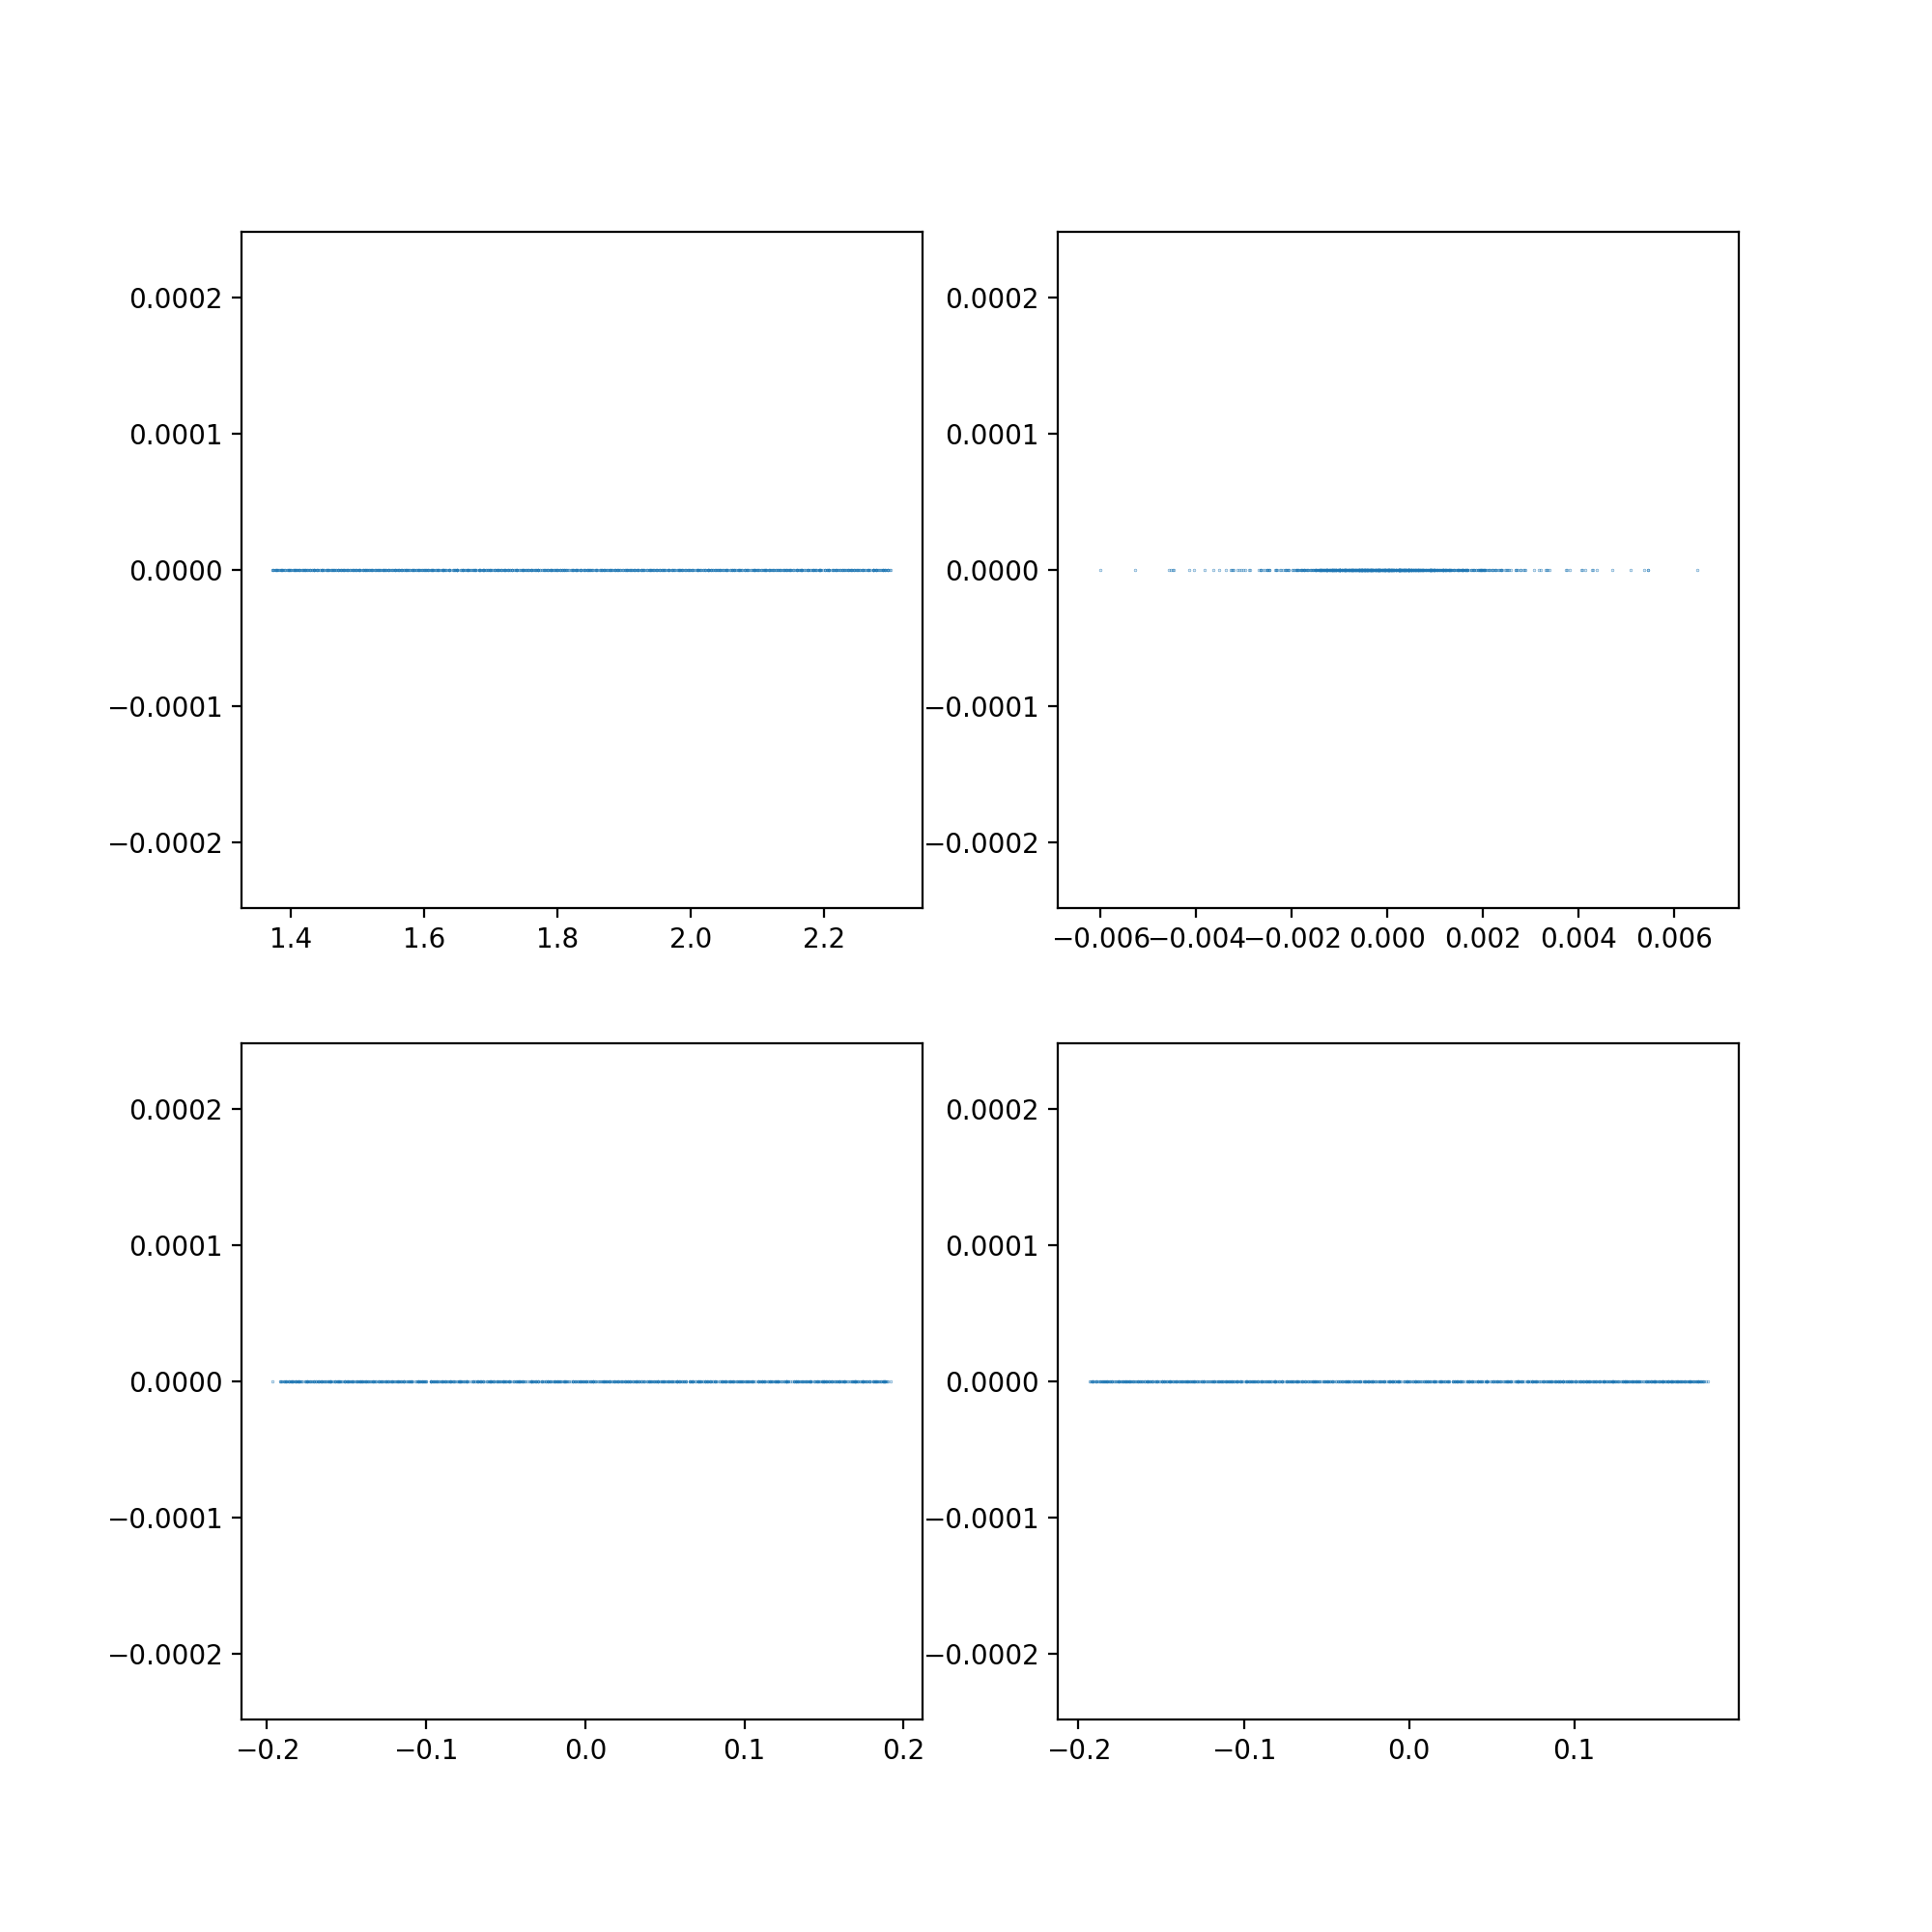

In [5]:
# now have exactly matched output to HSM!
f,axa = plt.subplots(2,2,figsize=(10,10))
ax = axa.flatten()
df5['sigma_noise'] = df5.sigma_m_noise/(1-df5.e1_noise*df5.e1_noise-df5.e2_noise*df5.e2_noise)**(.25)
p = ax[0].scatter(x=2.355*df5.sigma_noise,y=df5.M11_noise-df5.sigma_noise*df5.sigma_noise,marker='.',s=0.1)
p = ax[1].scatter(x=df5.u0_noise,y=df5.u0_noise-df5.M10_noise,marker='.',s=0.1)
p = ax[2].scatter(x=df5.e2_noise,y=df5.e2_noise-df5.M02_noise/df5.M11_noise,marker='.',s=0.1)
p = ax[3].scatter(x=df5.e1_noise,y=df5.e1_noise-df5.M20_noise/df5.M11_noise,marker='.',s=0.1)





In [9]:
from matplotlib.backends.backend_pdf import PdfPages

def makepullplots(vname,perfect=False,pdf=None):
    
    f,ax = plt.subplots(2,3,figsize=(12,8))    
    
    name_noise = "%s_noise" % (vname)
    name_perfect = "%s_pkernel" % (vname)
    name_nonoise = "%s_nonoise" % (vname)
    name_sigma = "var%s_noise" % (vname)
    name_perfectsigma = "var%s_pkernel" % (vname)

    dflist = [df1p5,df2p5,df5]
    betaval = [1.5,2.5,5.0]
    rms = []
    
    for i,dft in enumerate(dflist):
    
        if perfect :
            diff = dft[name_perfect] - dft[name_nonoise]  
            pull = diff/np.sqrt(dft[name_perfectsigma])
        else:
            diff = dft[name_noise] - dft[name_nonoise]
            pull = diff/np.sqrt(dft[name_sigma])
    
        h = ax[0,i].hist(diff,bins=100)
        h = ax[1,i].hist(pull,bins=100,range=(-10,10))
    
        ax[0,i].set_xlabel(' %s Measured-True' % (vname))
        ax[1,i].set_xlabel(' %s Pull' % (vname))

        rms.append(np.std(pull))
        plt.text(0.1, 0.9, r'$\beta $ = %3.1f' % (betaval[i]) , horizontalalignment='left',verticalalignment='center', transform=ax[0,i].transAxes)
        plt.text(0.1, 0.9, r'$\sigma$ = %4.2f' % rms[i], horizontalalignment='left',verticalalignment='center', transform=ax[1,i].transAxes)

    if perfect:
        plt.suptitle('Perfect Kernel')

    if pdf:
        pdf.savefig(f)
        
    return rms

    

<IPython.core.display.Javascript object>


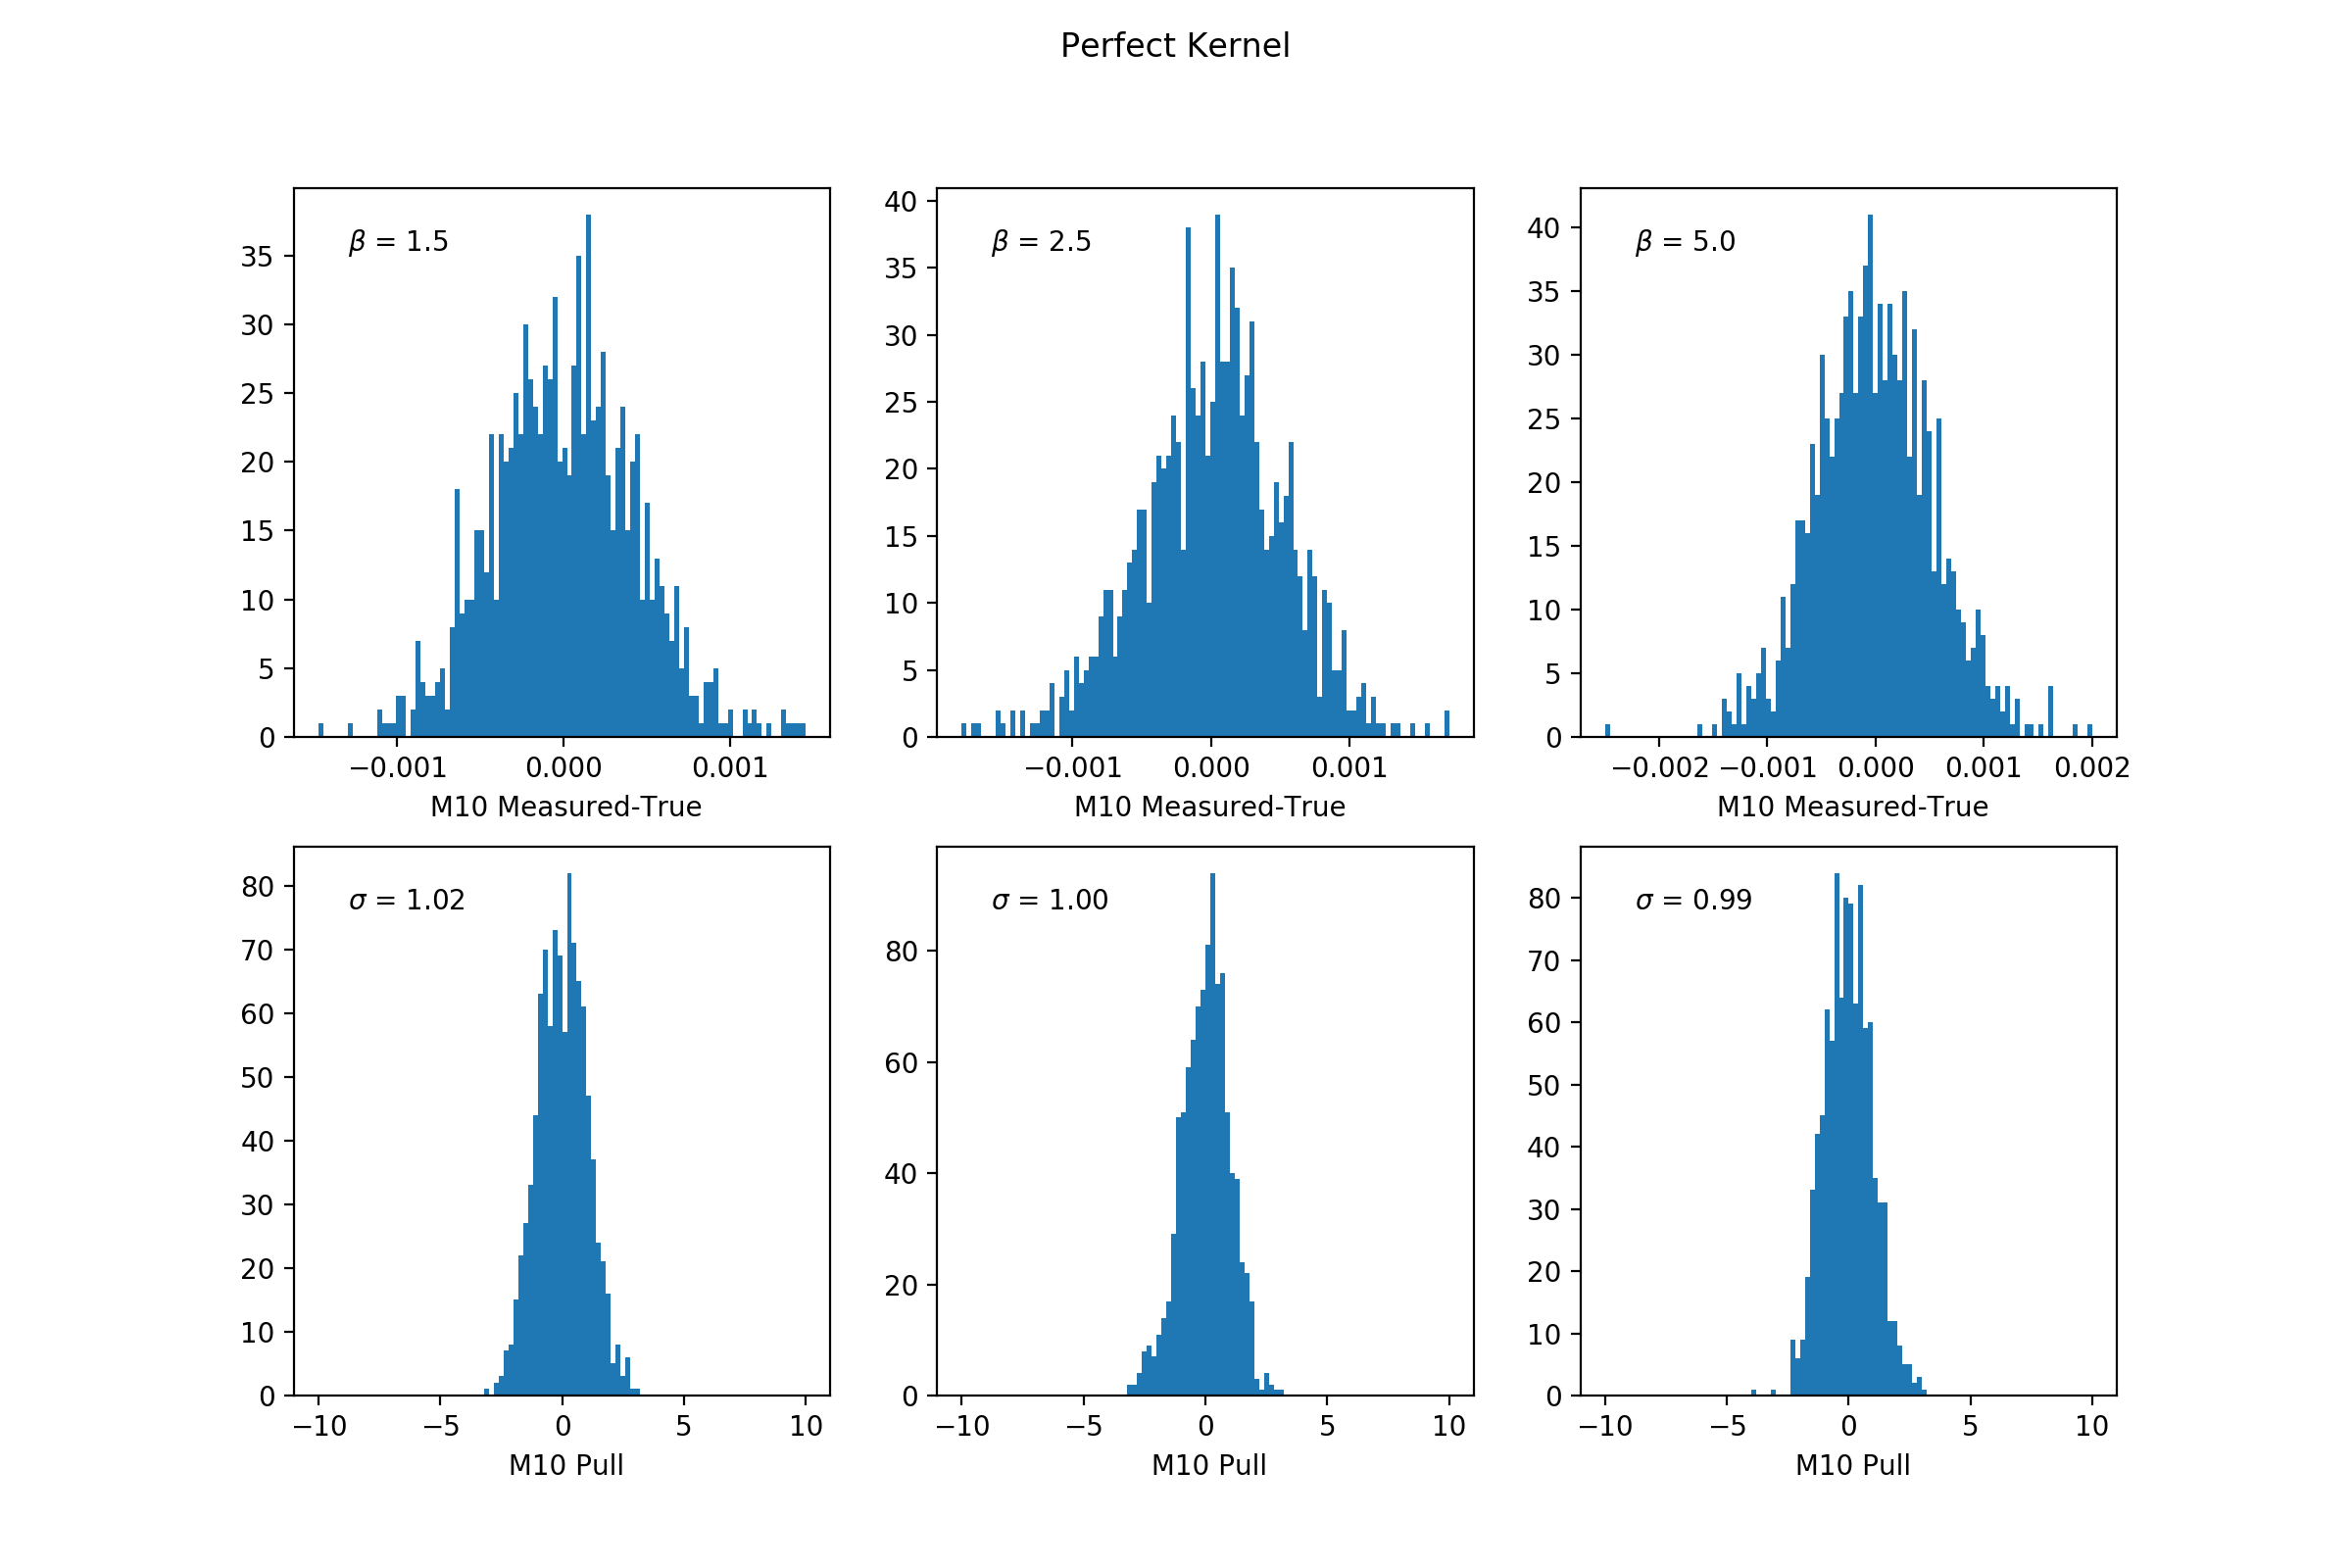

<IPython.core.display.Javascript object>


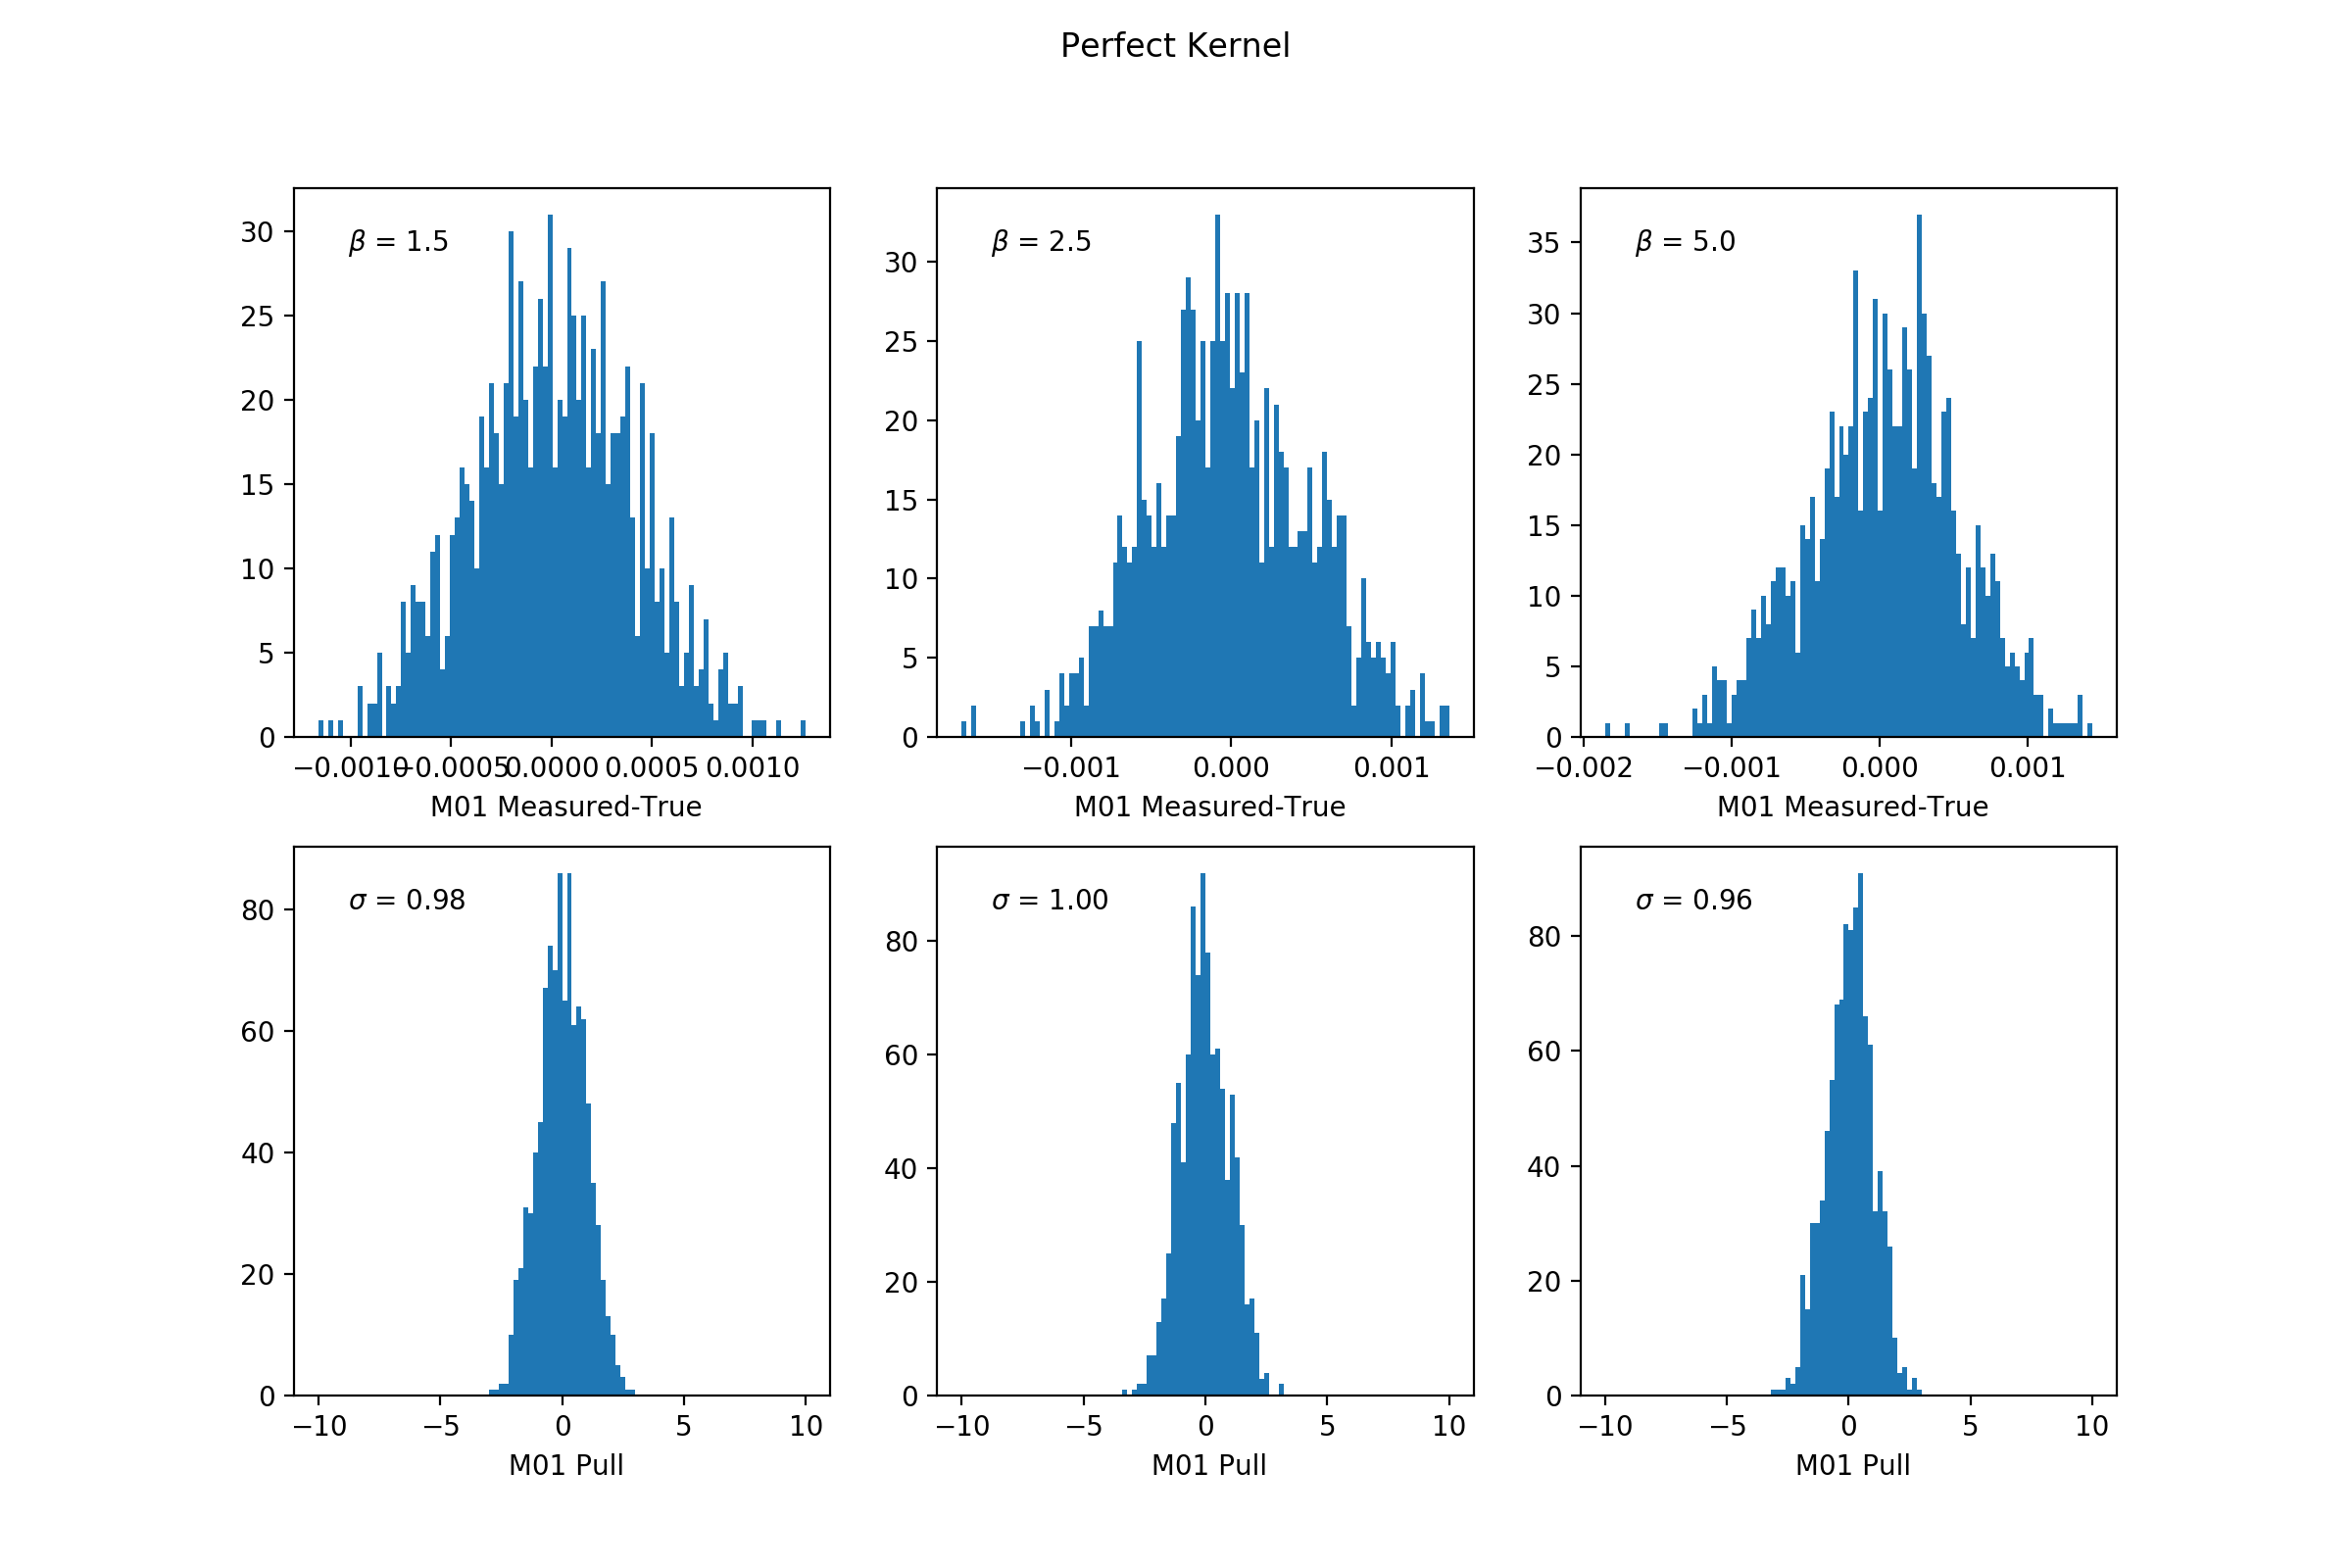

<IPython.core.display.Javascript object>


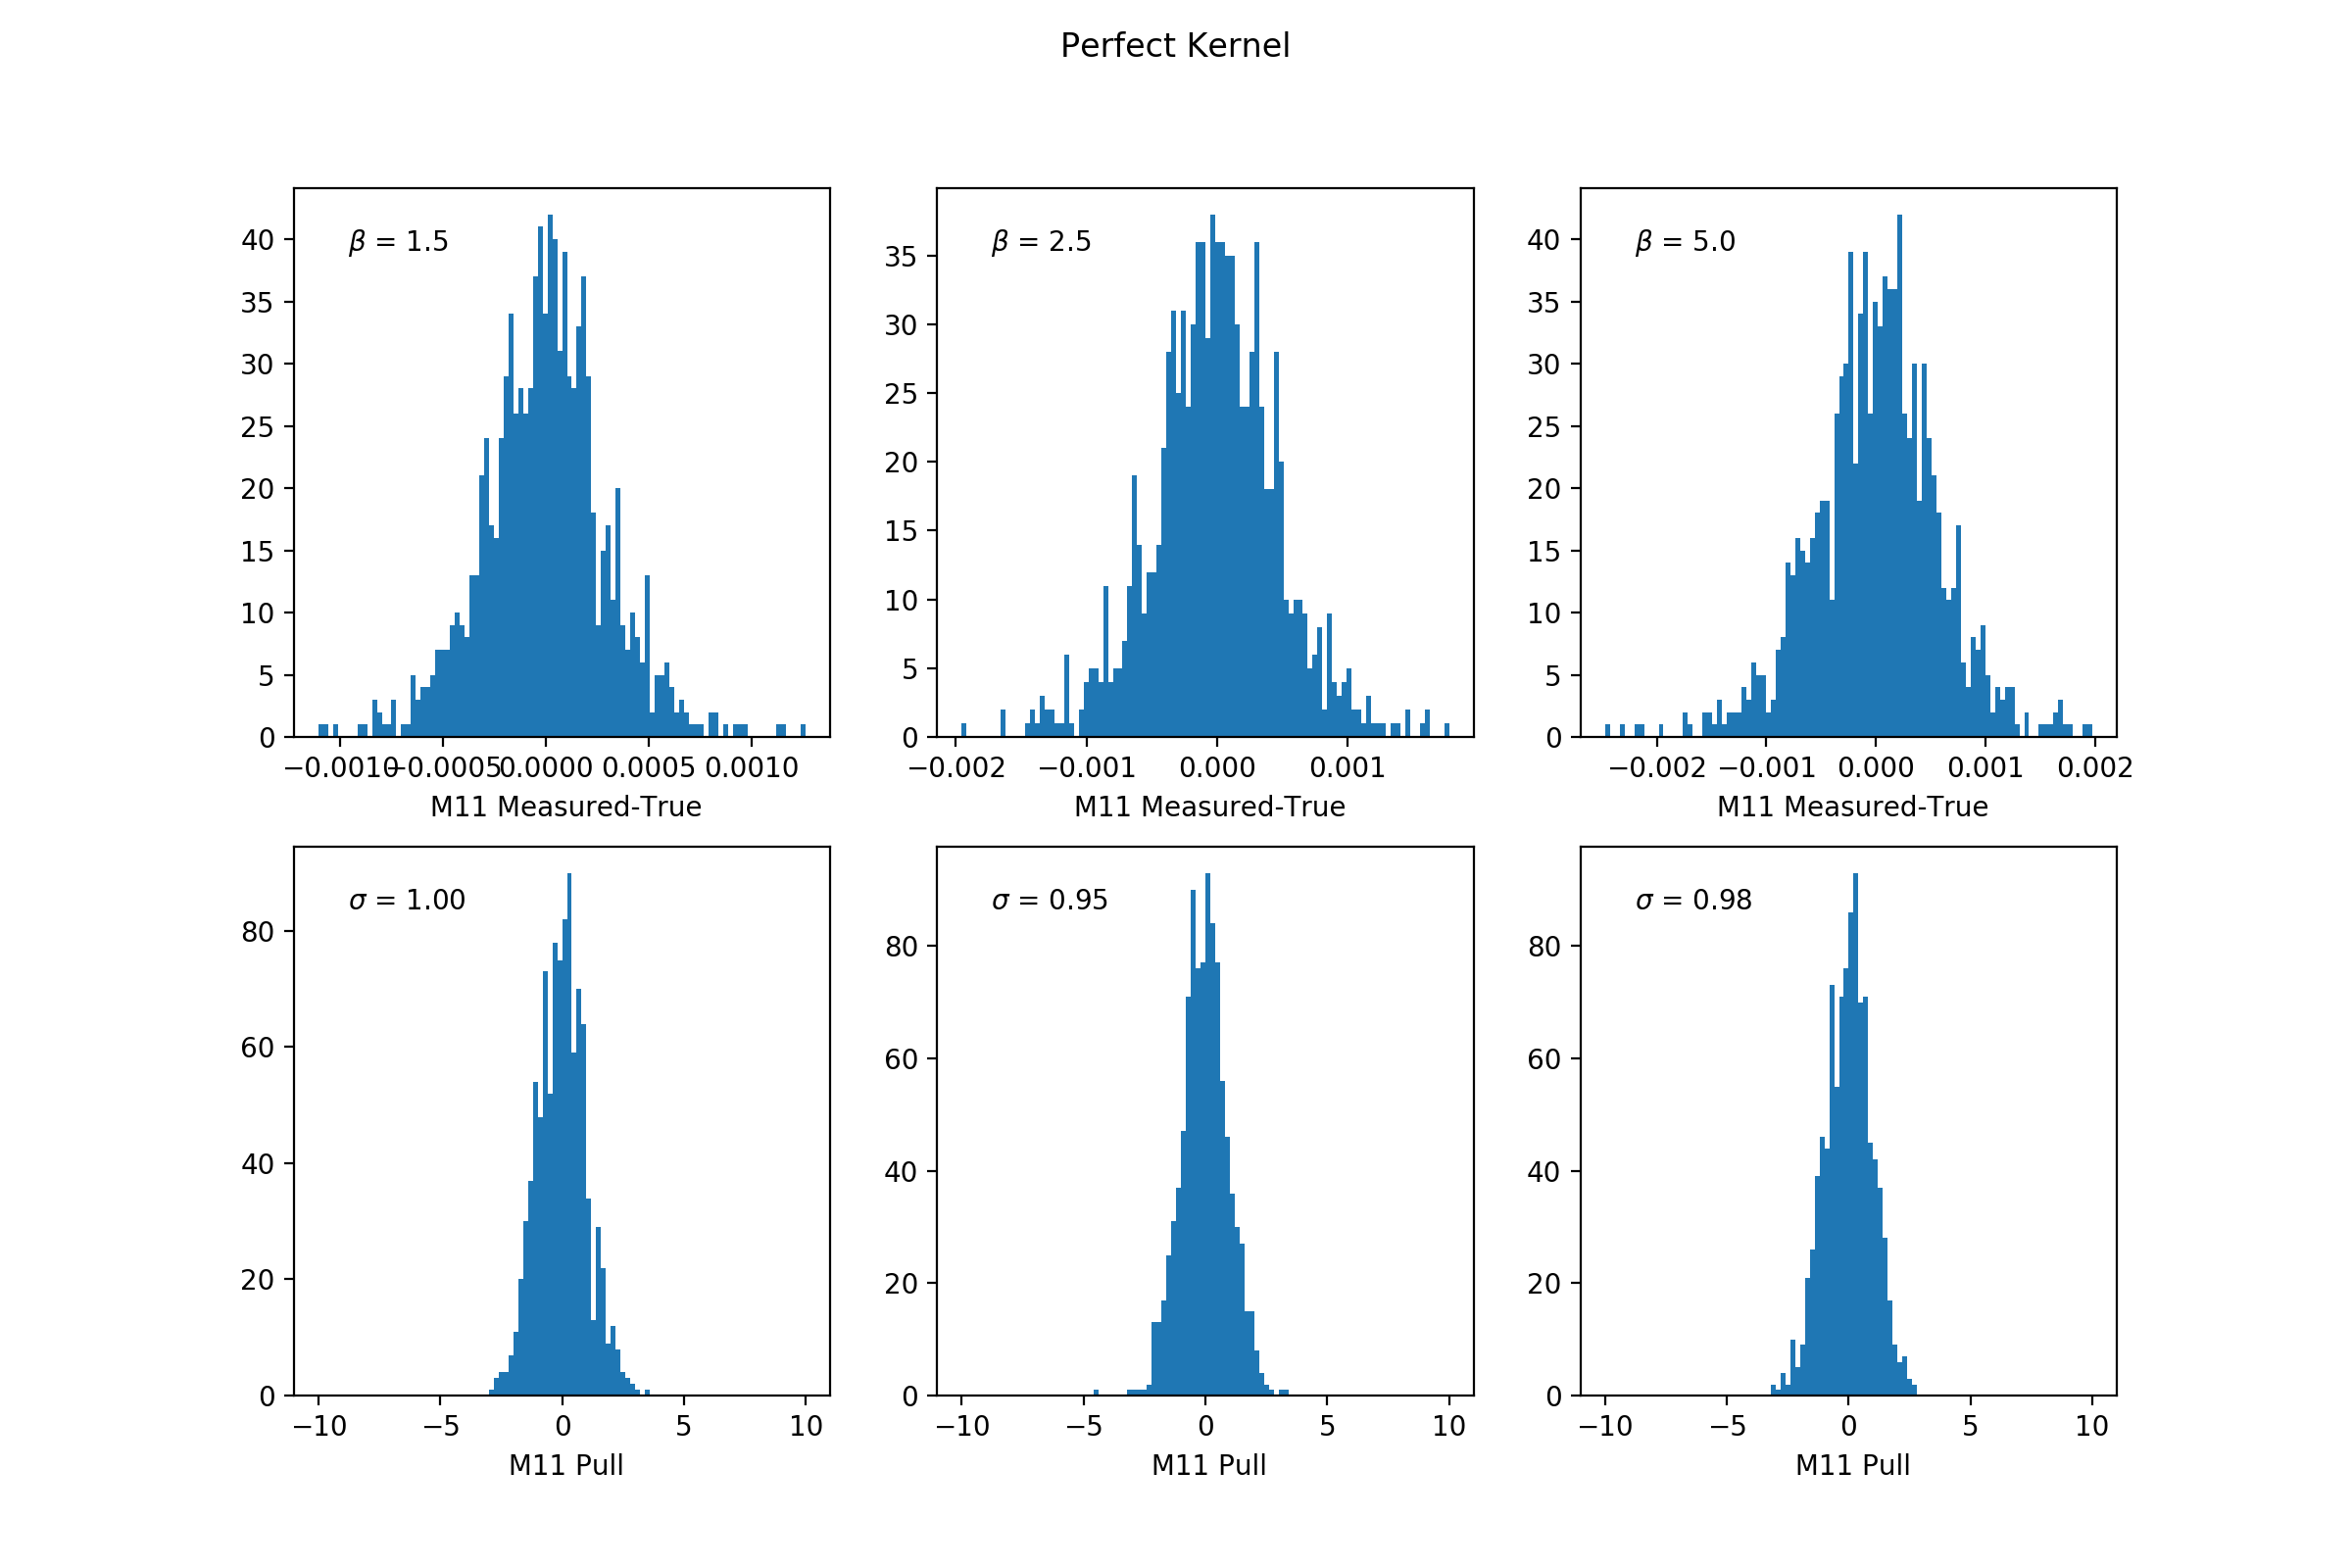

<IPython.core.display.Javascript object>


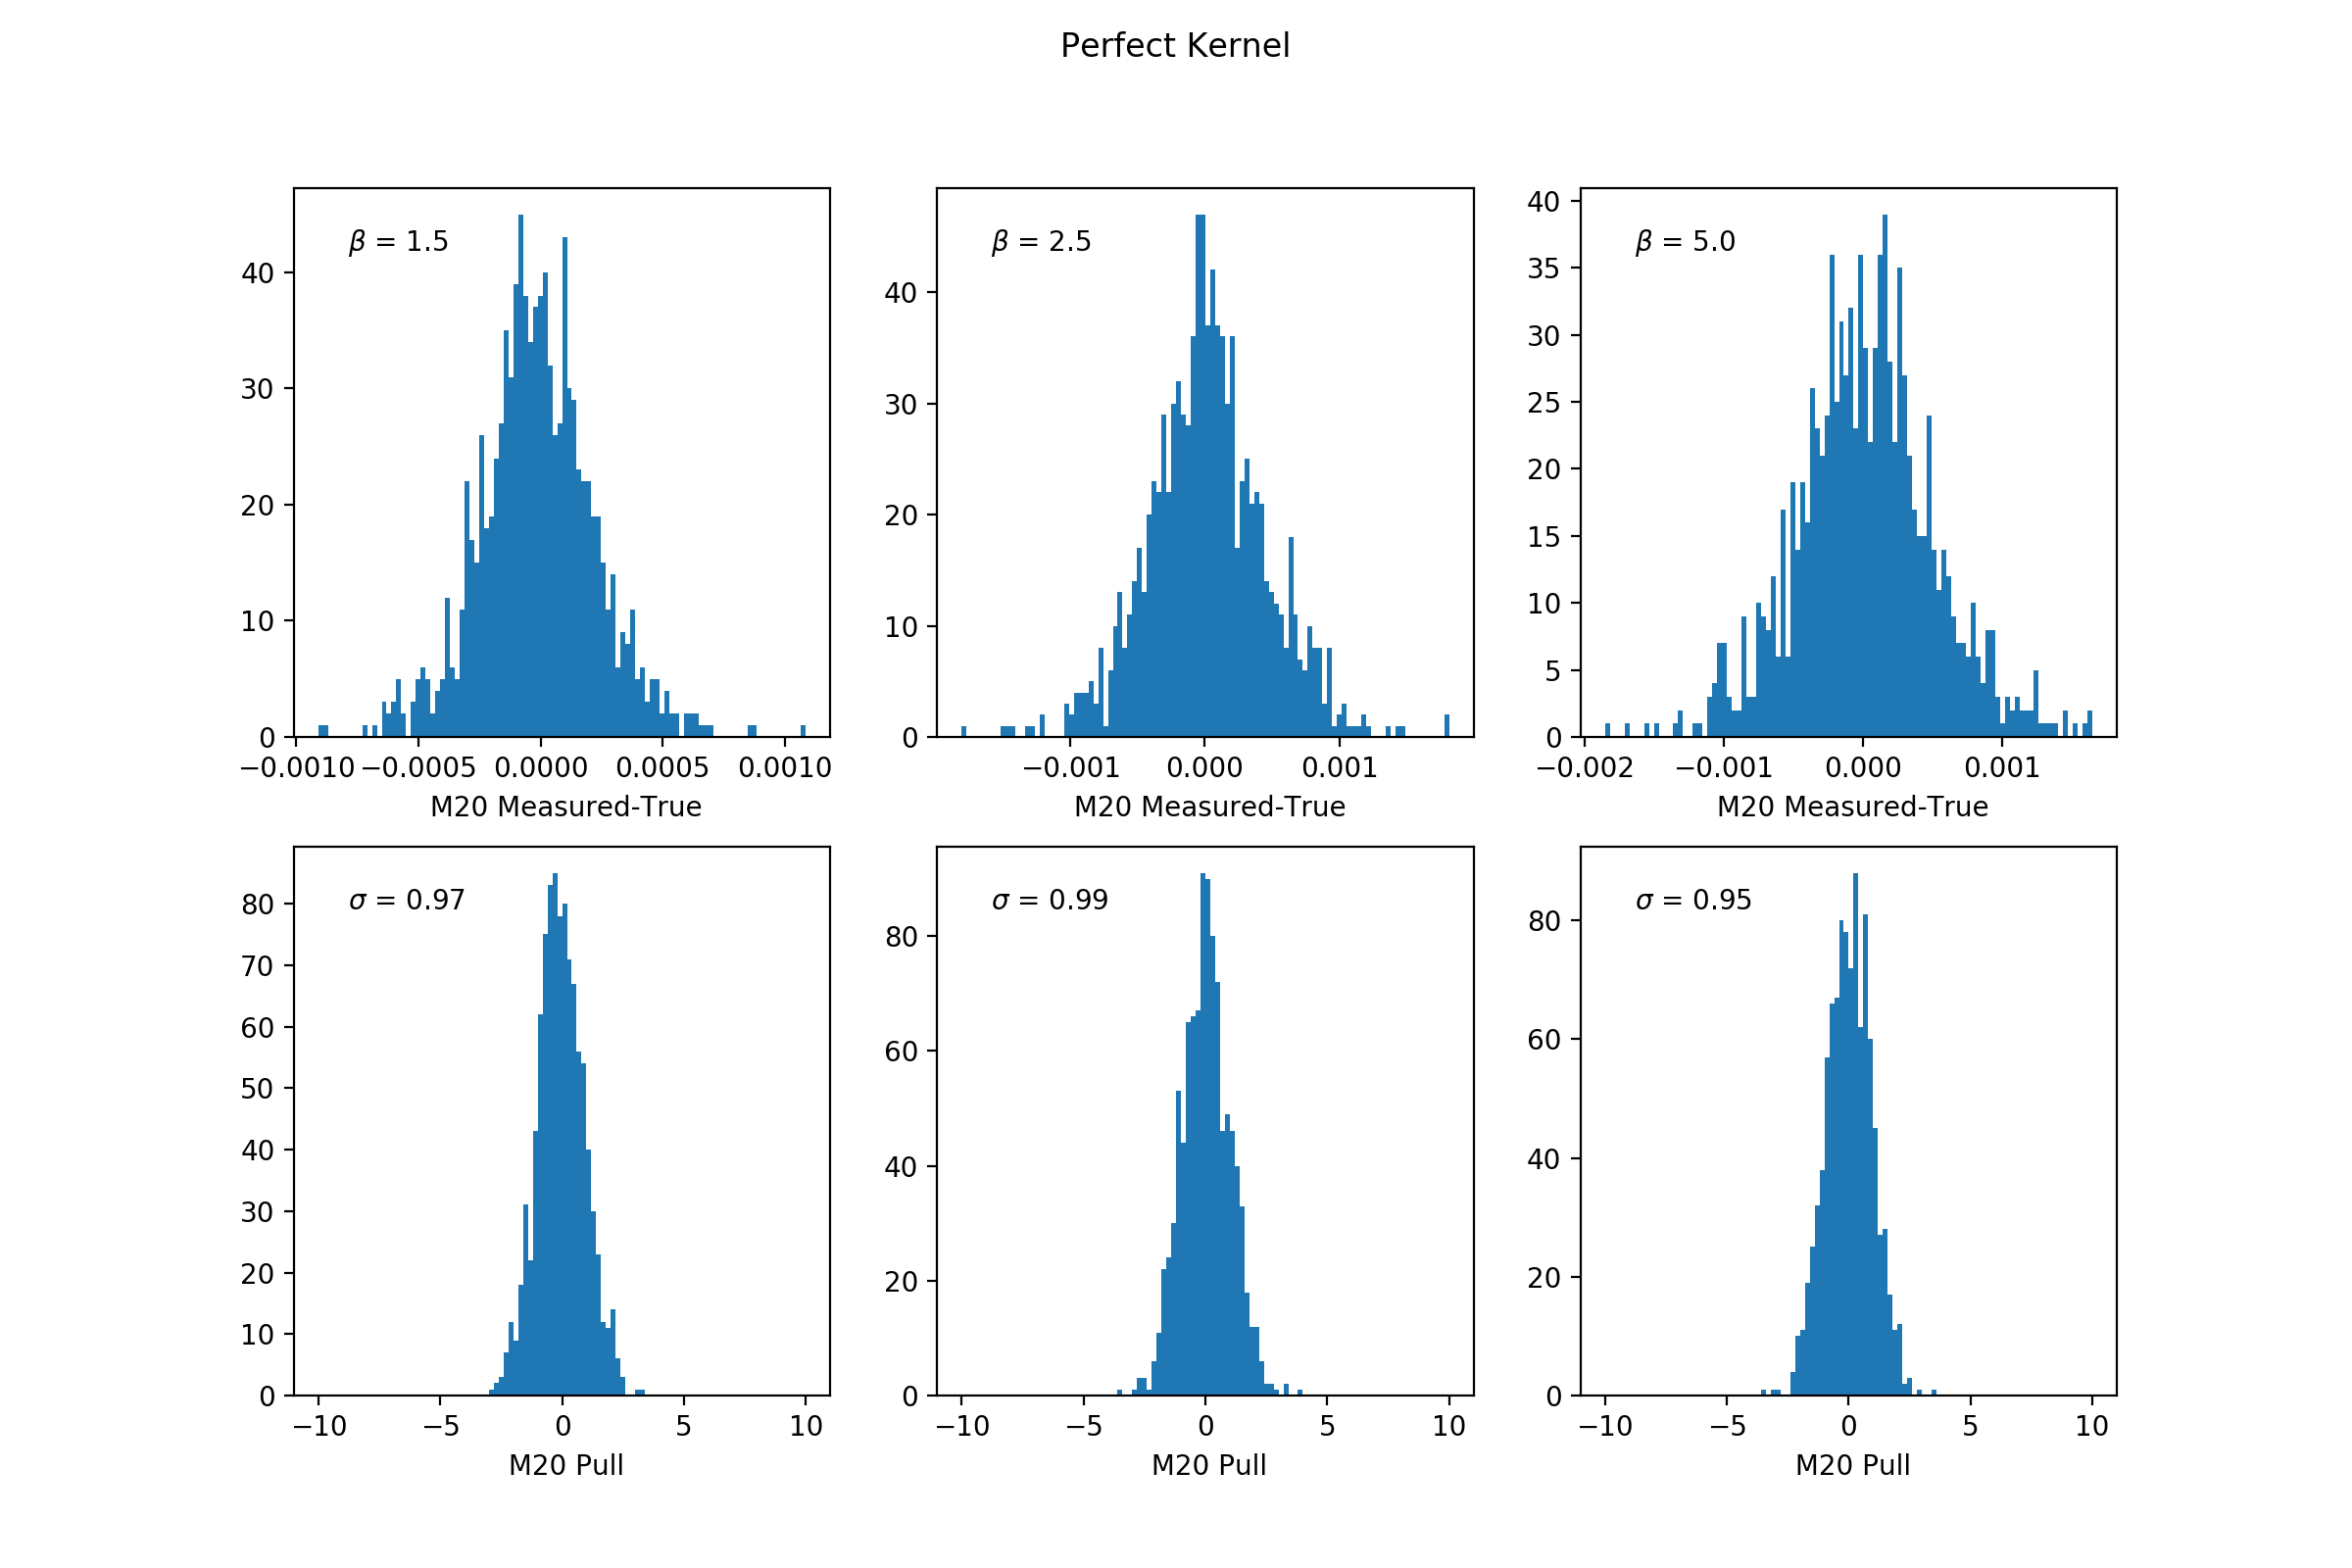

<IPython.core.display.Javascript object>


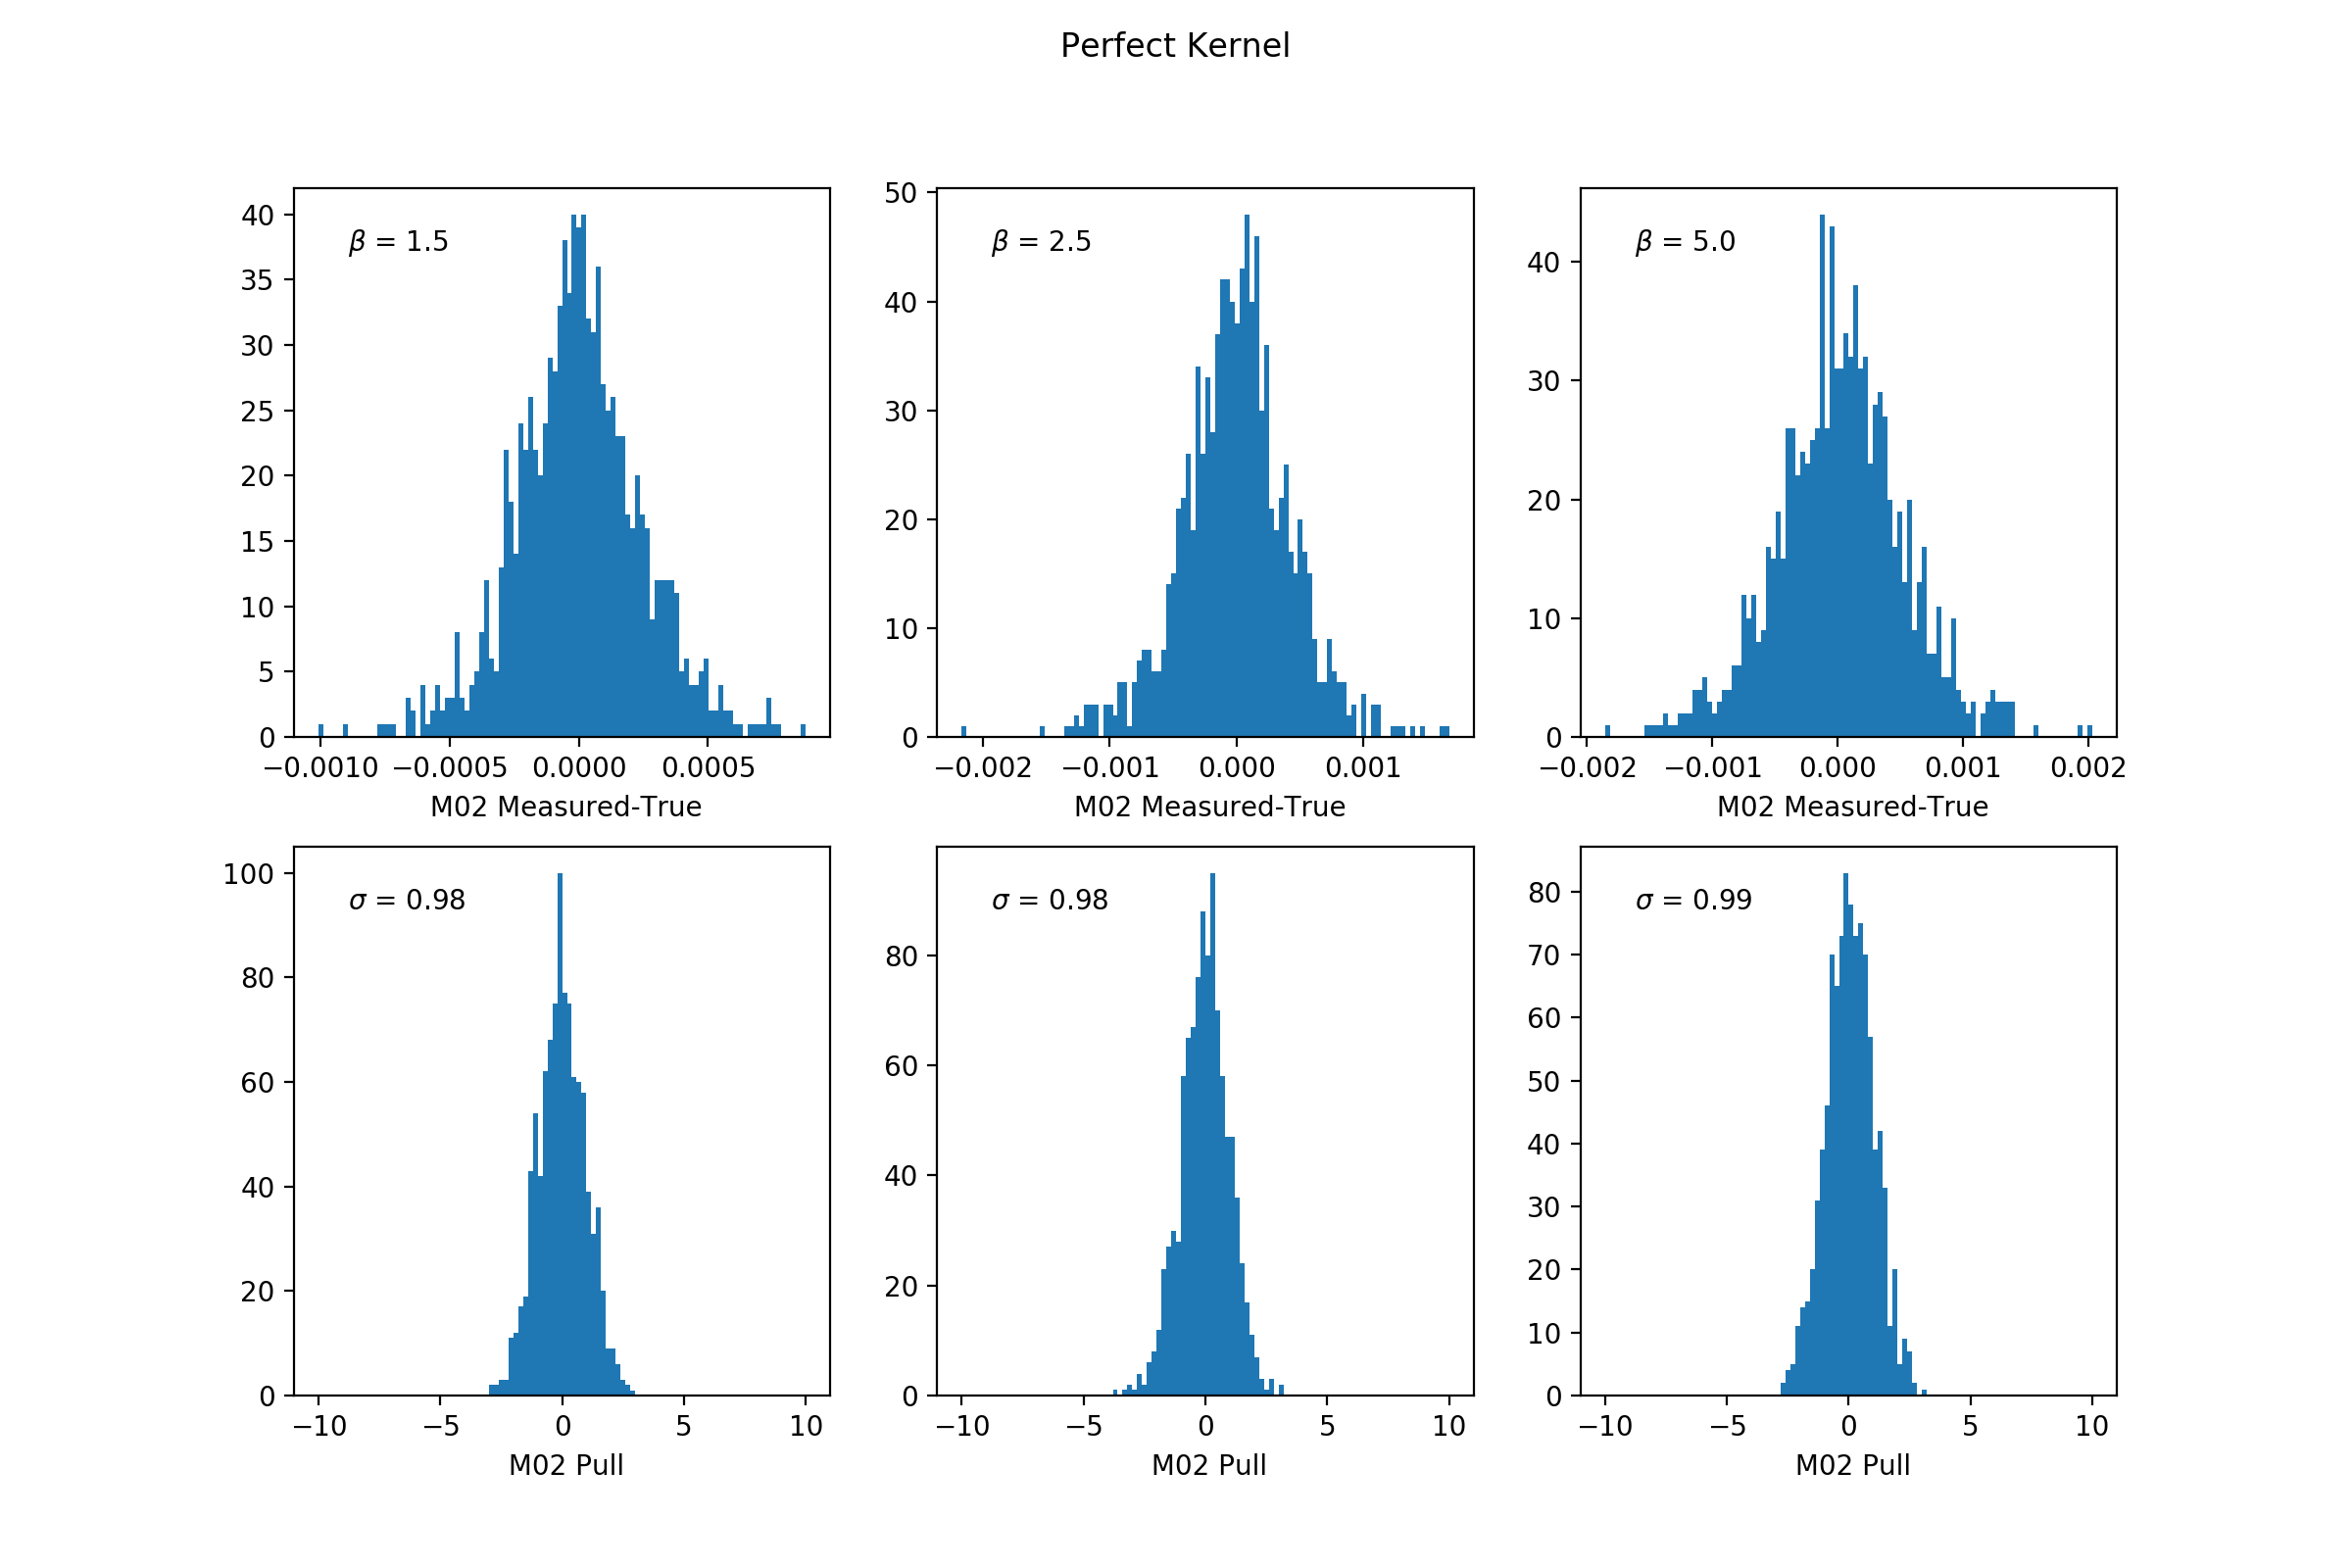

<IPython.core.display.Javascript object>


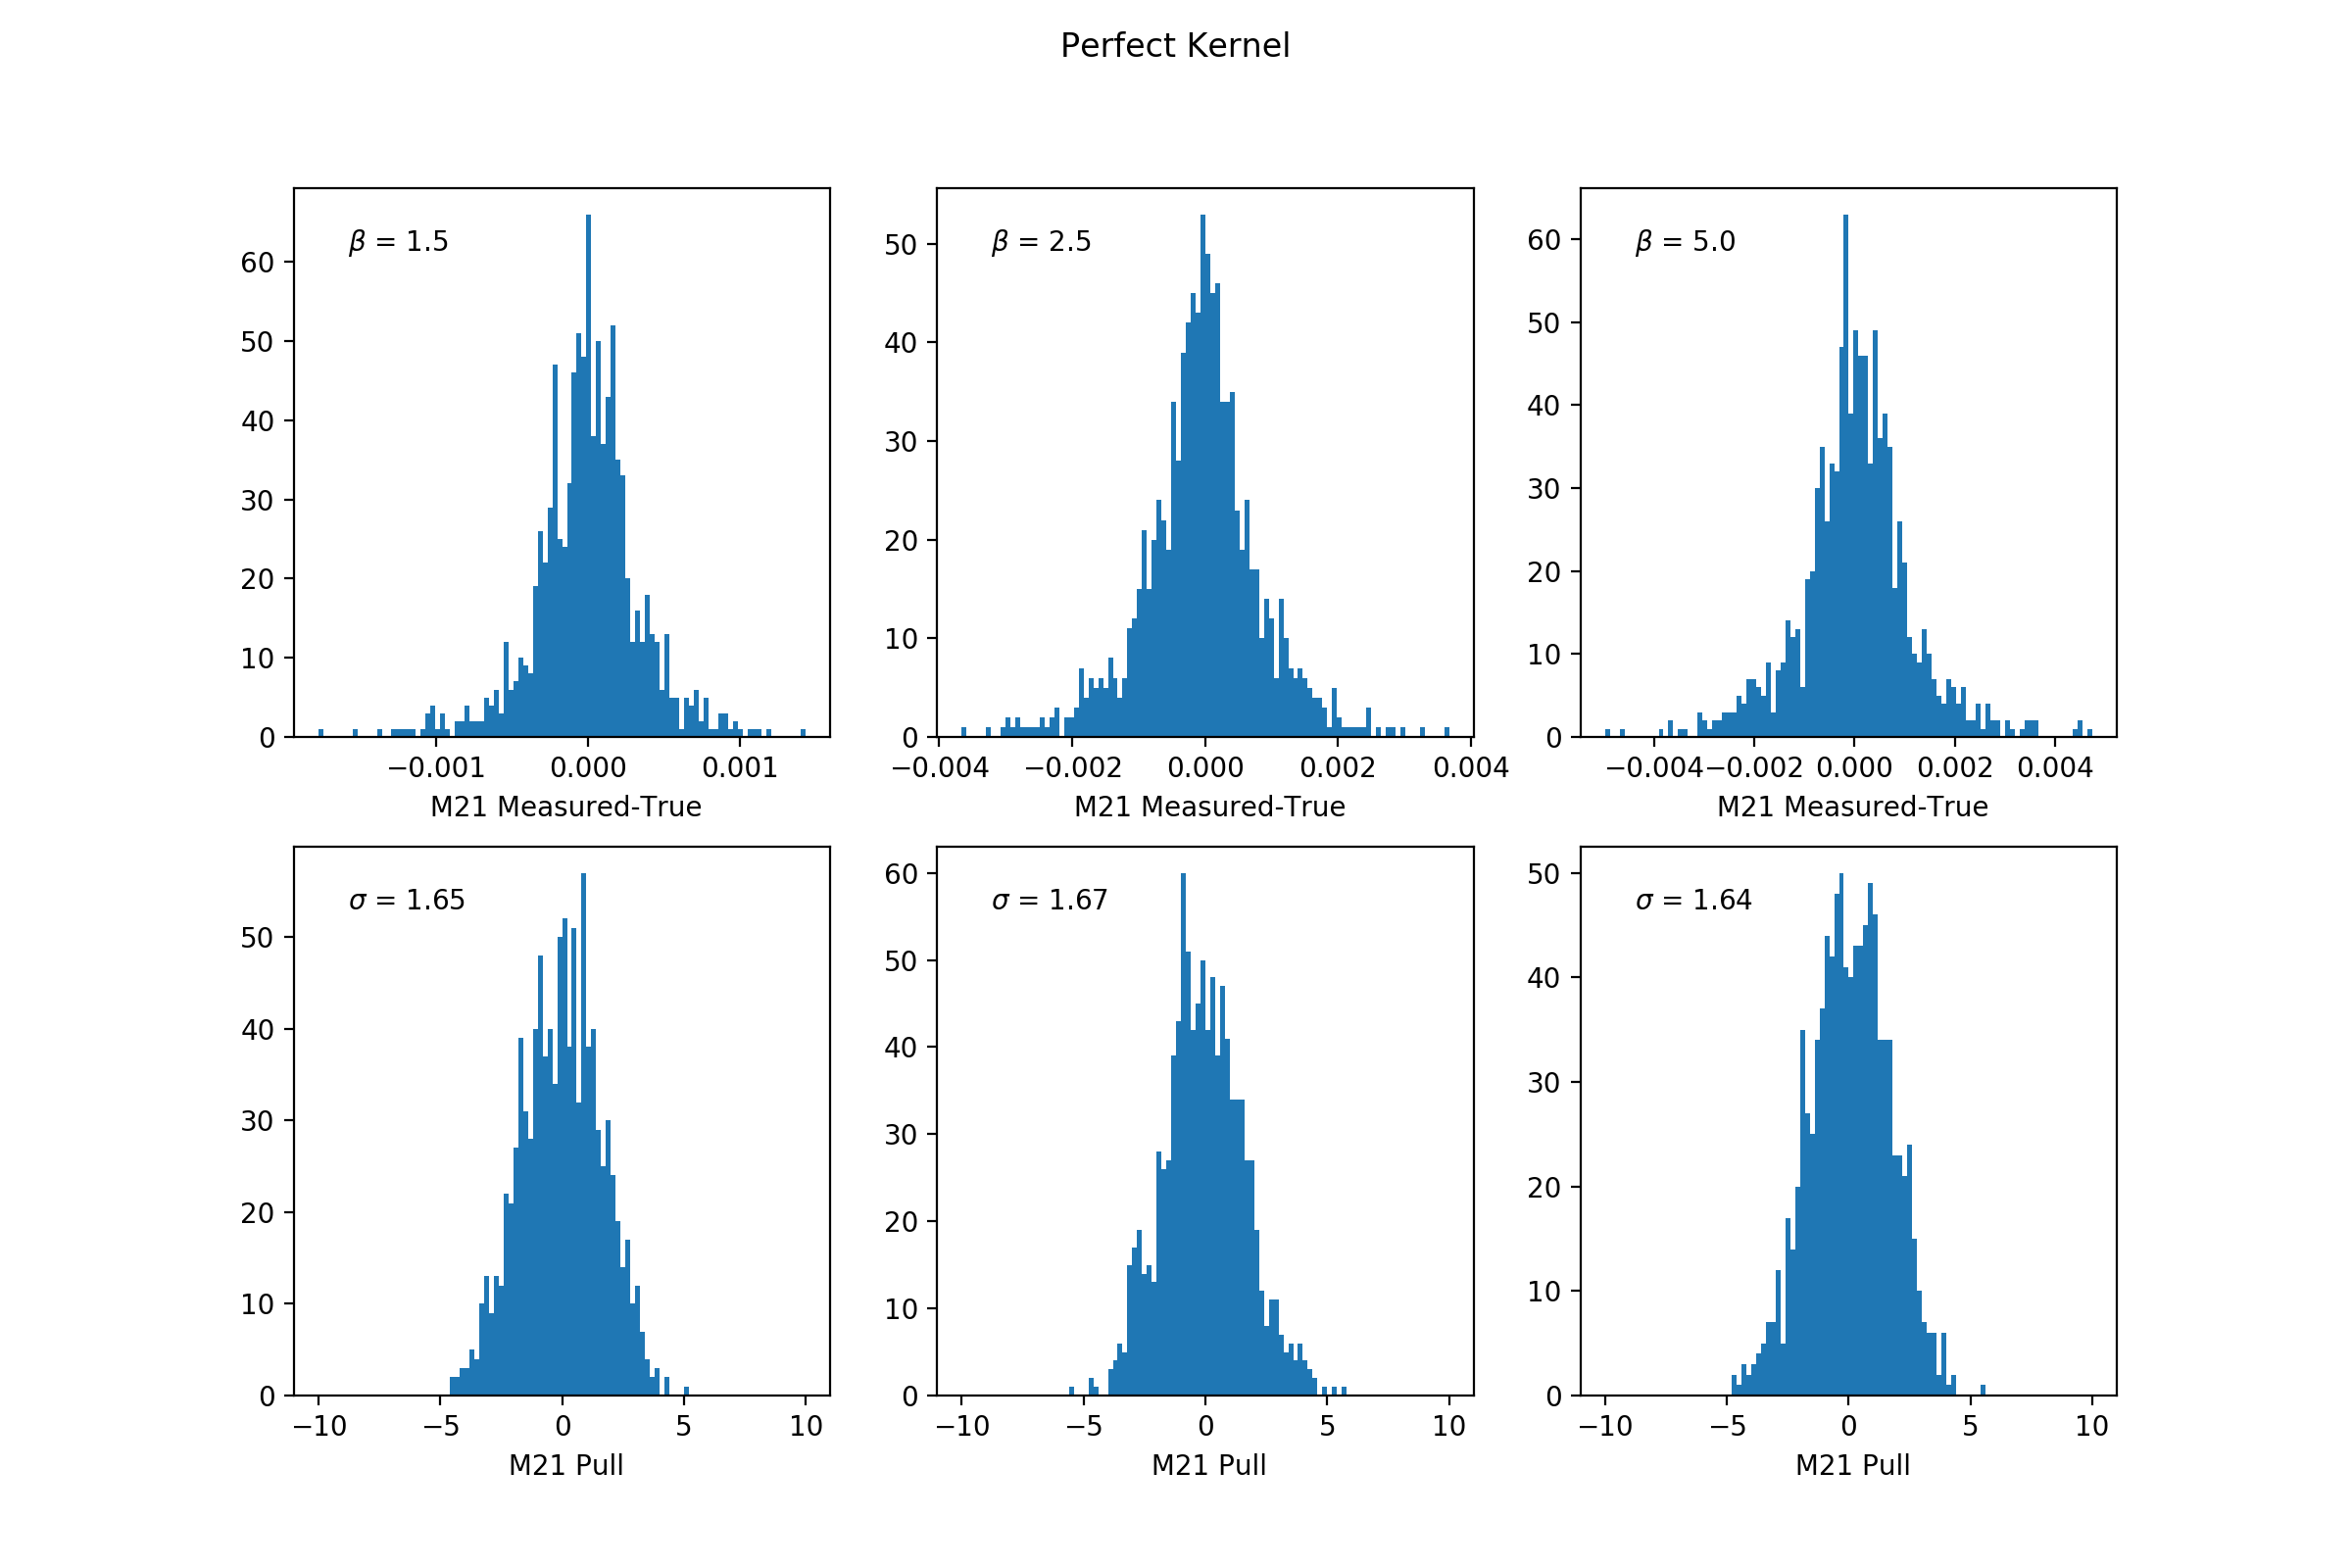

<IPython.core.display.Javascript object>


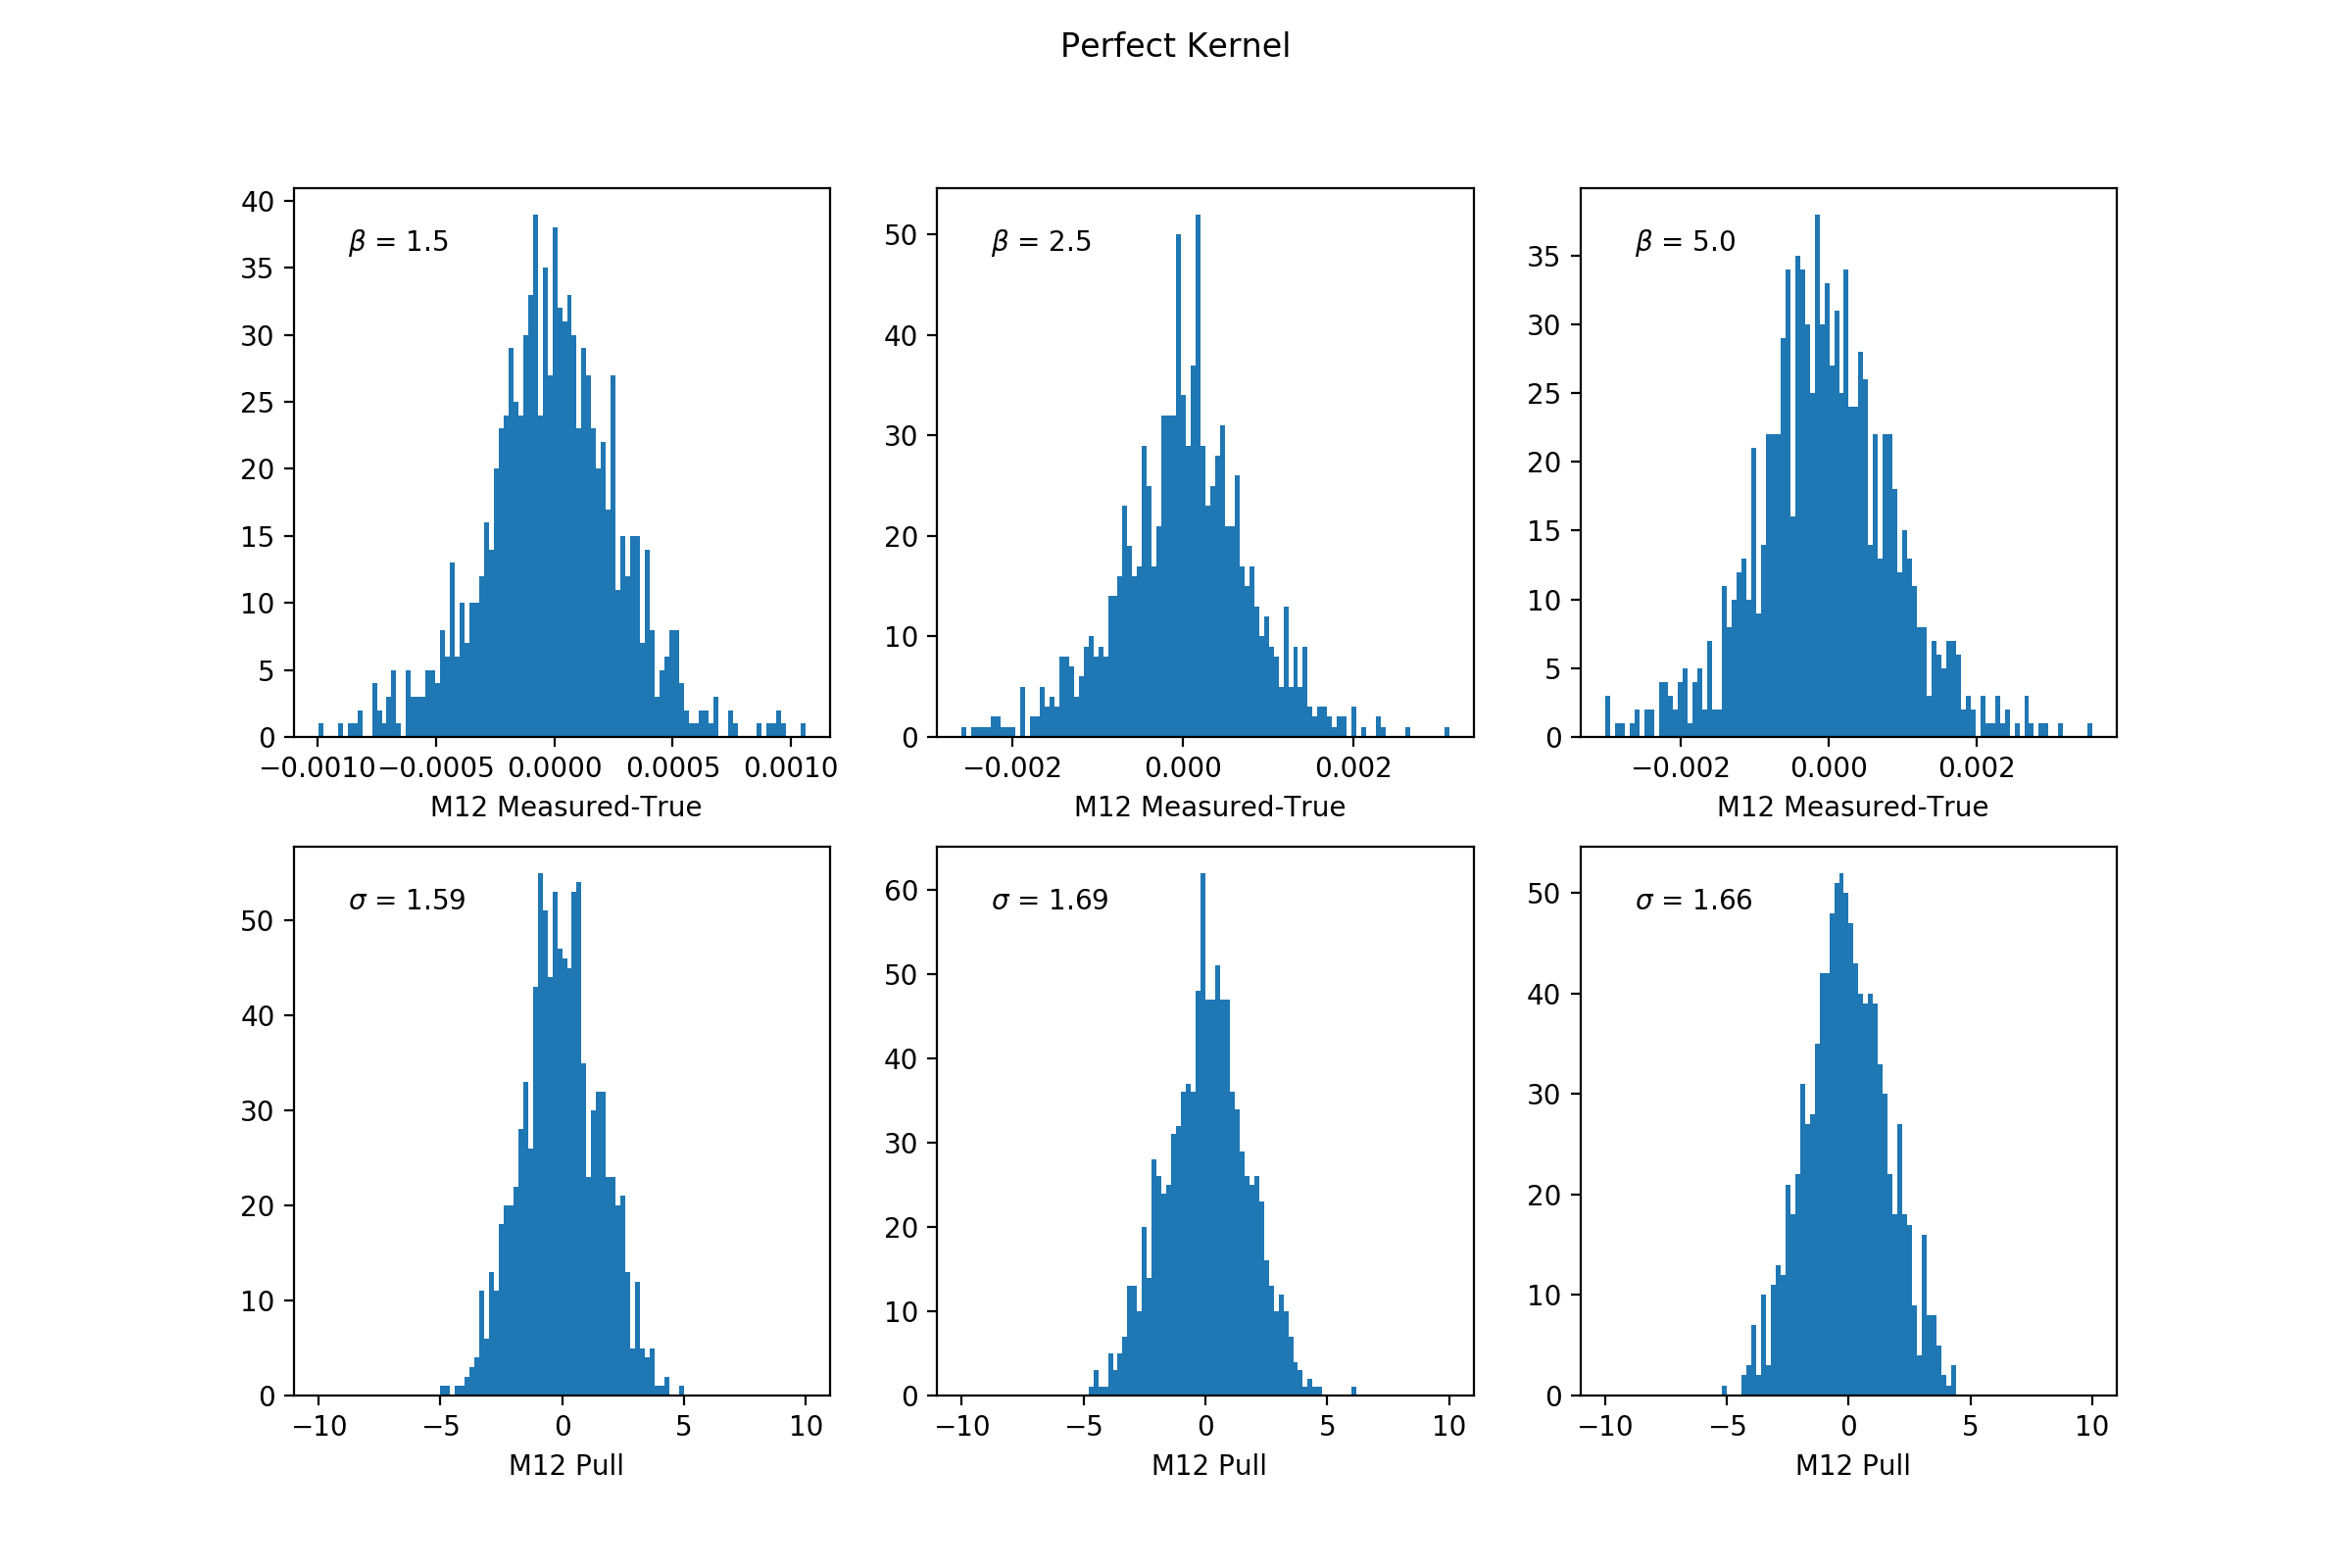

<IPython.core.display.Javascript object>


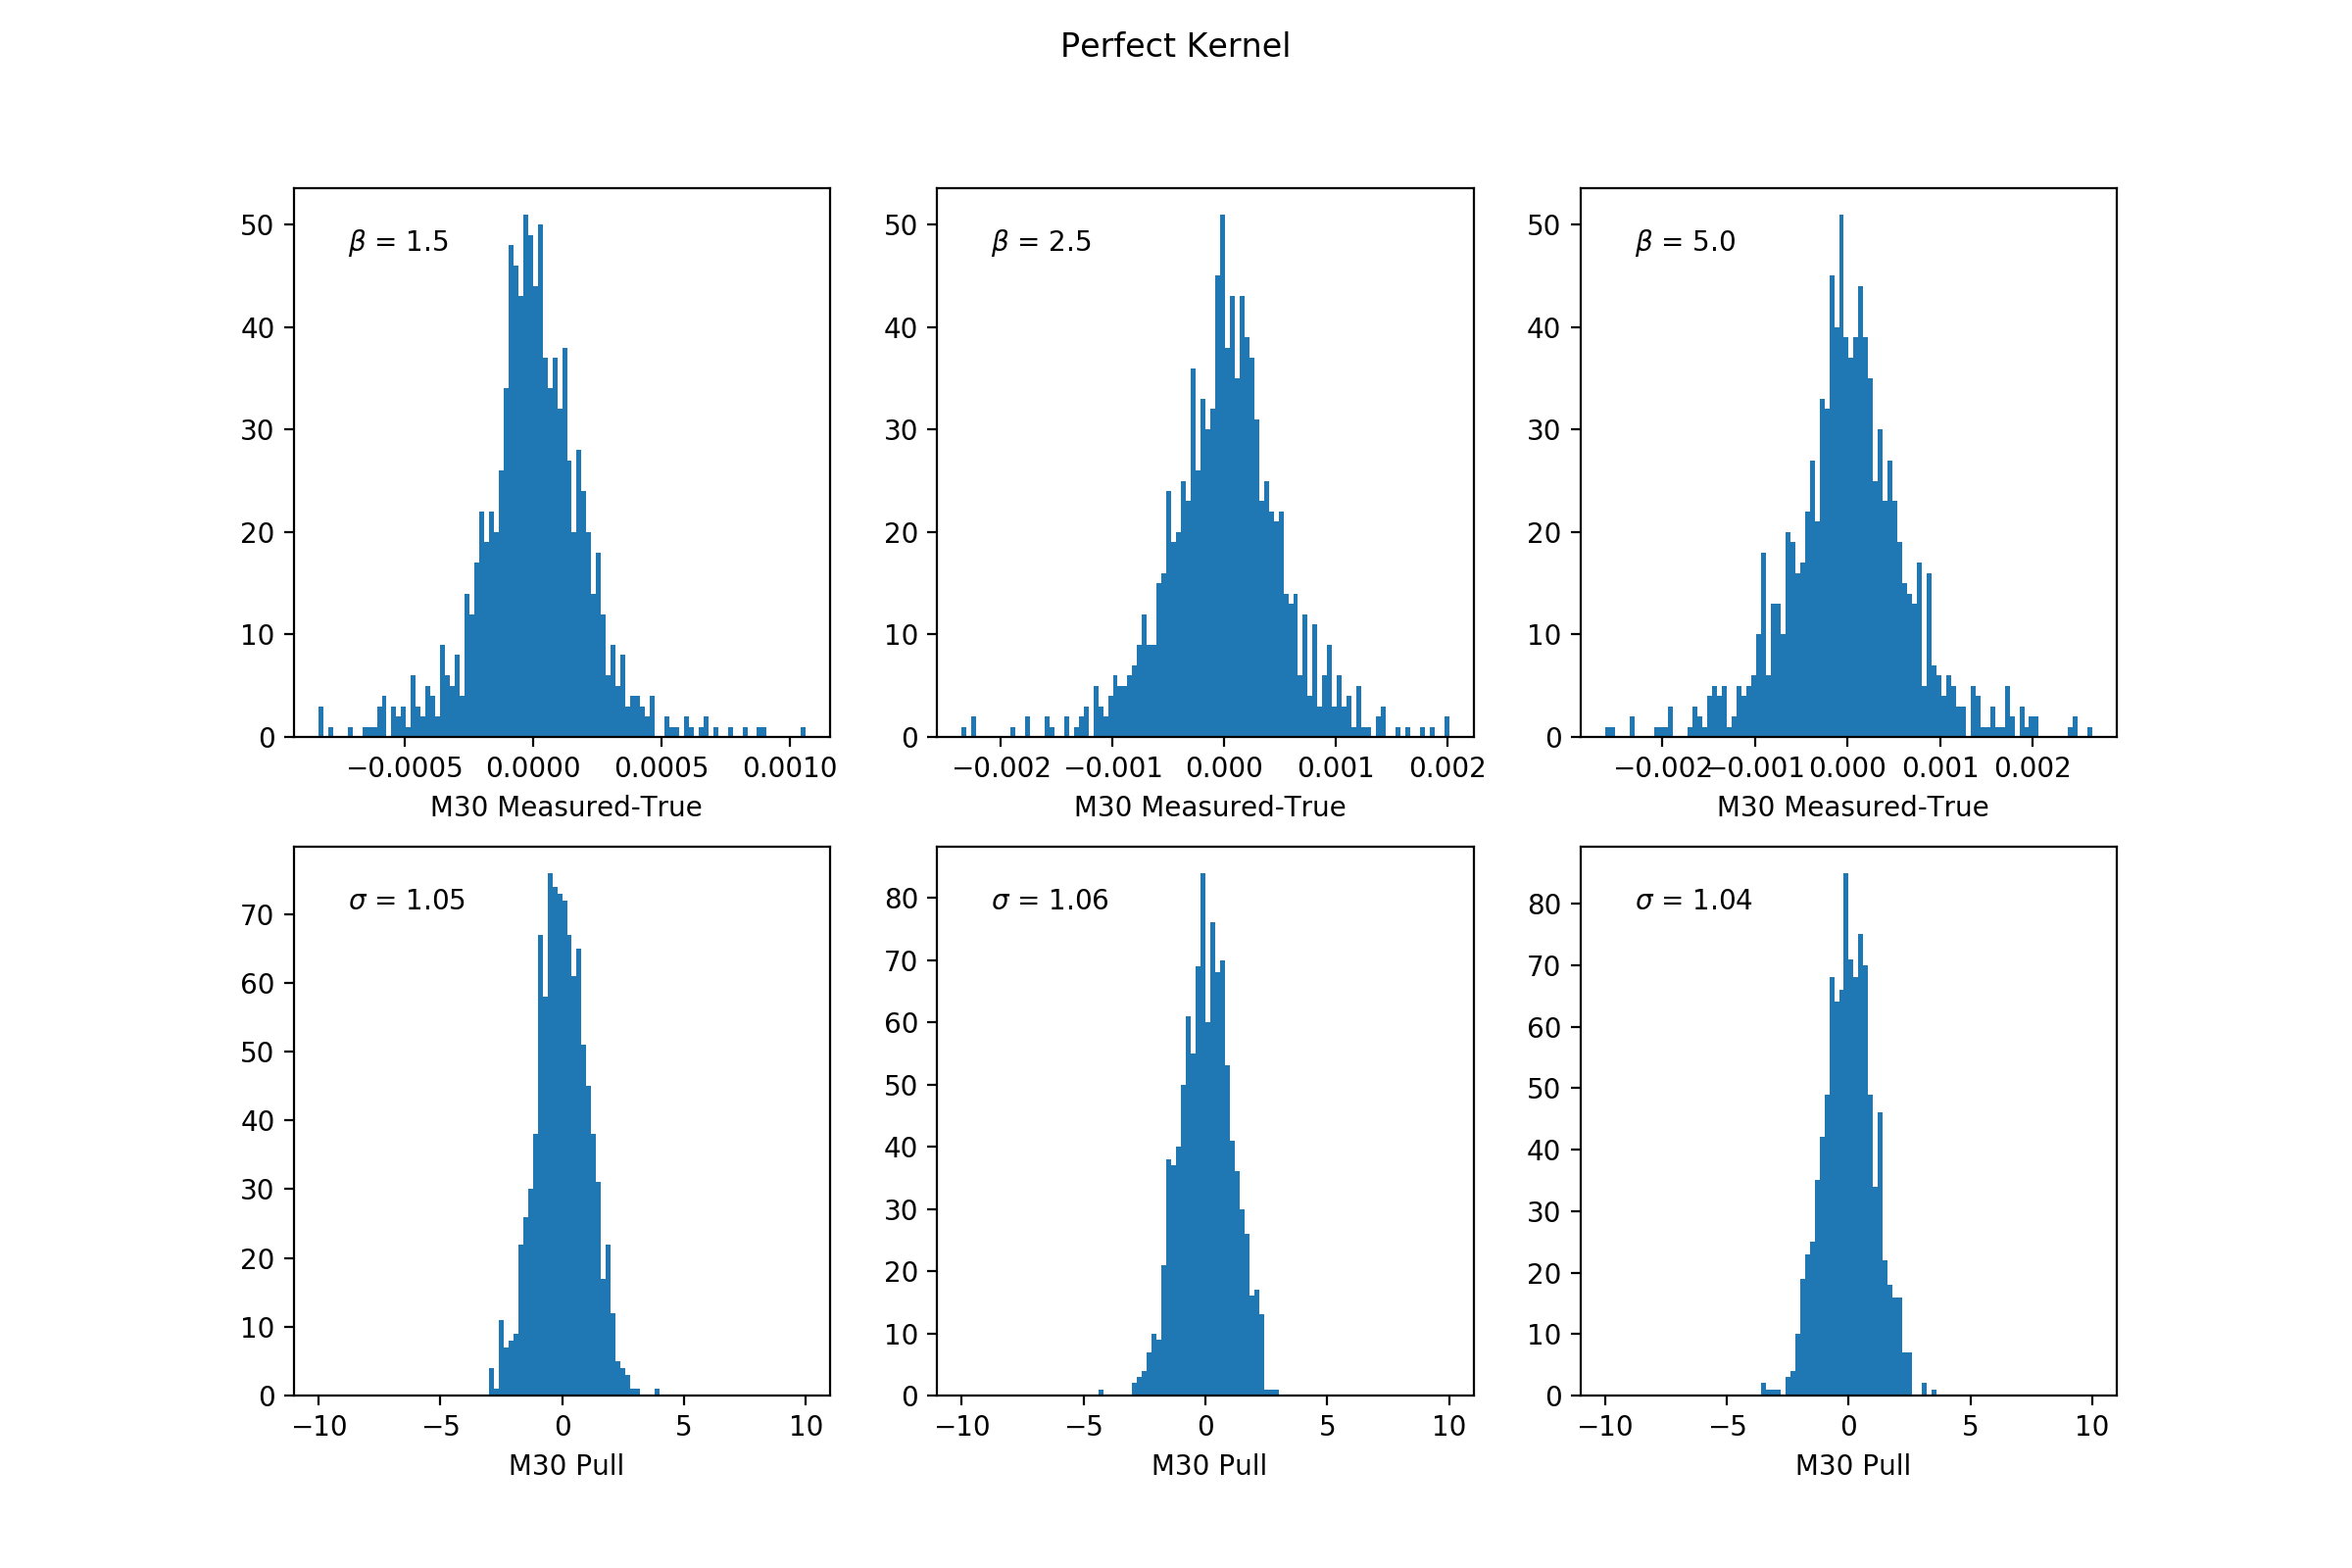

<IPython.core.display.Javascript object>


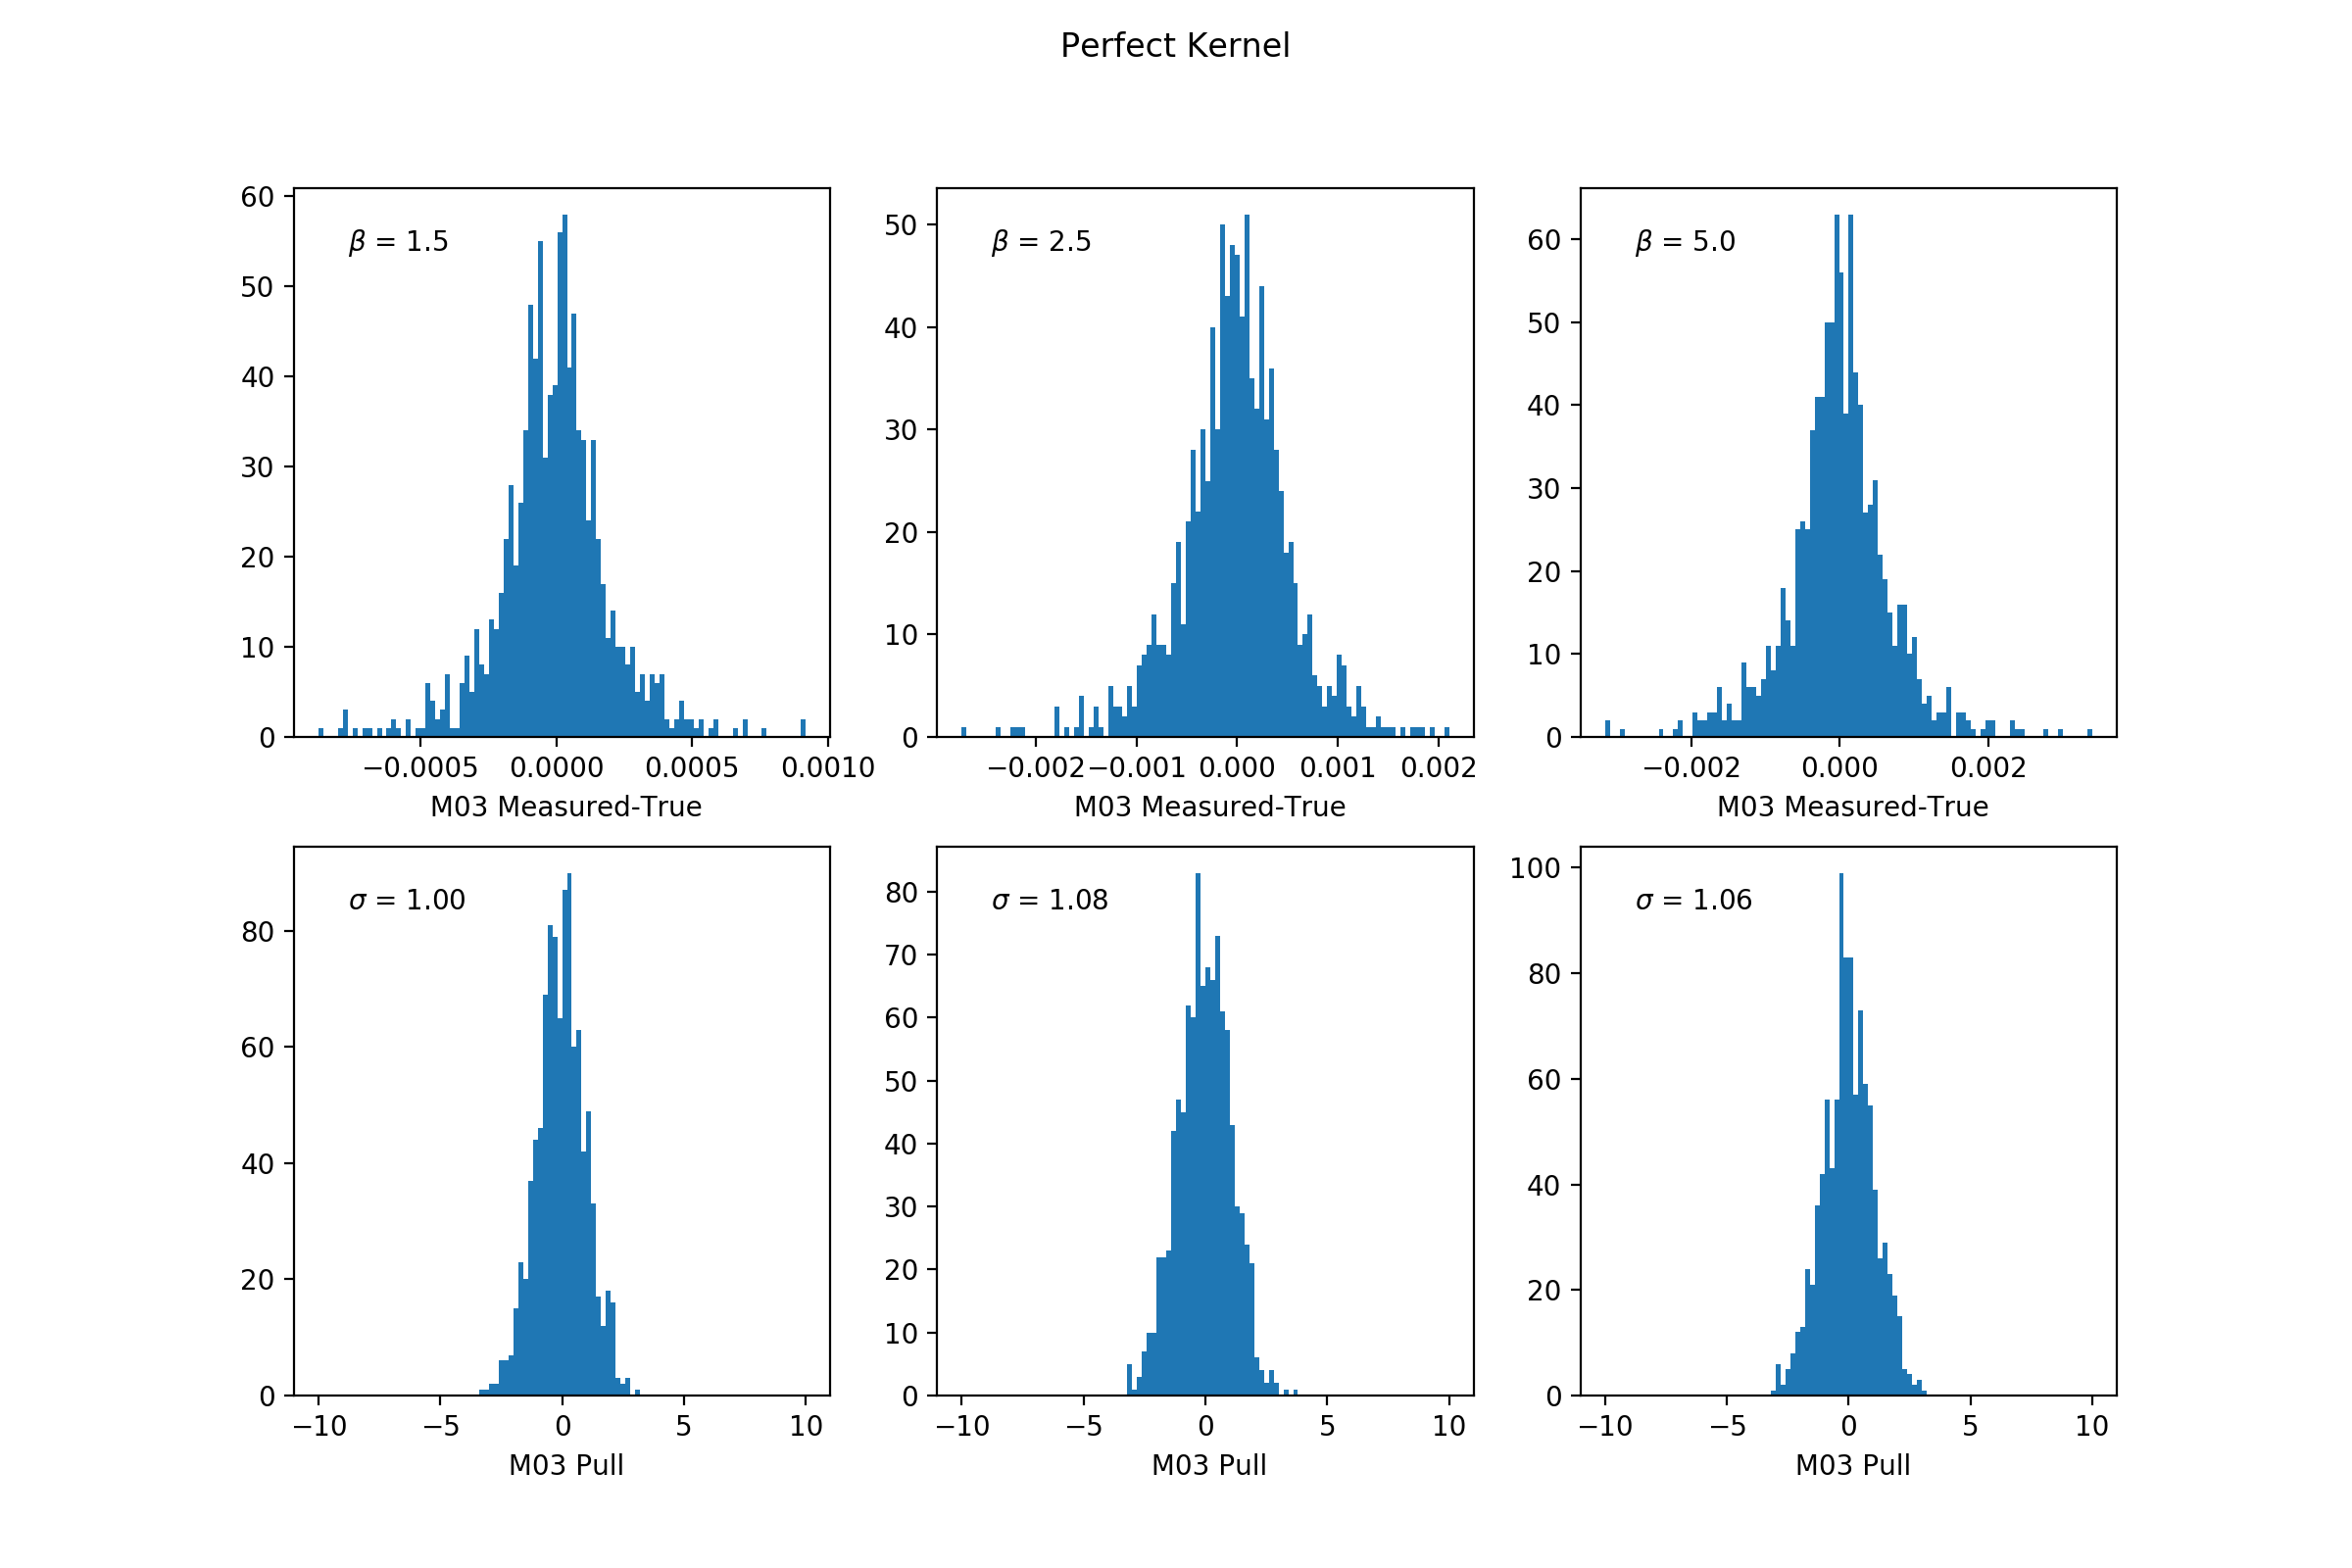

<IPython.core.display.Javascript object>


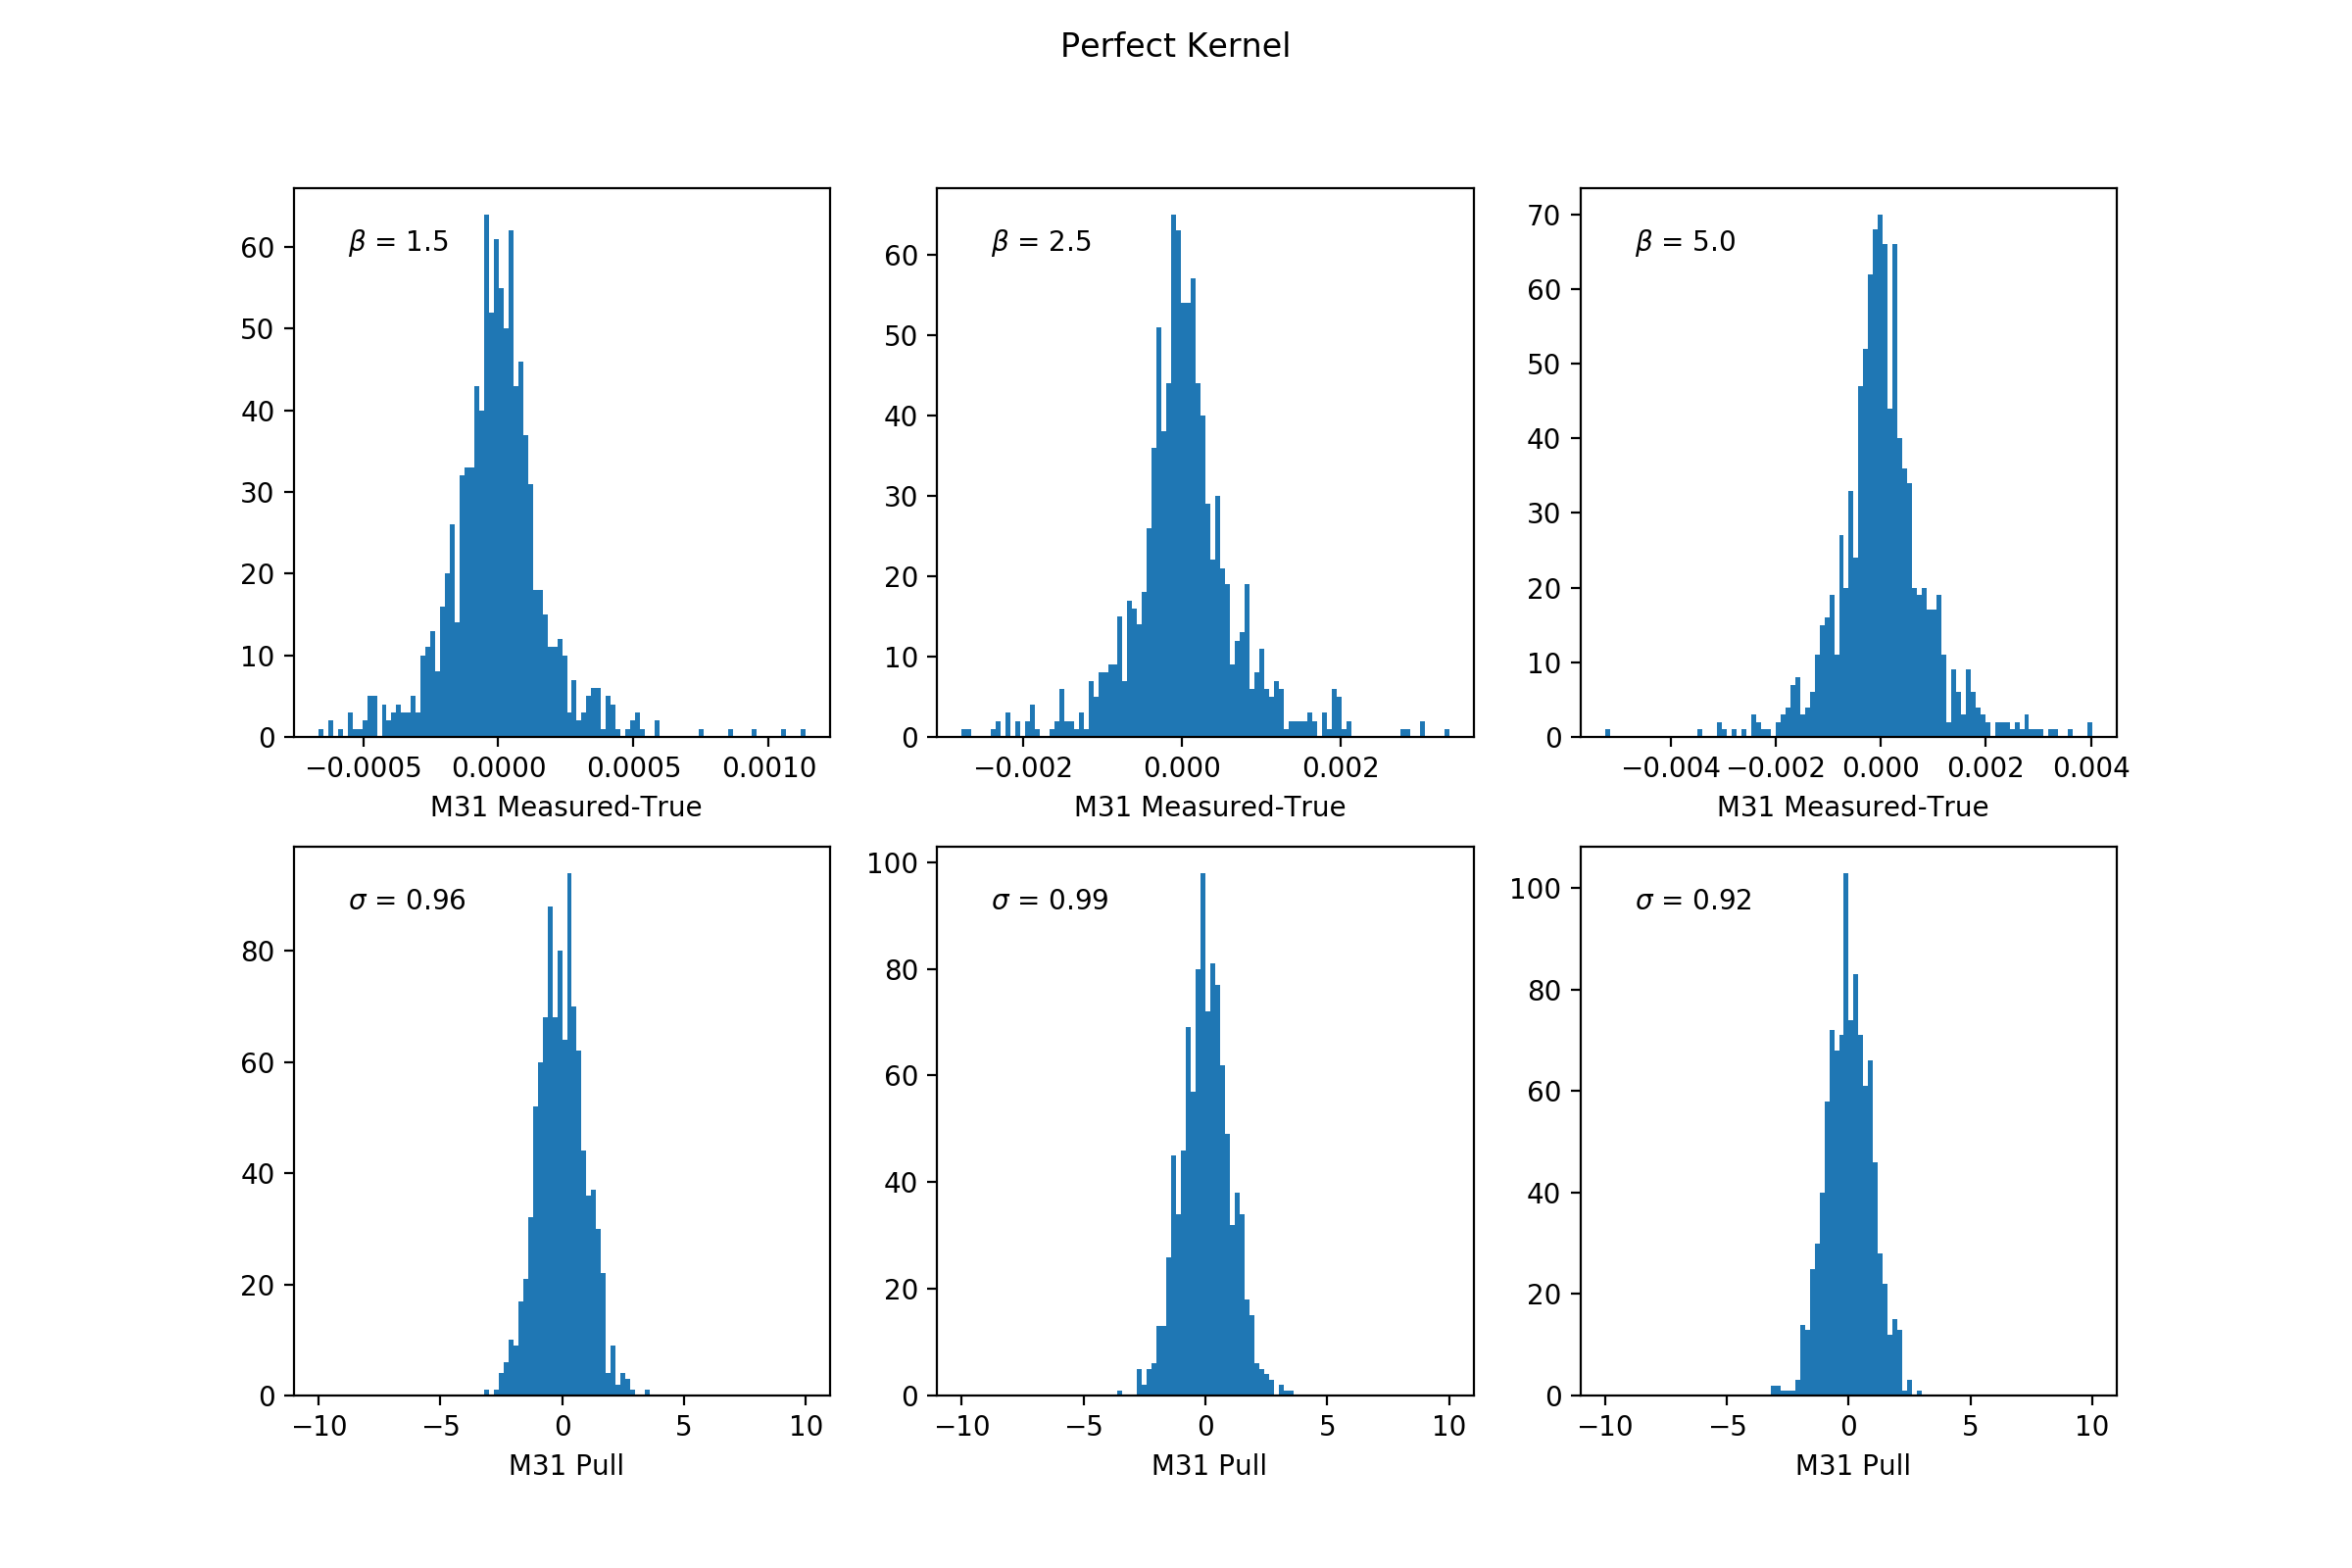

<IPython.core.display.Javascript object>


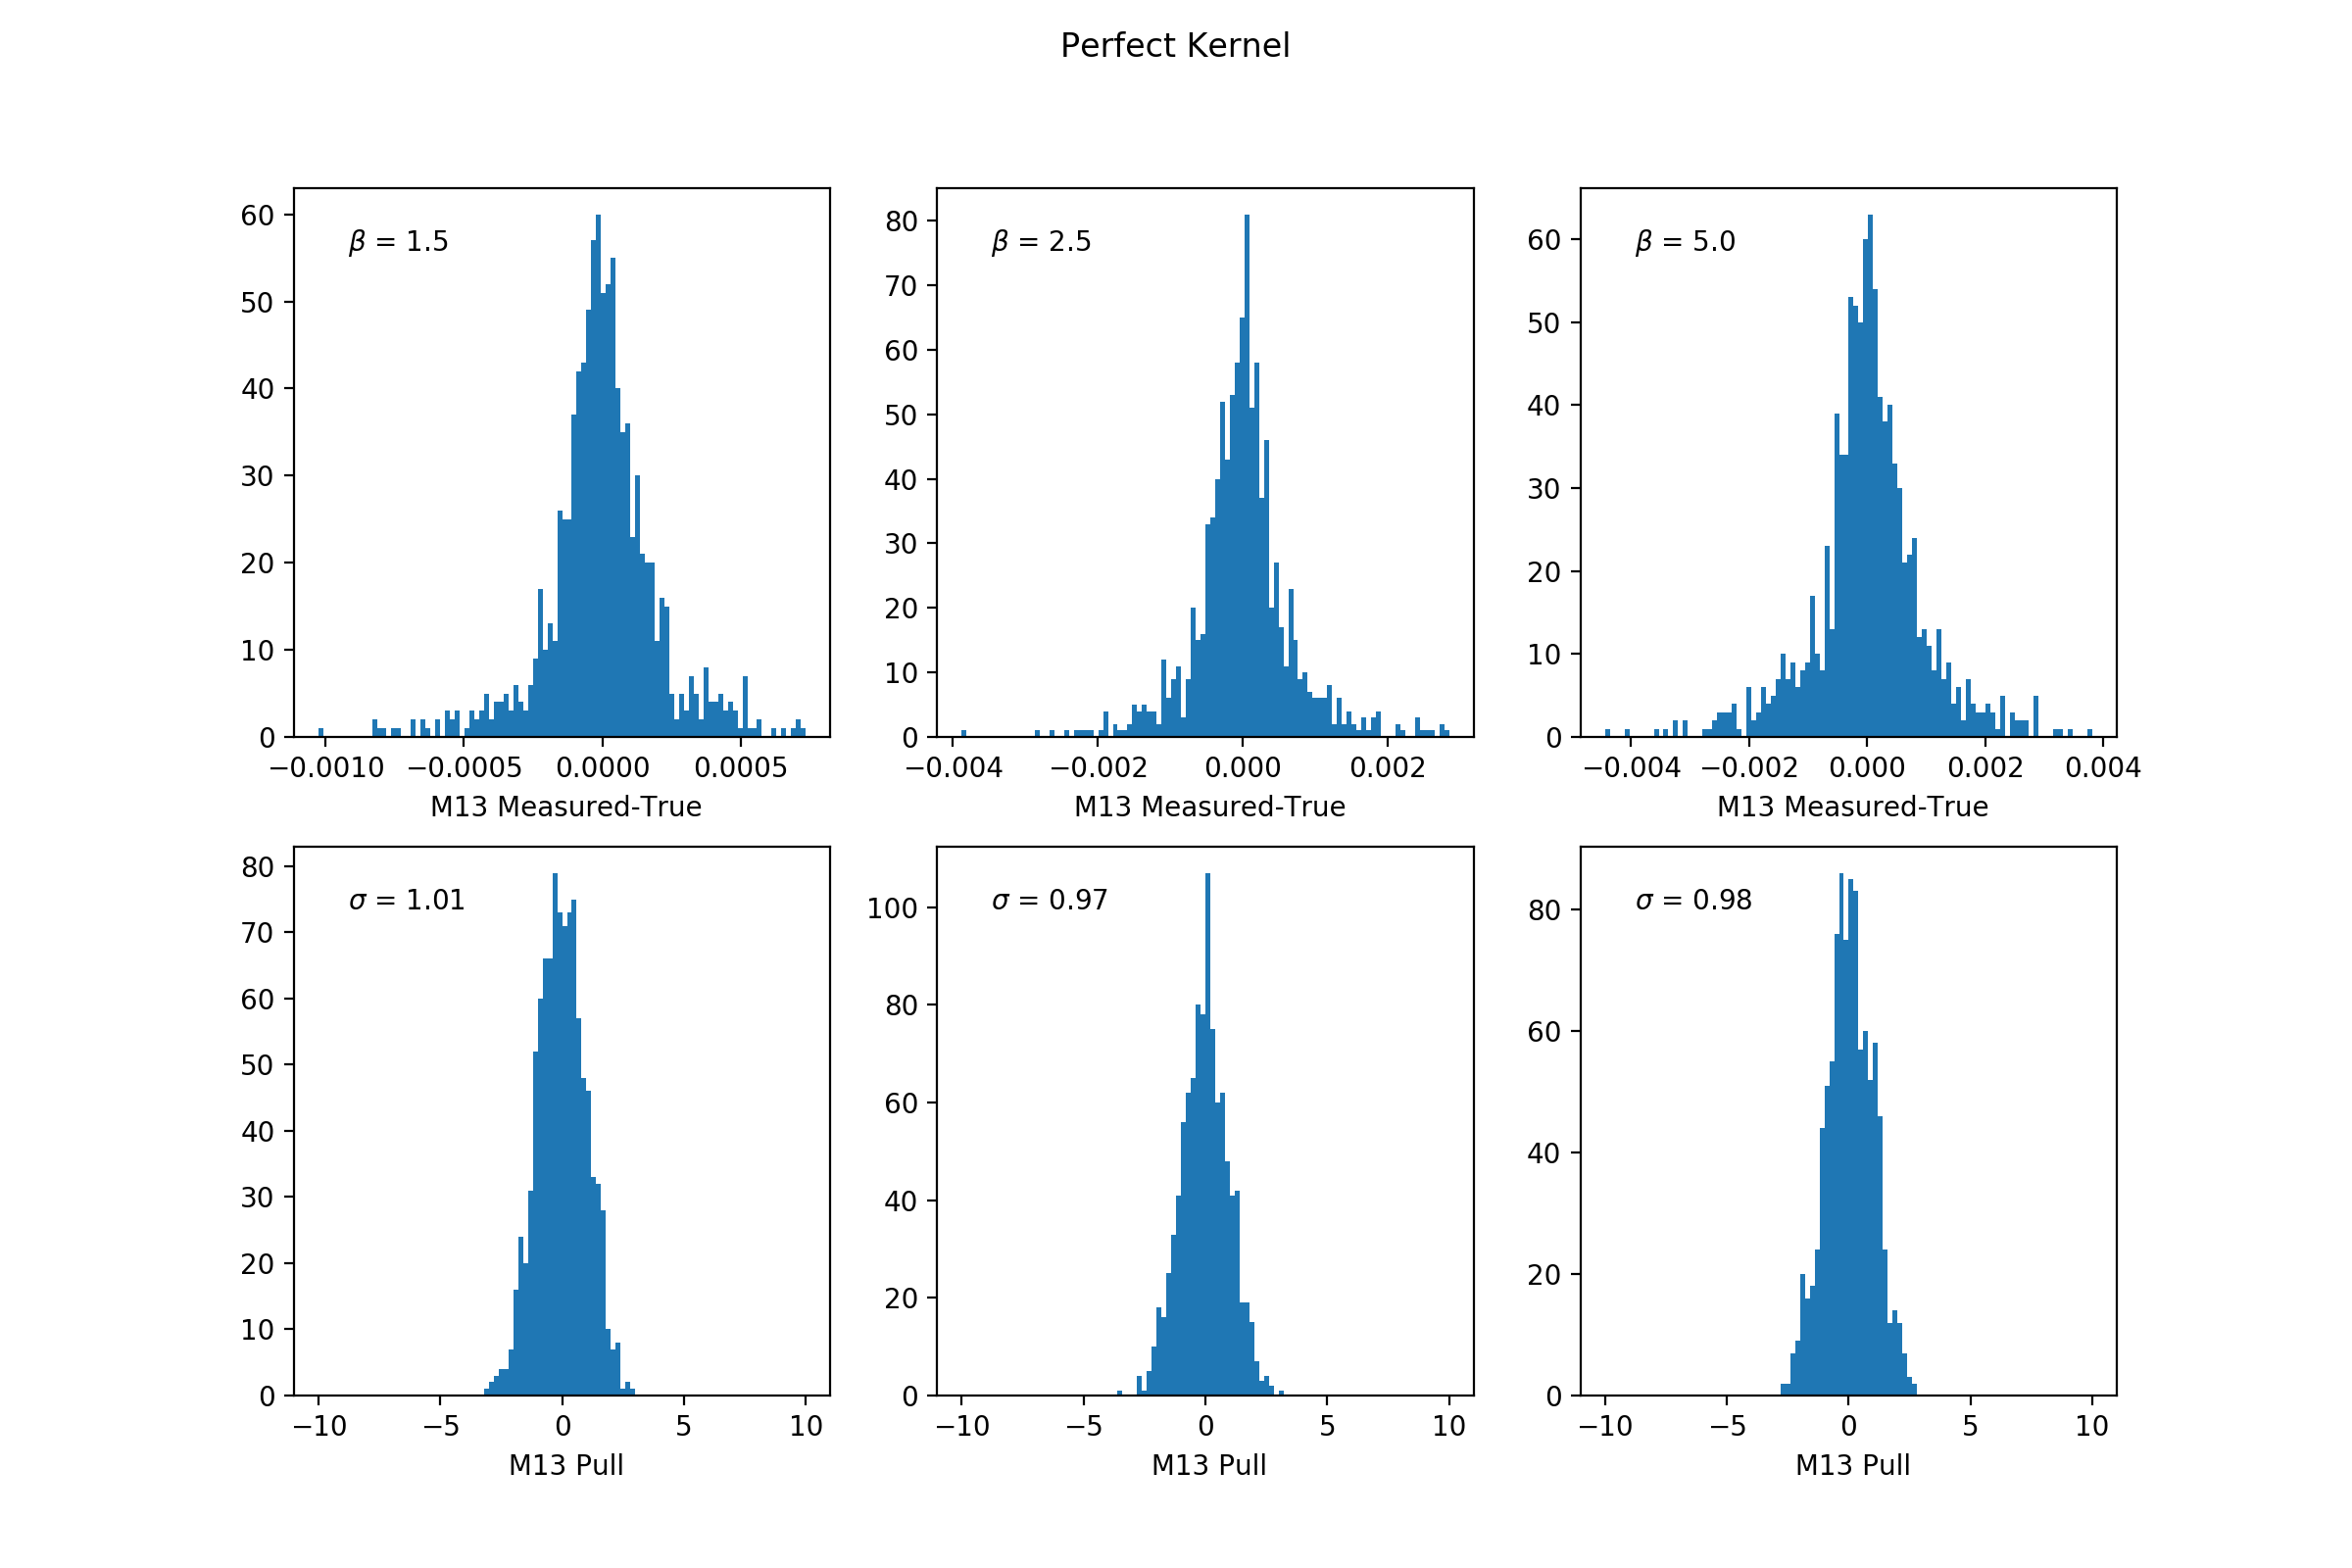

<IPython.core.display.Javascript object>


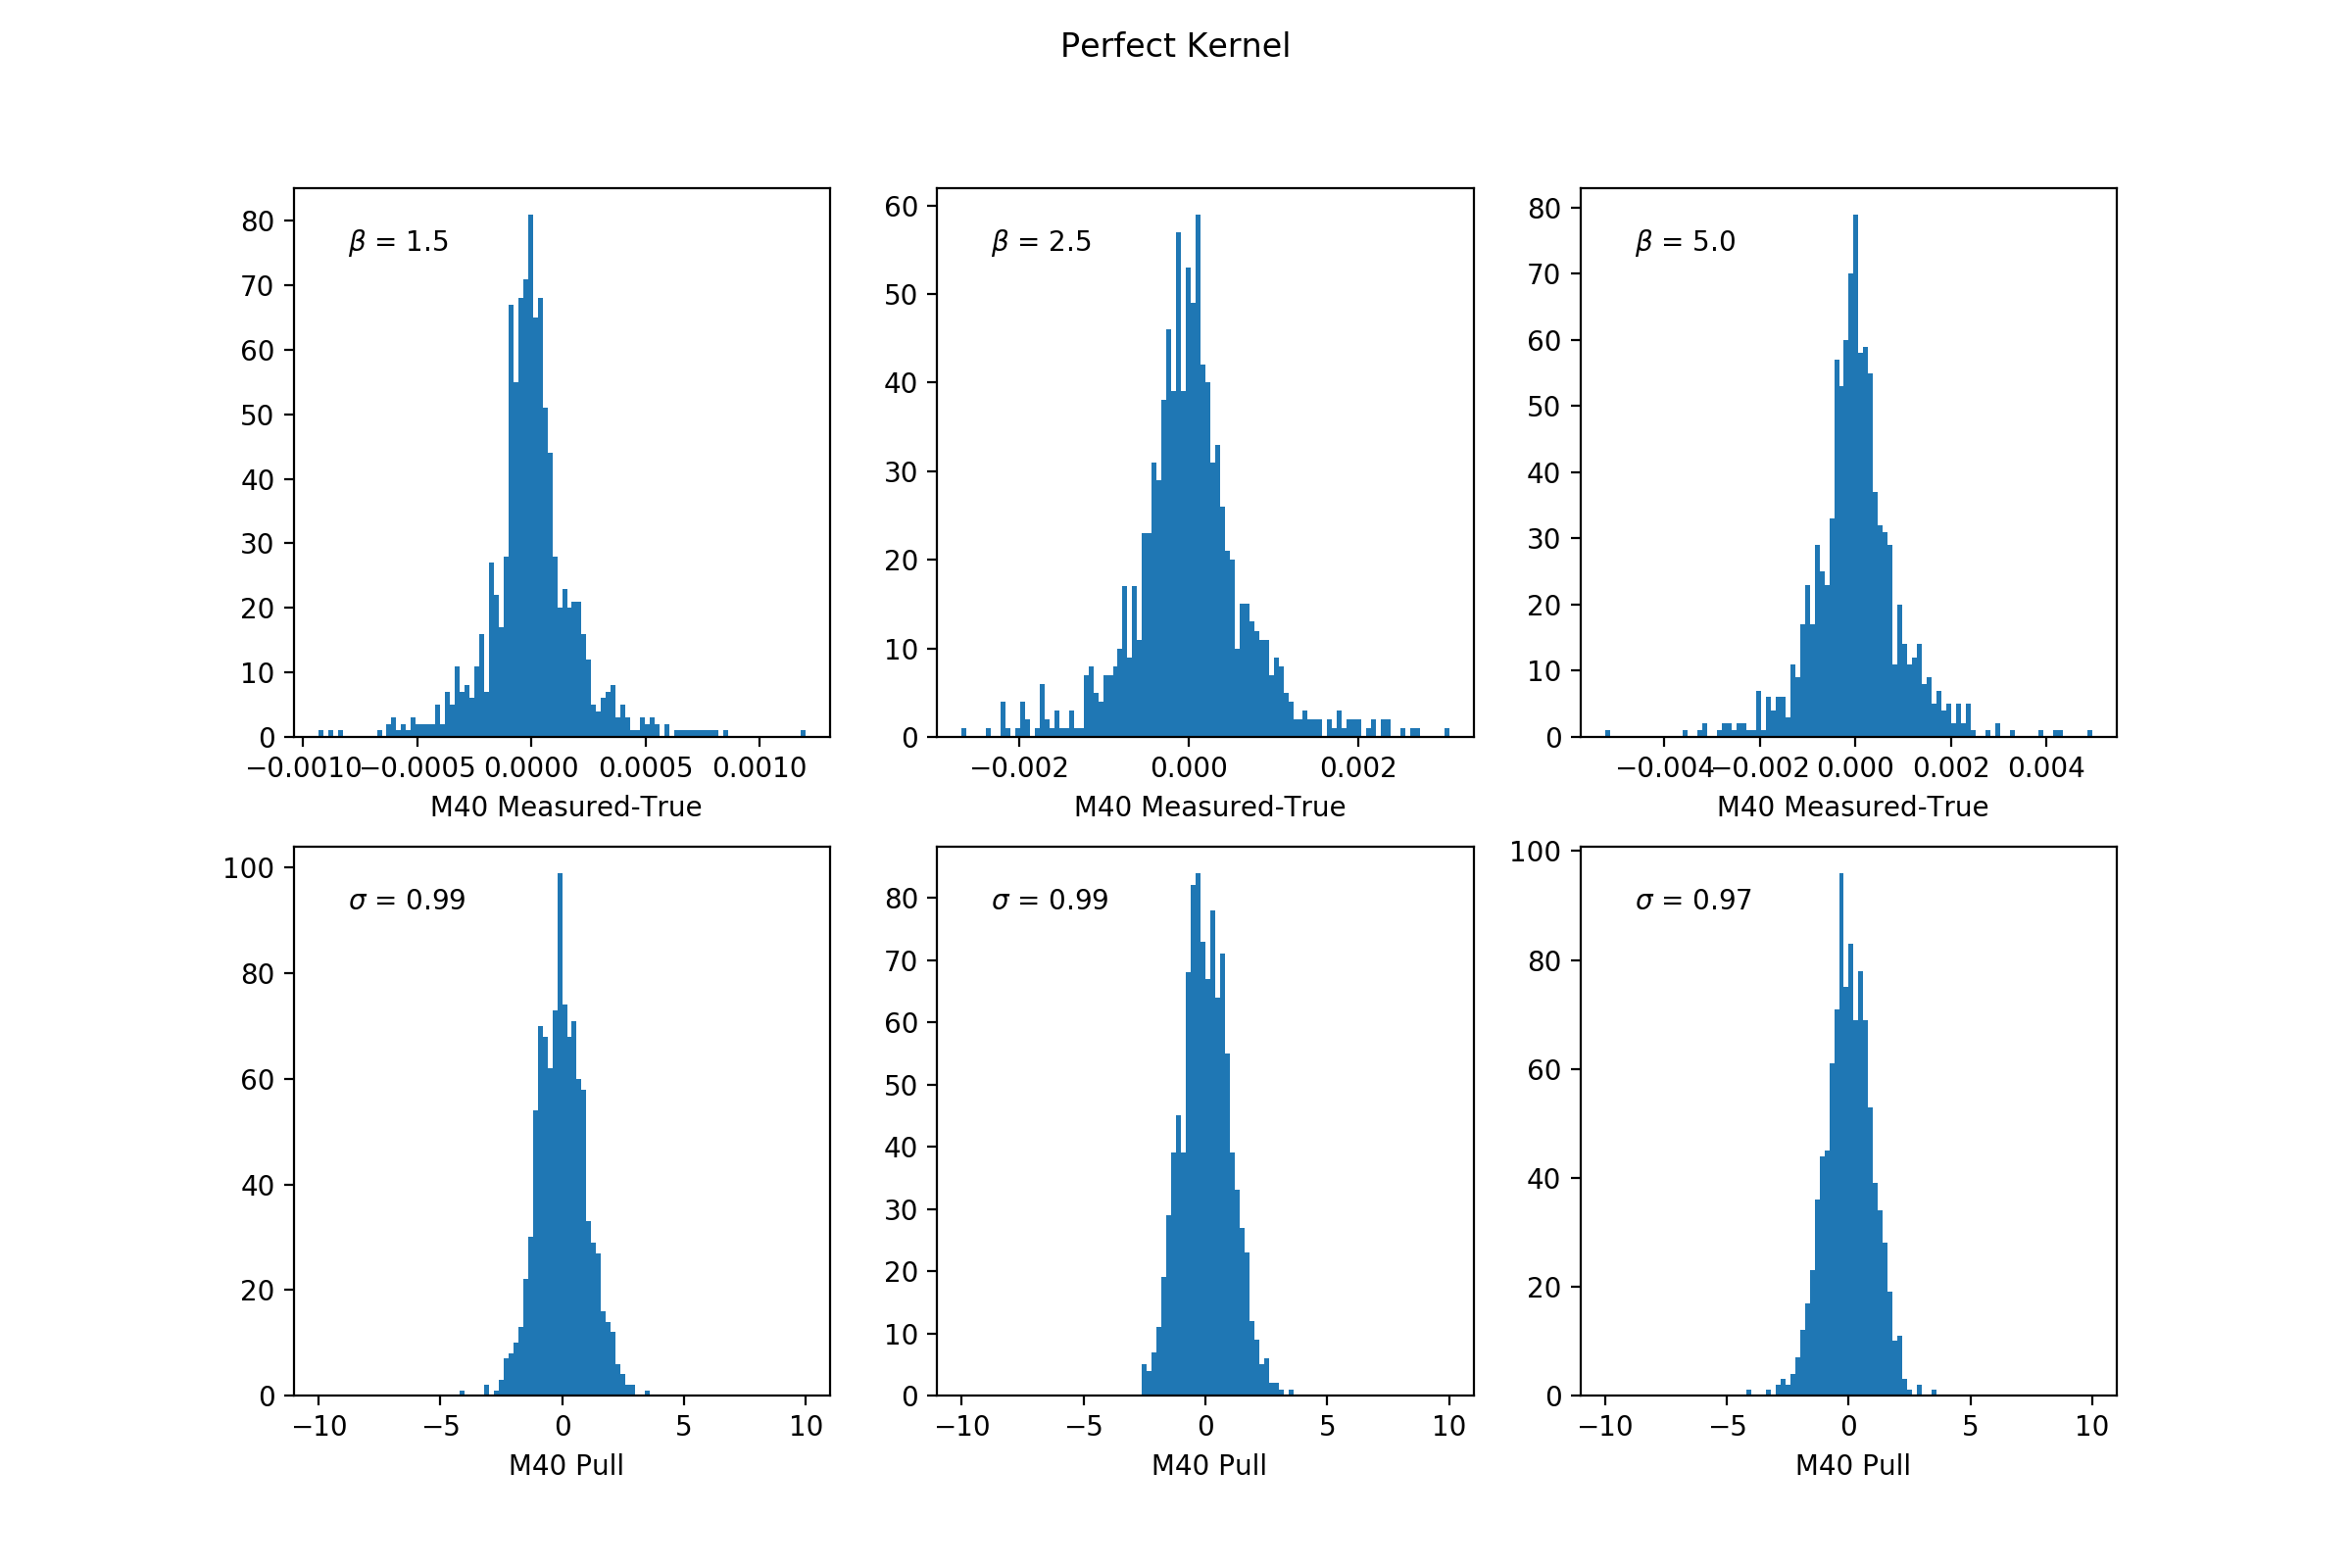

<IPython.core.display.Javascript object>


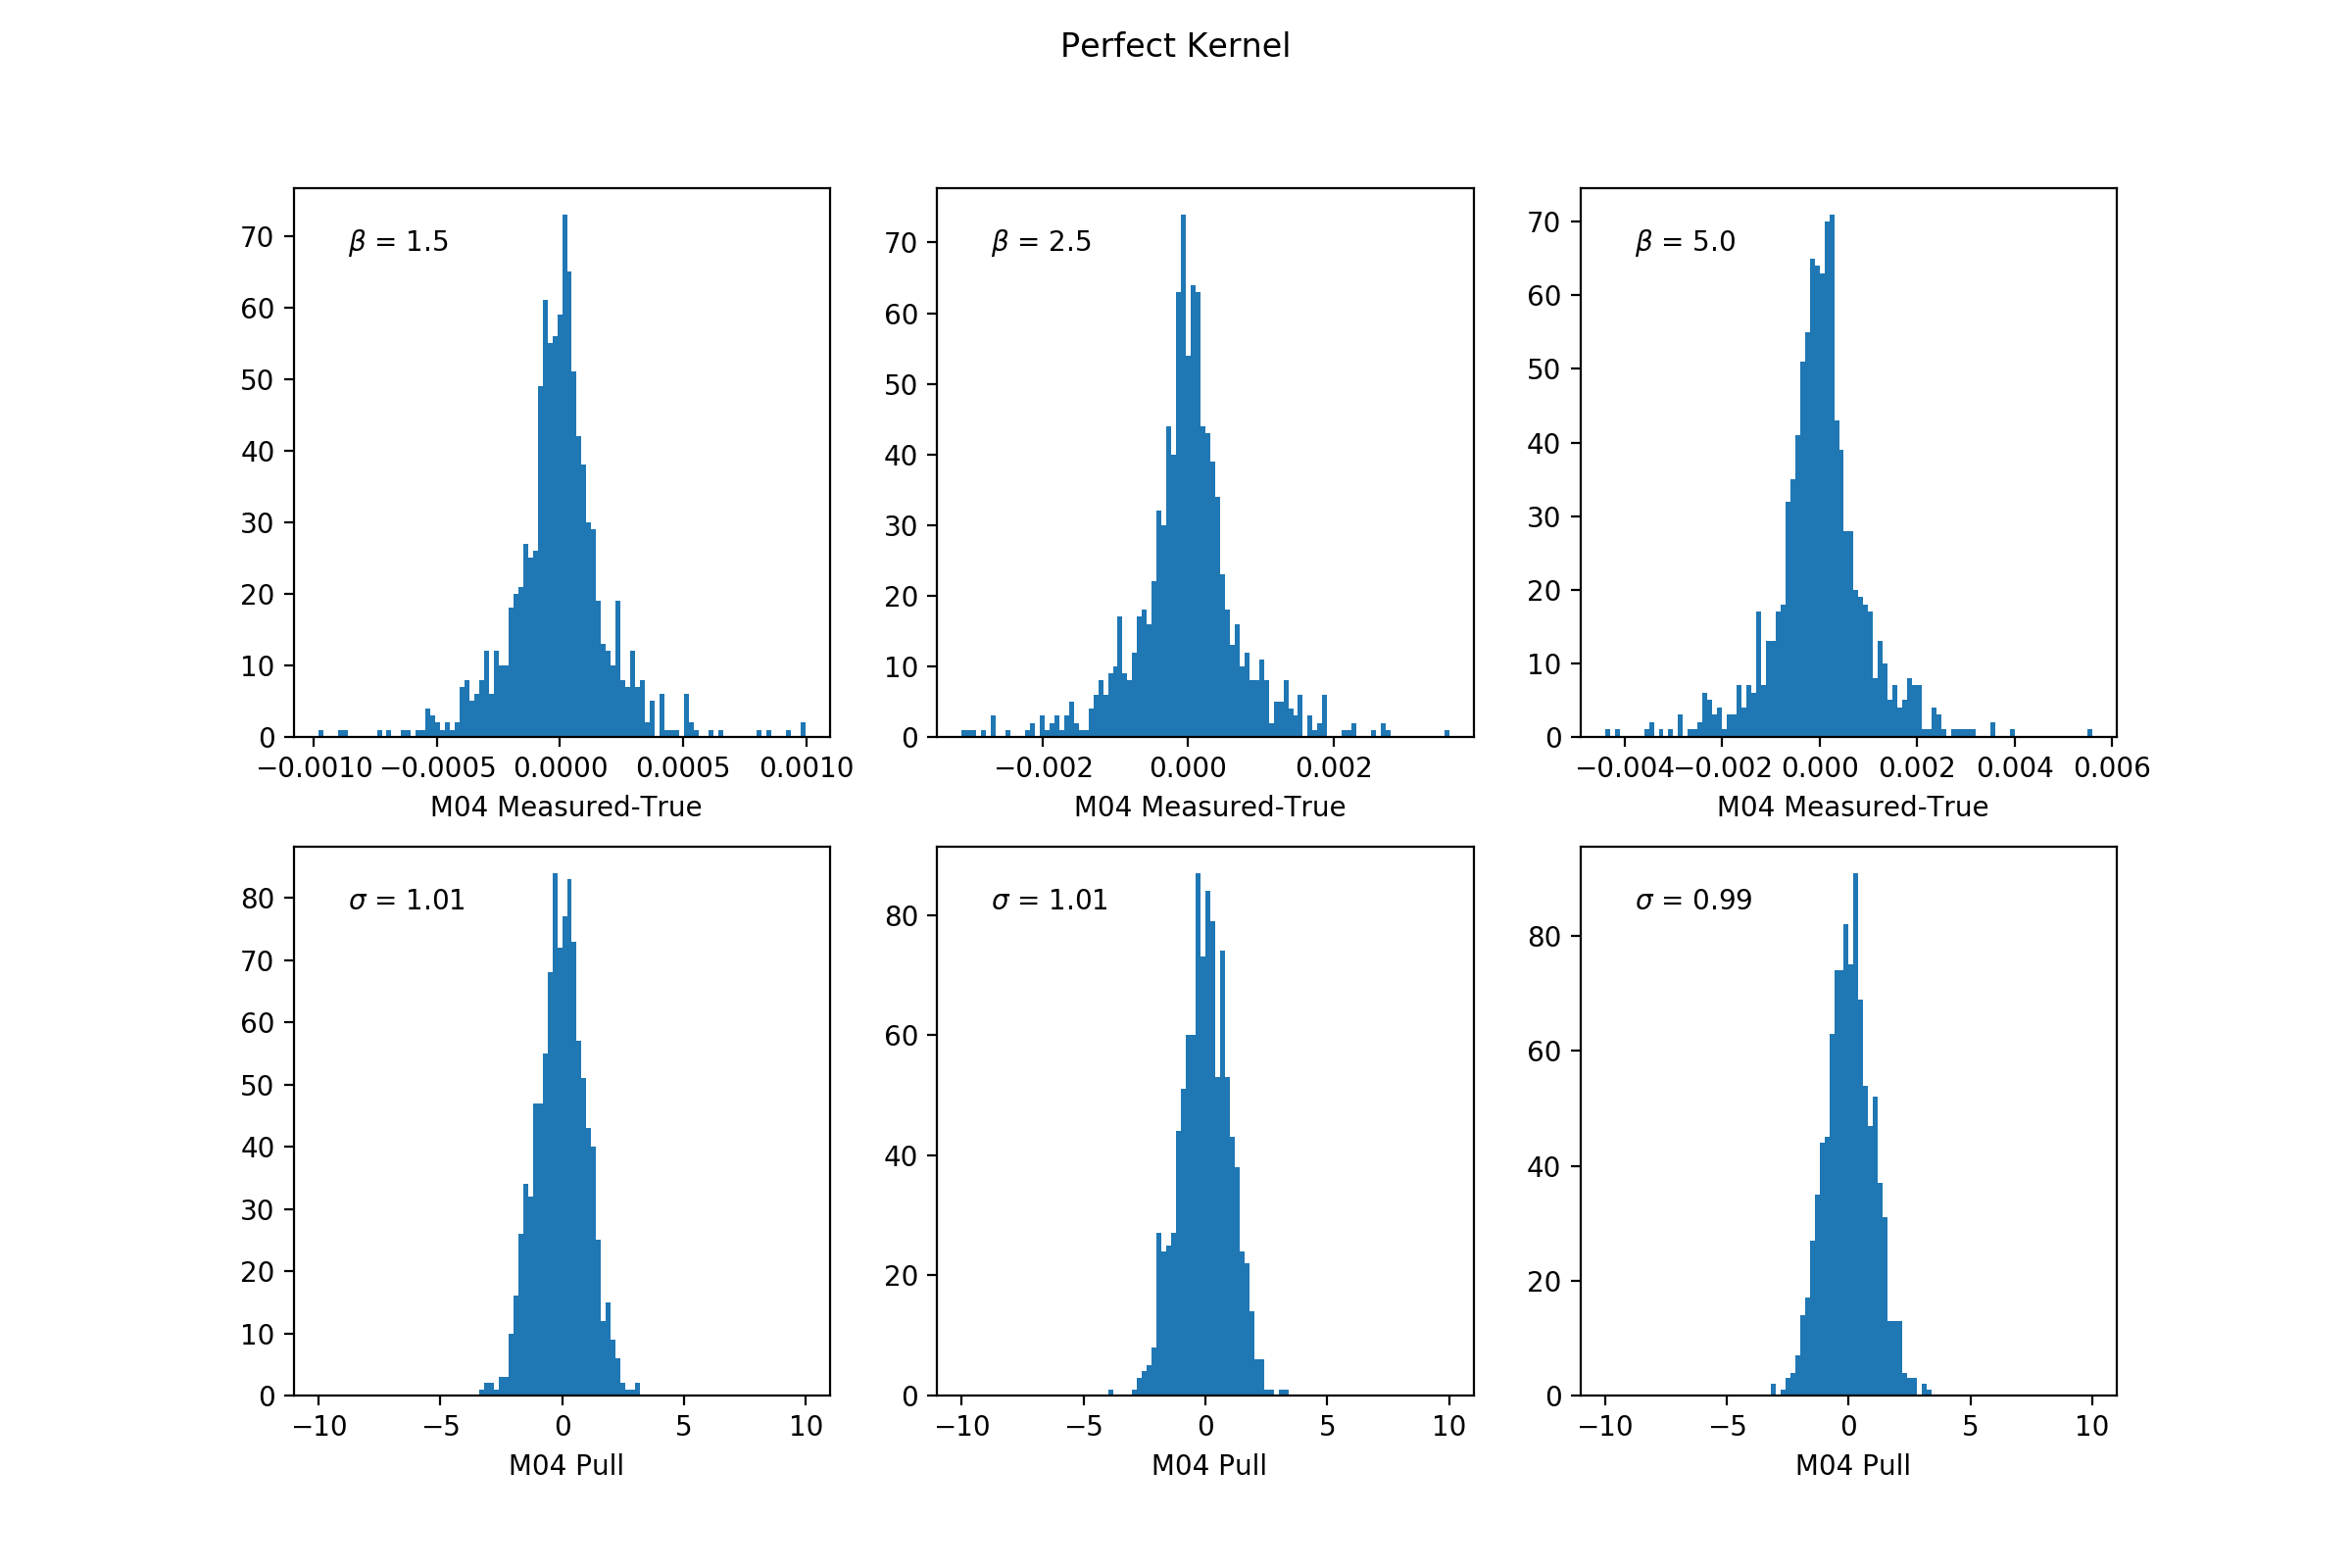

<IPython.core.display.Javascript object>


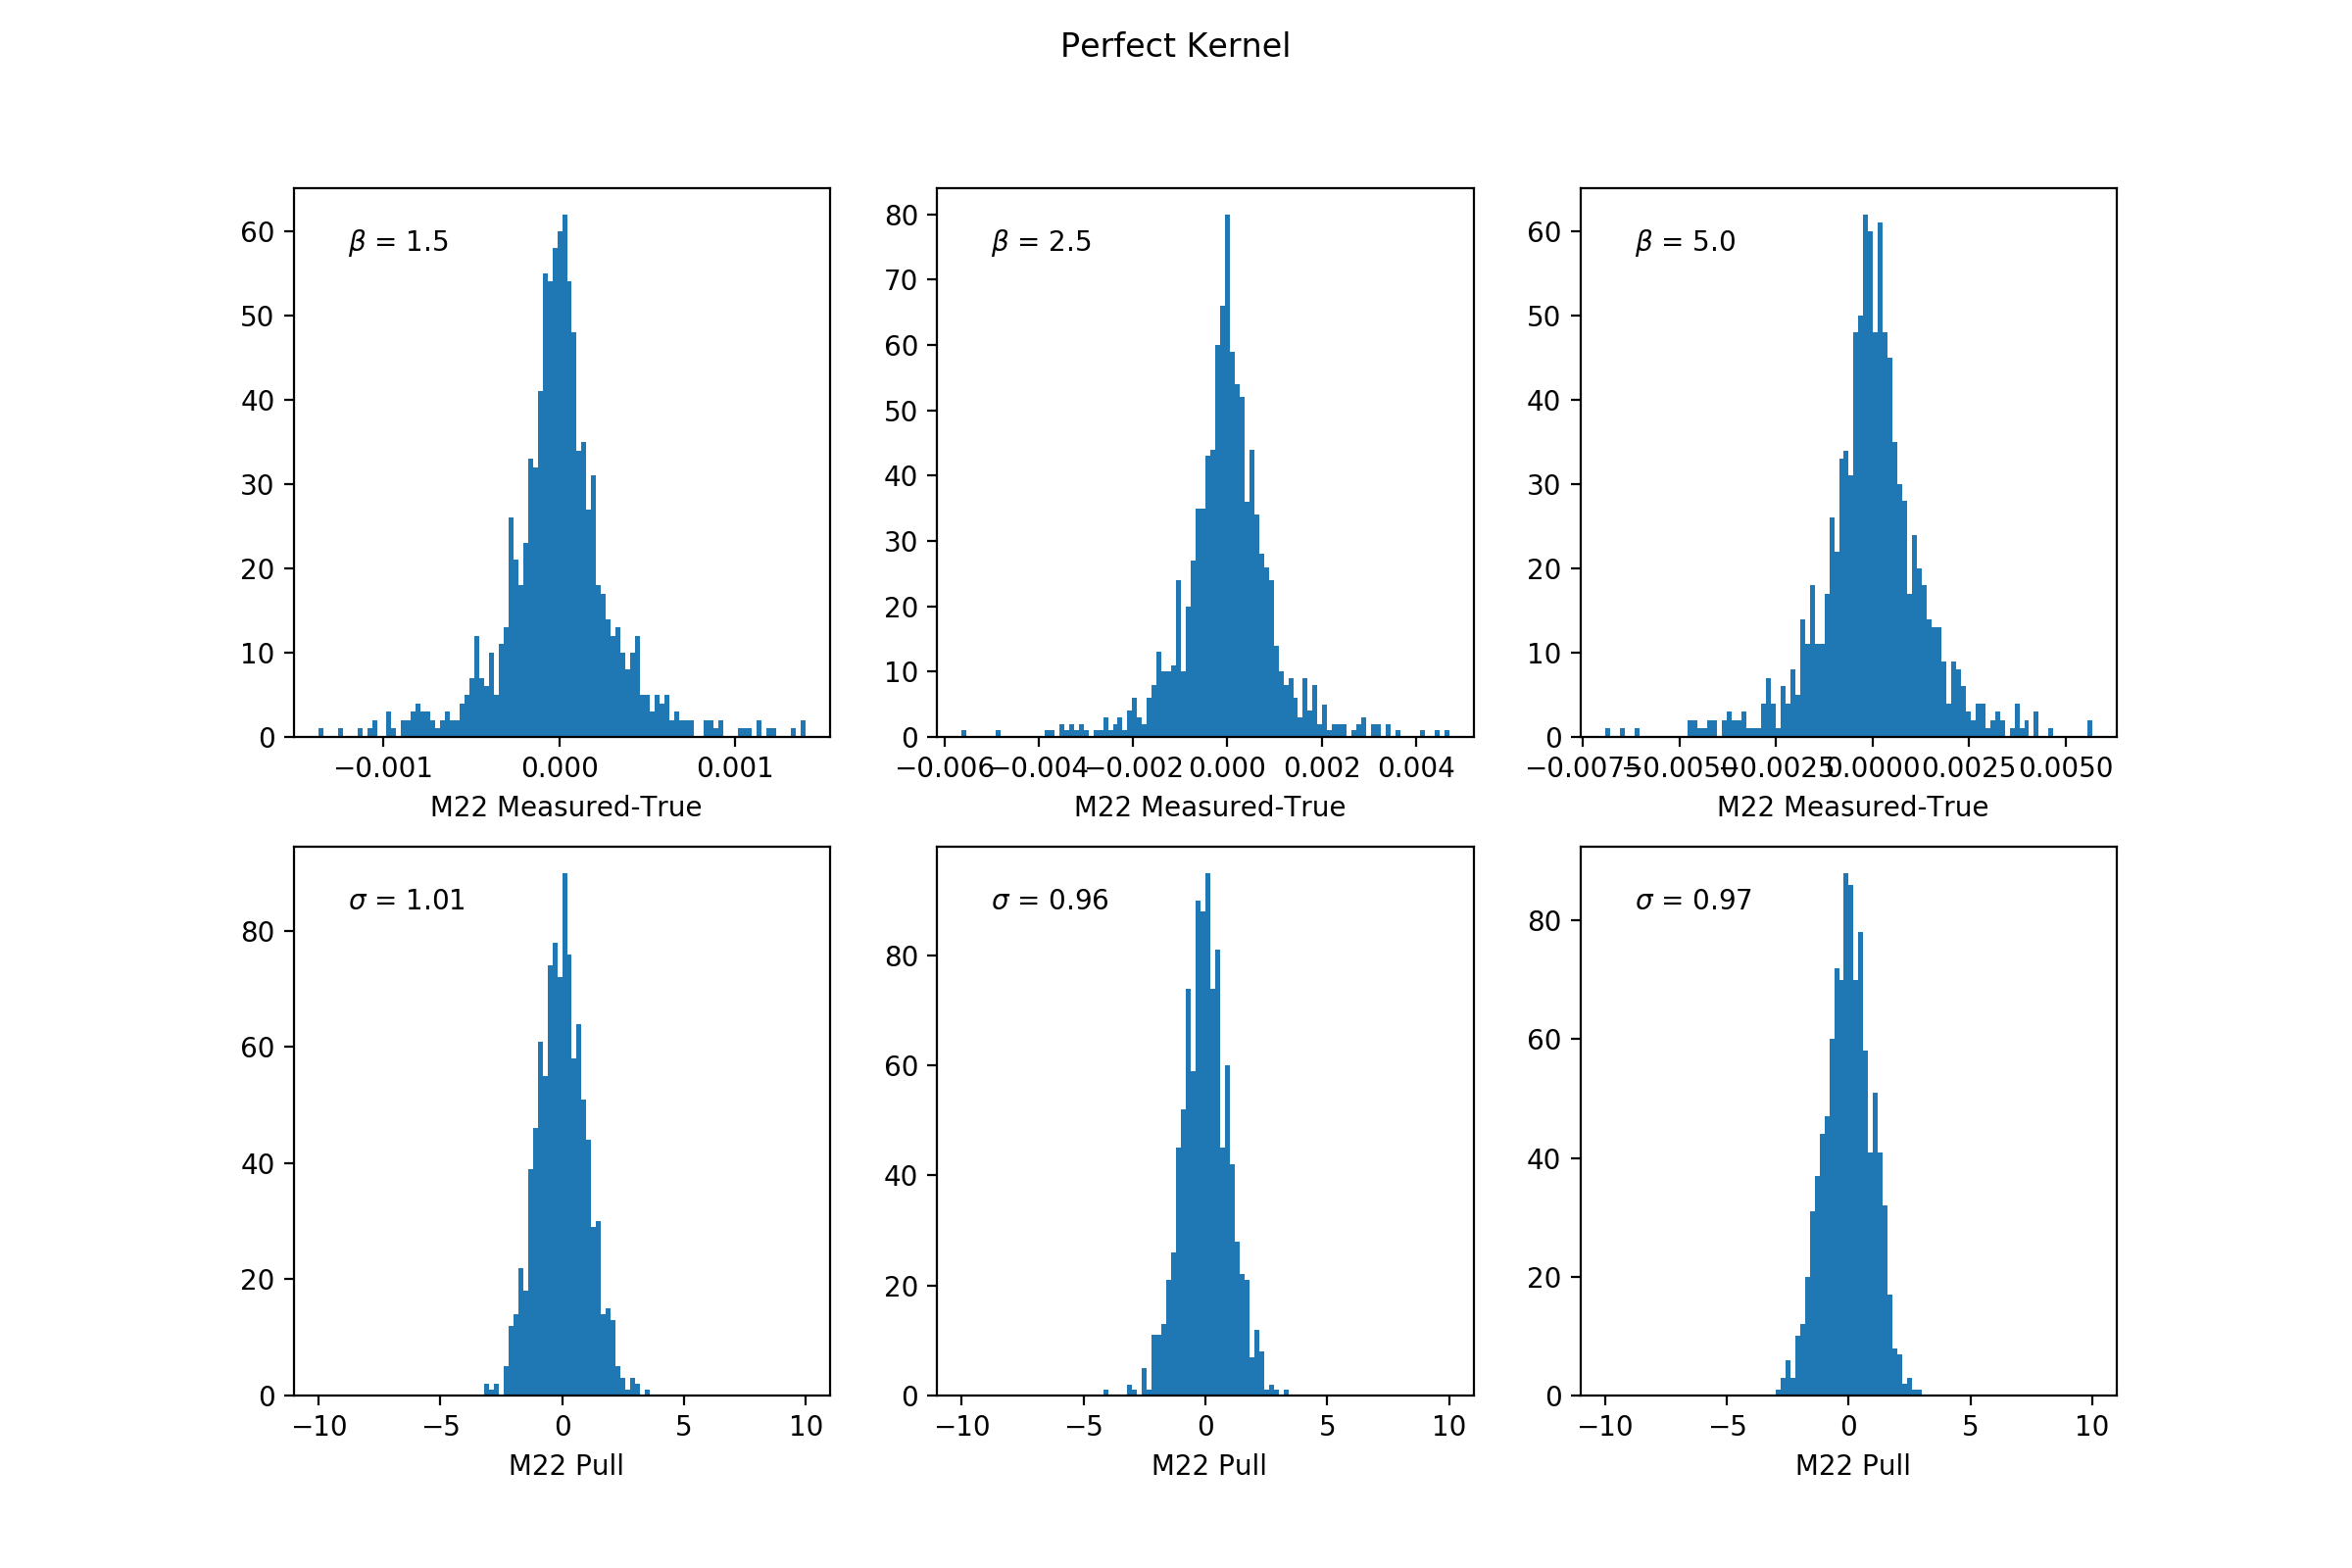

<IPython.core.display.Javascript object>


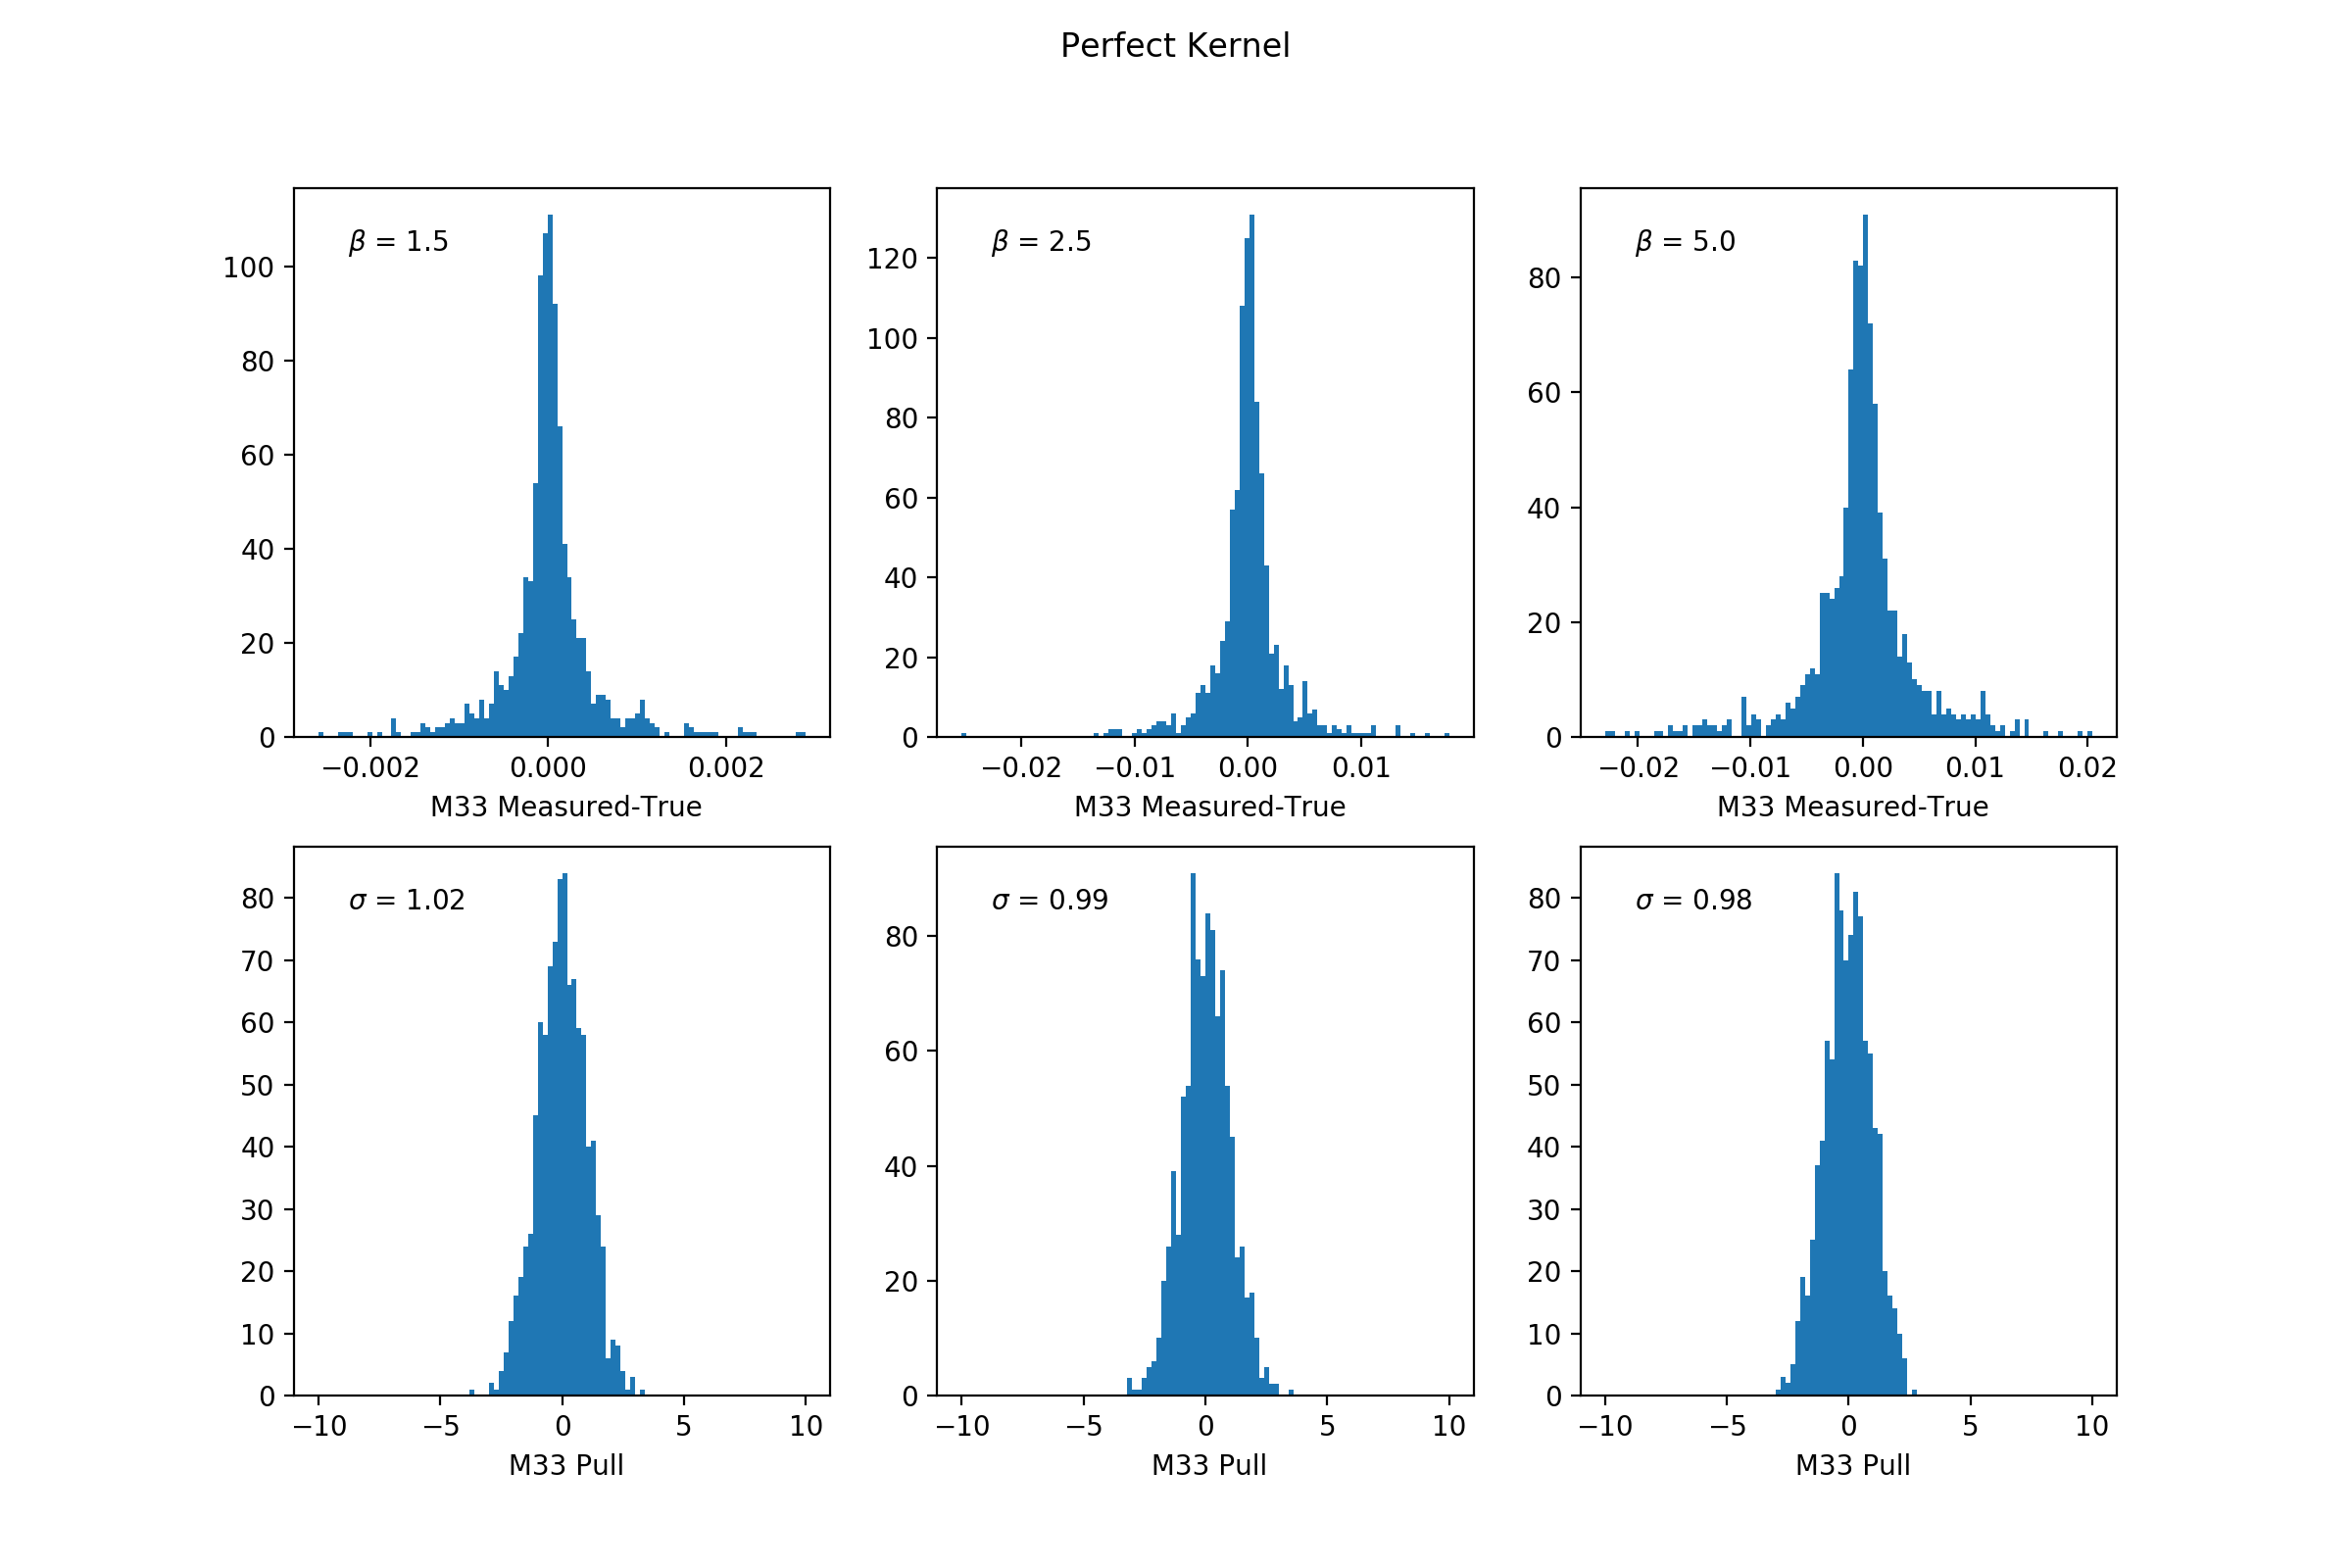

<IPython.core.display.Javascript object>


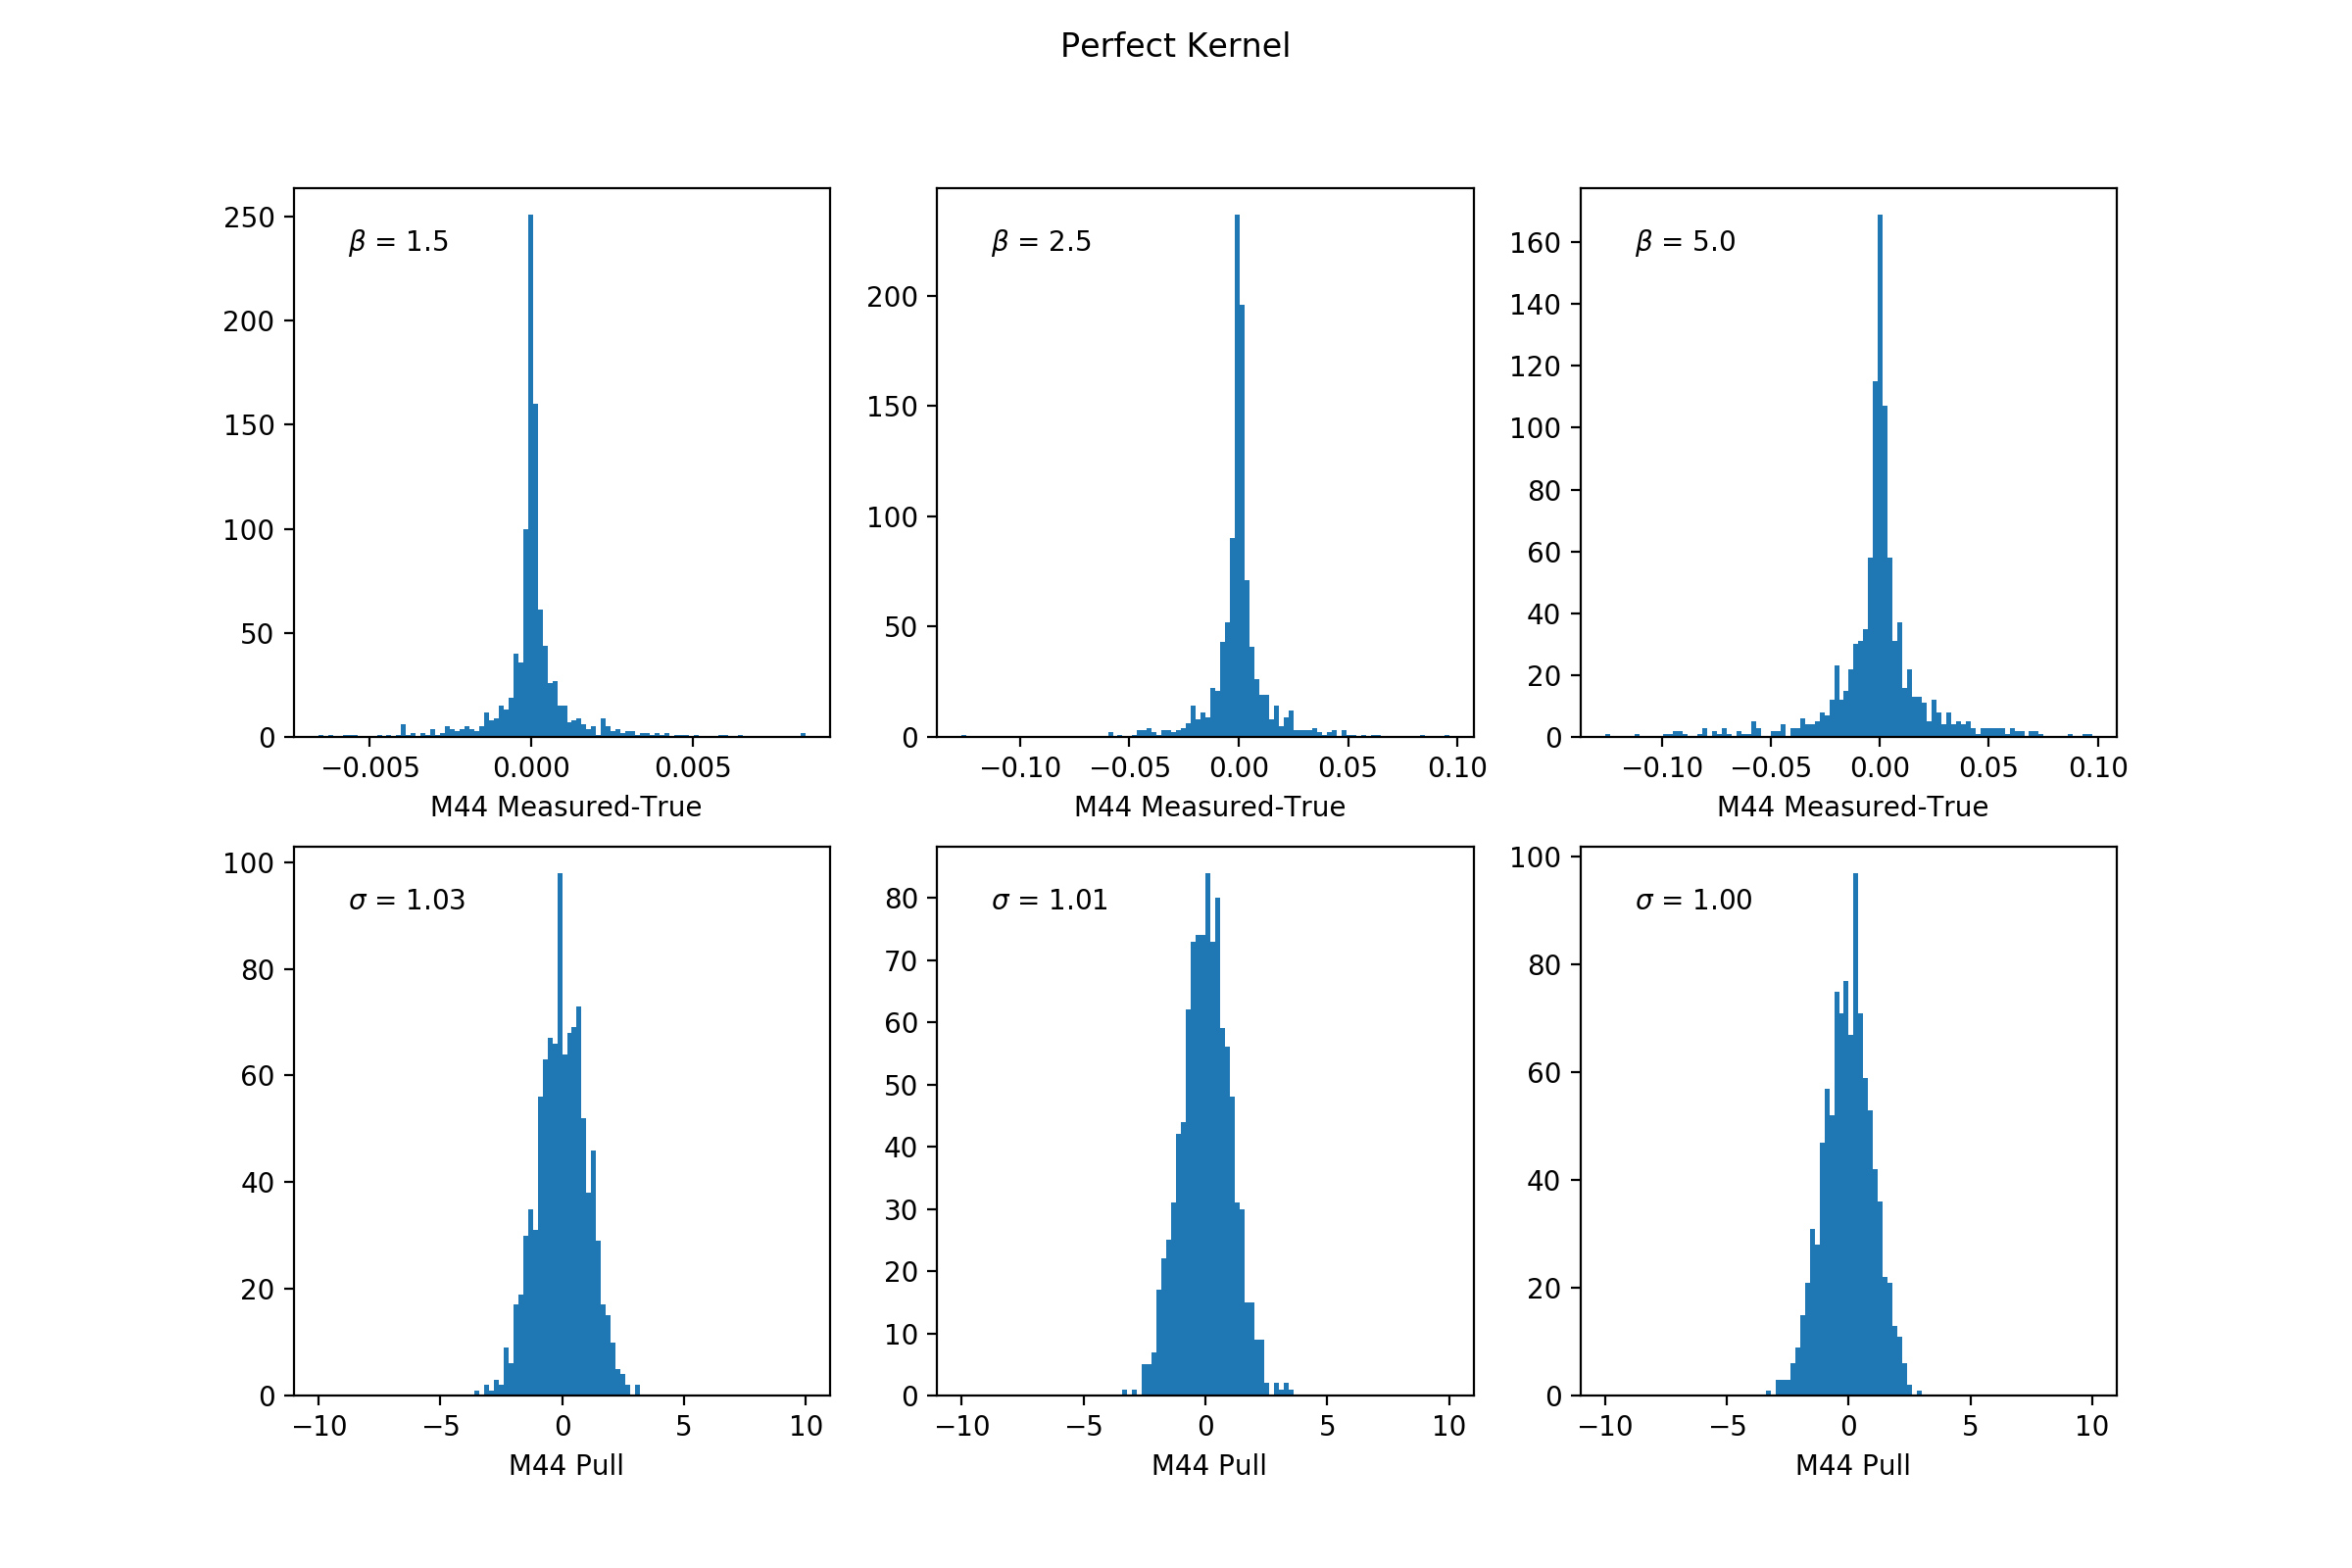

<IPython.core.display.Javascript object>


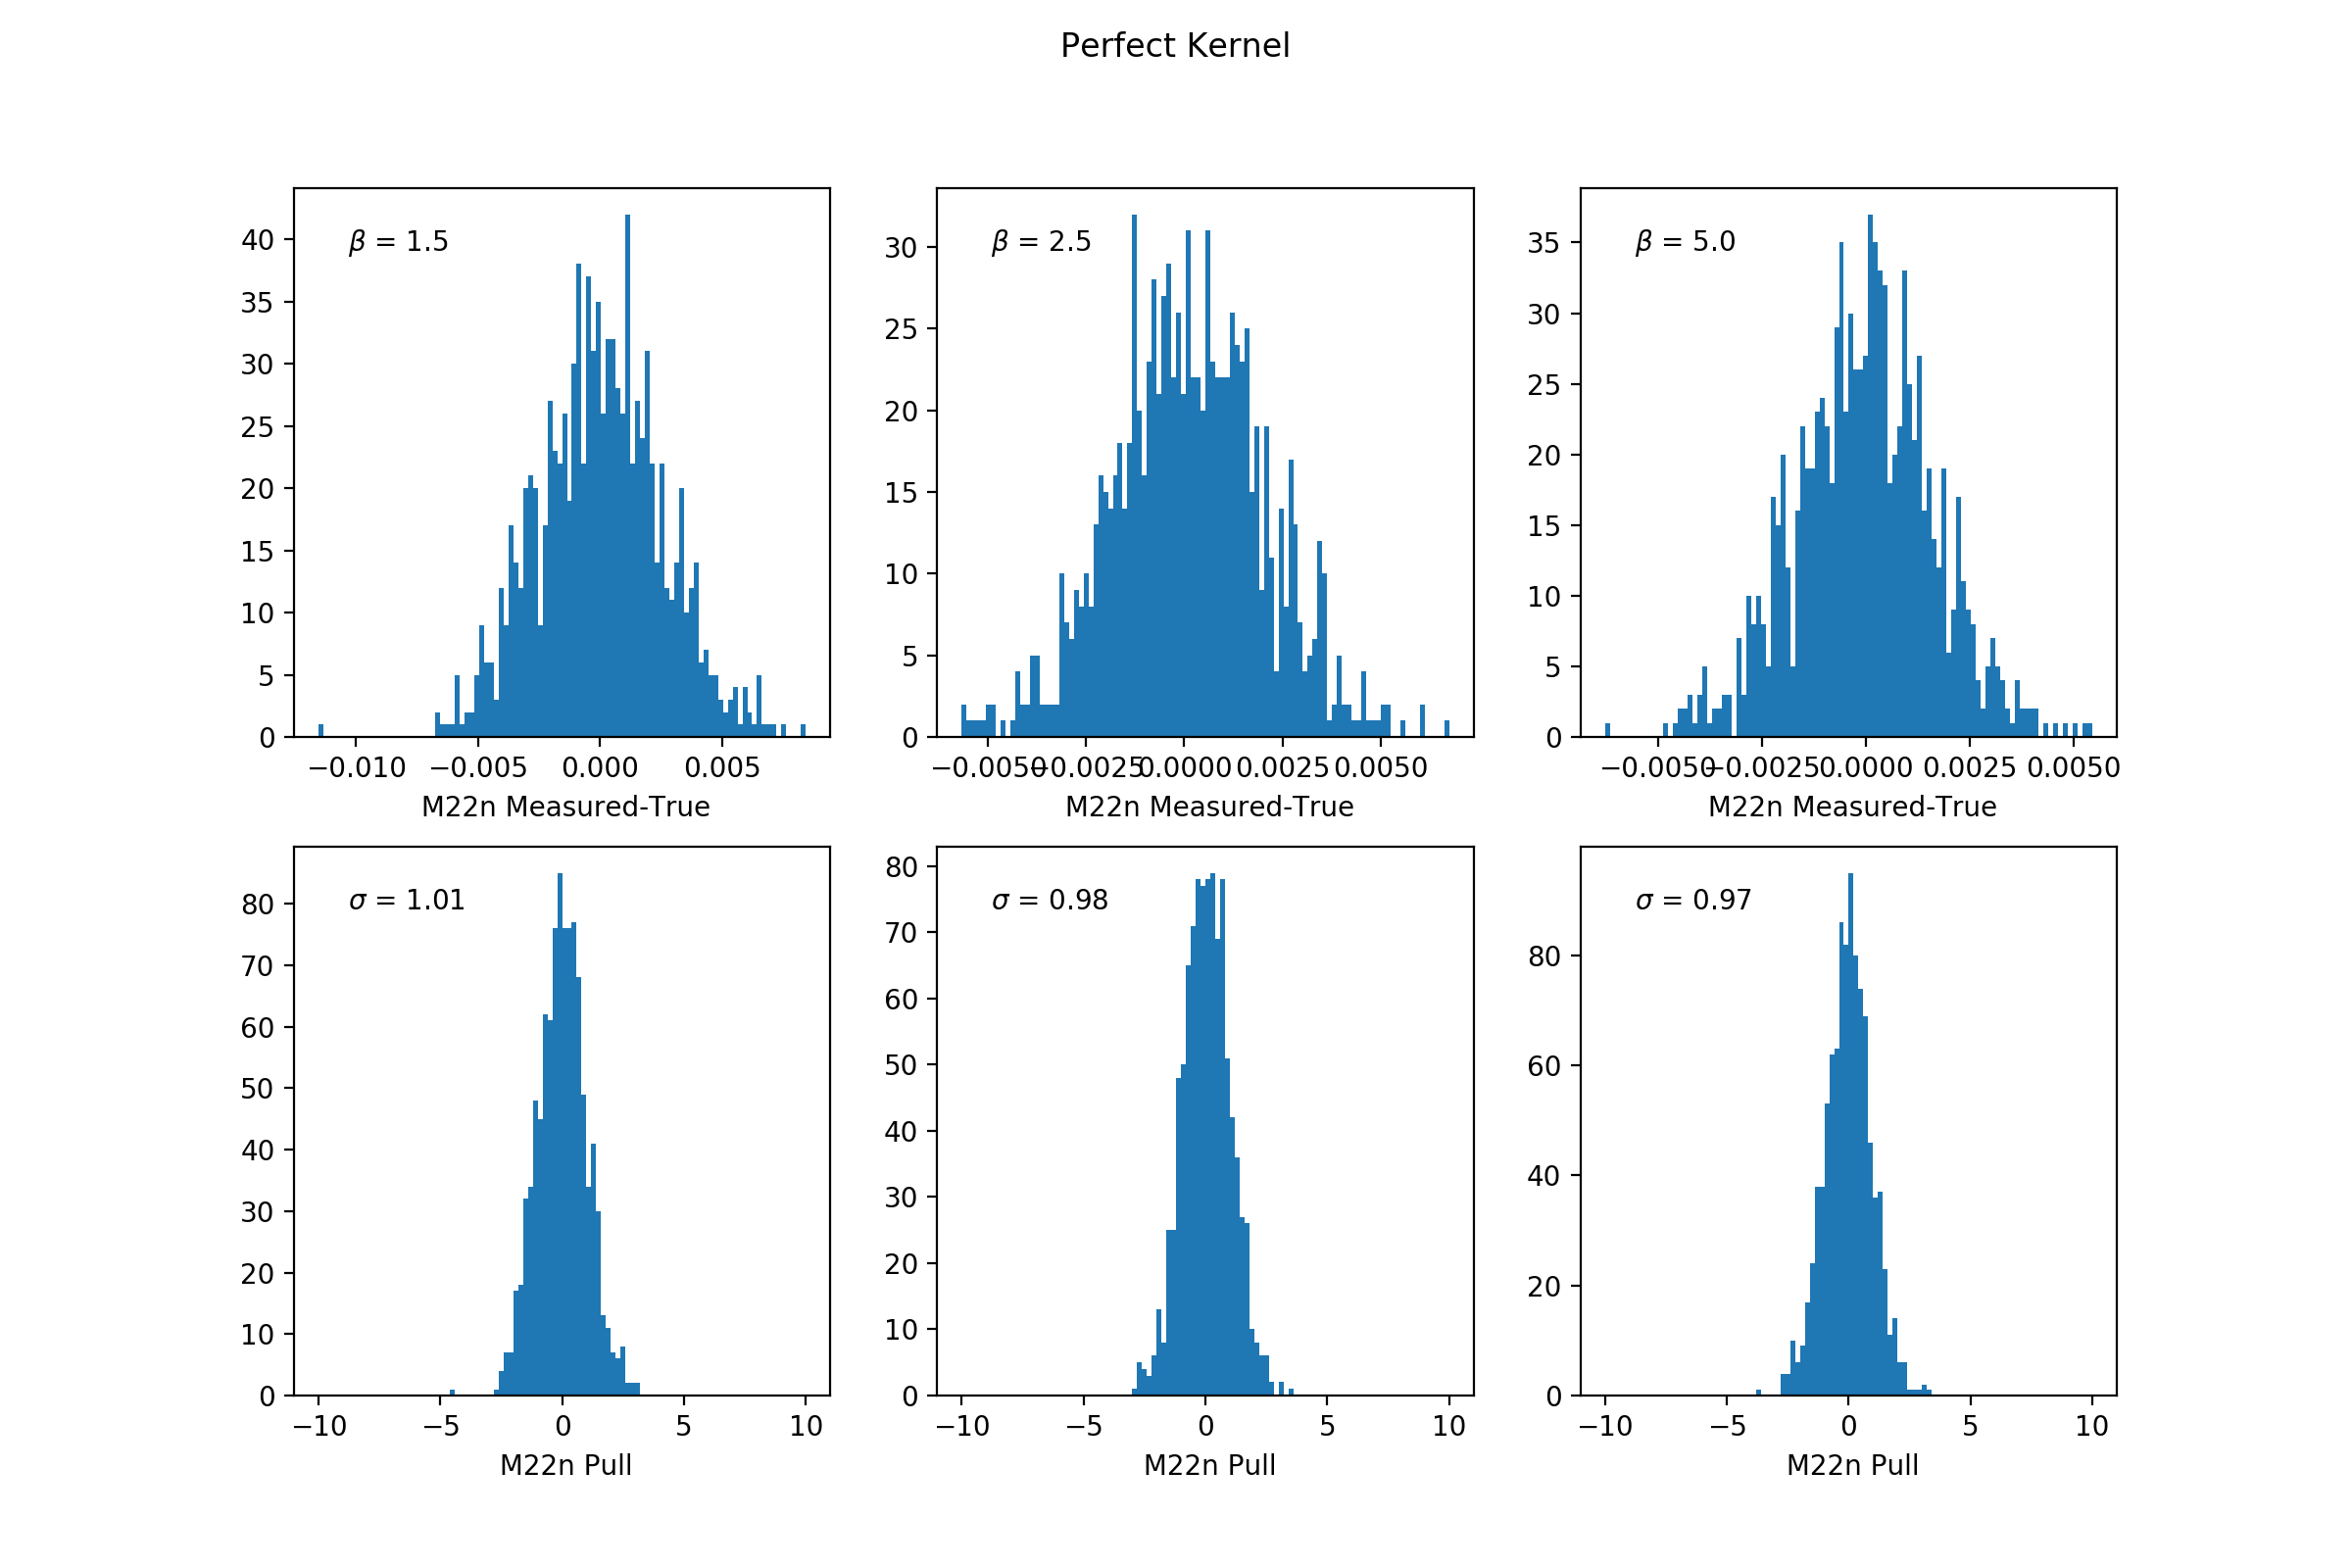

<IPython.core.display.Javascript object>


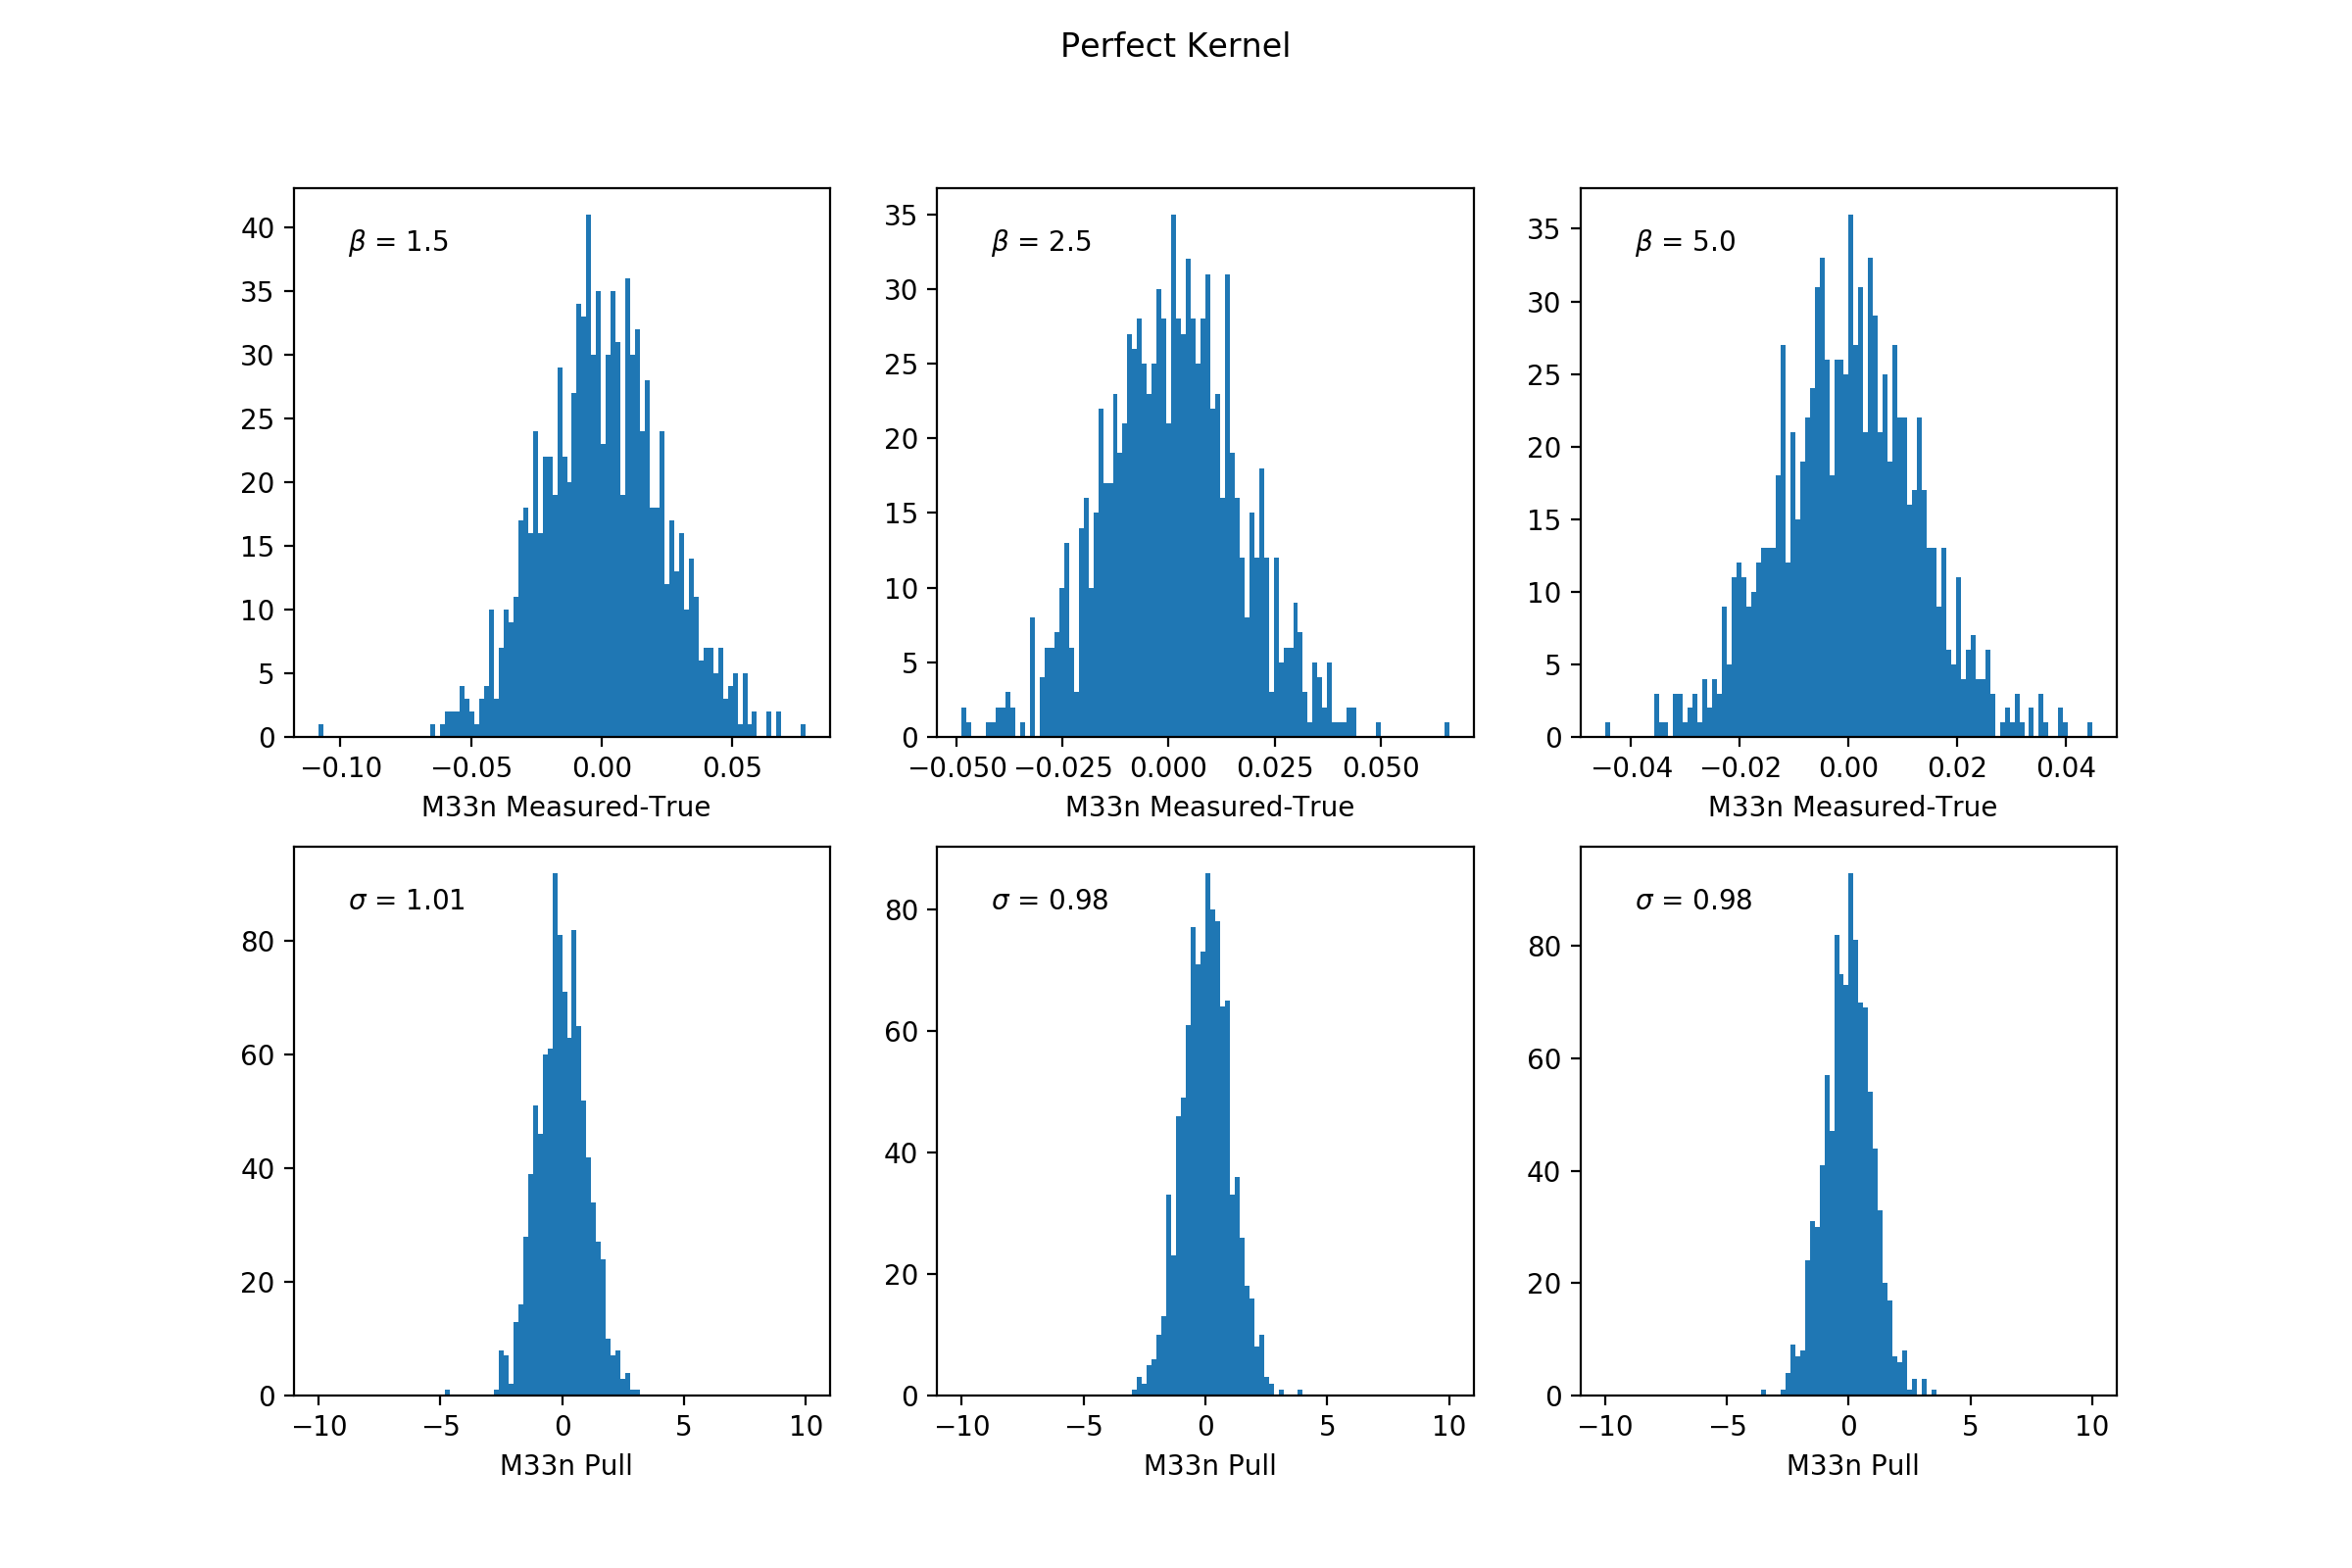

<IPython.core.display.Javascript object>


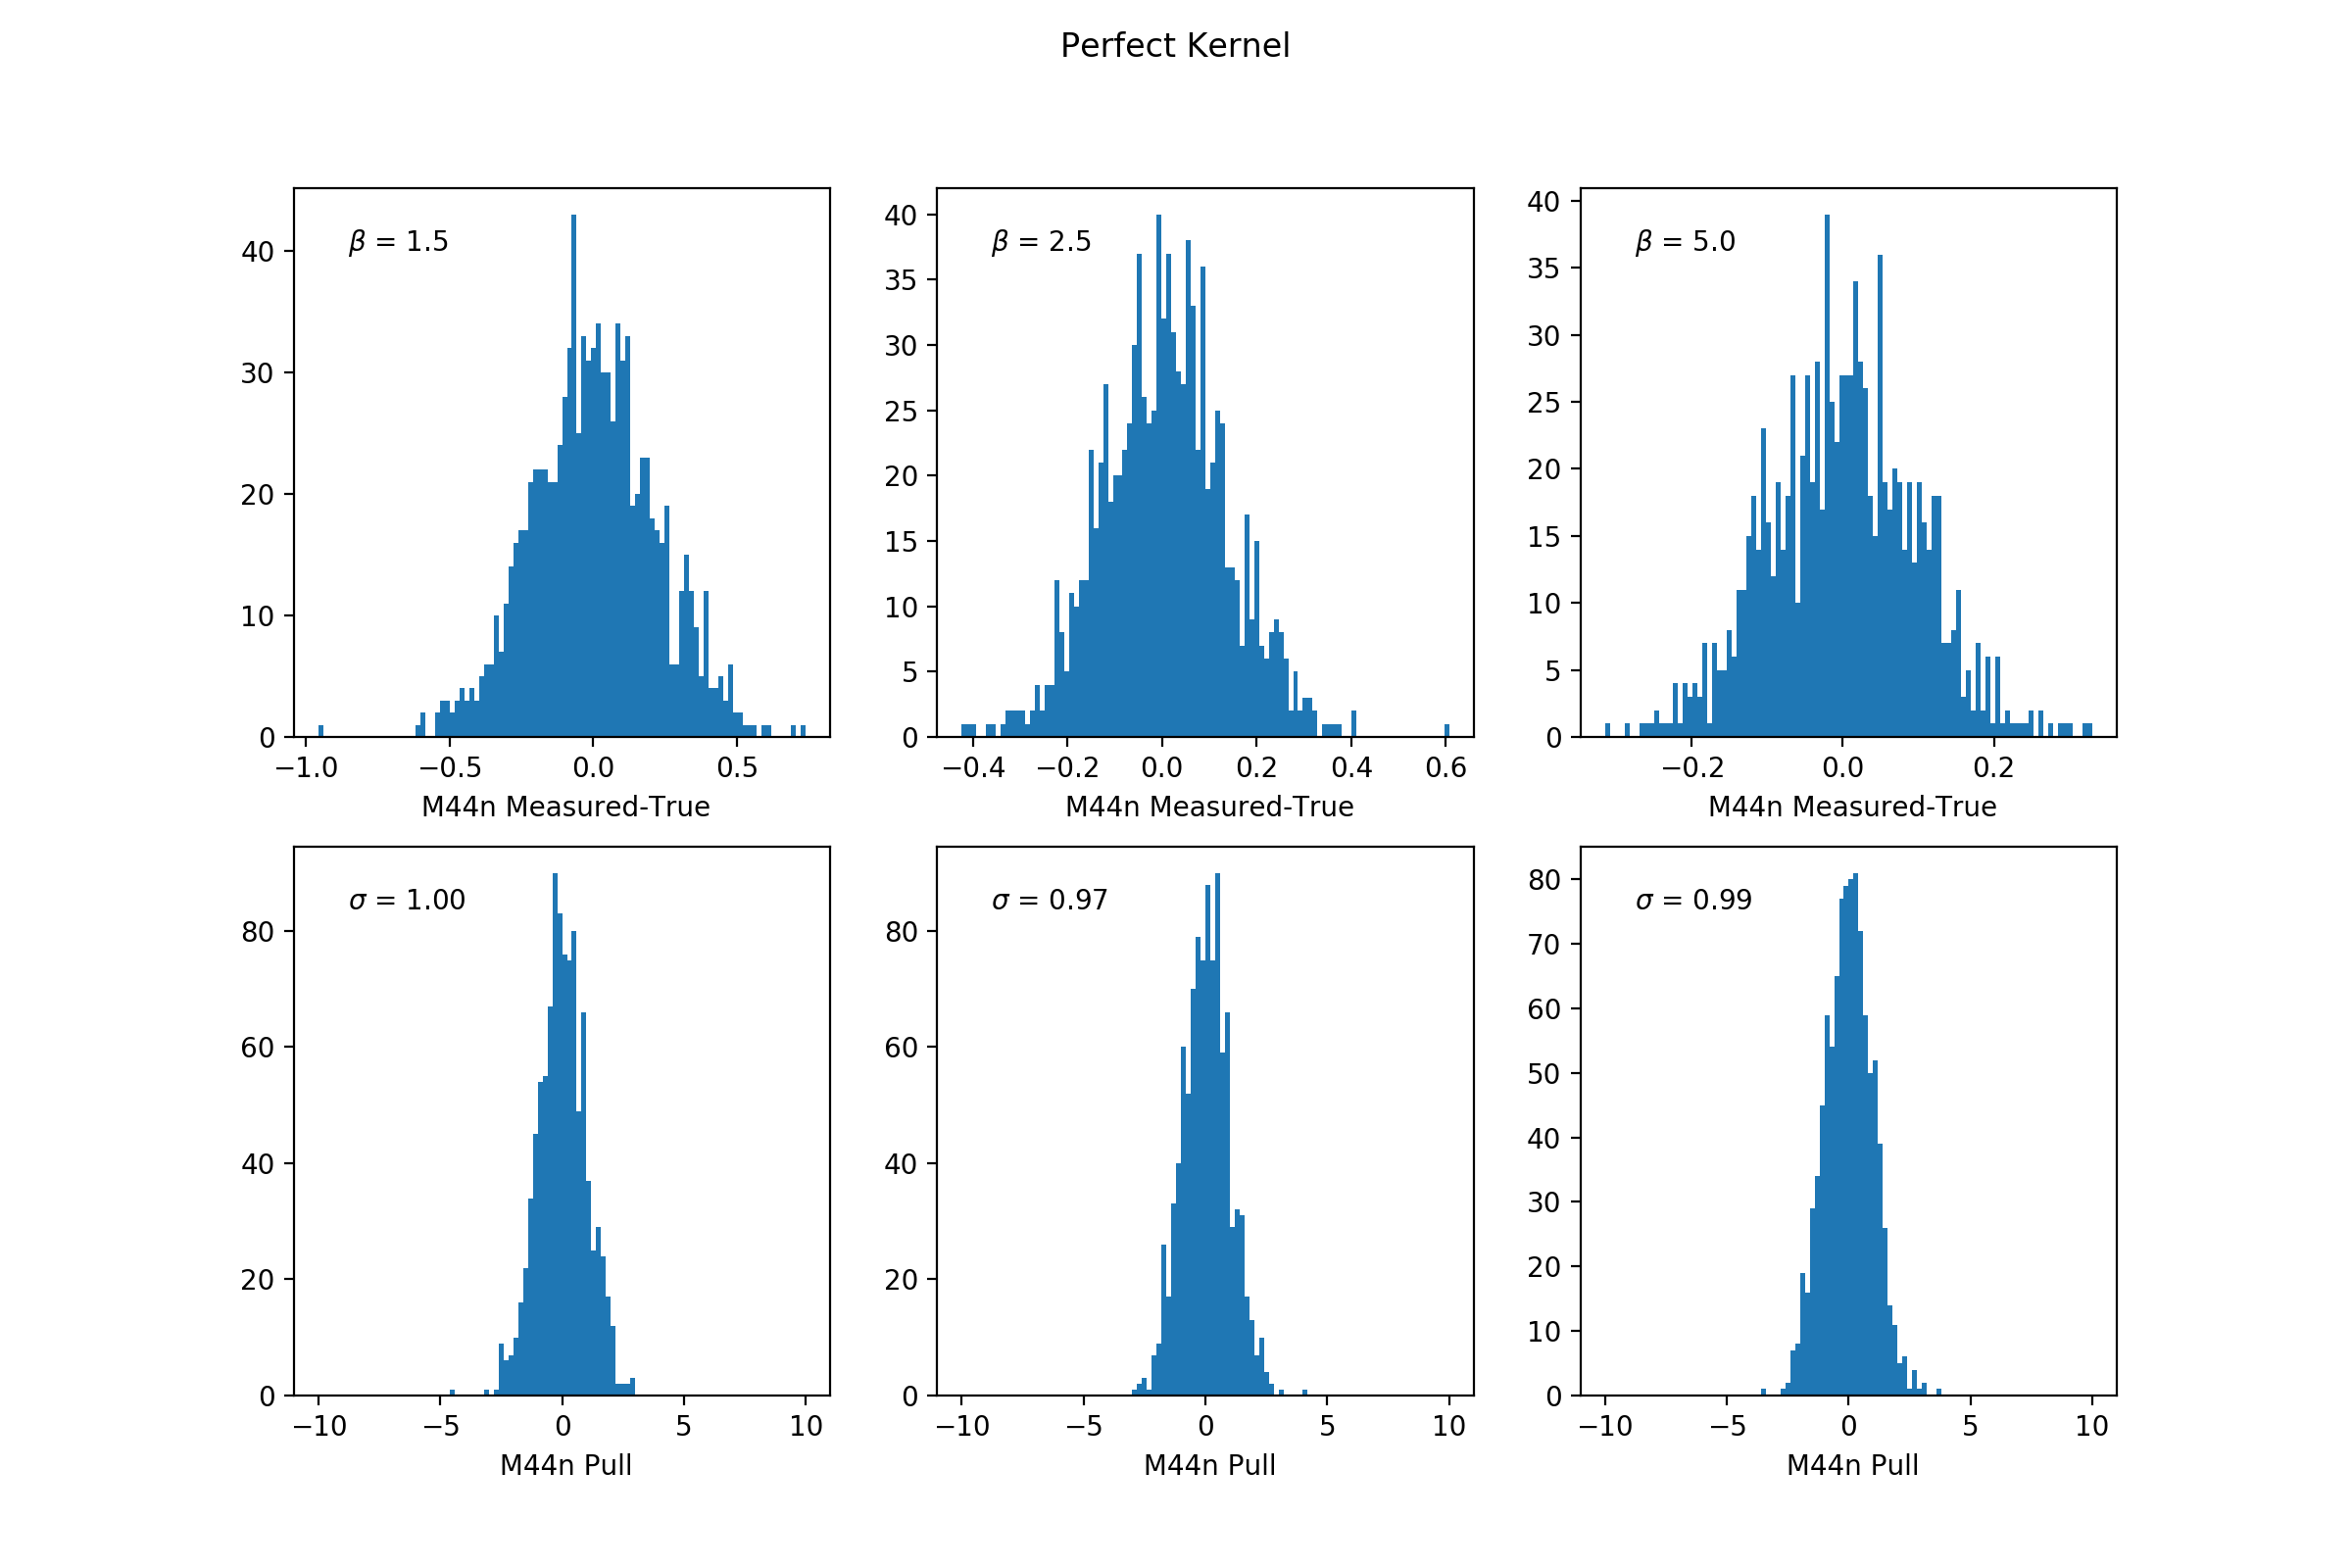

[0.9867396962456215, 0.9629408879558898, 0.9812691301671503, 0.9544649641421842, 0.991427945494887, 1.6442871623837518, 1.6571048966716033, 1.0437885662336697, 1.057591960820581, 0.9247979676400014, 0.9754735686571748, 0.9674492551612077, 0.9897078503975562, 0.9726921560170374, 0.9776277570253818, 0.9969626658636118, 0.9656749584706481, 0.9771019454896224, 0.9923241368293356]


In [7]:
pdf = PdfPages("moffat-perfectkernel.pdf")

momentlist = ['M10','M01','M11','M20','M02','M21','M12','M30','M03','M31','M13','M40','M04','M22','M33','M44','M22n','M33n','M44n']
rmslist_perfect = []

for i,amoment in enumerate(momentlist):
    rmslist_perfect.append(makepullplots(amoment,perfect=True,pdf=pdf))

pdf.close()
print(rmslist_perfect)

/nfs/slac/g/ki/ki06/roodman/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


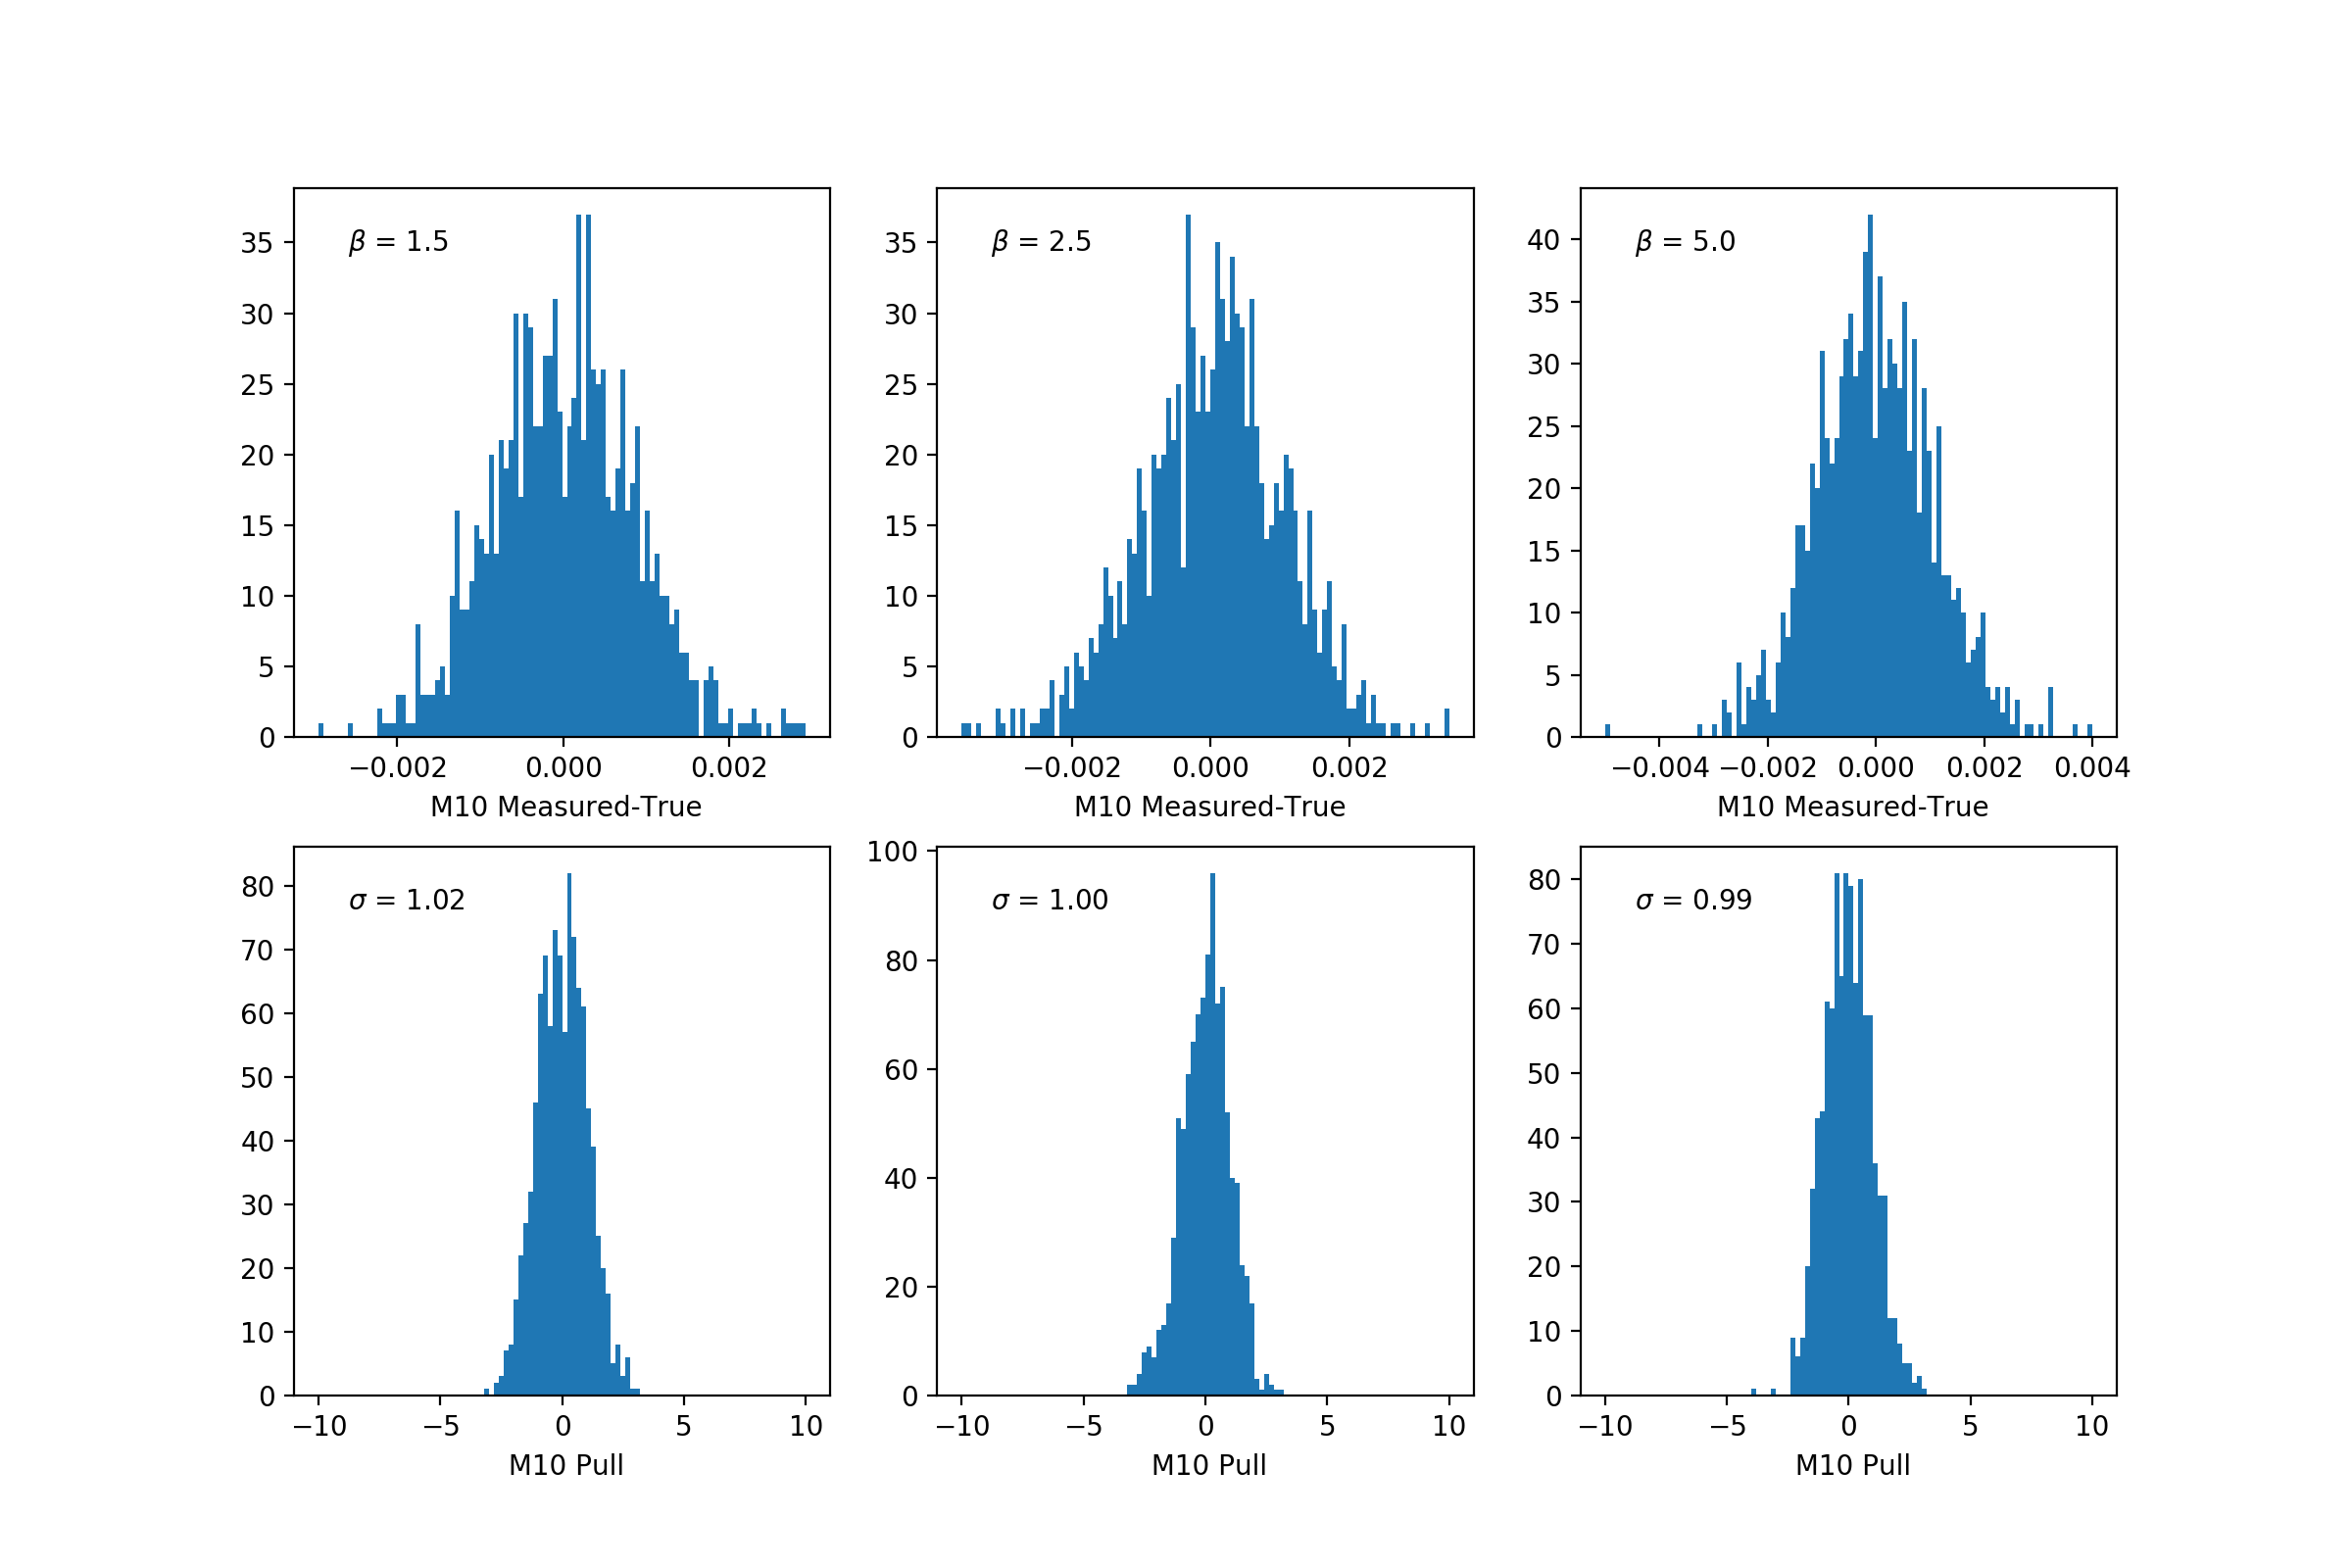

<IPython.core.display.Javascript object>


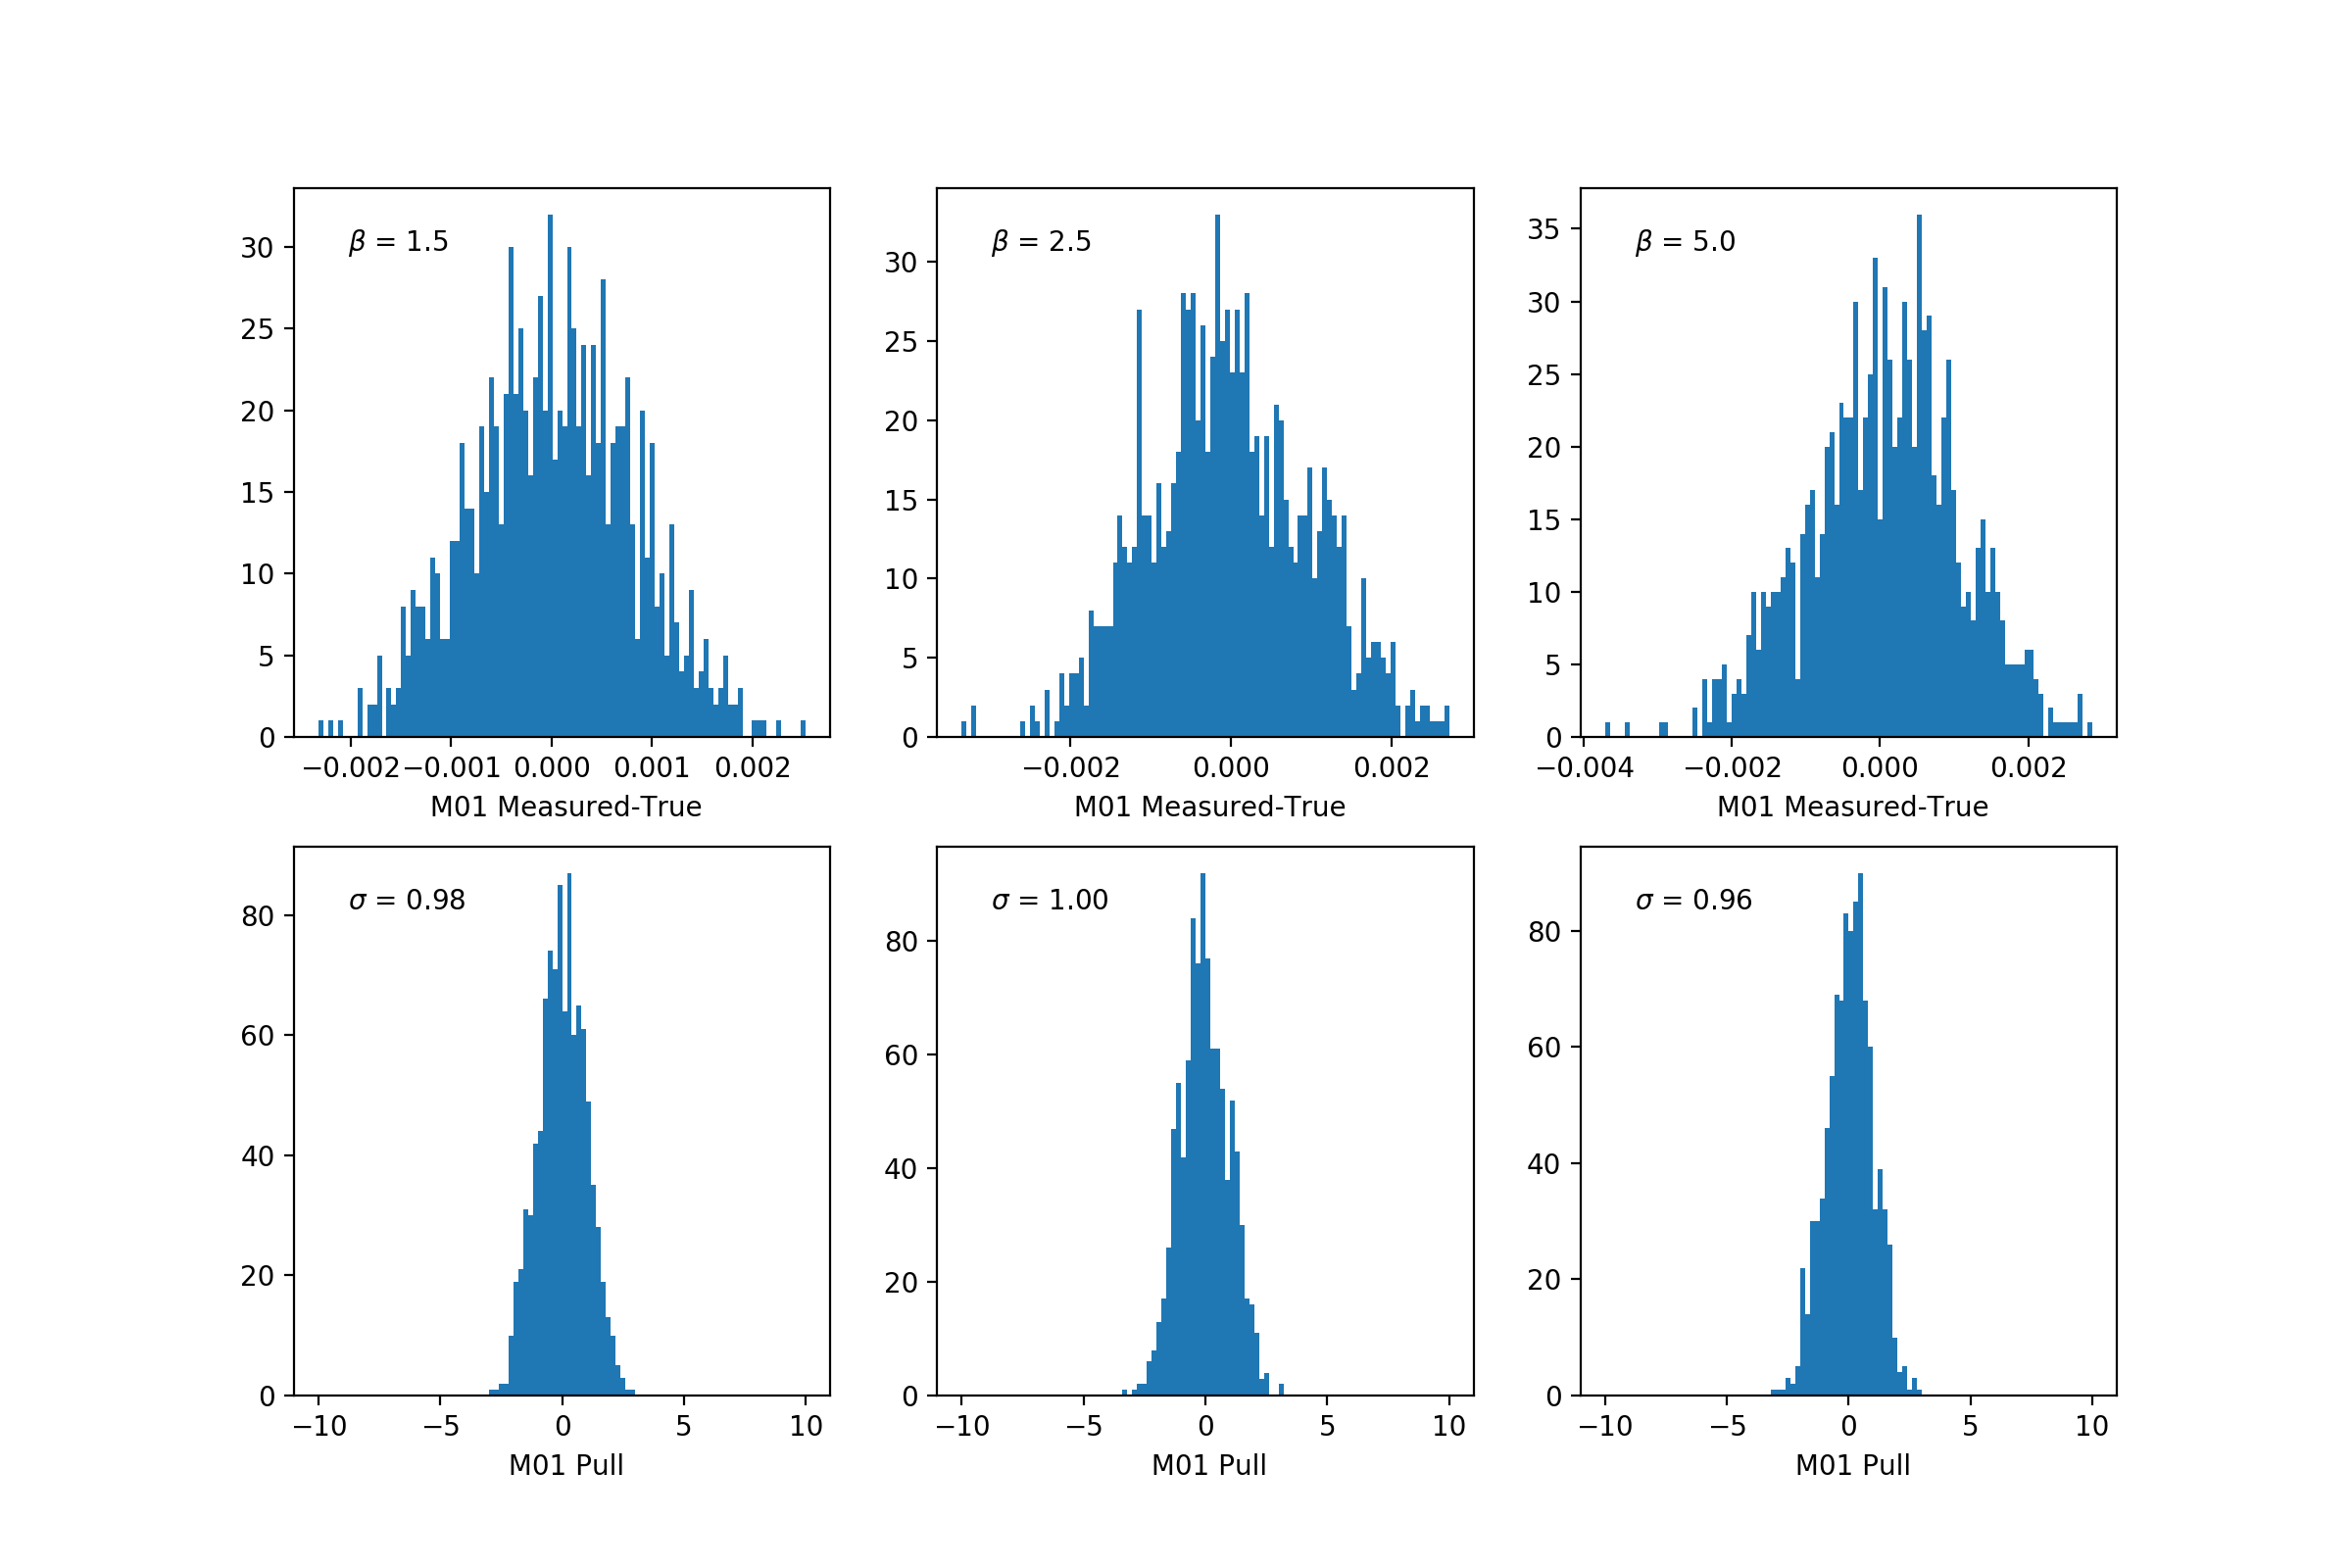

<IPython.core.display.Javascript object>


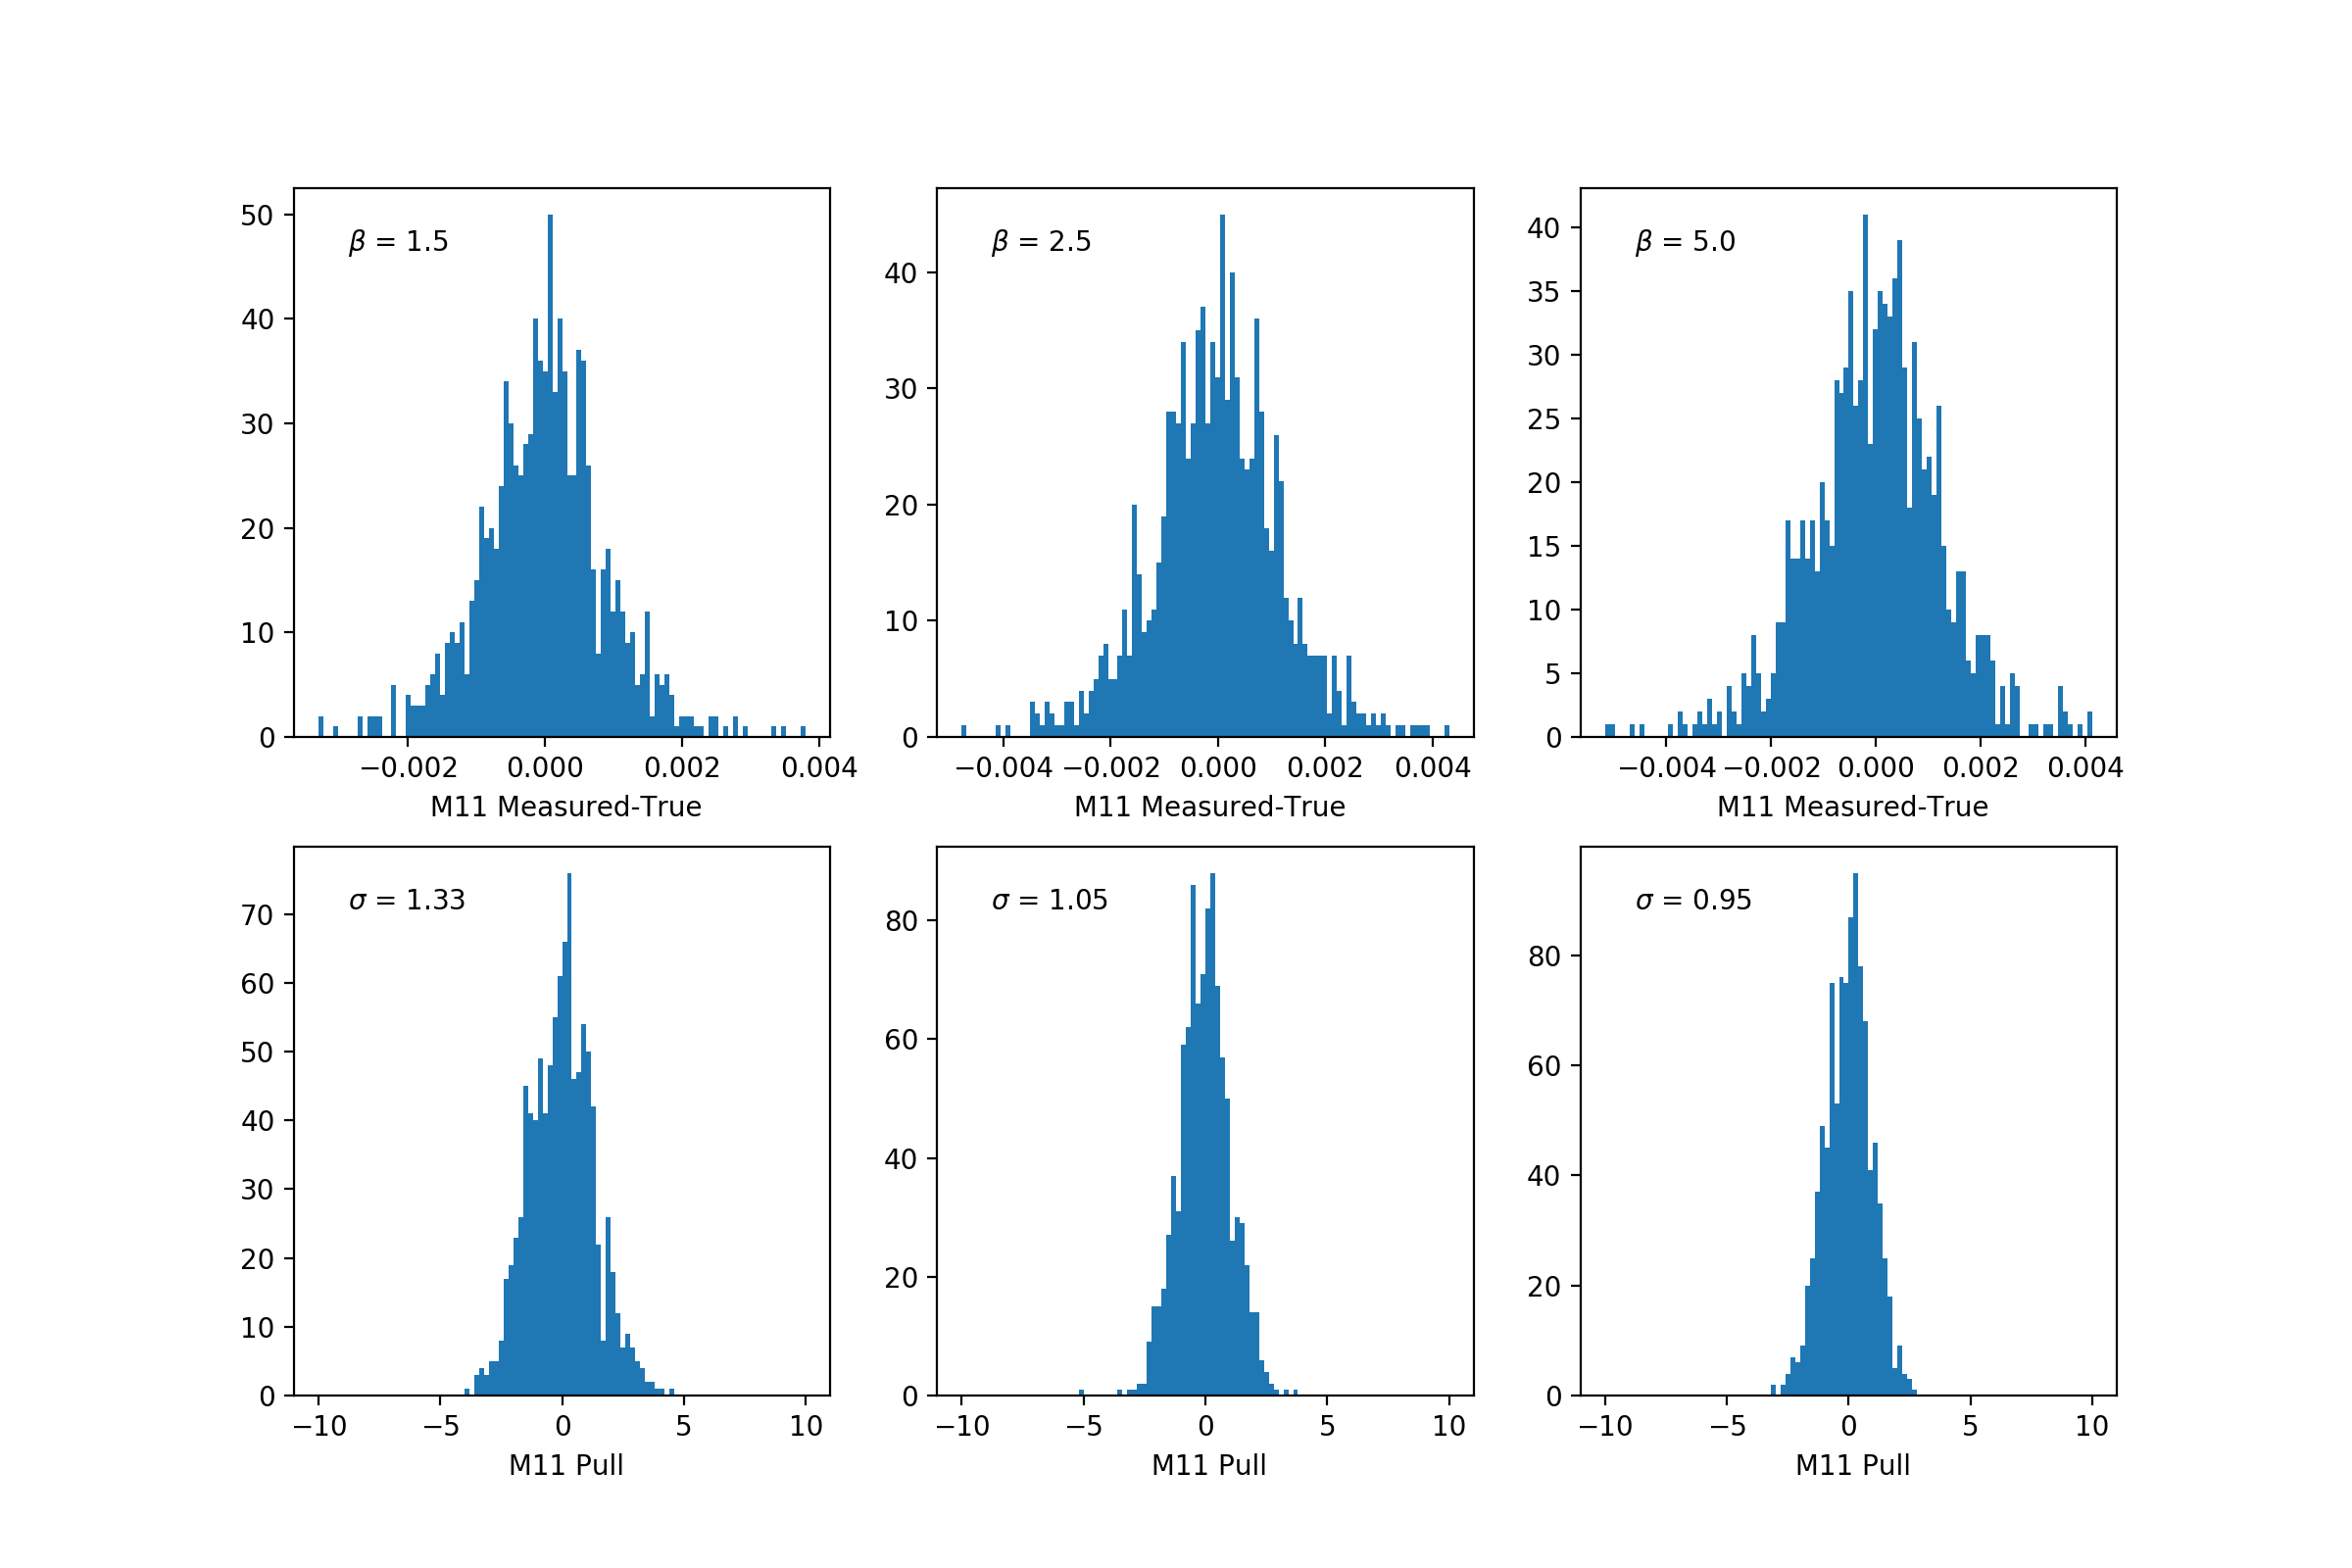

<IPython.core.display.Javascript object>


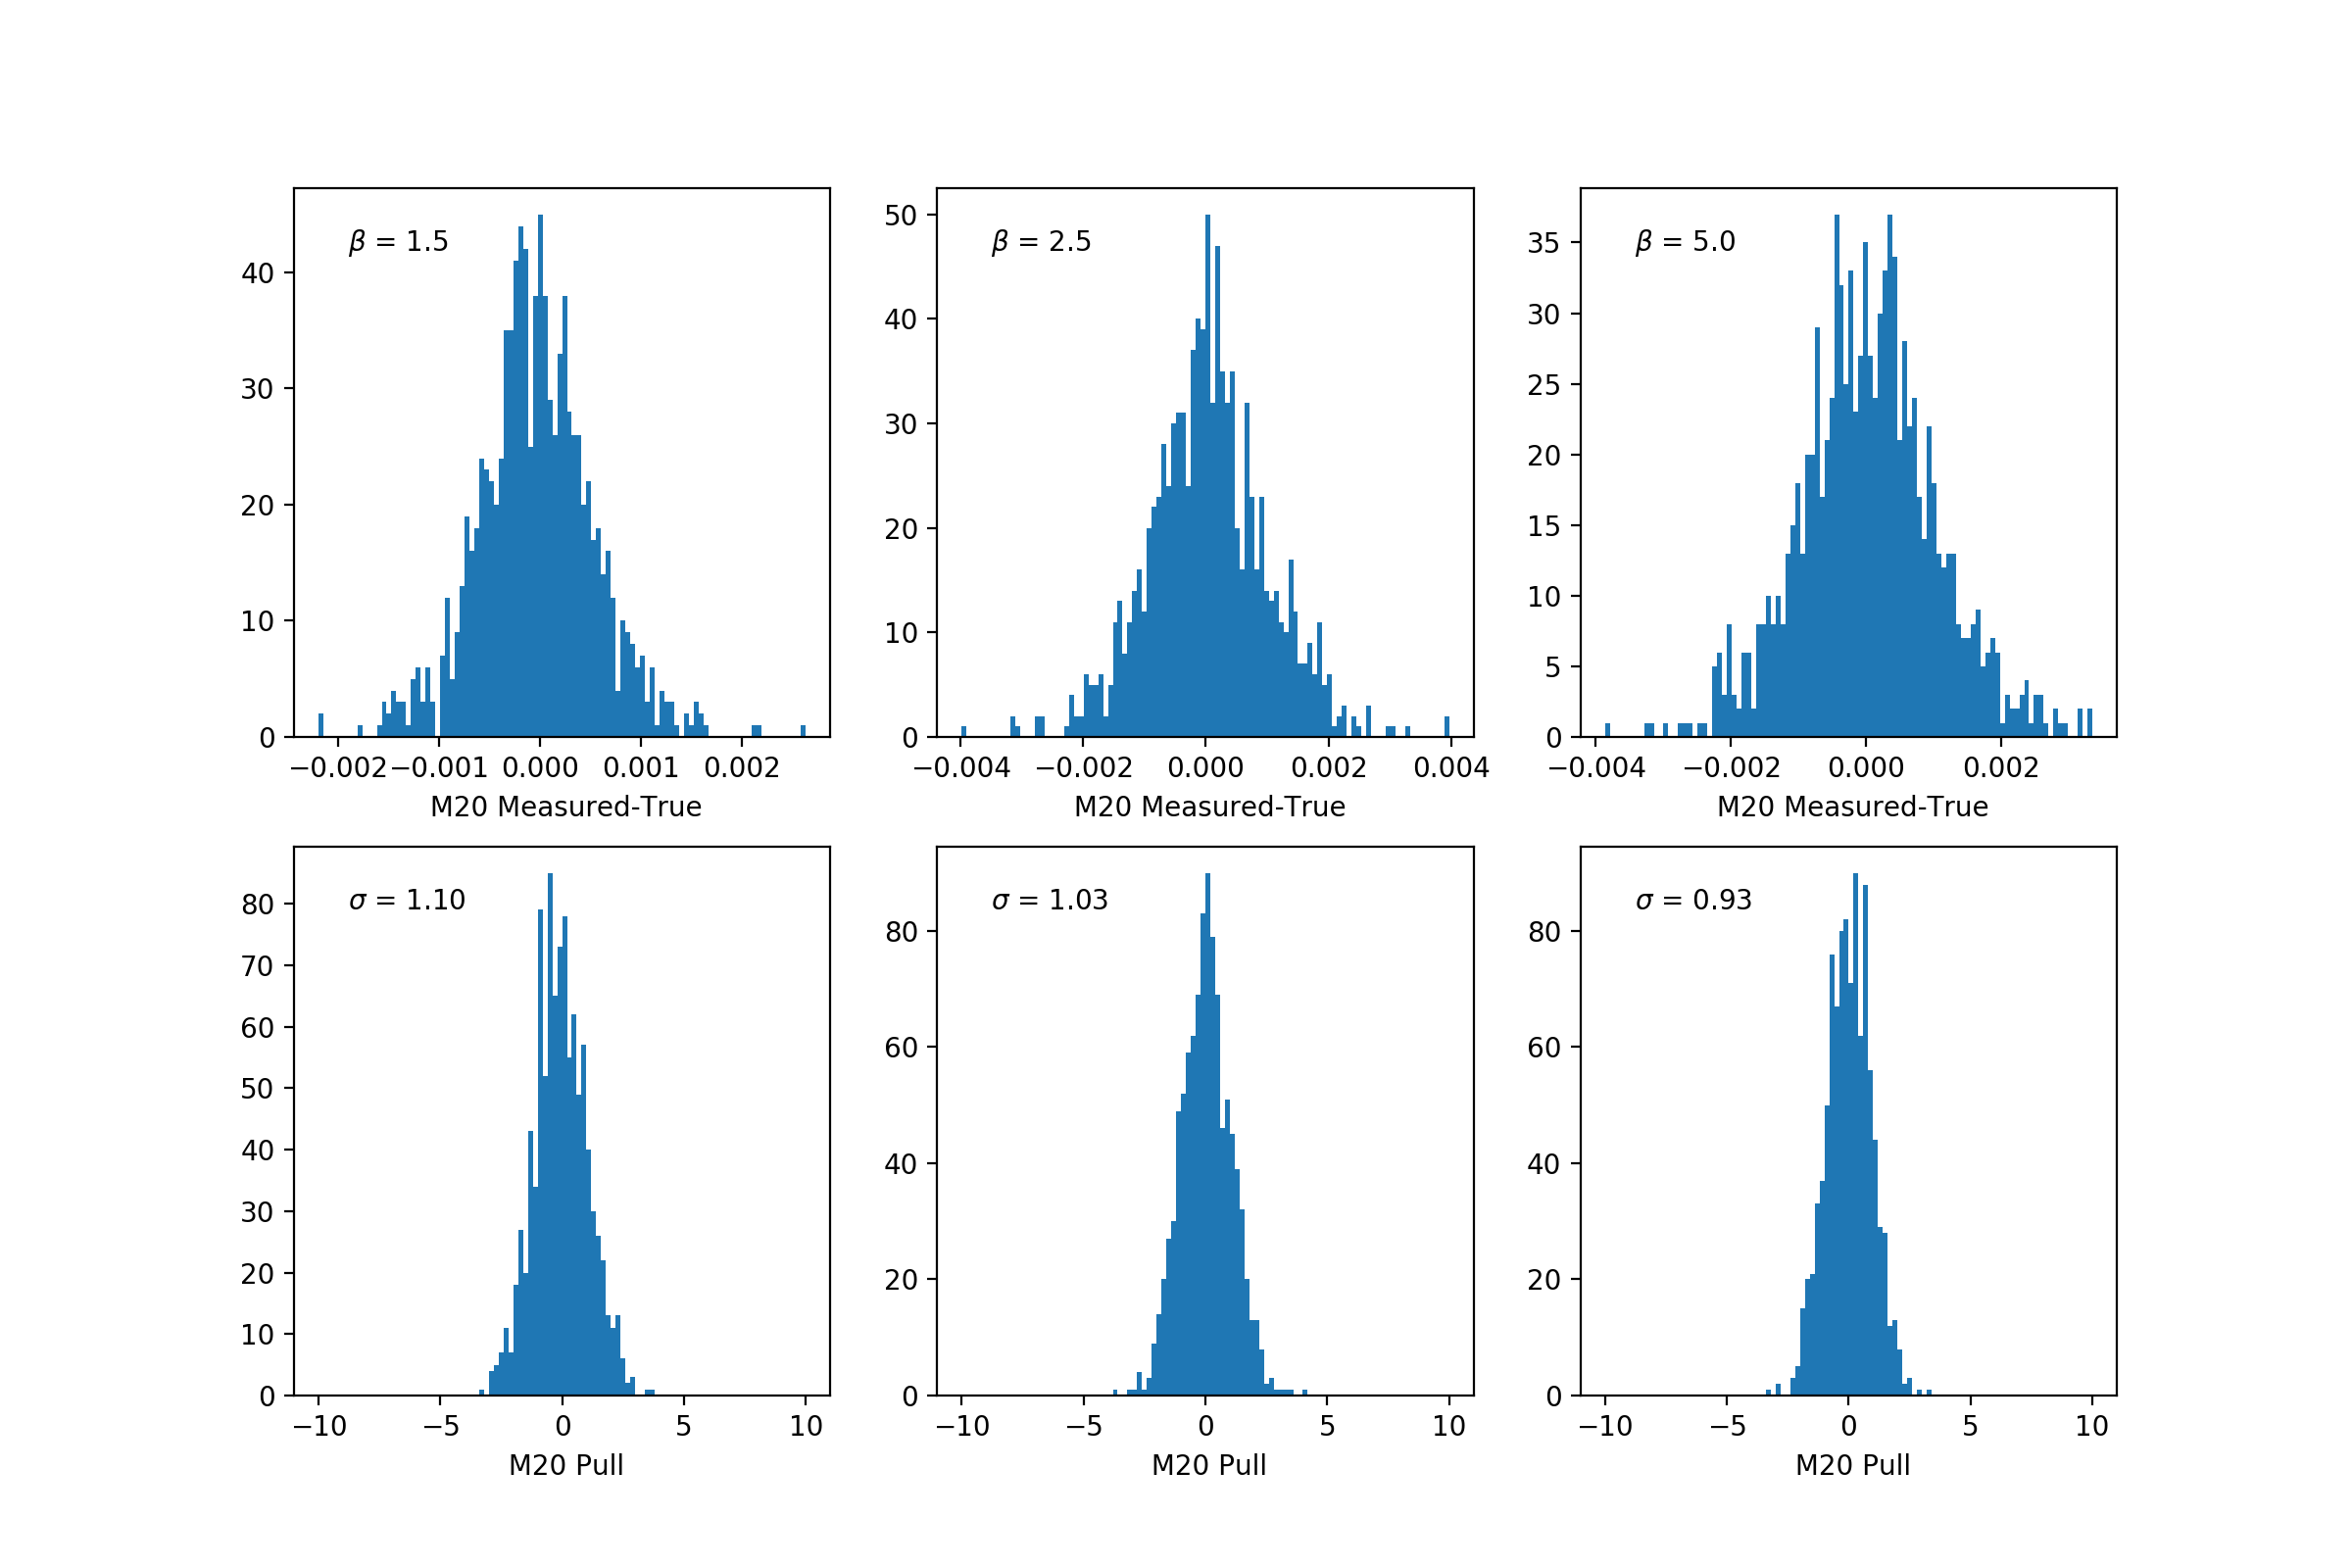

<IPython.core.display.Javascript object>


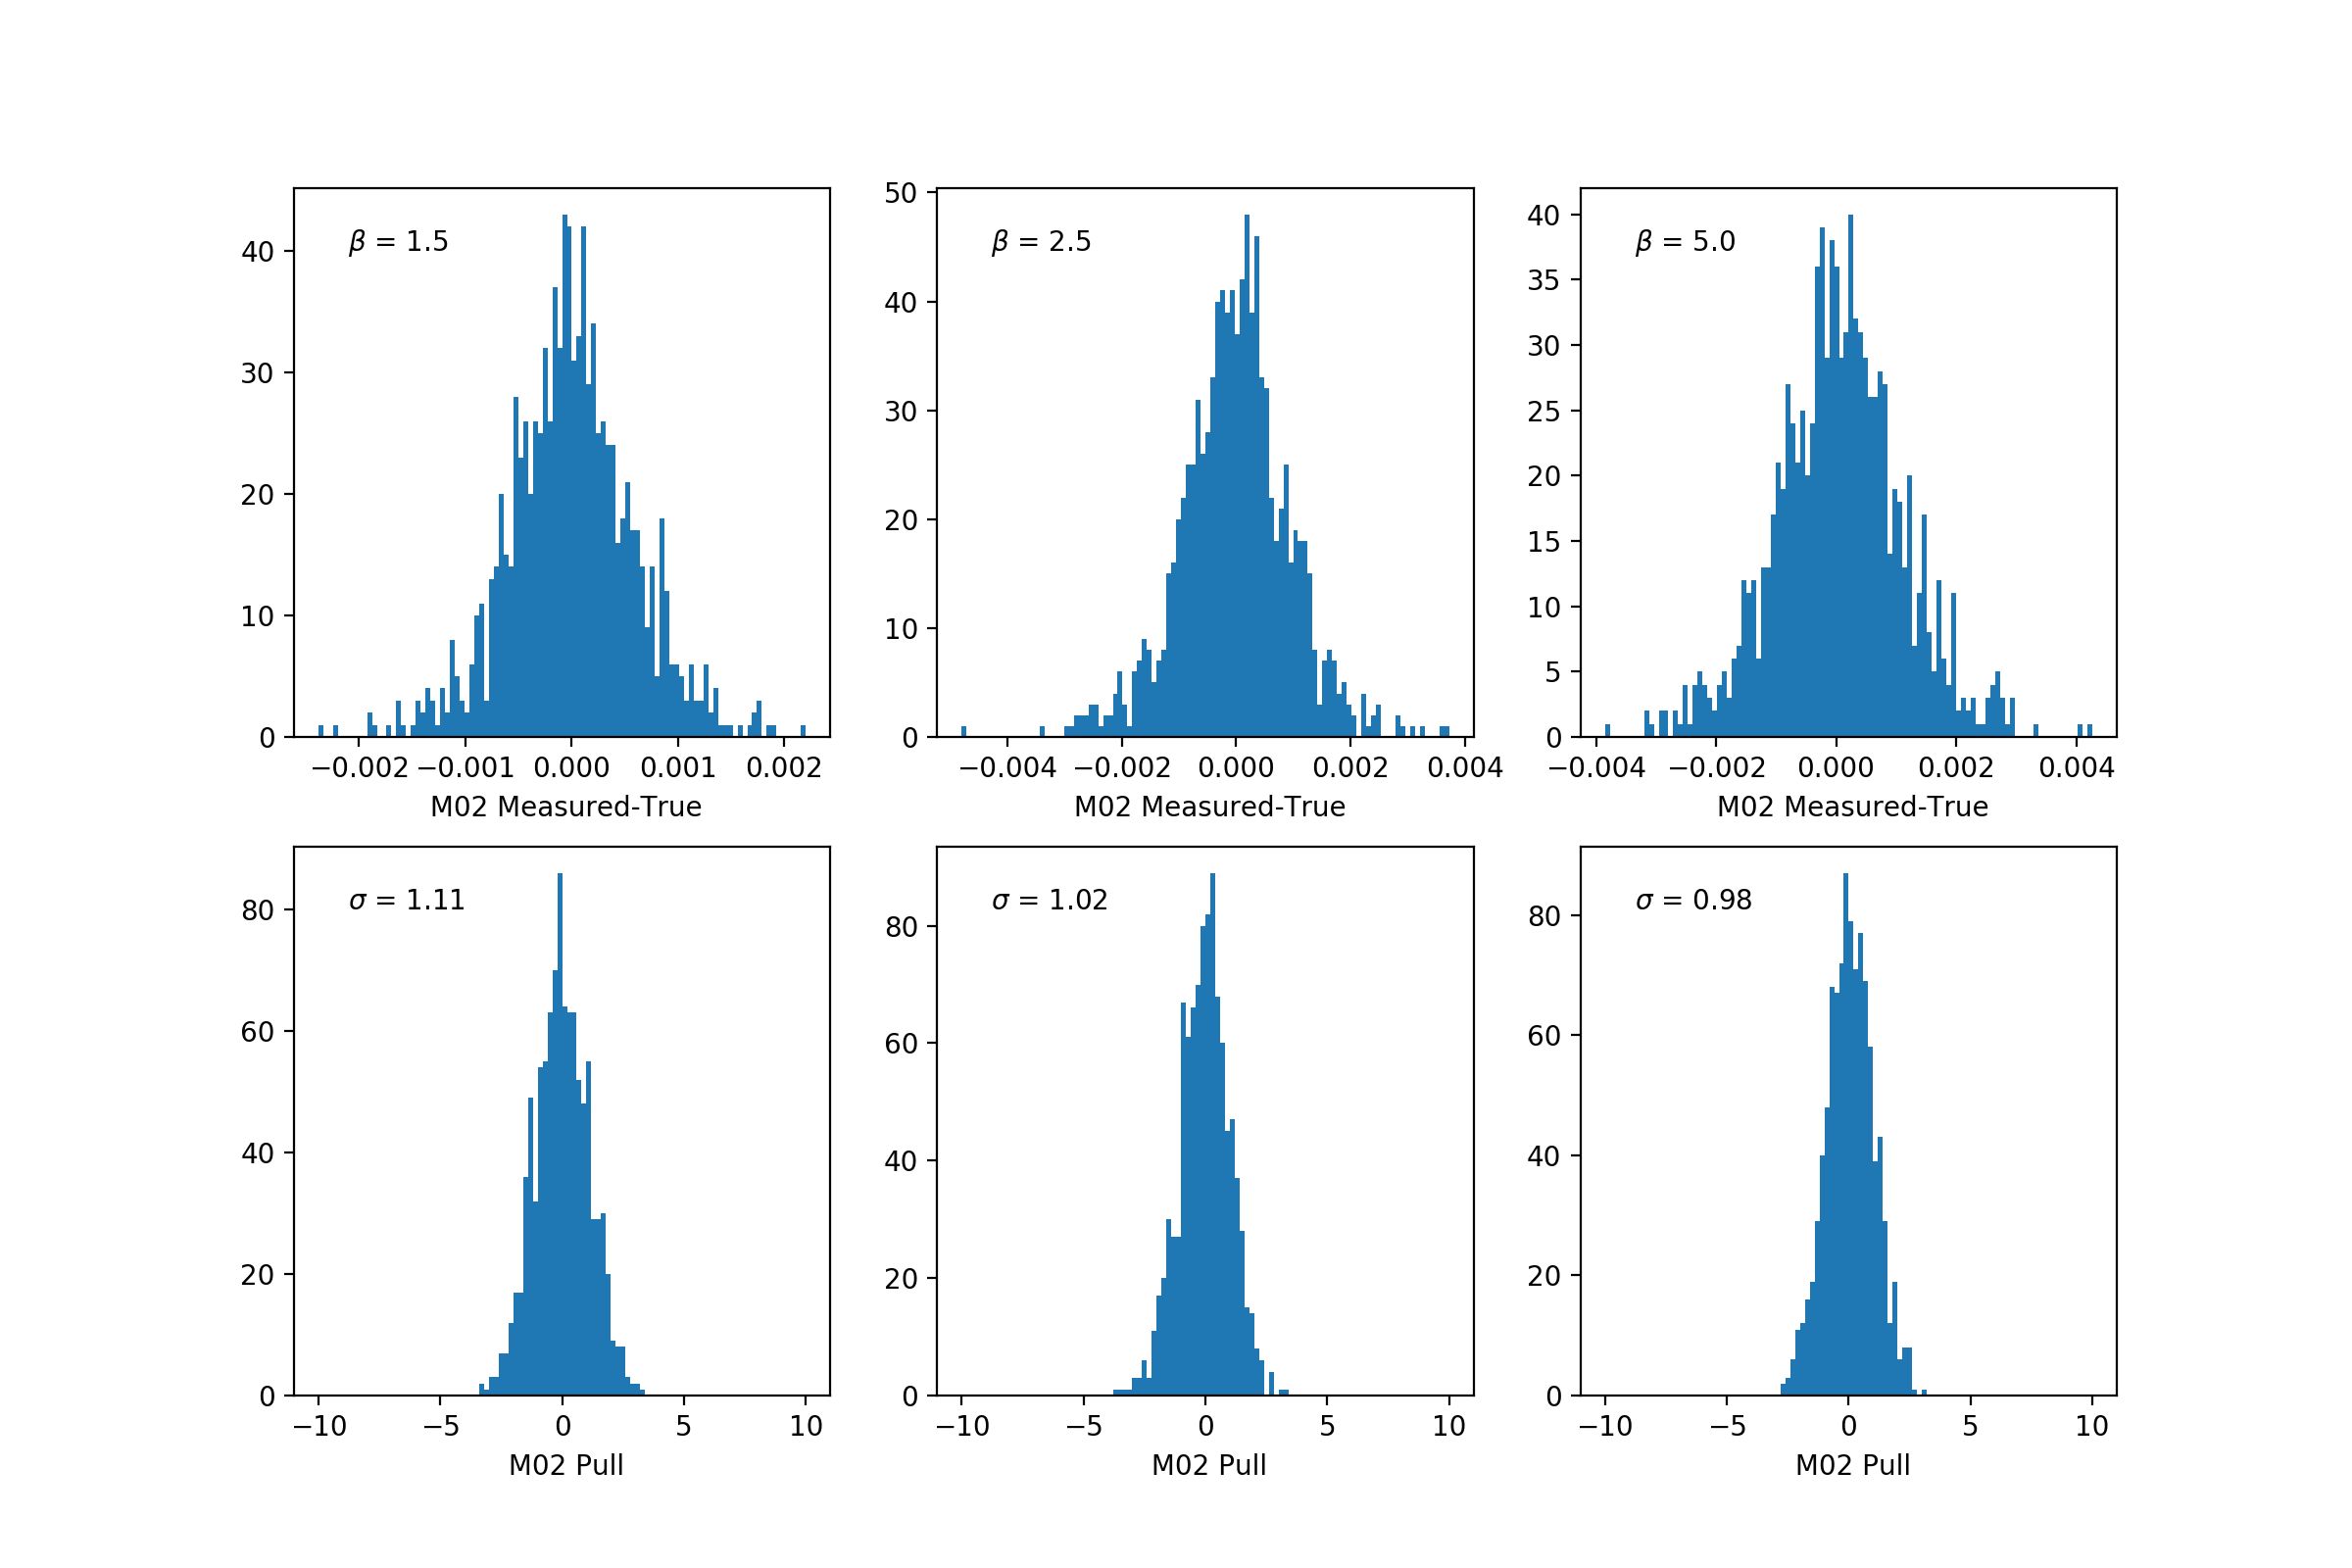

<IPython.core.display.Javascript object>


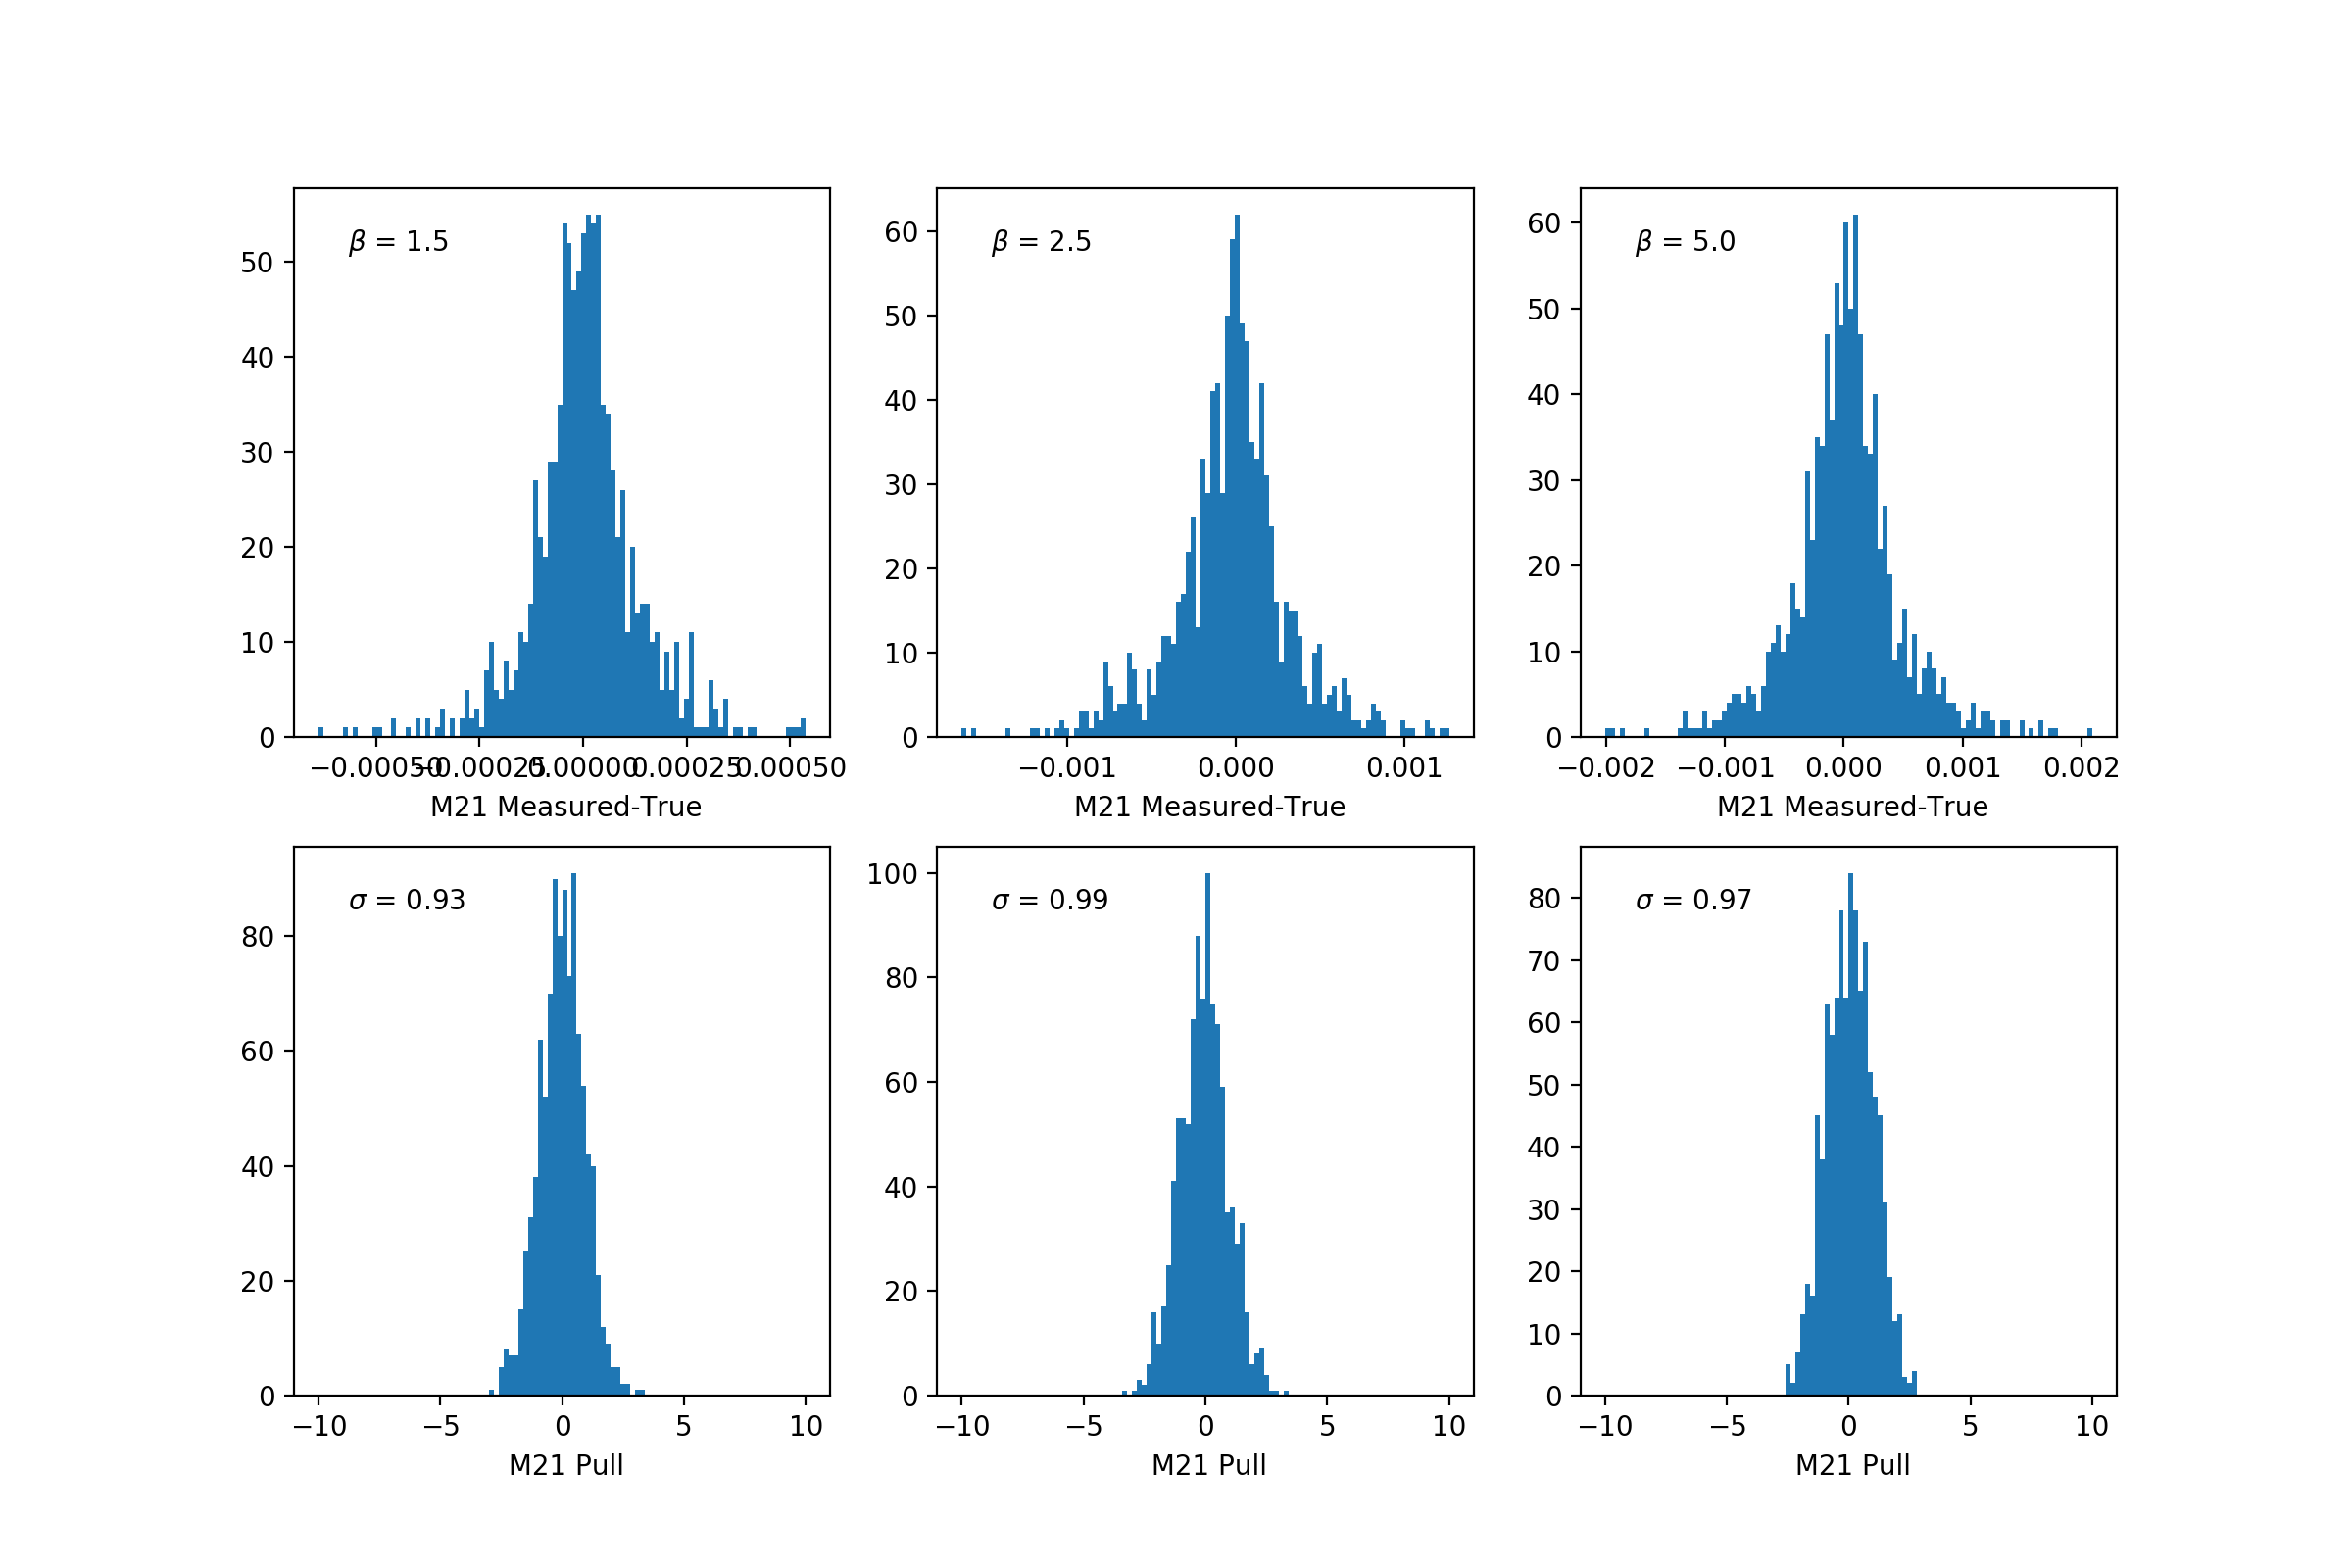

<IPython.core.display.Javascript object>


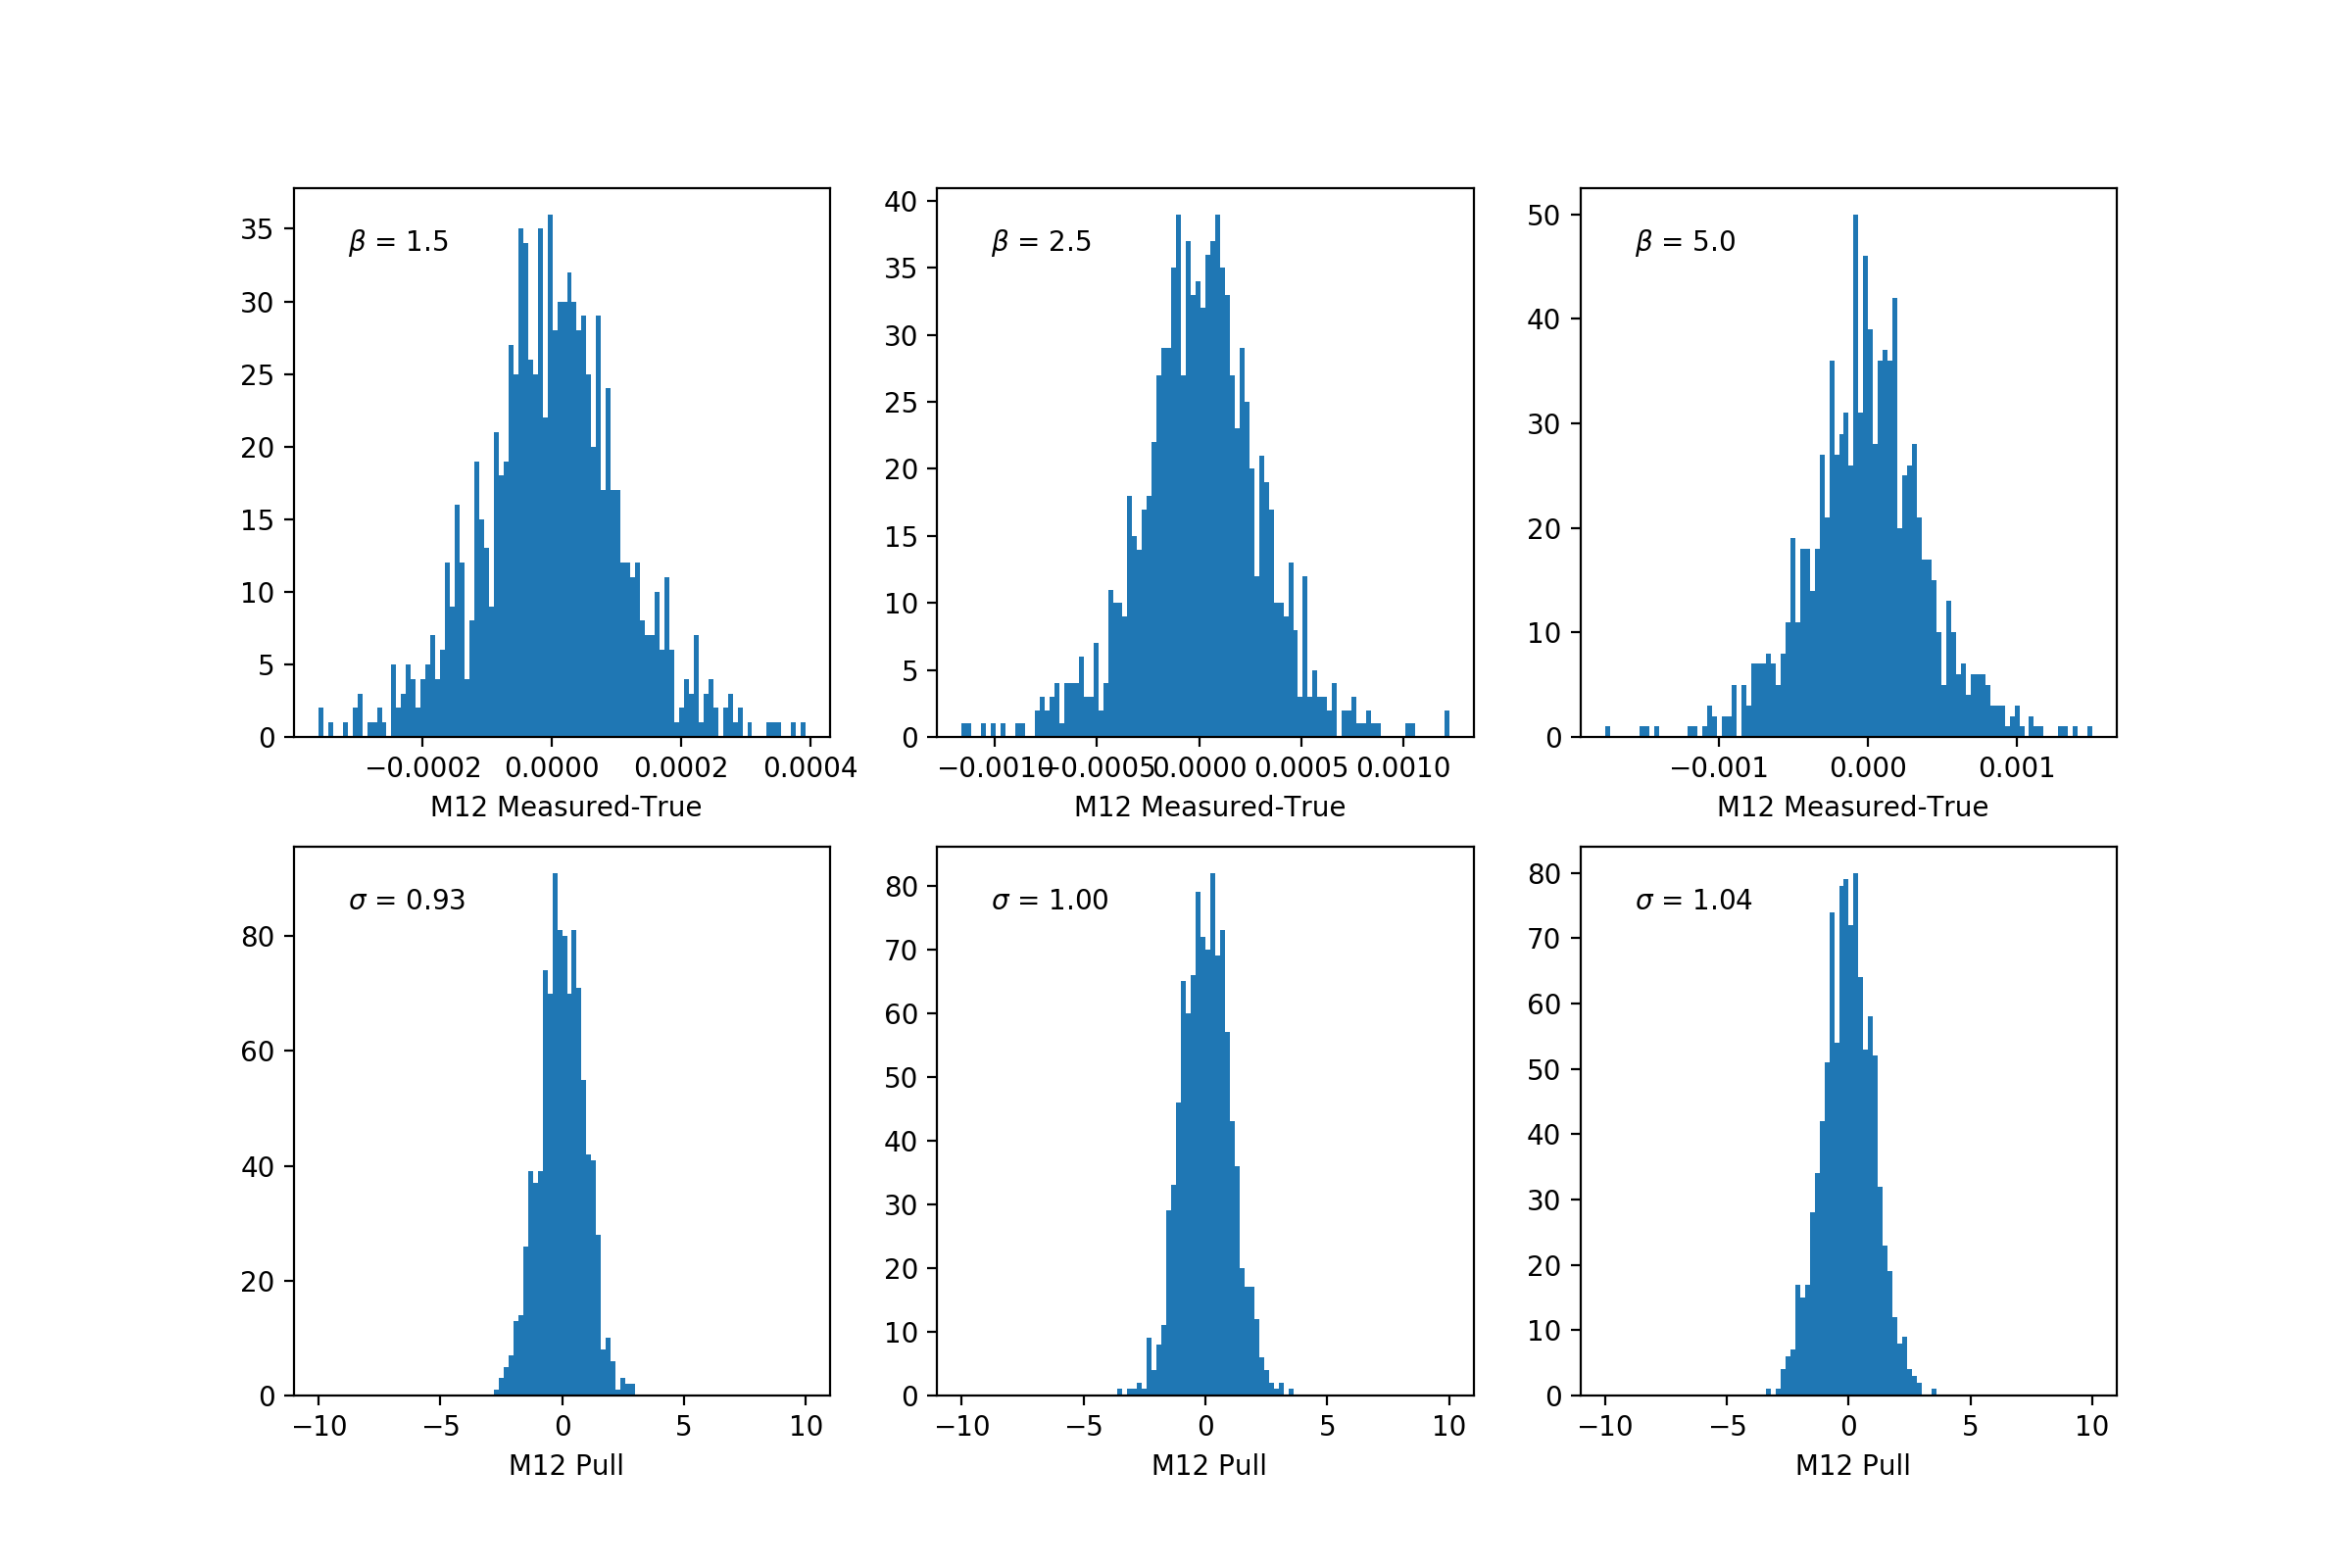

<IPython.core.display.Javascript object>


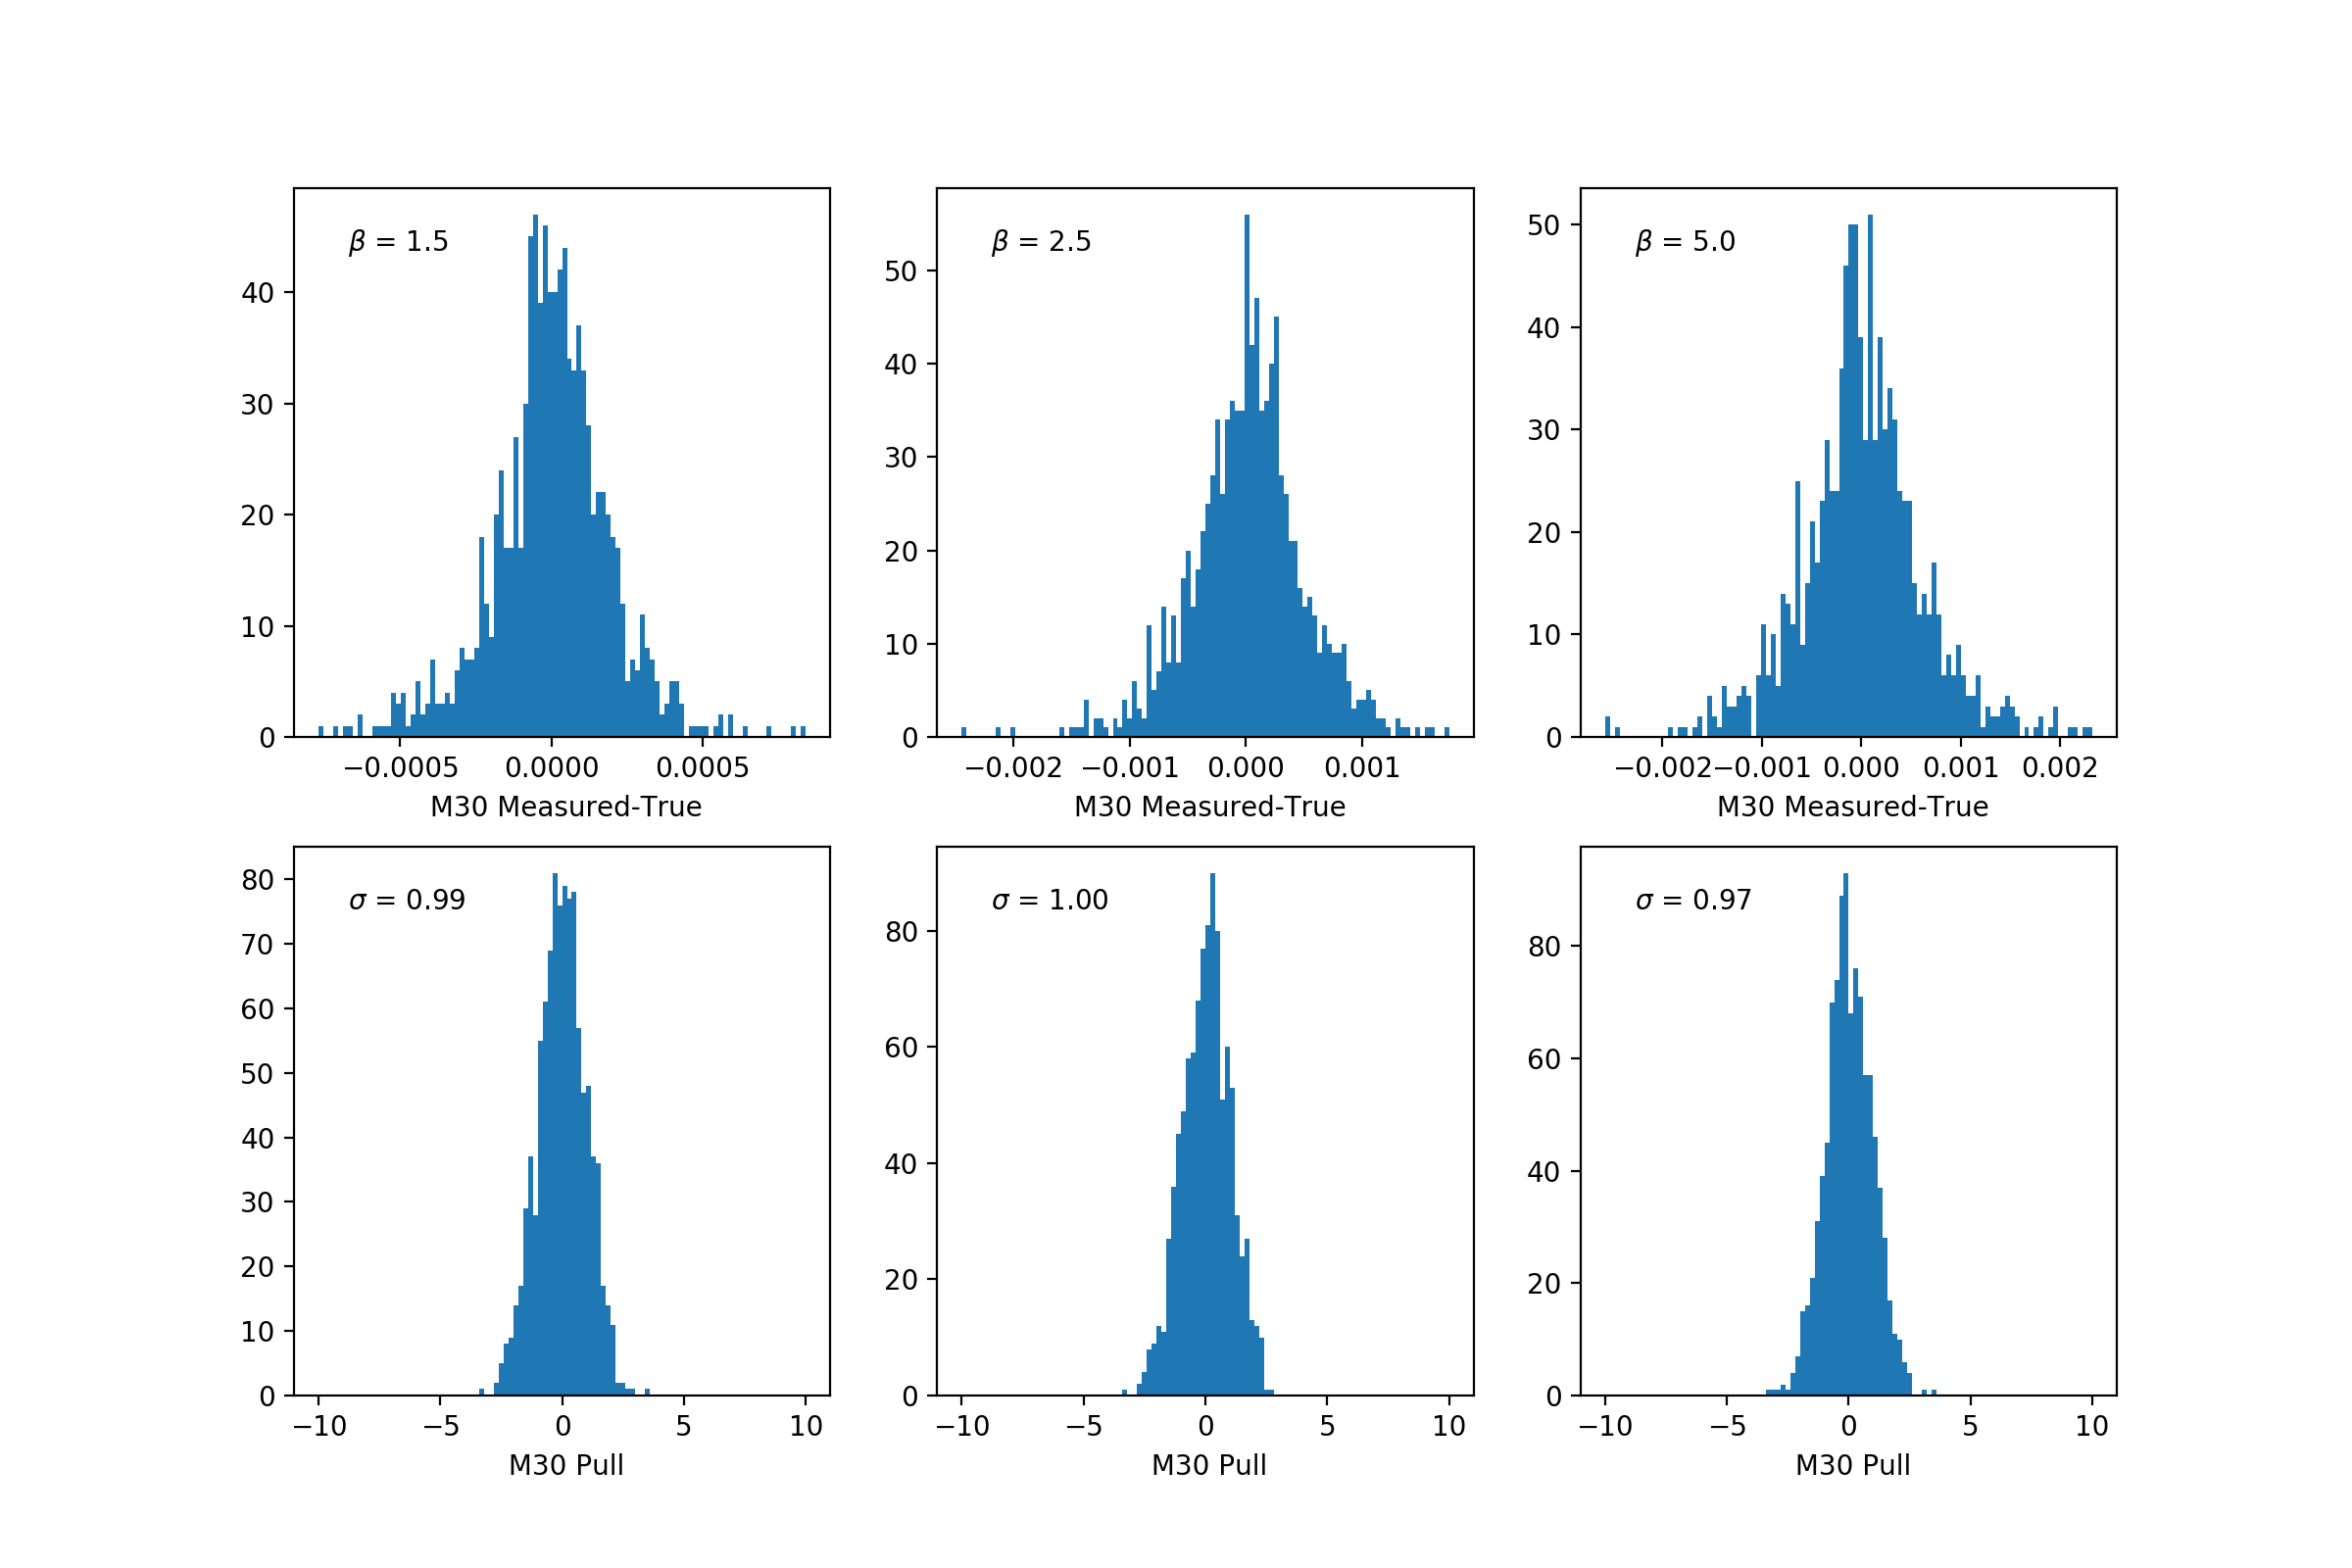

<IPython.core.display.Javascript object>


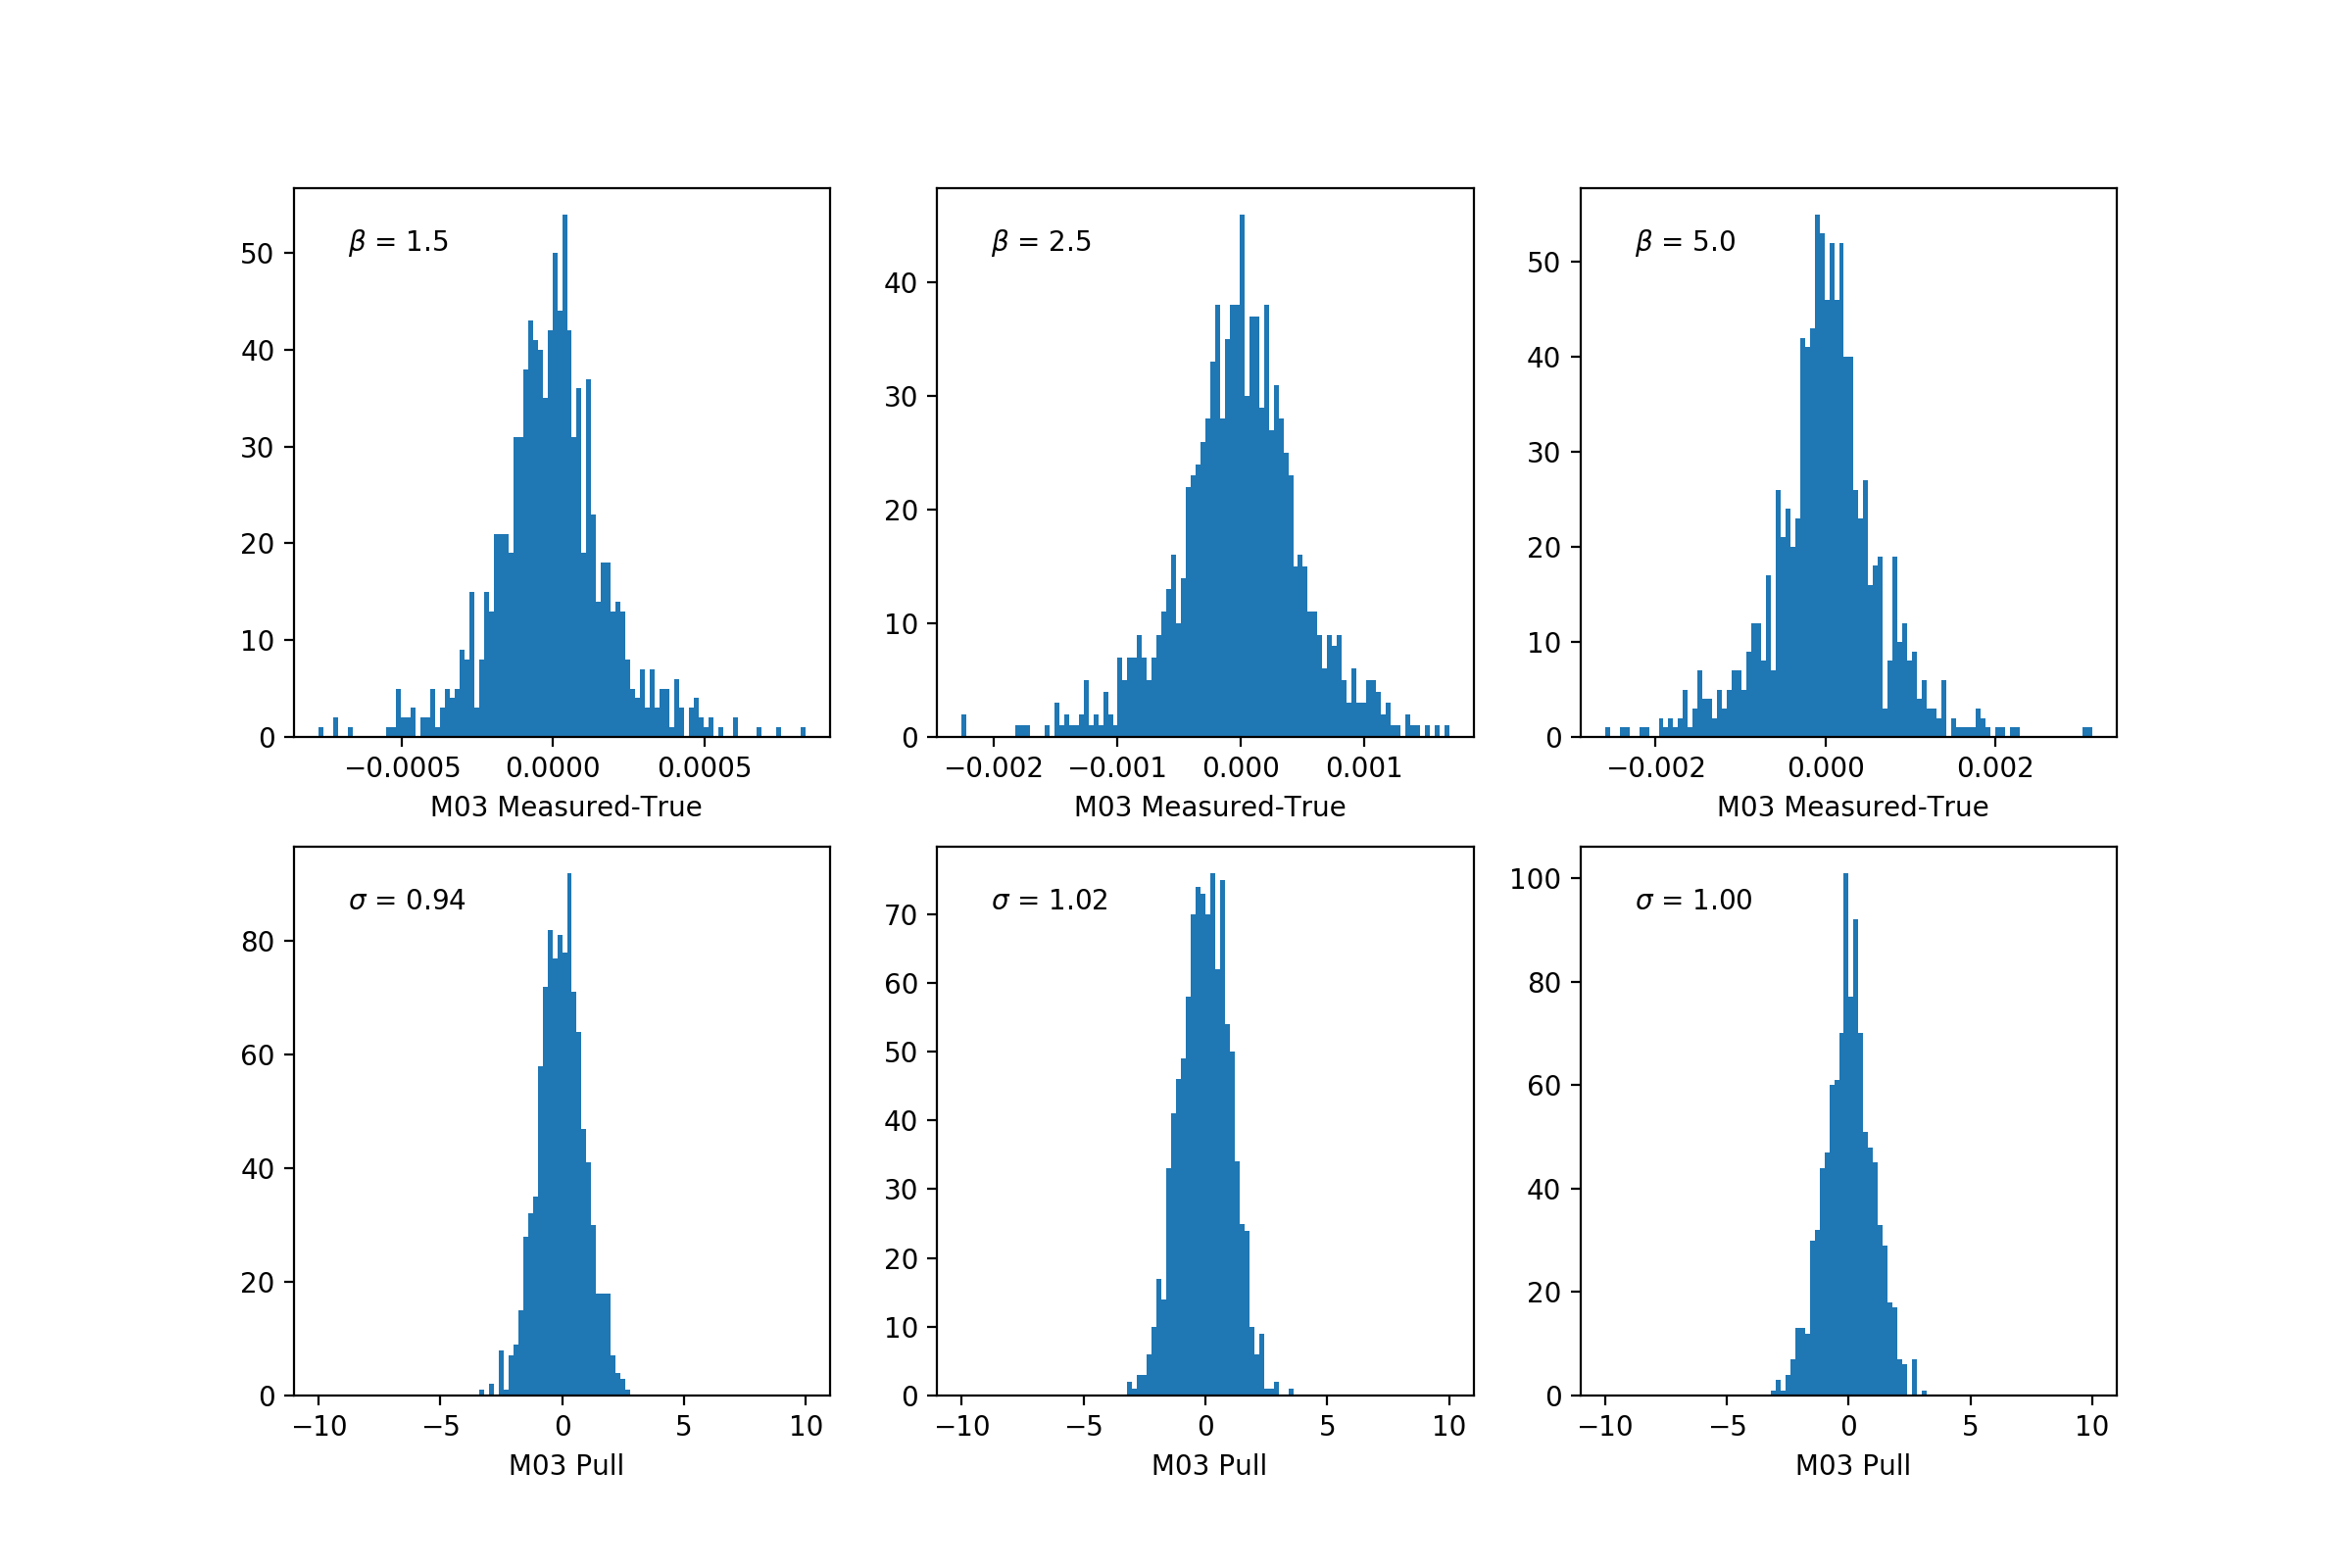

<IPython.core.display.Javascript object>


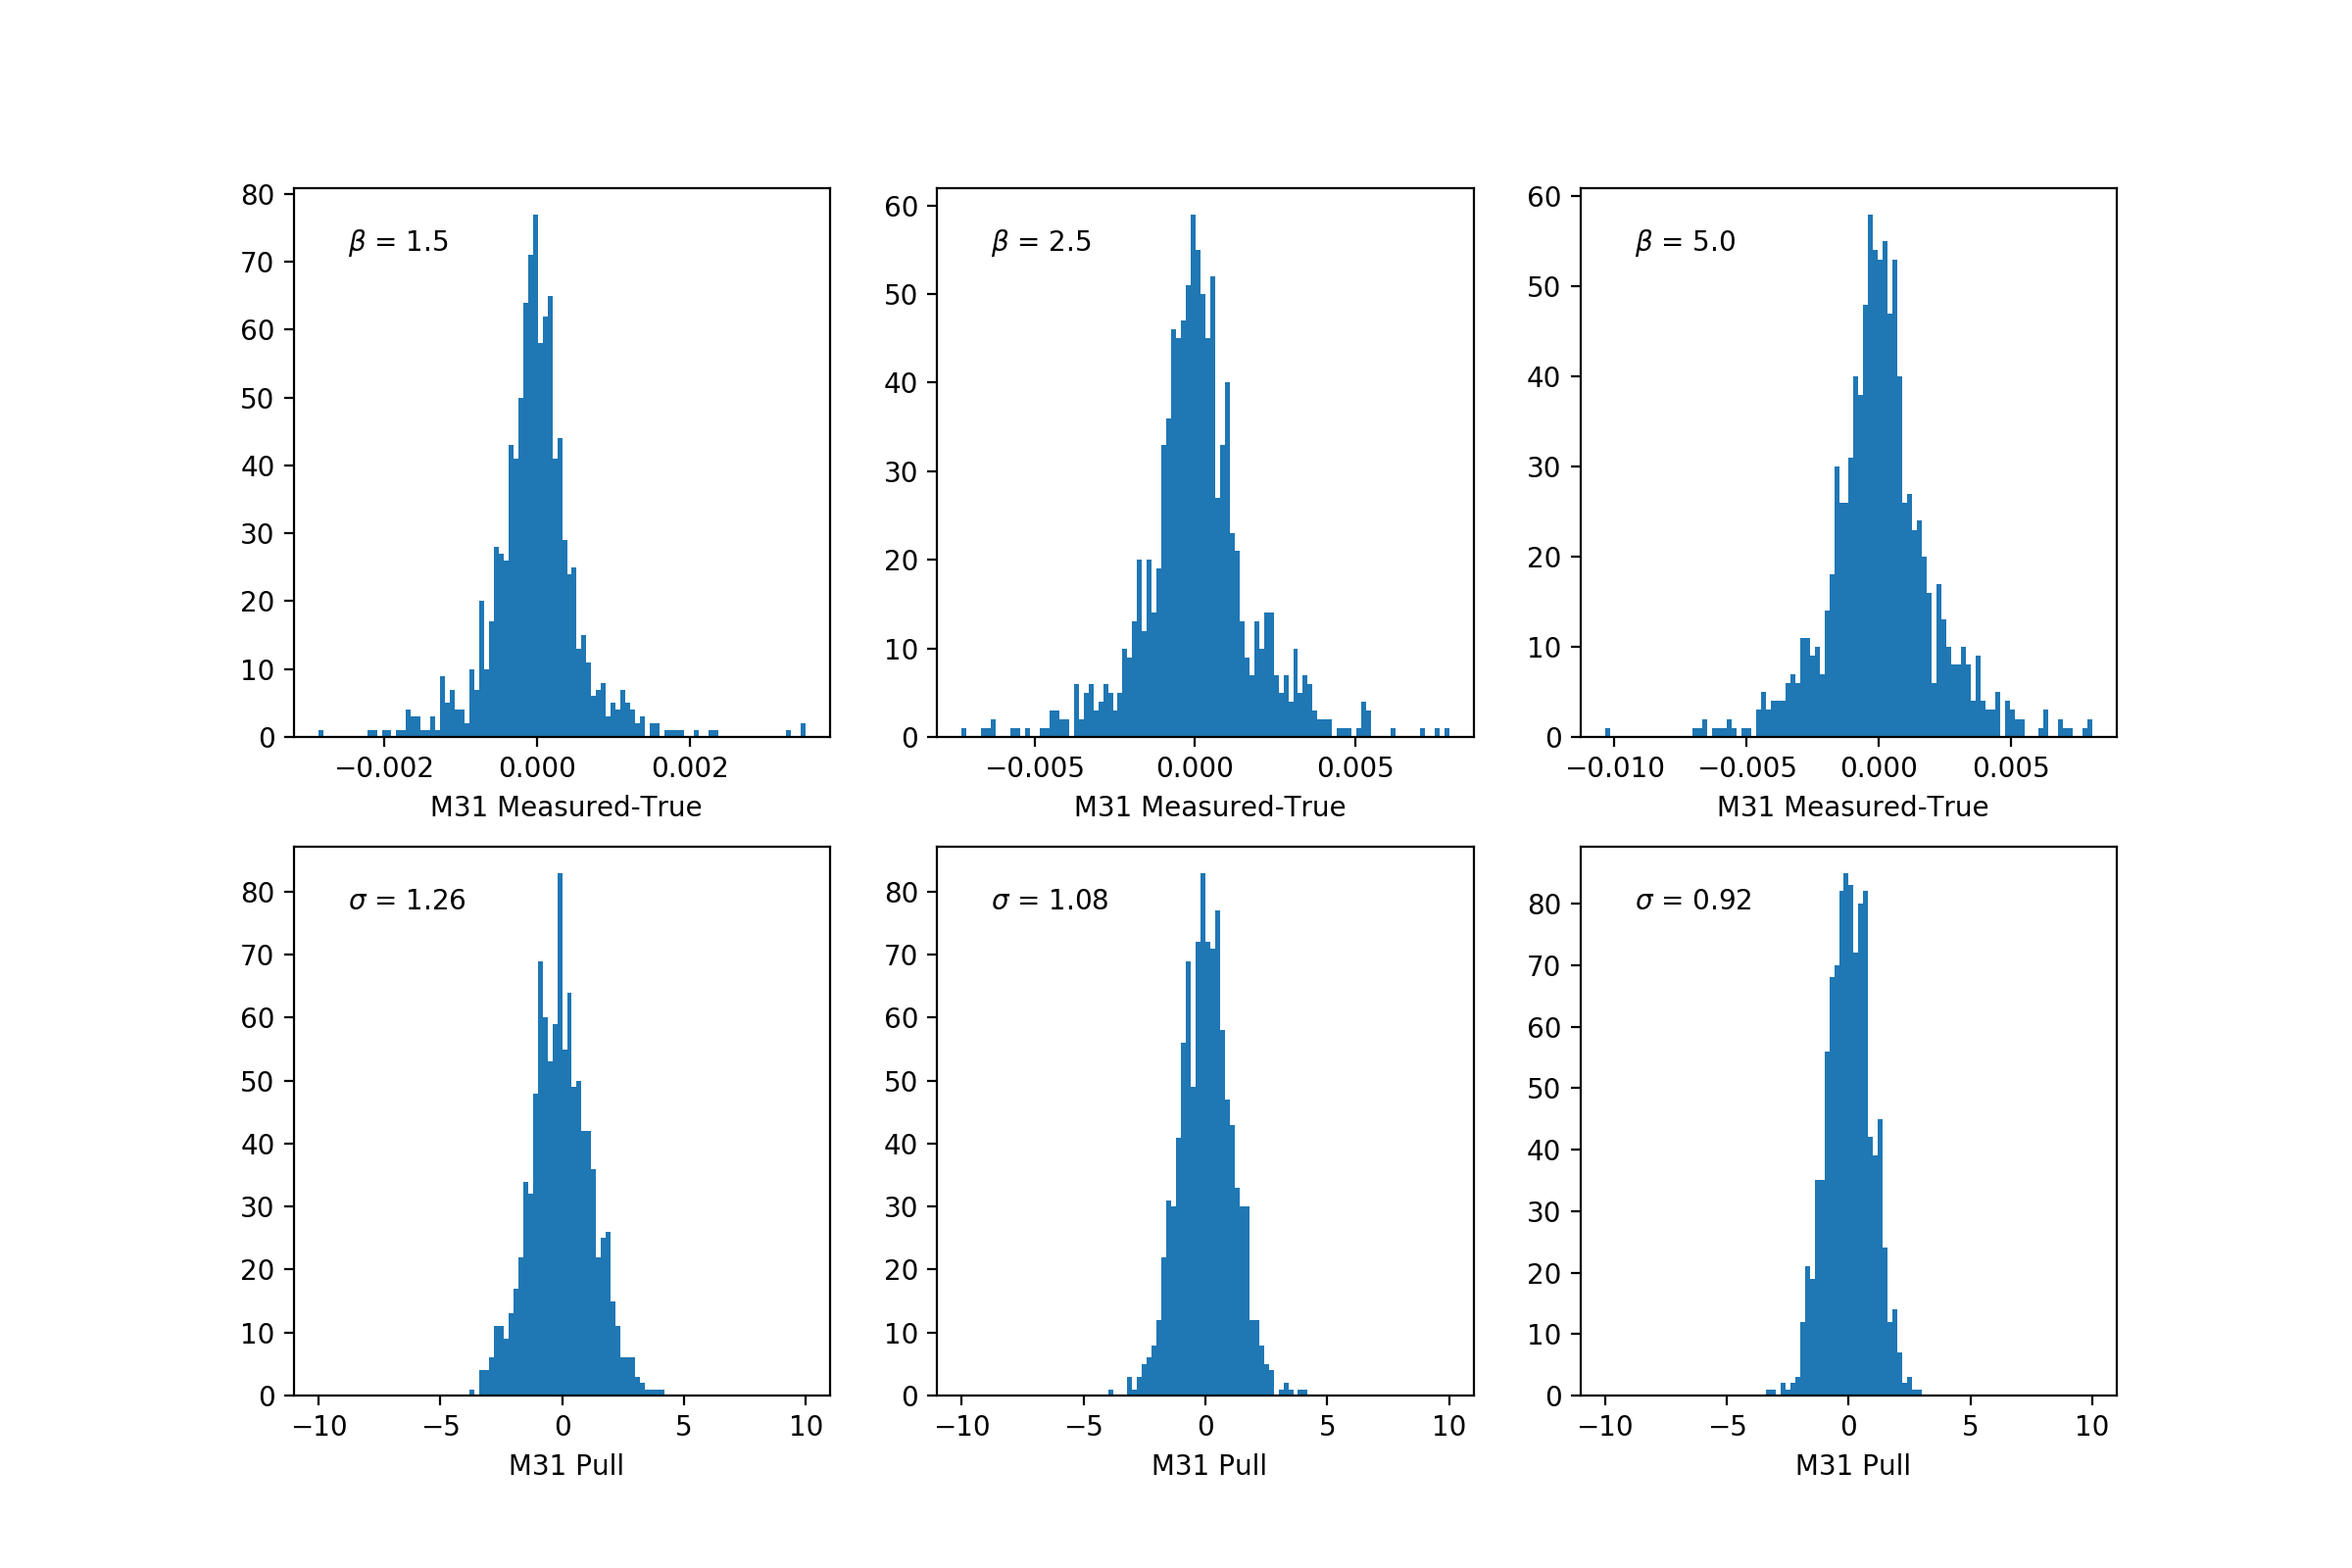

<IPython.core.display.Javascript object>


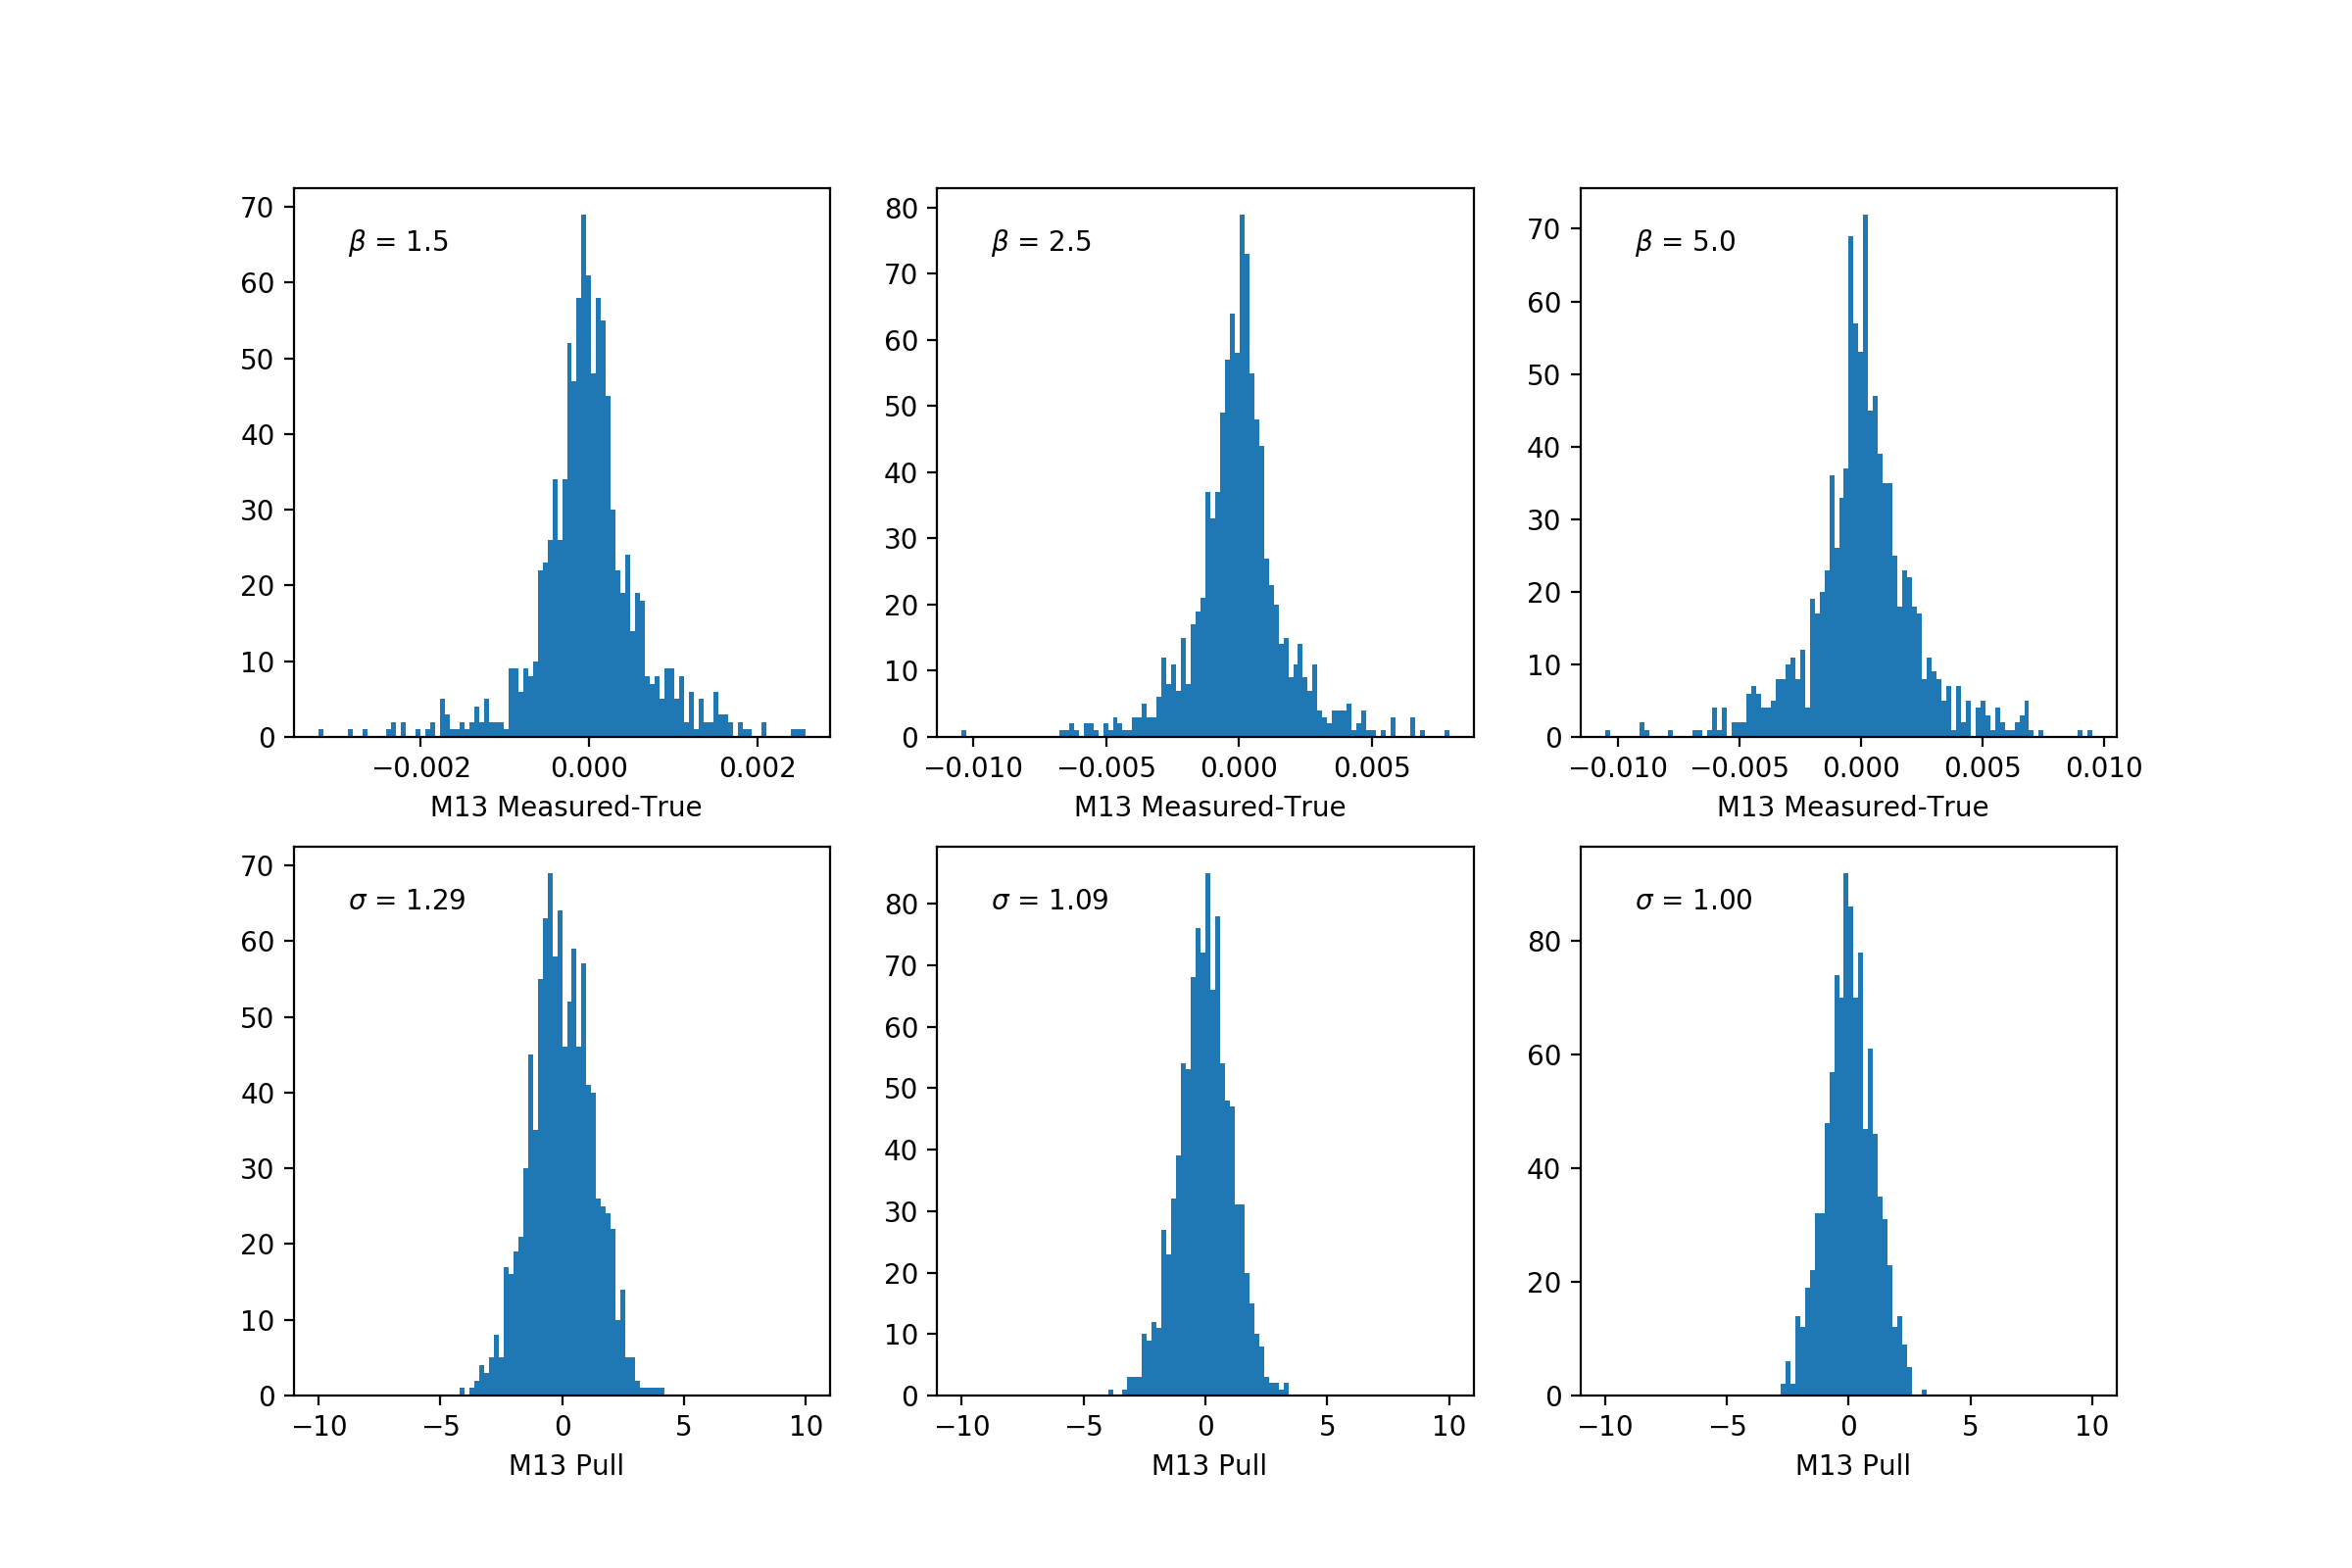

<IPython.core.display.Javascript object>


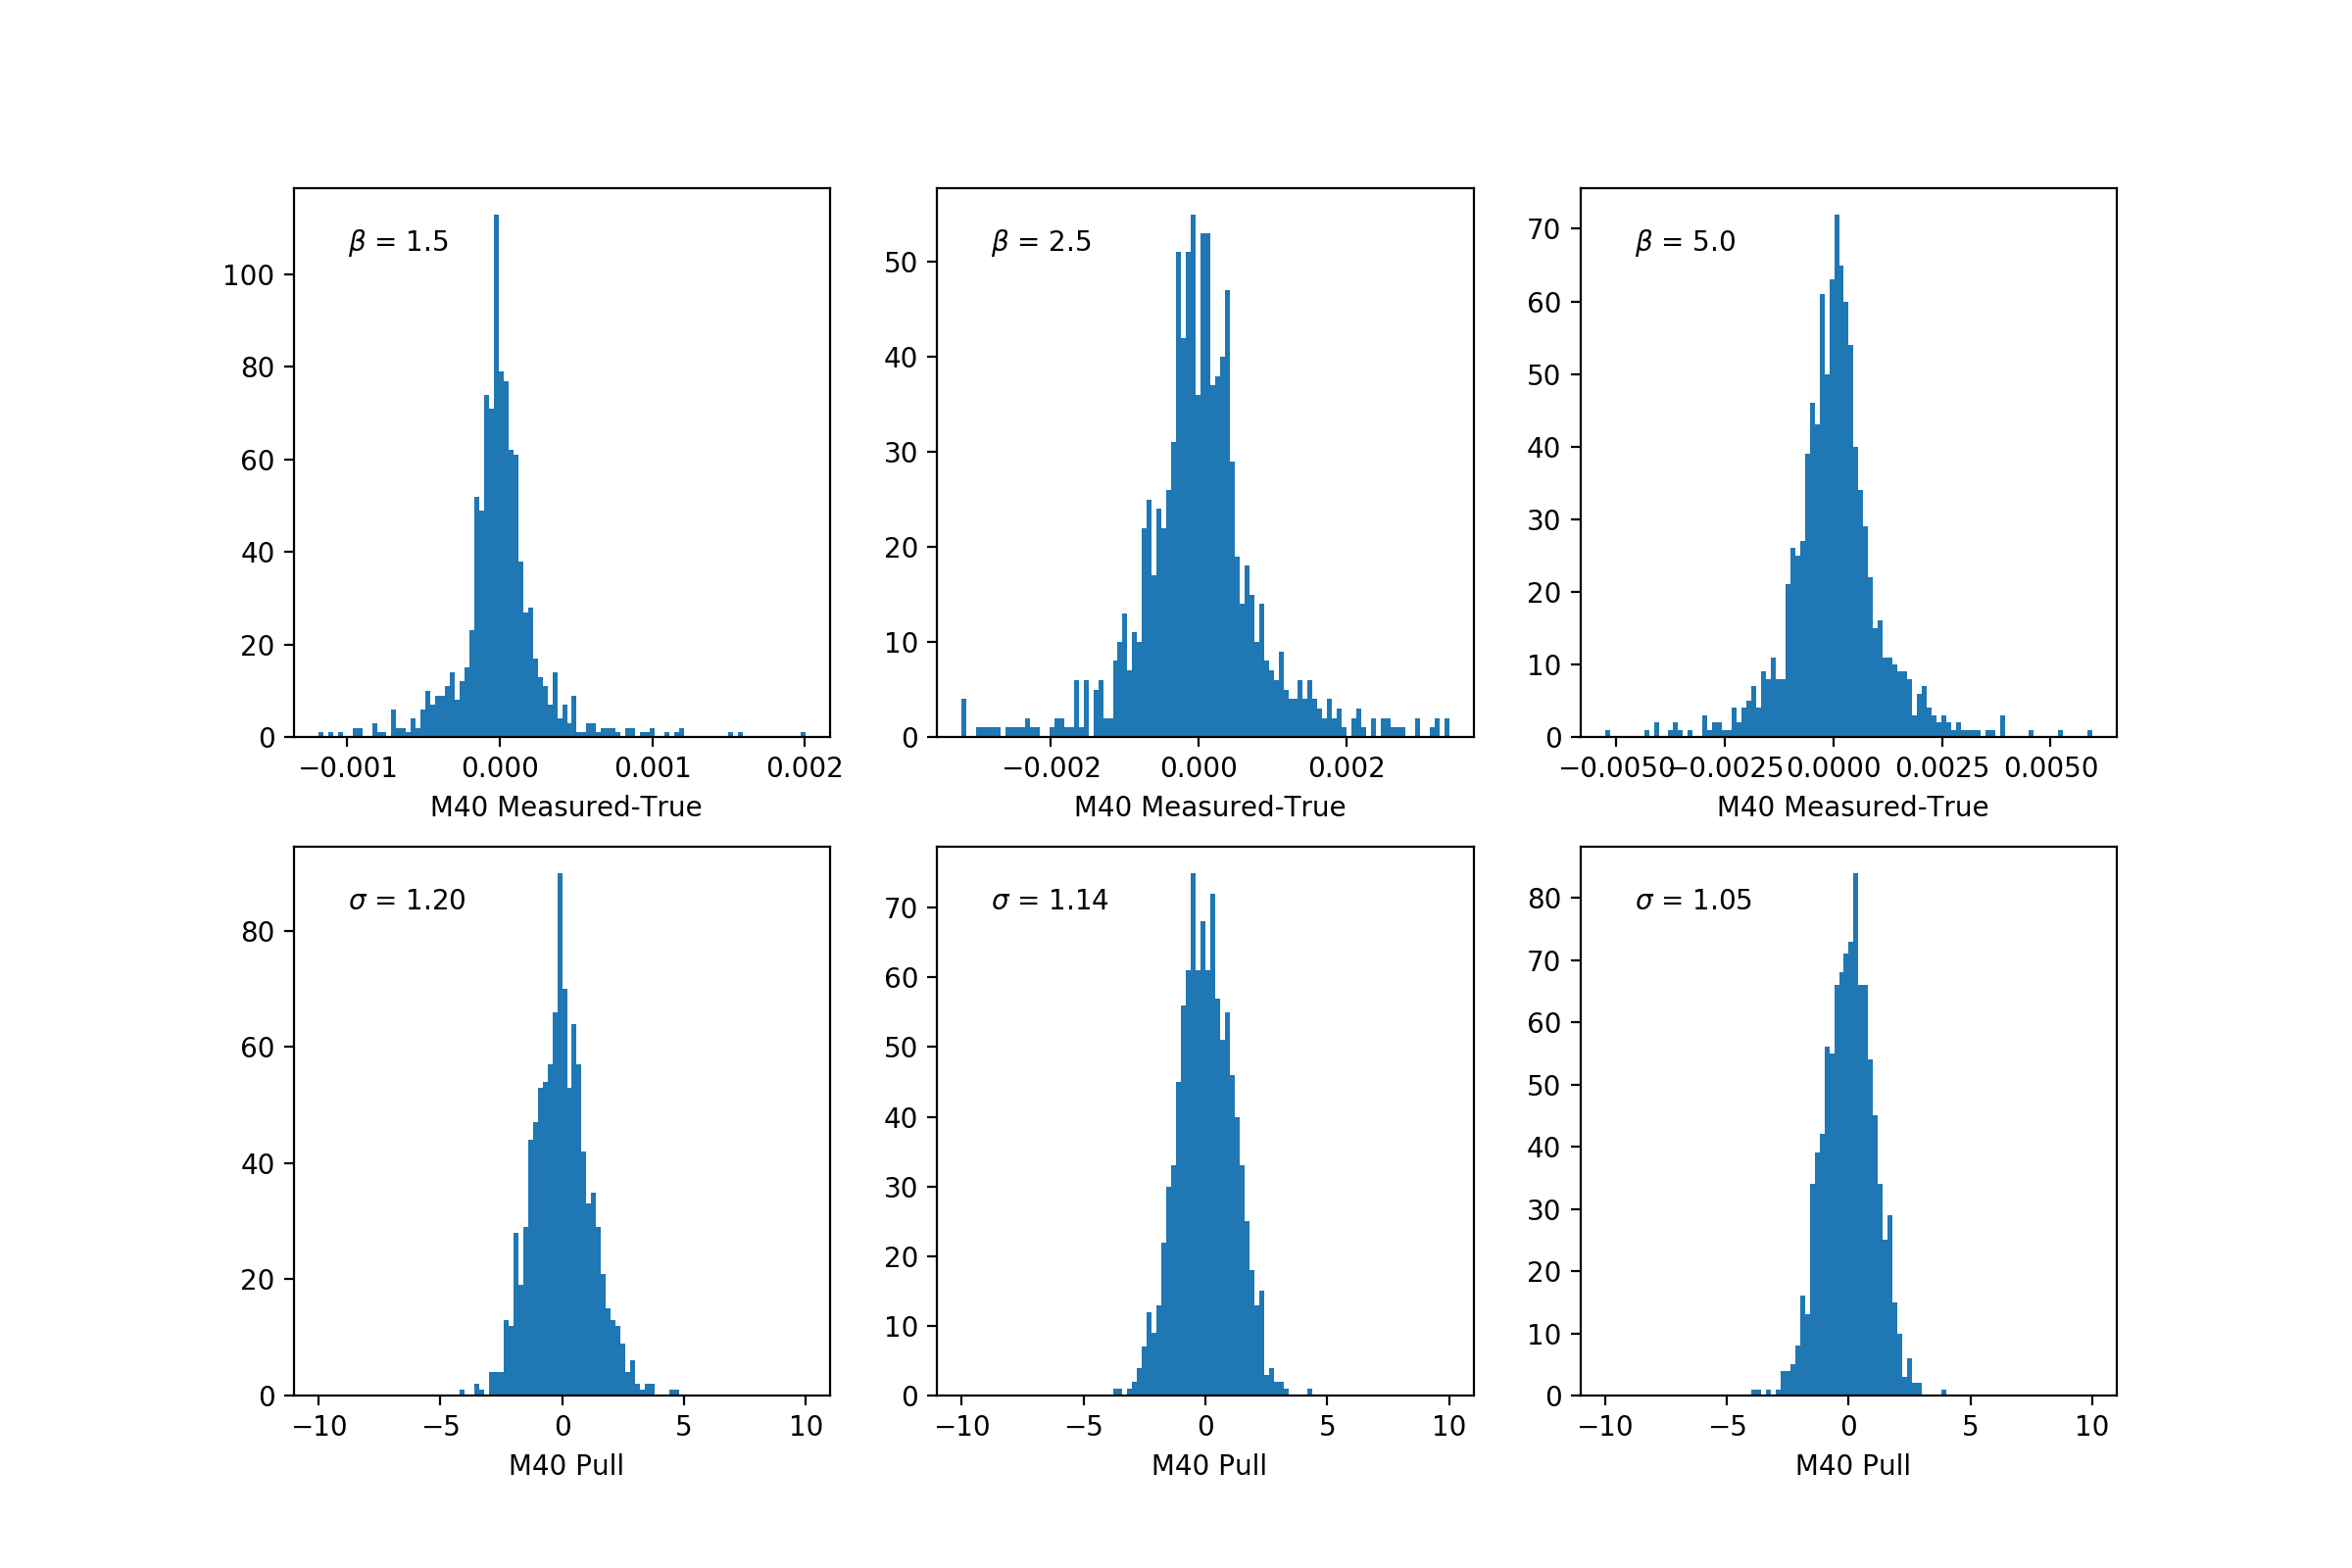

<IPython.core.display.Javascript object>


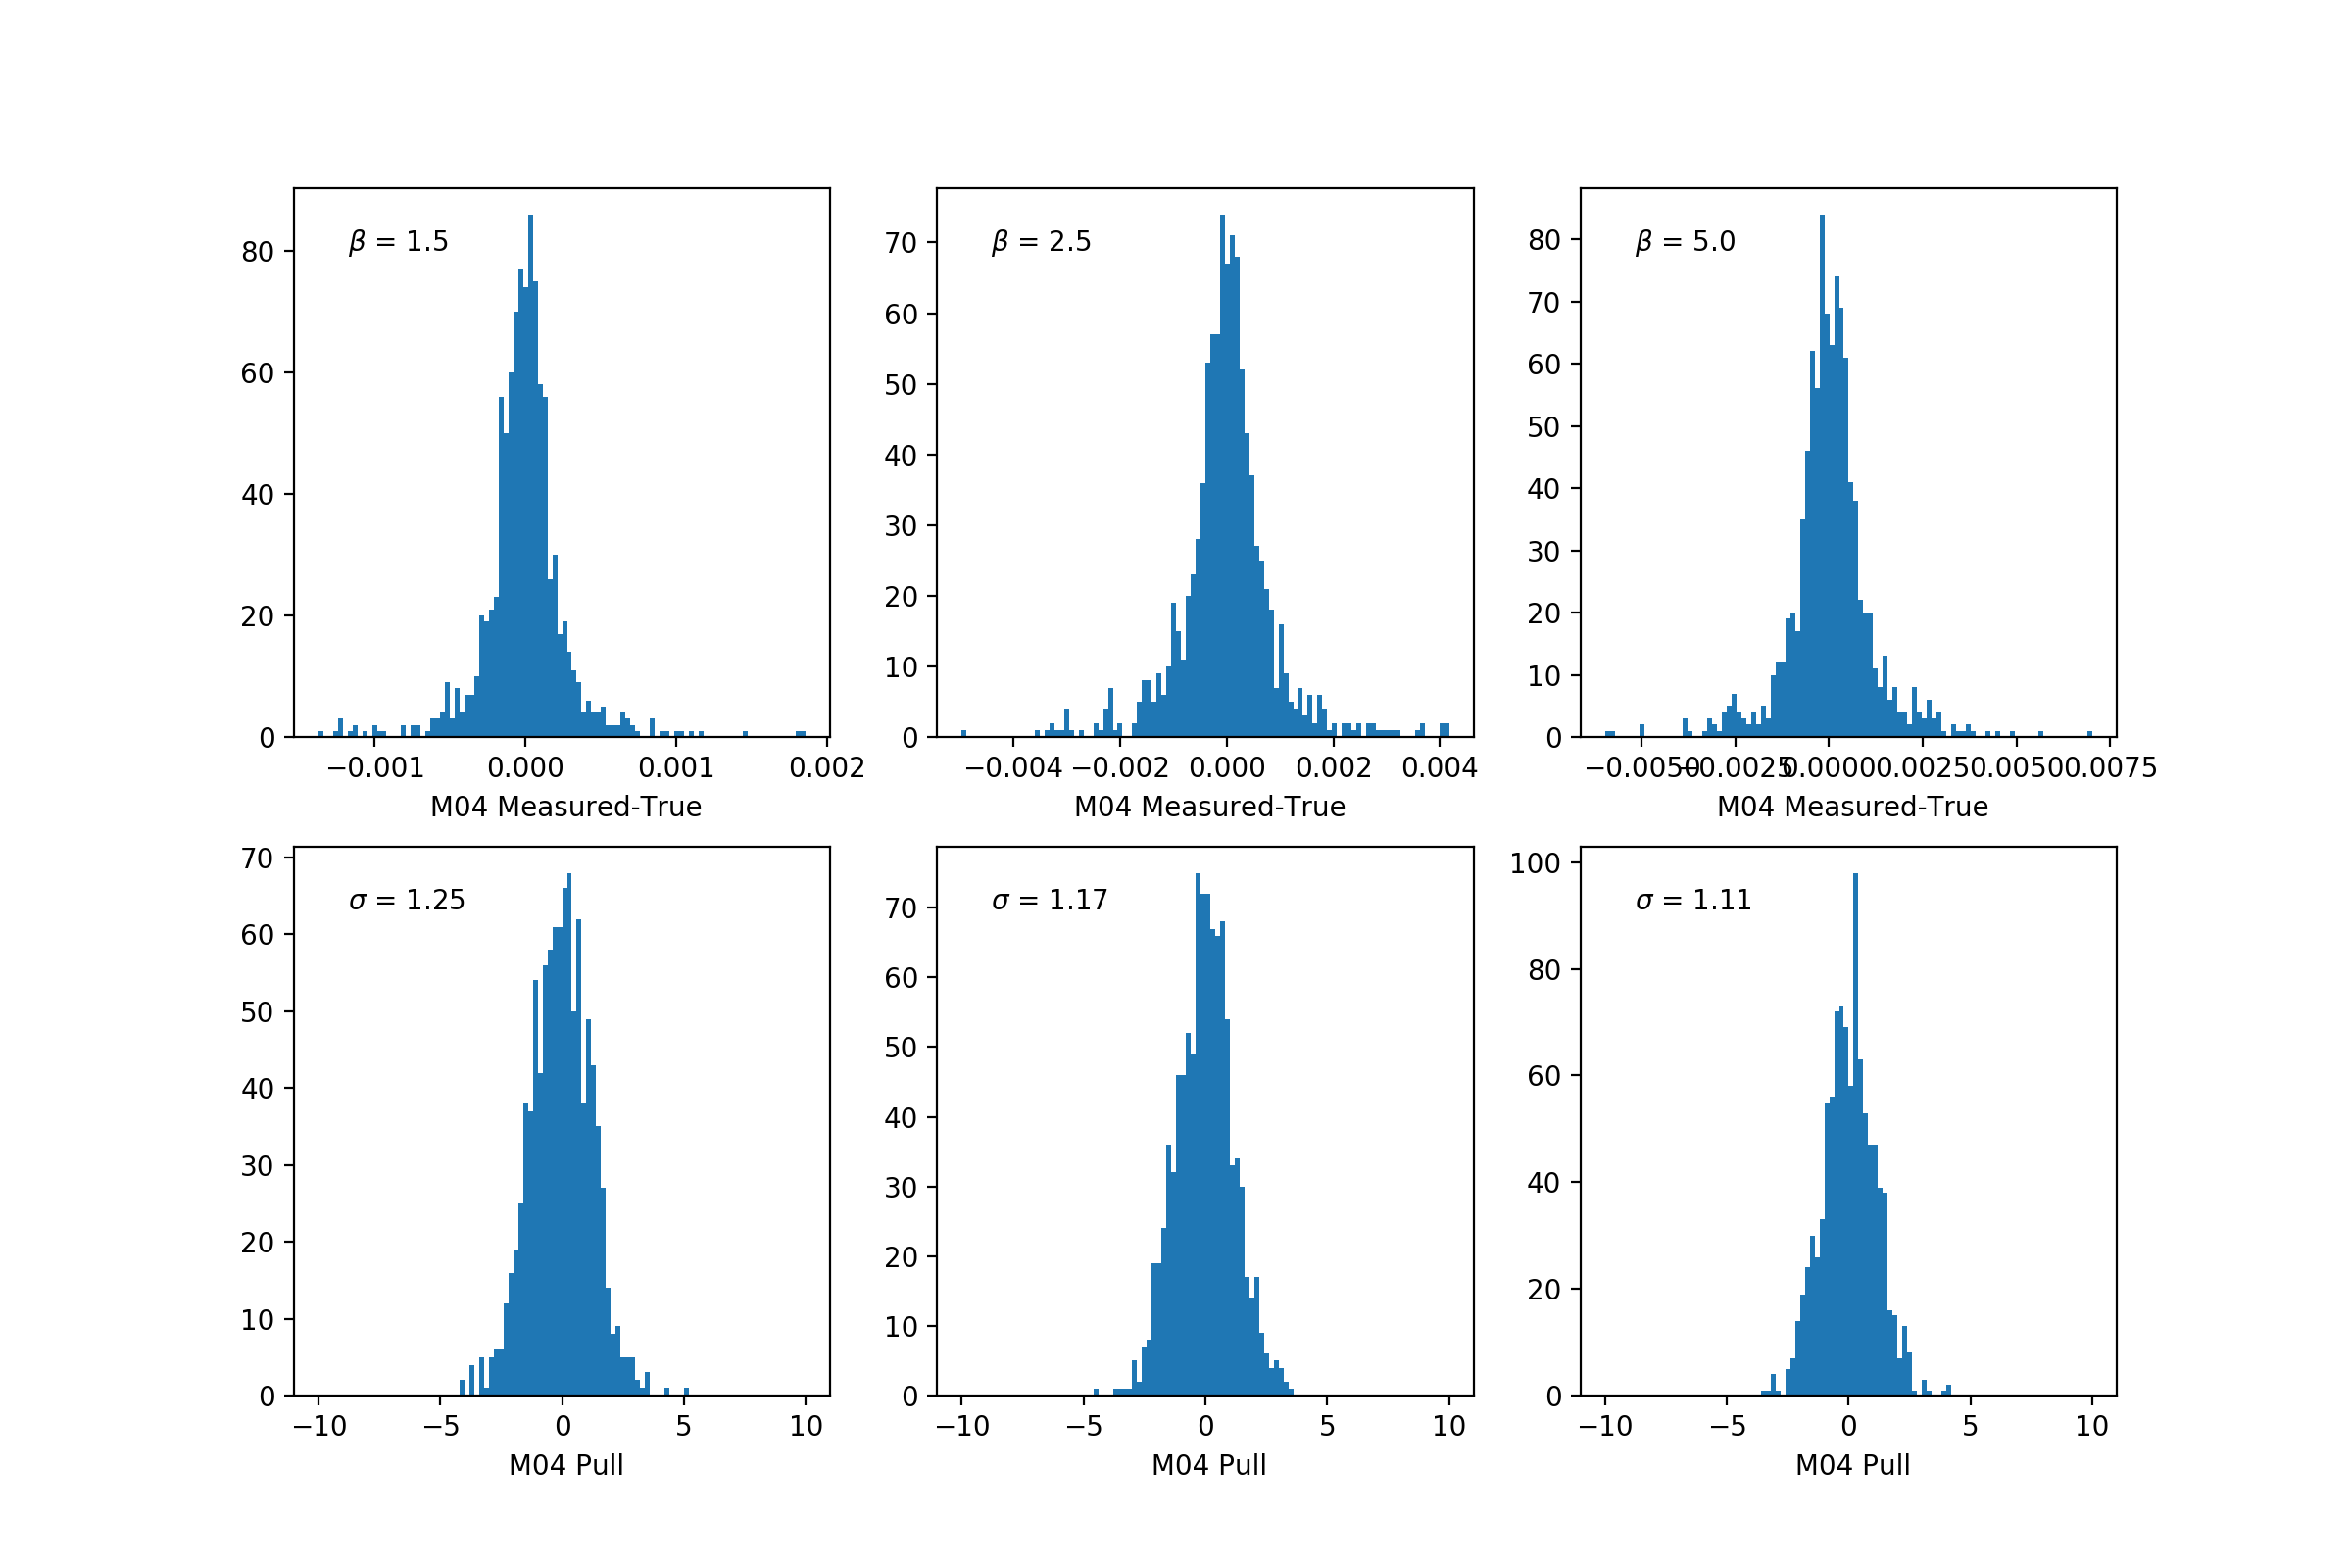

<IPython.core.display.Javascript object>


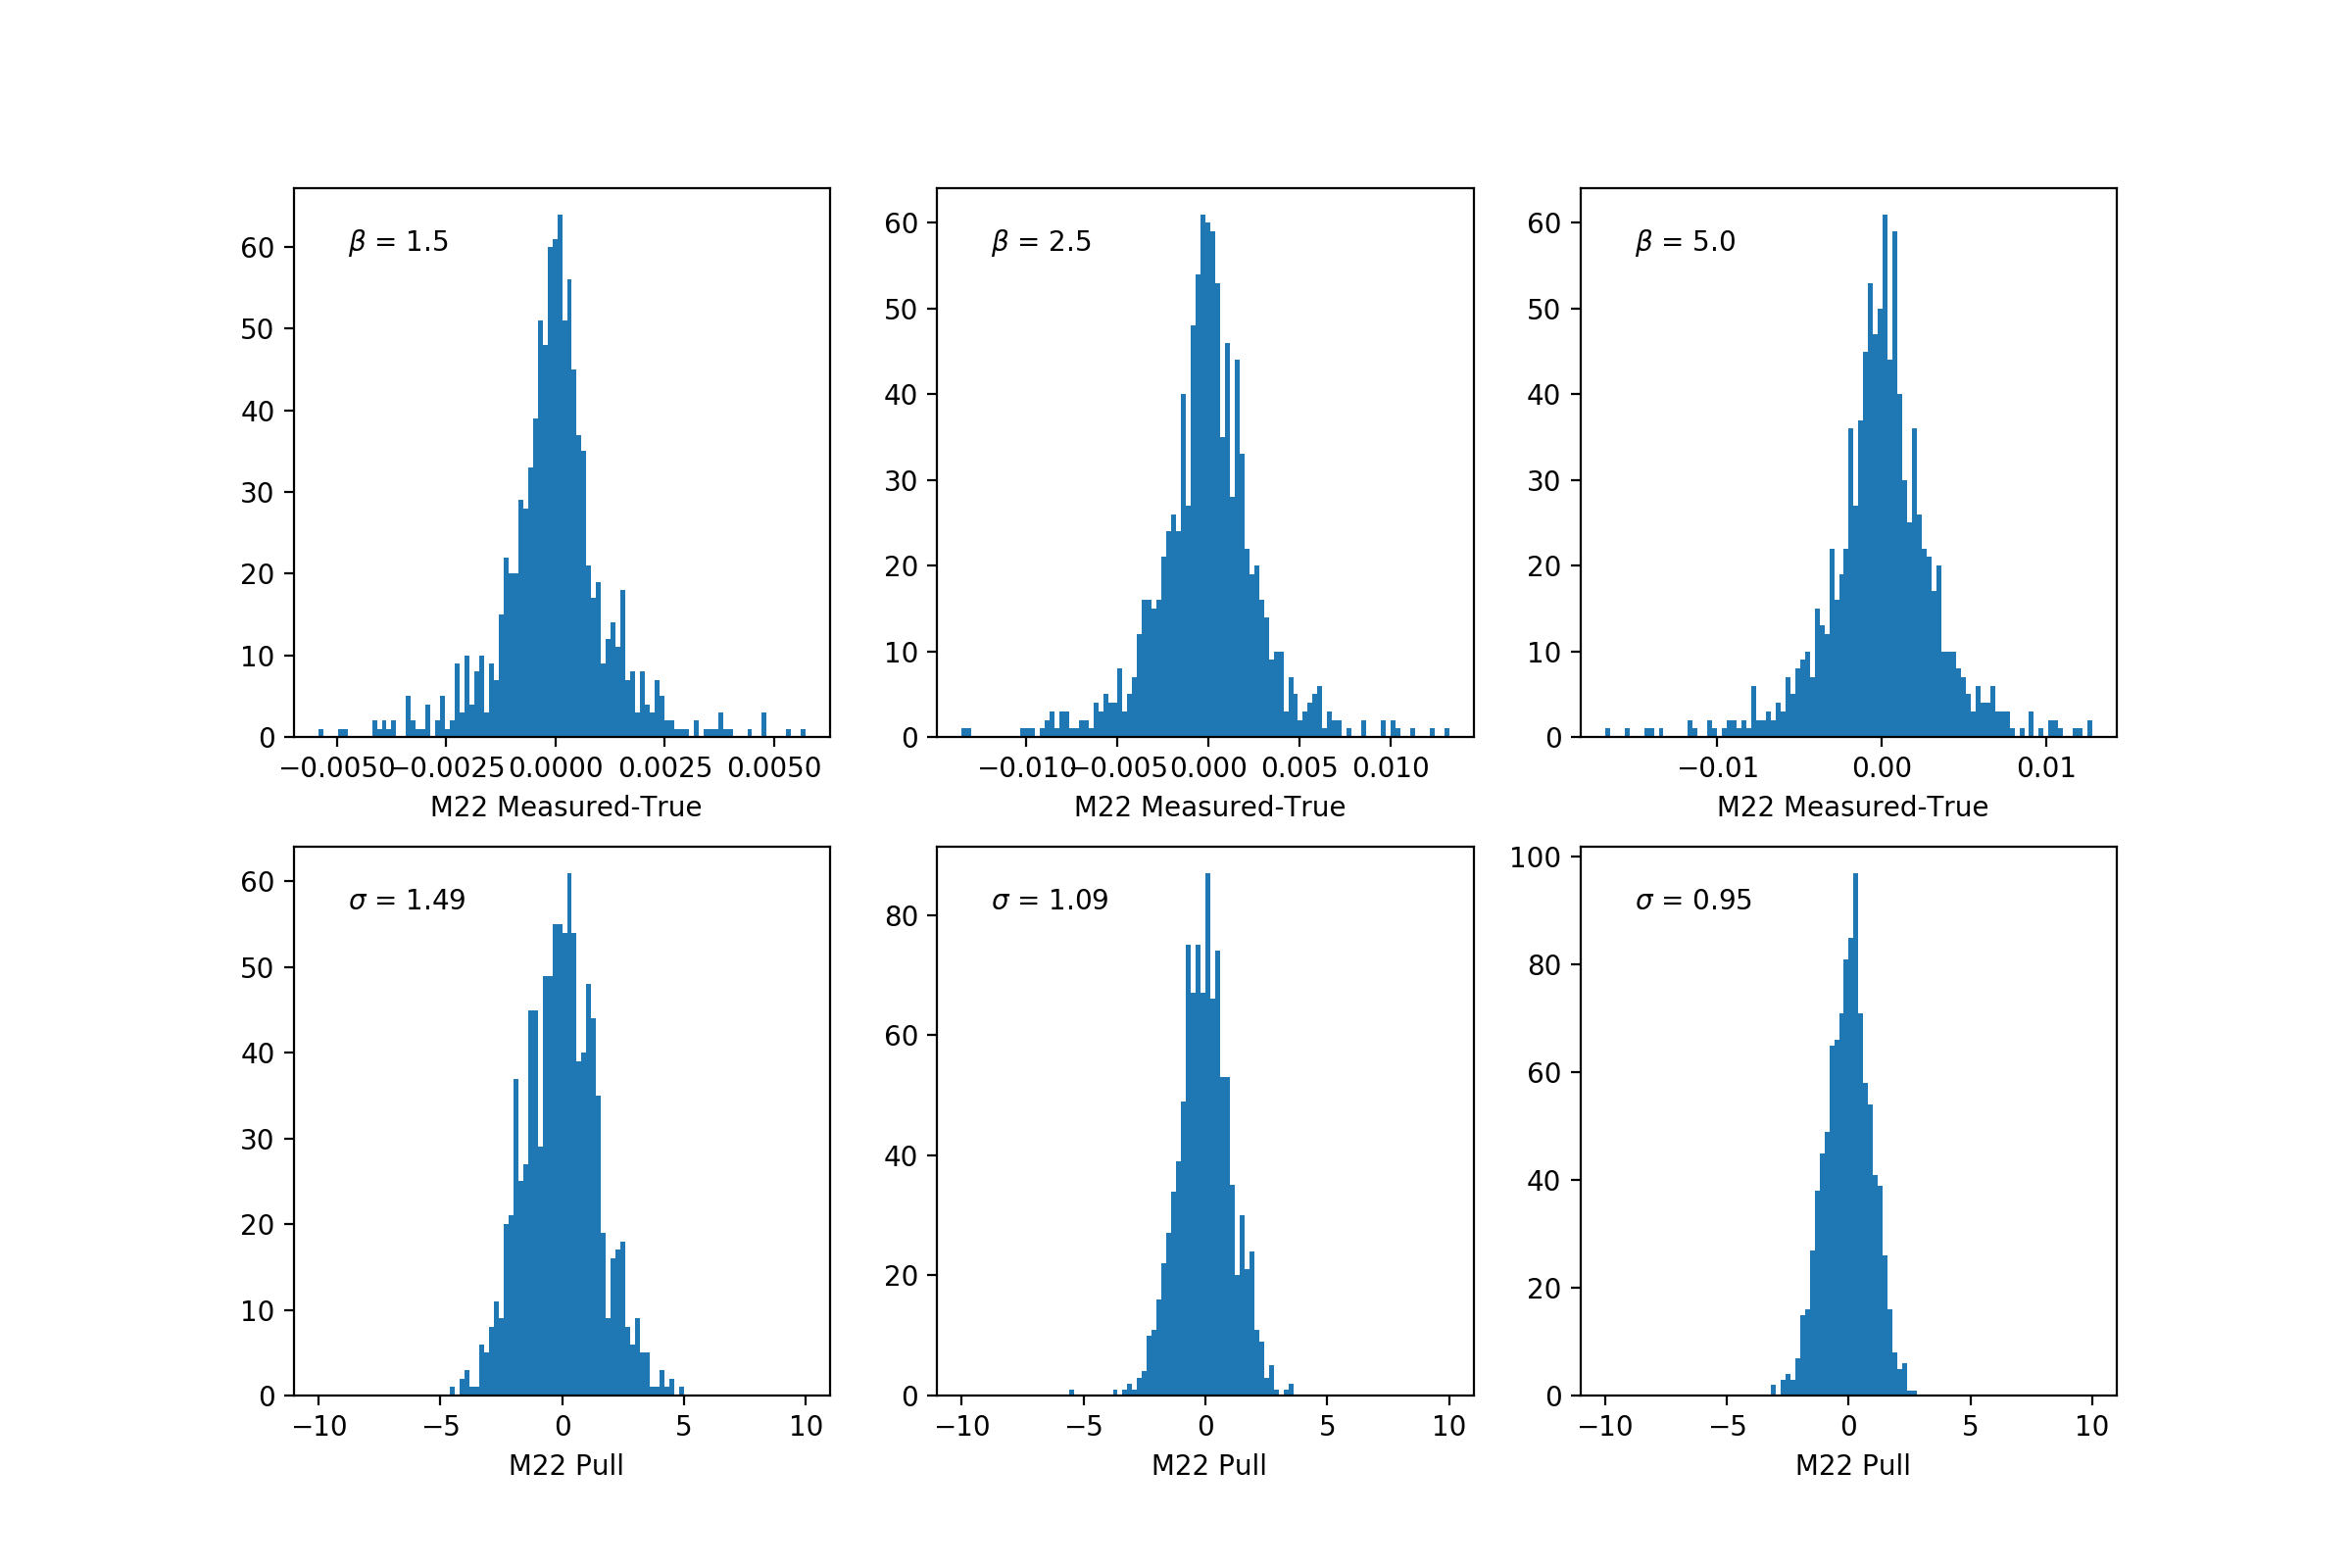

<IPython.core.display.Javascript object>


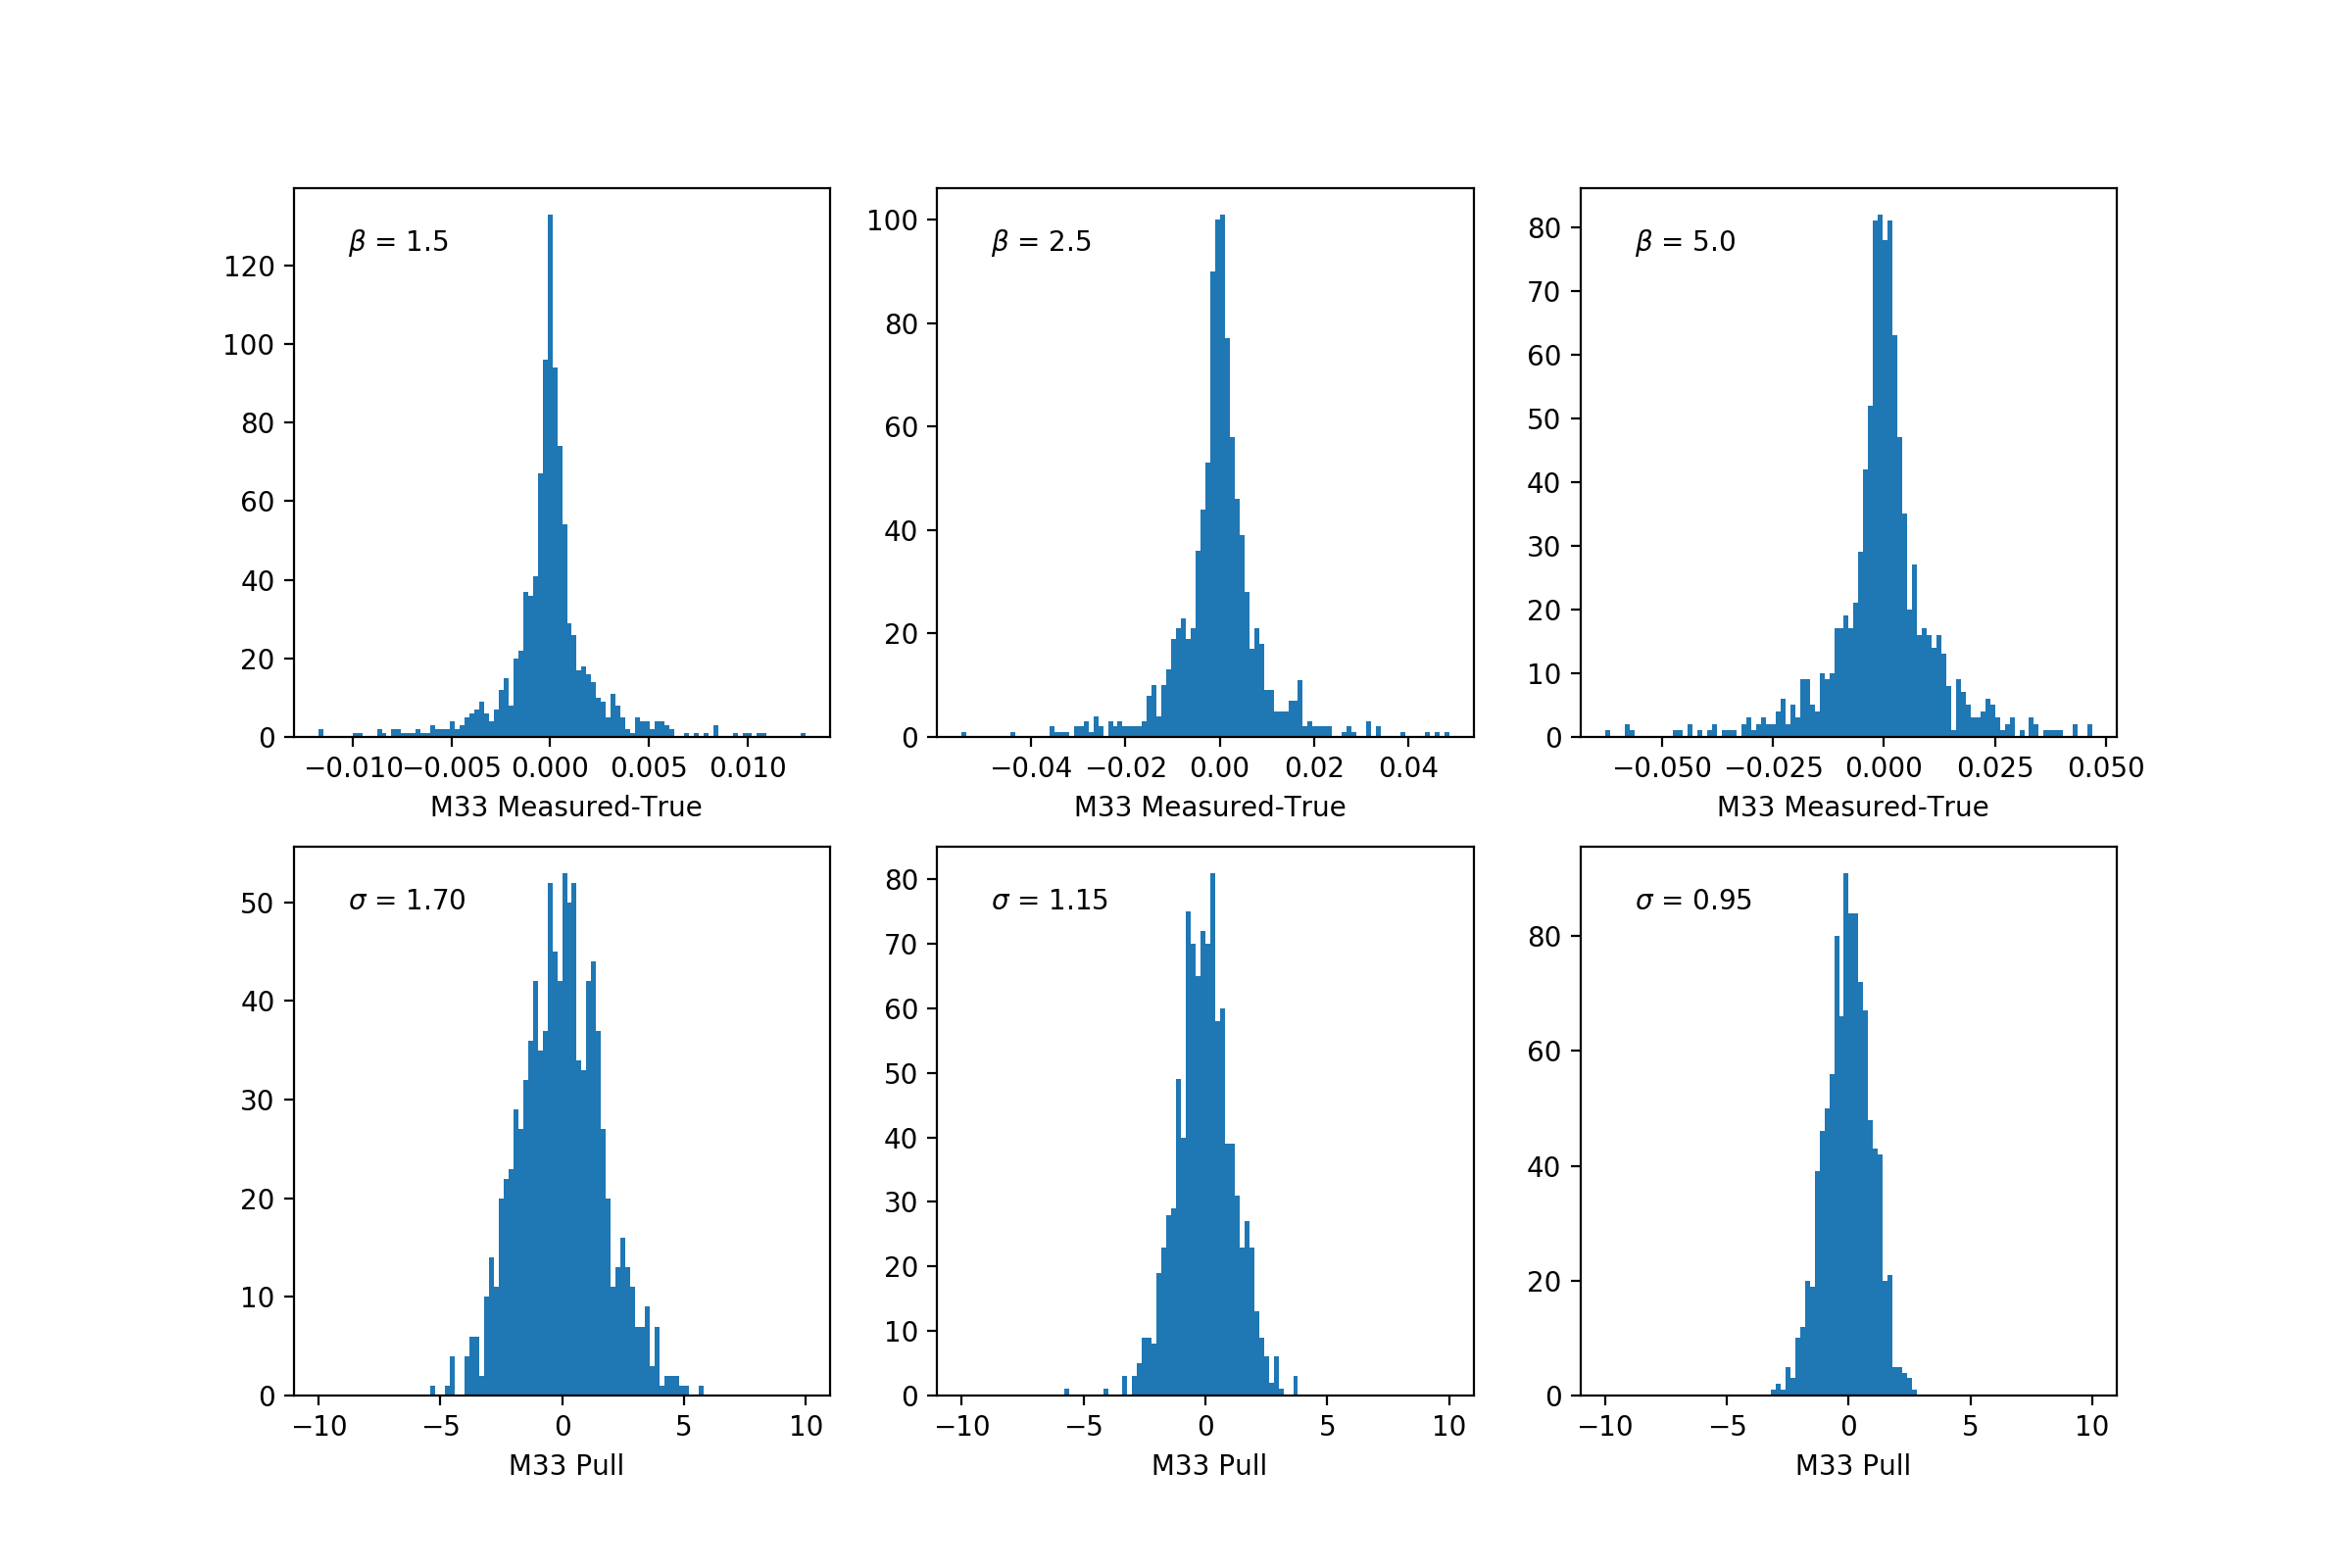

<IPython.core.display.Javascript object>


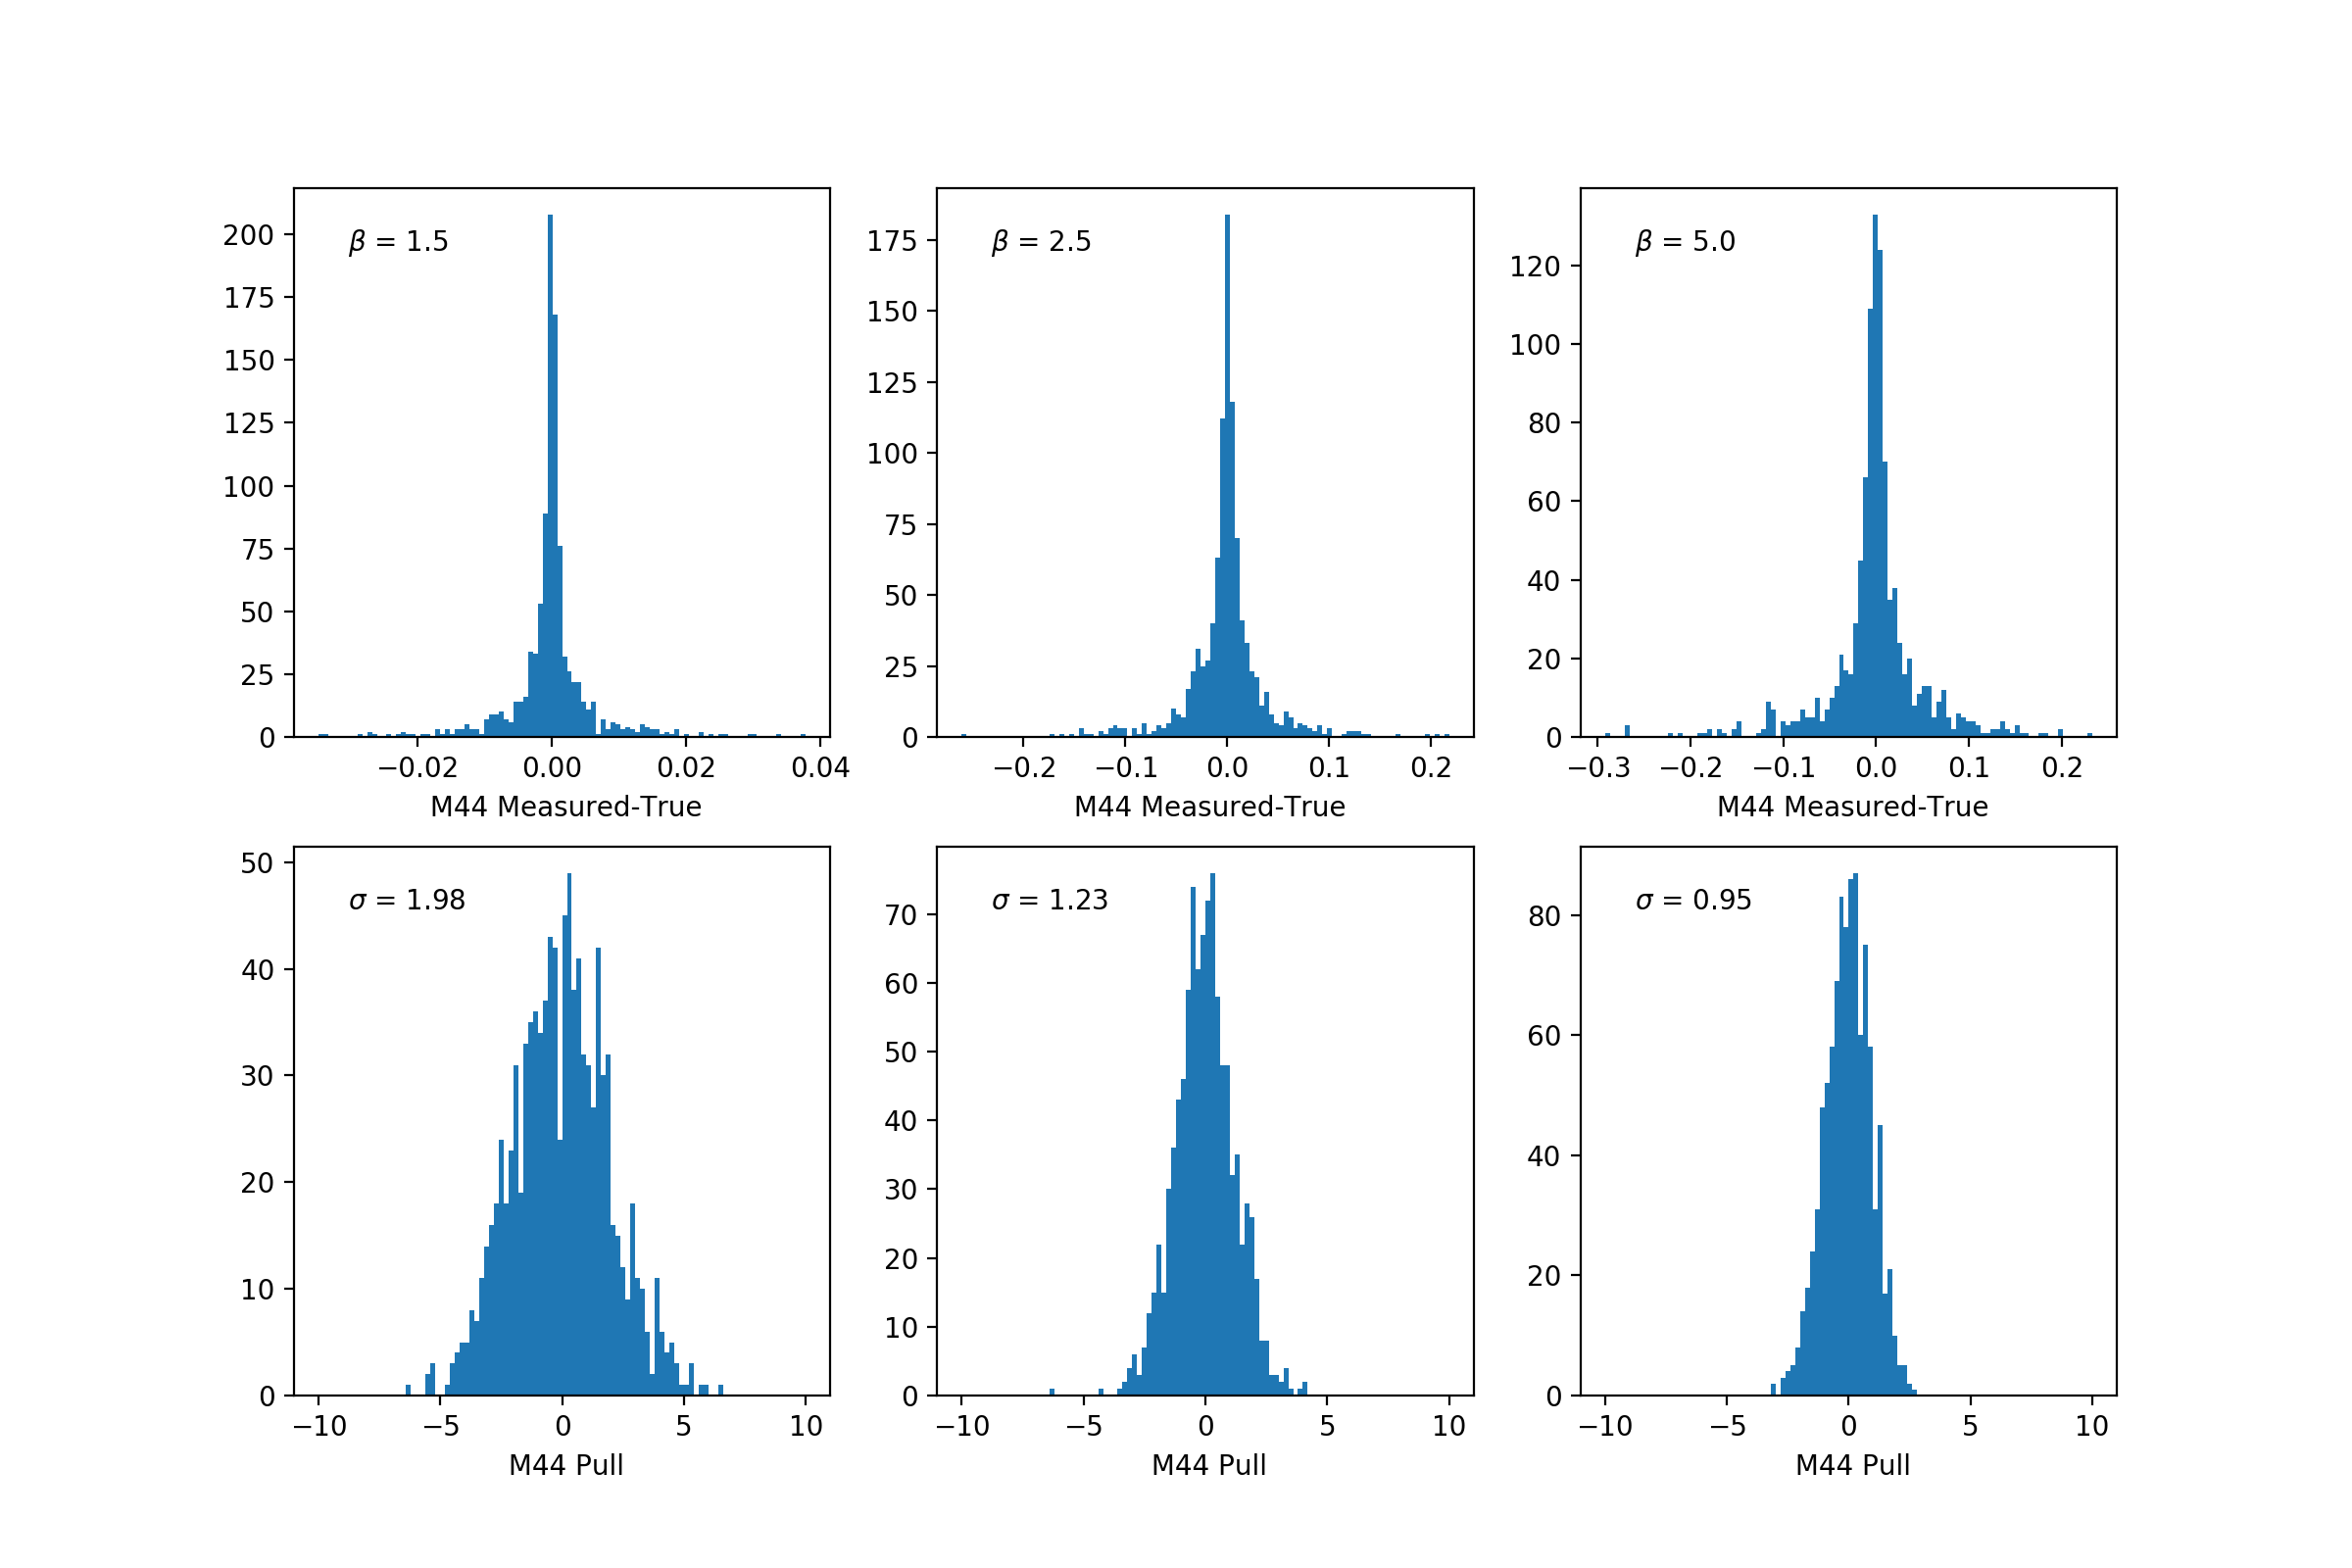

<IPython.core.display.Javascript object>


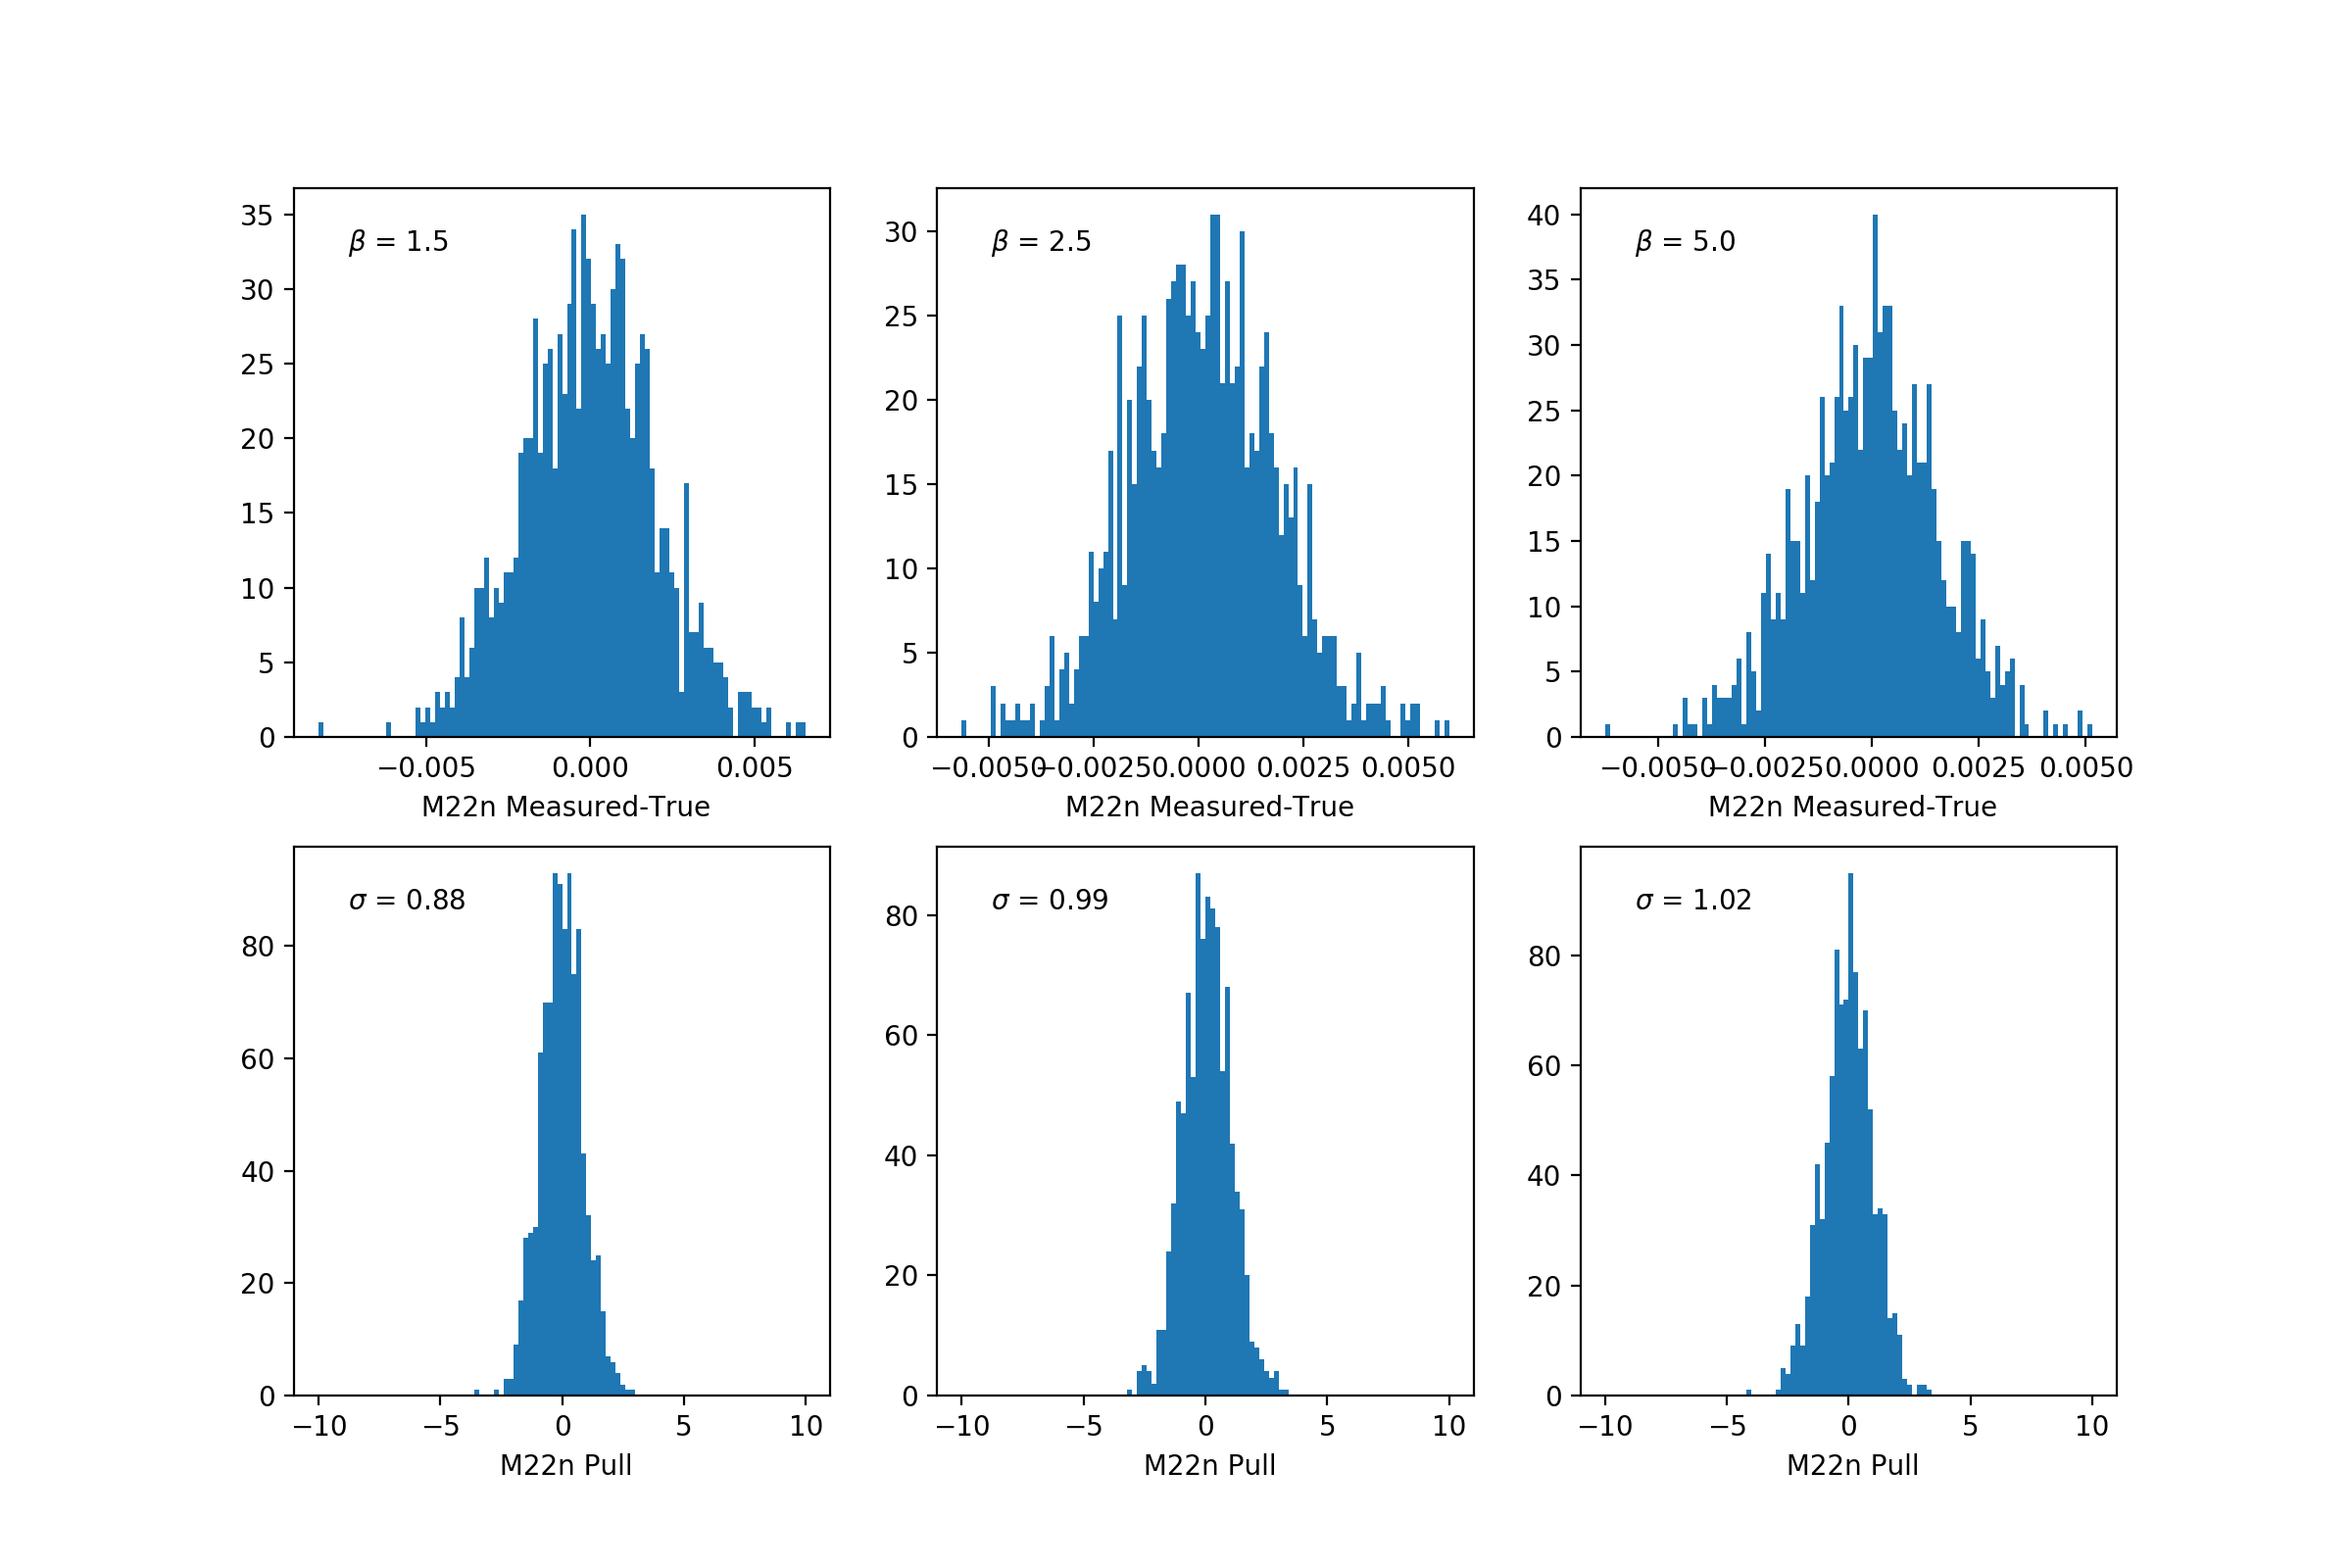

<IPython.core.display.Javascript object>


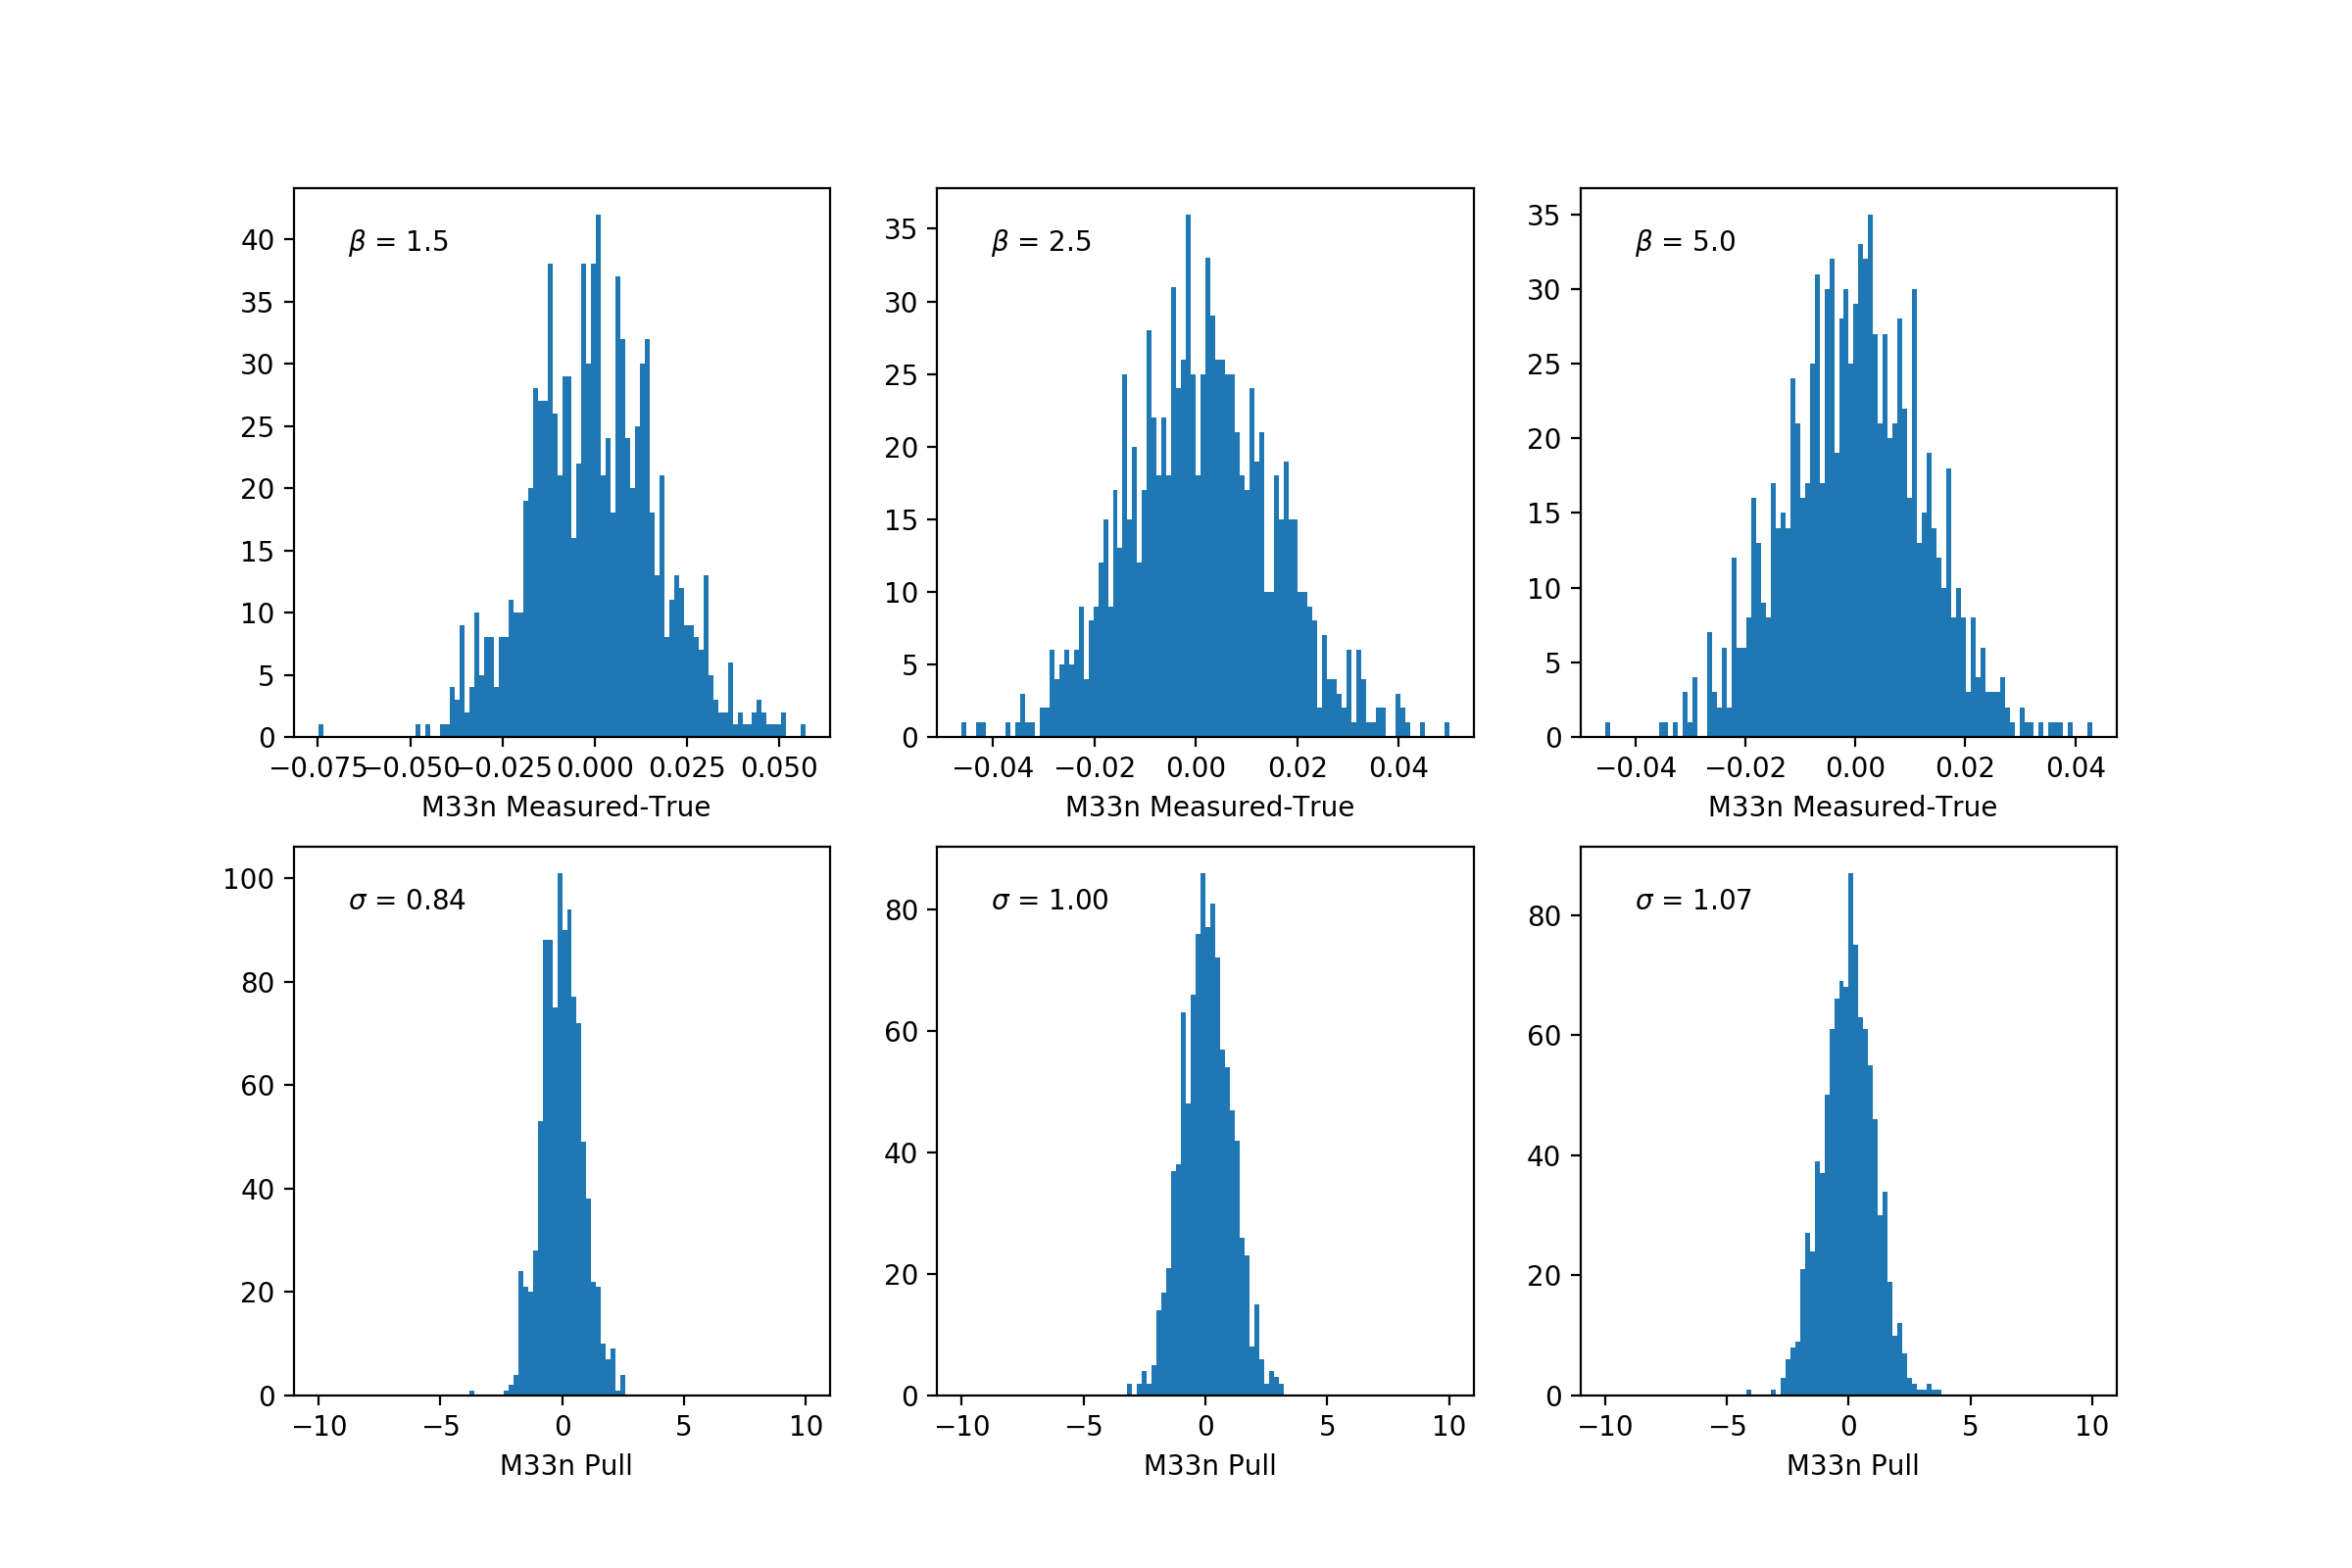

<IPython.core.display.Javascript object>


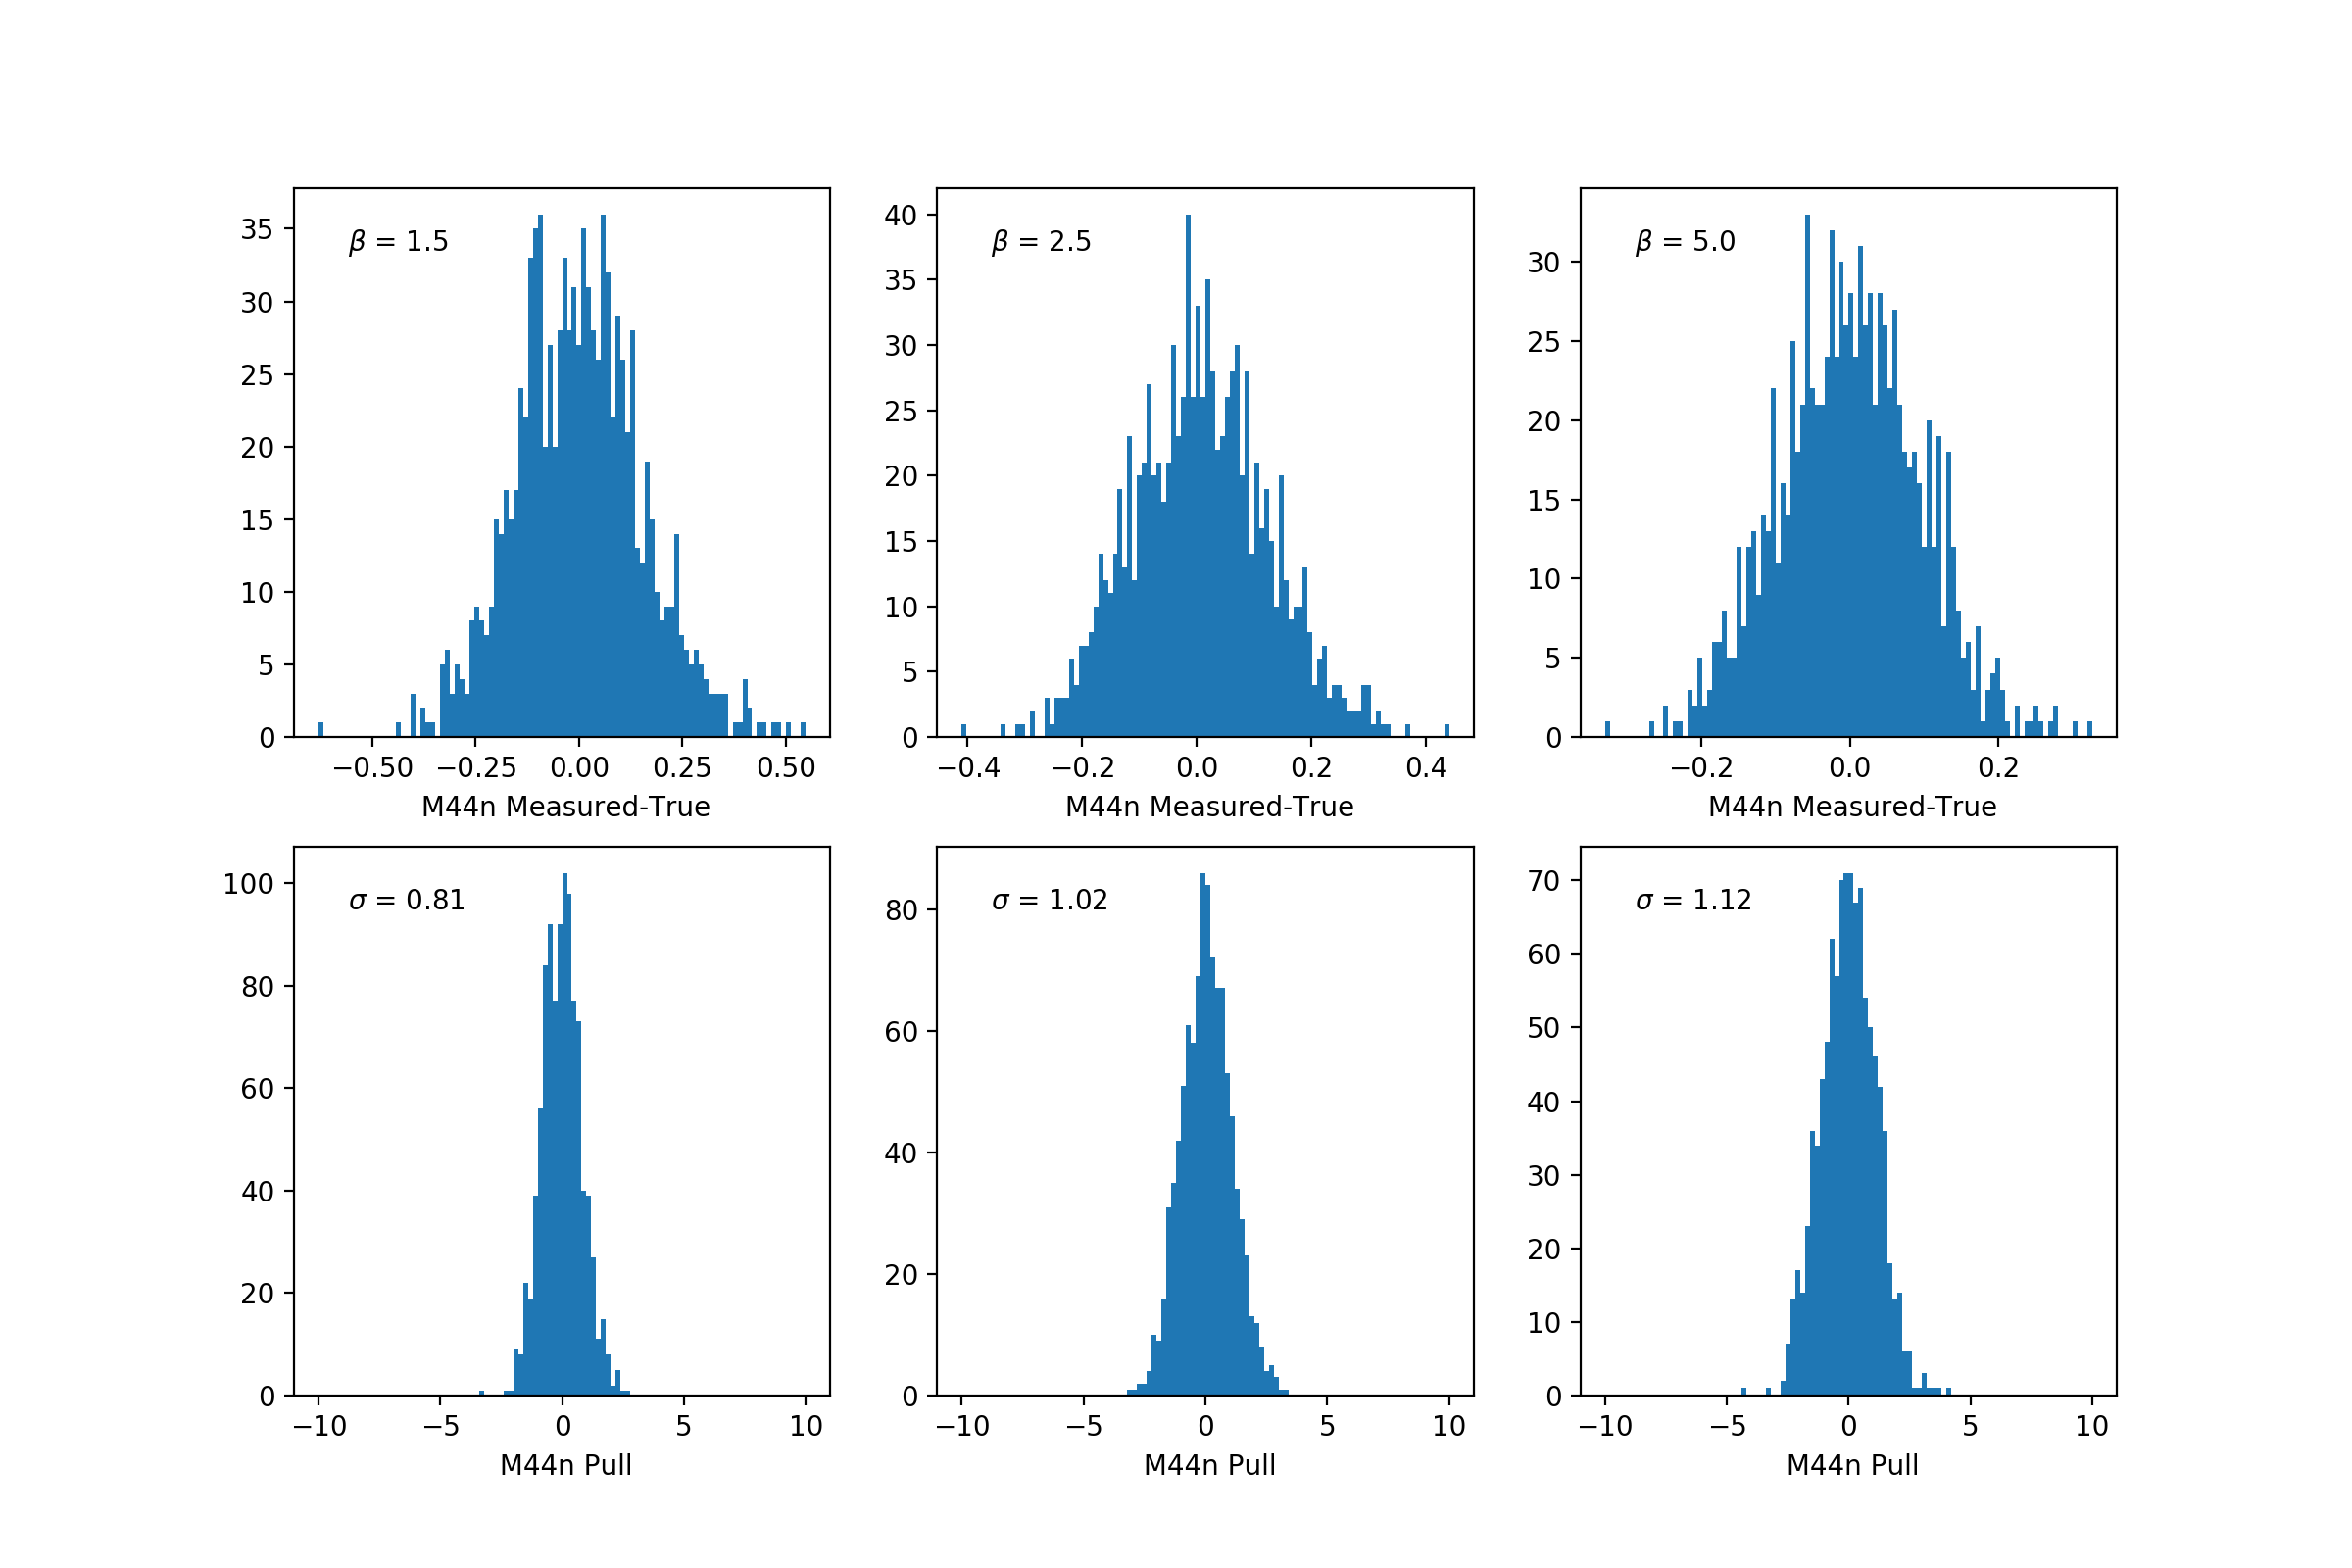

[[1.0243218204408135, 0.9966388357588579, 0.9867686415754892], [0.9814932569045697, 0.9974521359751871, 0.962892247506768], [1.3296612183314334, 1.0453587547954413, 0.9508339862990374], [1.099337123698912, 1.0298297296367727, 0.9318728033904164], [1.112279390929703, 1.0230885859567596, 0.979789352378794], [0.9304684946223133, 0.9850903467583556, 0.9738135666366758], [0.9275595124784303, 0.9998510231410664, 1.0447561779427255], [0.9947572667576249, 0.9971635752177397, 0.9673635599405613], [0.9413212364998135, 1.0154027233734444, 1.003080733110406], [1.2576071643732791, 1.0826632439009365, 0.9234521712355682], [1.2877277114310053, 1.0885104325827042, 0.9957322989563534], [1.1994176257141158, 1.1363990089910854, 1.049415383689936], [1.2505963719684985, 1.16937915466223, 1.1067947794008448], [1.4879999664358432, 1.091160609184425, 0.9465524387086509], [1.6954781971694095, 1.154818264719873, 0.9485831285748682], [1.9769733736506028, 1.2346657291221916, 0.9536732386679635], [0.87995466675501

In [10]:
pdf = PdfPages("moffat.pdf")

momentlist = ['M10','M01','M11','M20','M02','M21','M12','M30','M03','M31','M13','M40','M04','M22','M33','M44','M22n','M33n','M44n']
rmslist = []

for i,amoment in enumerate(momentlist):
    rmslist.append(makepullplots(amoment,perfect=False,pdf=pdf))

pdf.close()
print(rmslist)

In [14]:
# look at summary stats
drms = pd.DataFrame(rmslist,columns=['rms1p5','rms2p5','rms5'])
print(drms)

      rms1p5    rms2p5      rms5
0   1.024322  0.996639  0.986769
1   0.981493  0.997452  0.962892
2   1.329661  1.045359  0.950834
3   1.099337  1.029830  0.931873
4   1.112279  1.023089  0.979789
5   0.930468  0.985090  0.973814
6   0.927560  0.999851  1.044756
7   0.994757  0.997164  0.967364
8   0.941321  1.015403  1.003081
9   1.257607  1.082663  0.923452
10  1.287728  1.088510  0.995732
11  1.199418  1.136399  1.049415
12  1.250596  1.169379  1.106795
13  1.488000  1.091161  0.946552
14  1.695478  1.154818  0.948583
15  1.976973  1.234666  0.953673
16  0.879955  0.985517  1.017496
17  0.835669  0.999379  1.065365
18  0.809727  1.021675  1.119339


In [ ]:
def makepullvsother(vname,vother,pdf=None):
    
    f,ax = plt.subplots(1,3,figsize=(12,5))

    fstr = ['low','med','high']
    
    name_noise = "%s_noise" % (vname)
    name_sigma = "var%s_noise" % (vname)
    name_nonoise = "%s_nonoise" % (vname)
    
    for i in range(3):
        use = ( (df.Sum == pixel_sum[i]) & (df.M00_noise>0.) )
        dft = df[use]
    
        diff = dft[name_noise] - dft[name_nonoise]
        pull = diff/np.sqrt(dft[name_sigma])
    
        other = dft['%s' % (vother)]
        h = ax[i].scatter(other,pull,marker='.',s=0.1)
    
        ax[i].set_xlabel(vother)
        ax[i].set_ylabel(' %s Pull' % (vname))
        
    if pdf:
        pdf.savefig(f)


In [ ]:
pdf = PdfPages("moments-vsothers.pdf")
makepullvsother("M11",'M11_nonoise')
makepullvsother("M20",'M11_nonoise')
makepullvsother("M02",'M11_nonoise')
makepullvsother("M11",'M22n_nonoise')
makepullvsother("M11",'L0')
pdf.close()

3rd and radial moments

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,4))

use = (df.Sum == pixel_sum[2])
dft = df[use]
  
h = ax[0].scatter(dft.M21_noise-dft.M21_nonoise,dft.M21_pkernel-dft.M21_nonoise,marker='.')
ax[0].set_ylabel('M21')

h = ax[1].scatter(dft.M12_noise-dft.M12_nonoise,dft.M12_pkernel-dft.M12_nonoise,marker='.')
ax[1].set_ylabel('M12')



radial moments

In [ ]:
f,ax = plt.subplots(2,3,figsize=(10,8))

use = (df.Sum == pixel_sum[2])
dft = df[use]
  
h = ax[0,0].hist(dft.M22_noise,bins=100)
ax[0,0].set_xlabel('M22')

h = ax[0,1].hist(dft.M33_noise,bins=100)
ax[0,1].set_xlabel('M33')

h = ax[0,2].hist(dft.M44_noise,bins=100)
ax[0,2].set_xlabel('M44')

 
h = ax[1,0].hist(dft.M22n_noise,bins=100)
ax[1,0].set_xlabel('M22n')

h = ax[1,1].hist(dft.M33n_noise,bins=100)
ax[1,1].set_xlabel('M33n')

h = ax[1,2].hist(dft.M44n_noise,bins=100)
ax[1,2].set_xlabel('M44n')

# note that in 1D for Gaussians M22/M11^2 = 3 , M33/M11^3 = 15, M44/M11^4 = 105




In [ ]:
f,ax = plt.subplots(2,3,figsize=(10,8))

use = (df.Sum == pixel_sum[2])
dft = df[use]
  
h = ax[0,0].scatter(dft.M11_noise,dft.M22_noise,marker='.')
ax[0,0].set_ylabel('M22')

h = ax[0,1].scatter(dft.M11_noise,dft.M33_noise,marker='.')
ax[0,1].set_ylabel('M33')

h = ax[0,2].scatter(dft.M11_noise,dft.M44_noise,marker='.')
ax[0,2].set_ylabel('M44')

 
h = ax[1,0].scatter(dft.M11_noise,dft.M22n_noise,marker='.')
ax[1,0].set_ylabel('M22n')

h = ax[1,1].scatter(dft.M11_noise,dft.M33n_noise,marker='.')
ax[1,1].set_ylabel('M33n')

h = ax[1,2].scatter(dft.M11_noise,dft.M44n_noise,marker='.')
ax[1,2].set_ylabel('M44n')



In [ ]:
f,ax = plt.subplots(2,2,figsize=(10,8))

use = (df.Sum == pixel_sum[2])
dft = df[use]
  
h = ax[0,0].scatter(dft.M22_noise,dft.M33_noise,marker='.')
ax[0,0].set_ylabel('M33')
ax[0,0].set_xlabel('M22')

h = ax[0,1].scatter(dft.M22_noise,dft.M44_noise,marker='.')
ax[0,1].set_ylabel('M44')
ax[0,1].set_xlabel('M22')

h = ax[1,0].scatter(dft.M22_noise,dft.M33n_noise,marker='.')
ax[1,0].set_ylabel('M33n')
ax[1,0].set_xlabel('M22')

h = ax[1,1].scatter(dft.M22_noise,dft.M44n_noise,marker='.')
ax[1,1].set_ylabel('M44n')
ax[1,1].set_xlabel('M22')


In [ ]:
f,ax = plt.subplots(1,3,figsize=(12,6))

use = (df.Sum == pixel_sum[2])
dft = df[use]

h = ax[0].scatter(dft.M22n_noise,dft.M33n_noise,marker='.')
ax[0].set_ylabel('M33n')
ax[0].set_xlabel('M22n')

h = ax[1].scatter(dft.M22n_noise,dft.M44n_noise,marker='.')
ax[1].set_ylabel('M44n')
ax[1].set_xlabel('M22n')

h = ax[2].scatter(dft.M33n_noise,dft.M44n_noise,marker='.')
ax[2].set_ylabel('M44n')
ax[2].set_xlabel('M33n')